# INFO-F-422 -  Statistical Foundations of Machine Learning 

### MATAGNE Miro-Manuel - __[Miro-Manuel.Matagne@ulb.be](mailto:Miro-Manuel.Matagne@ulb.be) - Student ID 459668__
### Student 2 - __[student2@vub.ac.be](mailto:student2@ulb.ac.be) - Student ID 789012__
### TRAN-NGOC Linh - __[Linh.Tran-Ngoc@ulb.be](mailto:Linh.Tran-Ngoc@ulb.be) - Student ID 459764__

### Video presentation: www.youtube.com/abcd1234

## Project Title


# Introduction


## Read the datasets

The training datasets are imported (*training* here means that this data will not be used for the final assessment of the solution quality by DrivenData).

Notice that the characters are read as factors in order to be able to study the categorical variables later on.

In [72]:
X <- read.csv("training_set_values.csv",stringsAsFactors = T)
Y <- read.csv("training_set_labels.csv",stringsAsFactors = T)

The dataset on which we will have to establush predictions for the DrivenData is also loaded.

In [73]:
eval_data <- read.csv("test_set_values.csv",stringsAsFactors = T)

## Data exploration

For both these datasets, the dimensions, the head and the summary are displayed in order to get a first feel of the data.

The X dataset contains 59400 samples with 40 different features, of which 30 are categorical and 10 are numerical.

In [74]:
options(repr.matrix.max.cols=100)
dim(X)
head(X)
summary(X)

[1] 59400    40

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
,<int>,<dbl>,<fct>,<fct>,<int>,<fct>,<dbl>,<dbl>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,69572,6000,2011-03-14,Roman,1390,Roman,34.93809,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
2,8776,0,2013-03-06,Grumeti,1399,GRUMETI,34.69877,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,,GeoData Consultants Ltd,Other,,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
3,34310,25,2013-02-25,Lottery Club,686,World vision,37.46066,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
4,67743,0,2013-01-28,Unicef,263,UNICEF,38.48616,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
5,19728,0,2011-07-13,Action In A,0,Artisan,31.13085,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,,,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
6,9944,20,2011-03-13,Mkinga Distric Coun,0,DWE,39.17280,-4.765587,Tajiri,0,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1,True,GeoData Consultants Ltd,VWC,Zingibali,True,2009,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe


       id          amount_tsh          date_recorded  
 Min.   :    0   Min.   :     0.0   2011-03-15:  572  
 1st Qu.:18520   1st Qu.:     0.0   2011-03-17:  558  
 Median :37062   Median :     0.0   2013-02-03:  546  
 Mean   :37115   Mean   :   317.7   2011-03-14:  520  
 3rd Qu.:55657   3rd Qu.:    20.0   2011-03-16:  513  
 Max.   :74247   Max.   :350000.0   2011-03-18:  497  
                                    (Other)   :56194  
                    funder        gps_height          installer    
 Government Of Tanzania: 9084   Min.   : -90.0   DWE       :17402  
                       : 3635   1st Qu.:   0.0             : 3655  
 Danida                : 3114   Median : 369.0   Government: 1825  
 Hesawa                : 2202   Mean   : 668.3   RWE       : 1206  
 Rwssp                 : 1374   3rd Qu.:1319.2   Commu     : 1060  
 World Bank            : 1349   Max.   :2770.0   DANIDA    : 1050  
 (Other)               :38642                    (Other)   :33202  
   longitude    

In [75]:
categorical_variables <- which(sapply(X[1,],class)=="factor")
length(categorical_variables)

[1] 30

The target variable is a categorical variable with 3 different levels, indicating if the water pump is functional, functional but needs repair or non functional.

In [76]:
dim(Y)
head(Y)
summary(Y)

[1] 59400     2

,id,status_group
,<int>,<fct>
1,69572,functional
2,8776,functional
3,34310,functional
4,67743,non functional
5,19728,functional
6,9944,functional


       id                         status_group  
 Min.   :    0   functional             :32259  
 1st Qu.:18520   functional needs repair: 4317  
 Median :37062   non functional         :22824  
 Mean   :37115                                  
 3rd Qu.:55657                                  
 Max.   :74247                                  

This histogram shows the number of samples corresponding to each class of the target variable. Notice that there are large differences in terms of numbers of samples corresponding to each class. In particular, we see that there are very few samples falling in the category $functional\ needs\ repair$, which might be a problem because a model will have a lot of trouble predicting this class since the number of corresponding training samples is very low.

[1] Functional : 32259

[1] Functional needs repair : 4317

[1] Non functional : 22824

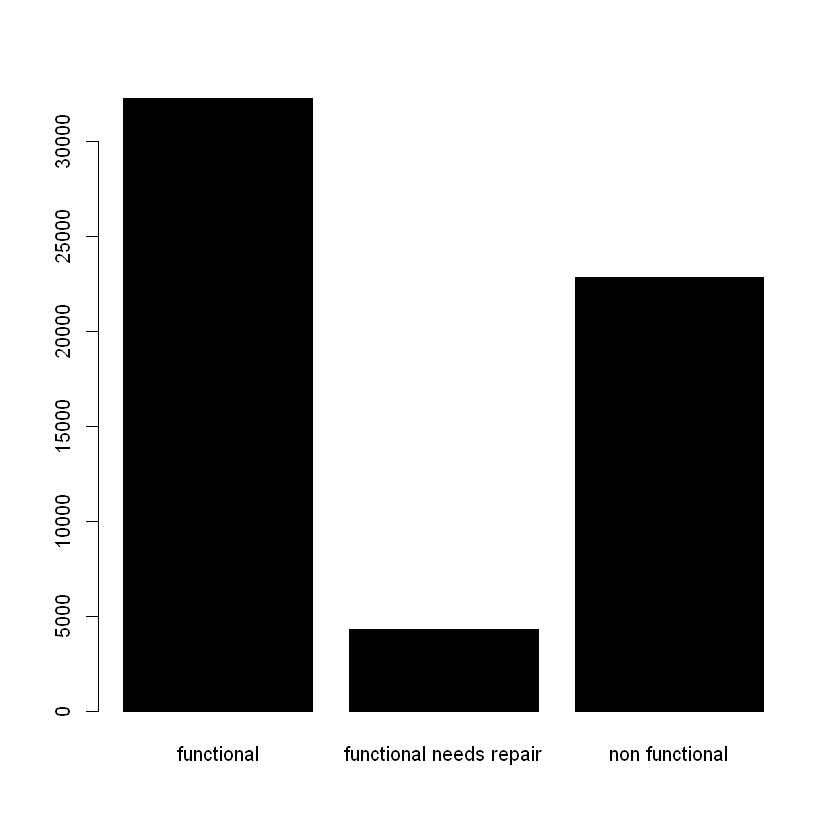

In [6]:
noquote(paste("Functional :",sum(Y$status_group=="functional")))
noquote(paste("Functional needs repair :",sum(Y$status_group=="functional needs repair")))
noquote(paste("Non functional :",sum(Y$status_group=="non functional")))

barplot(table(Y))

# Data preprocessing

## Missing value imputation


### Categorical variables

We check if there are any NA values in the dataset. The results show that no NA values are present in either dataset.

In [77]:
sum(is.na(X))
sum(is.na(Y))

[1] 0

[1] 0

It is however important to note that this result does not look for empty strings or $none$ strings in the categorical variables. Indeed, we saw previously in the summaries of the datasets that there were wome empty strings, for example for features $funder$, $installer$, $subvillage$, $scheme\_management$,...

It is also important to check that all entries in X have a corresponding entry in Y. To do so, we merge the 2 datasets X and Y based on their common feature $id$ and check the dimension of the resulting dataset. As expected, the merged dataset has 59400 entries and 41 features, which means that for all samples in X there exists a corresponding sample in Y.

In [78]:
data <- merge(X,Y)
dim(data)
head(data)
demo_data <- data

[1] 59400    41

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
,<int>,<dbl>,<fct>,<fct>,<int>,<fct>,<dbl>,<dbl>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,0,0,2012-11-13,Tasaf,0,TASAF,33.12583,-5.118154,Mratibu,0,Lake Tanganyika,Majengo,Tabora,14,3,Uyui,Igalula,0,,GeoData Consultants Ltd,VWC,,True,0,afridev,afridev,handpump,vwc,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
2,1,0,2011-03-05,Shipo,1978,SHIPO,34.77072,-9.395642,none,0,Rufiji,Magoda C,Iringa,11,4,Njombe,Uwemba,20,True,GeoData Consultants Ltd,,,False,2008,other - rope pump,rope pump,rope pump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
3,2,0,2011-03-27,Lvia,0,LVIA,36.11506,-6.279268,Bombani,0,Wami / Ruvu,Songambele,Dodoma,1,4,Chamwino,Msamalo,0,True,GeoData Consultants Ltd,VWC,Mgun,True,0,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
4,3,10,2013-06-03,Germany Republi,1639,CES,37.14743,-3.187555,Area 7 Namba 5,0,Pangani,Urereni,Kilimanjaro,3,5,Hai,Masama Magharibi,25,True,GeoData Consultants Ltd,Water Board,Losaa-Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
5,4,0,2011-03-22,Cmsr,0,CMSR,36.16489,-6.099289,Ezeleda,0,Wami / Ruvu,Maata A,Dodoma,1,4,Chamwino,Majeleko,0,True,GeoData Consultants Ltd,VWC,,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
6,5,50,2011-02-26,Private,28,Private,39.28612,-6.972403,Kwa Namaj,0,Wami / Ruvu,Mwandege,Pwani,60,43,Mkuranga,Vikindu,6922,True,GeoData Consultants Ltd,Private operator,,False,0,submersible,submersible,submersible,private operator,commercial,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional


We start by representing the number of missing values for each categorical variable (and the percentage it corresponds to in regard to the total number of samples). The missing values will be treated in several different ways :
- removing features containing too many missing values
- removing the samples with the missing values
- considering the missing values as a category on their own
- keeping only the relevant classes of the problematic features through one hot encoding (for example discard the column resulting from the none class in the one hot encoding but keeping the rest)

In [79]:
empty_count <- c()
for (c in colnames(demo_data[,categorical_variables])) { 
    a <- dim(demo_data[demo_data[,c] == "none" | demo_data[,c] == "" | demo_data[,c] == "None",])[1]
    empty_count <- c(empty_count,a)
}

df <- data.frame(variable=colnames(demo_data[,categorical_variables]),empty_count=empty_count,percentage=100*empty_count/nrow(demo_data))
df[df$empty_count != 0,]

,variable,empty_count,percentage
,<chr>,<int>,<dbl>
2,funder,3637,6.1228956
3,installer,3655,6.1531987
4,wpt_name,3565,6.0016835
6,subvillage,371,0.6245791
10,public_meeting,3334,5.6127946
12,scheme_management,3878,6.5286195
13,scheme_name,28835,48.5437710
14,permit,3056,5.1447811


It stands out that the feature $scheme\_name$ has more than 47% of missing values. We first analyze if any of the other classes of this feature could be interesting to keep (if there are there any dominant classes that affect a large number of samples that might bring some information). A barplot displays the 5 most common classes of this feature and shows the number of corresponding samples. We see that the other classes really represent extremely small amounts of samples (less than 1000), and that the missing values are too present to consider this feature as informative, it is therefore removed from the dataset.

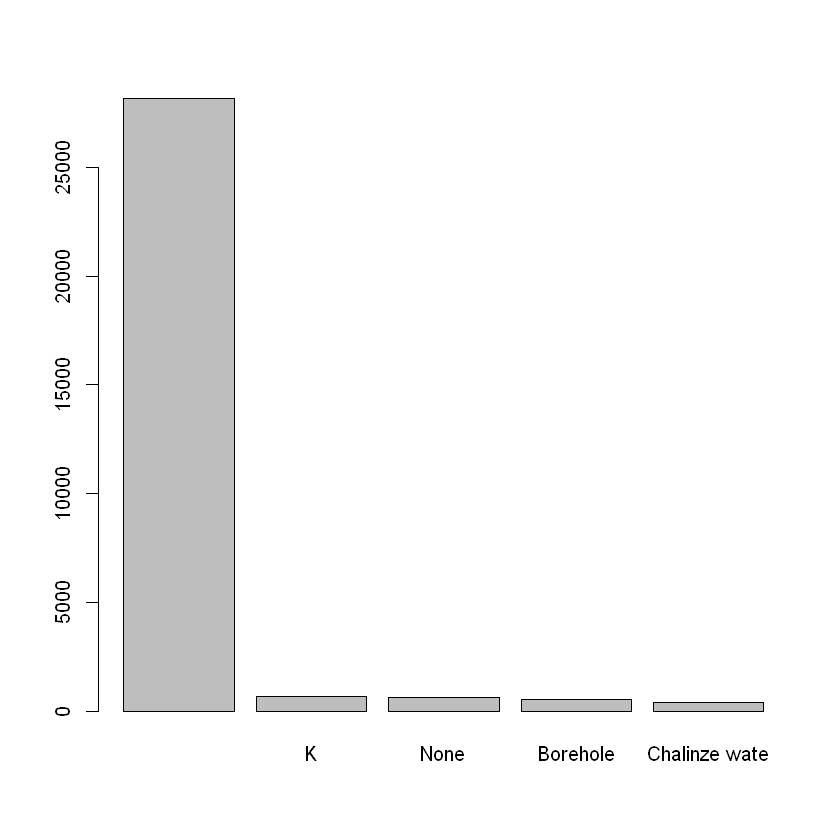

In [80]:
barplot((sort(table(demo_data$scheme_name), decreasing=TRUE)[1:5] ))

In [81]:
remove_scheme_name <- function(df) {
    return(subset(df,select=-c(scheme_name)))
}

In [13]:
demo_data <- remove_scheme_name(demo_data)

The rest of the categorical features containing a lot of missing values will be treated throughout the preprocessing, using the various methods that were listed previously.

### Numerical variables

In [82]:
numerical_variables <- which(sapply(X[1,],class)=="integer" | sapply(X[1,],class)=="numeric")
length(numerical_variables)
colnames(data)[numerical_variables]

[1] 10

[1] "id"                "amount_tsh"        "gps_height"       
 [4] "longitude"         "latitude"          "num_private"      
 [7] "region_code"       "district_code"     "population"       
[10] "construction_year"

Concerning the numerical variables, it is sometimes tricky to know whether 0s correspond to missing values or not. For the $longitude$ and $latitude$ features, we can plot the data graphically :

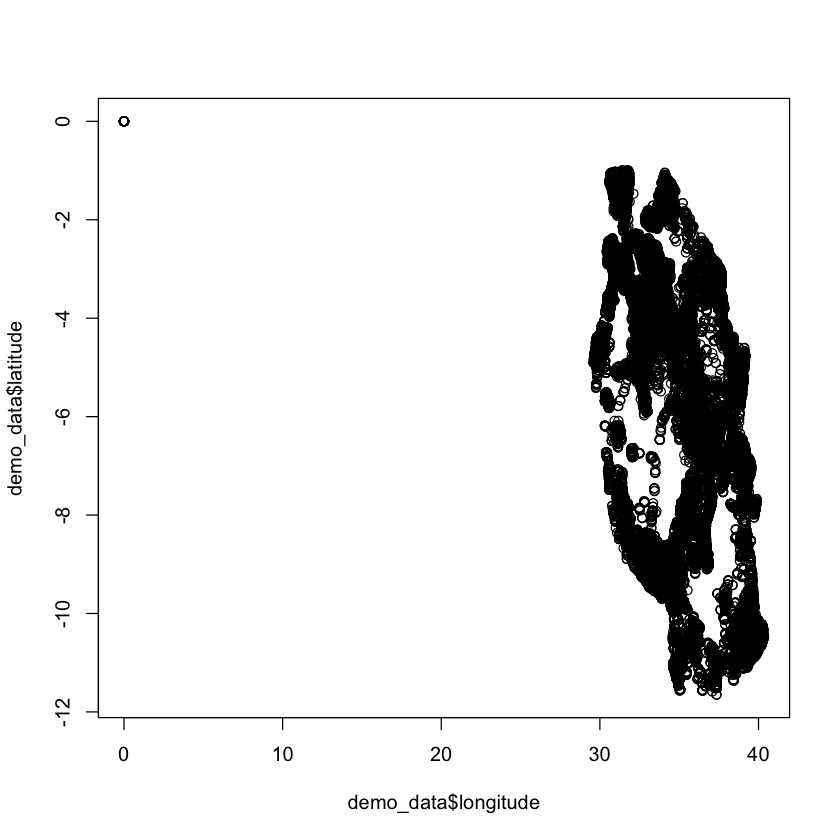

In [15]:
plot(demo_data$longitude,demo_data$latitude)

We see some outliers that have coordinates (0,0), which we will replace by the mean values of the coordinates.

In [83]:
discard_unrealistic_coordinates <- function(df) {
    df$longitude[df$longitude < 20] <- mean(df$longitude)
    df$latitude[df$longitude < 20] <- mean(df$latitude)
    return(df)
}

In [84]:
demo_data <- discard_unrealistic_coordinates(demo_data)

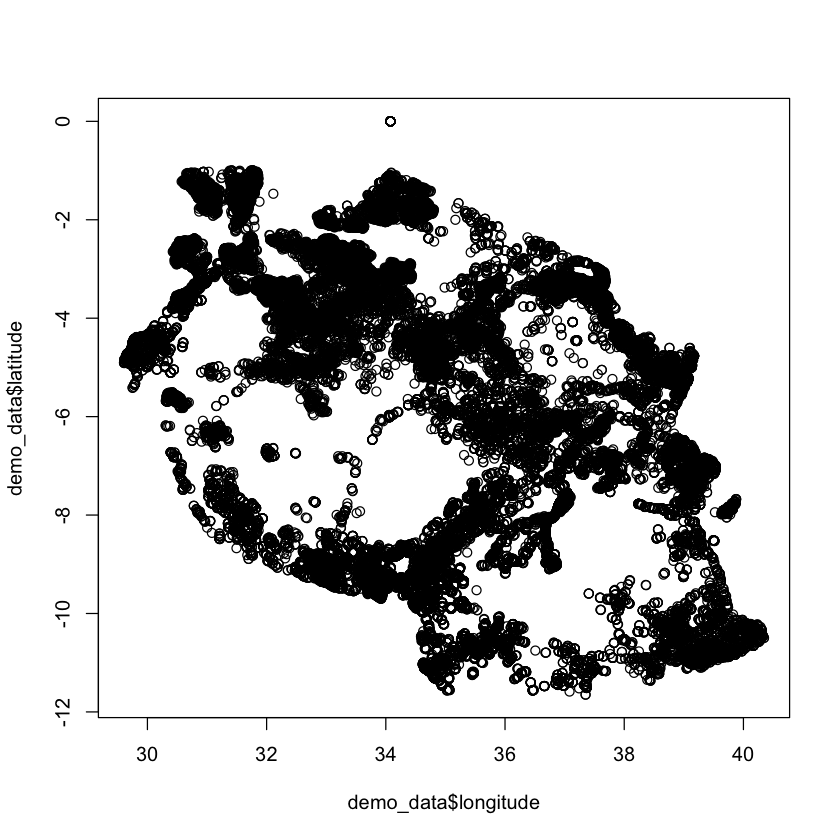

In [19]:
plot(demo_data$longitude,demo_data$latitude)

Concerning the $construction\_year$ feature, it is equal to 0 for 35\% of the samples. In this particular case, replacing the values by the mean value of the feature does not seem logical, and deleting 35\% of the dataset because of this particular feature is not an option either. Therefore, we chose to divide the construction years into groups of 10 years, use it as a categorical variable with one-hot encoding and discard the one-hot encoded feature corresponding to the 0-year.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0    1986    1301    2004    2013 

[1] 20709

[1] 34.86364

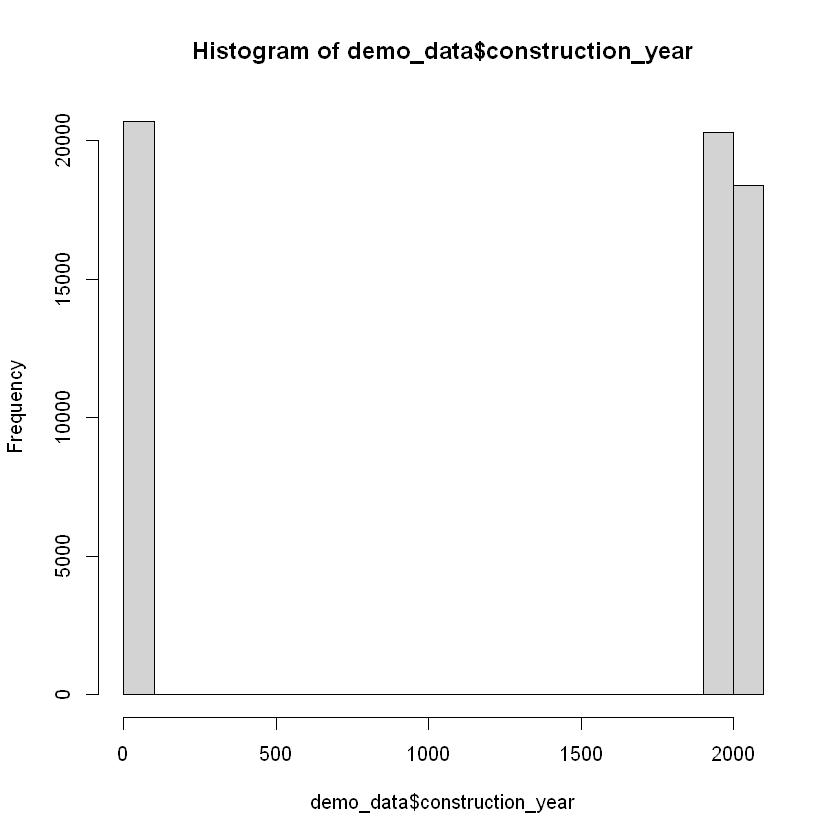

In [85]:
summary(demo_data$construction_year)
dim(demo_data[demo_data$construction_year == 0,])[1]
100*dim(demo_data[demo_data$construction_year == 0,])[1]/nrow(demo_data)
hist(demo_data$construction_year)

In [86]:
nlevels(as.factor(demo_data$construction_year))

[1] 55

In [15]:
library(dummies)

dummies-1.5.6 provided by Decision Patterns




In [87]:
one_hot_construction_year <- function(df) {
    df$construction_year[df$construction_year > 1959 & df$construction_year < 1970] = "1960s"
    df$construction_year[df$construction_year > 1969 & df$construction_year < 1980] = "1970s"
    df$construction_year[df$construction_year > 1979 & df$construction_year < 1990] = "1980s"
    df$construction_year[df$construction_year > 1989 & df$construction_year < 2000] = "1990s"
    df$construction_year[df$construction_year > 1999 & df$construction_year < 2010] = "2000s"
    df$construction_year[df$construction_year > 2009 & df$construction_year < 2020] = "2010s"
    df$construction_year <- as.factor(df$construction_year)
    dum <- dummy.data.frame(df,names=c("construction_year"), sep="_")
    df <- subset(dum,select=-c(construction_year_0))

    return(df)
}

In [24]:
demo_data <- one_hot_construction_year(demo_data)

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”


In [96]:
head(demo_data)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year_1960s,construction_year_1970s,construction_year_1980s,construction_year_1990s,construction_year_2000s,construction_year_2010s,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
,<int>,<dbl>,<fct>,<fct>,<int>,<fct>,<dbl>,<dbl>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,0,0,2012-11-13,Tasaf,0,TASAF,33.12583,-5.118154,Mratibu,0,Lake Tanganyika,Majengo,Tabora,14,3,Uyui,Igalula,0,,GeoData Consultants Ltd,VWC,,True,0,0,0,0,0,0,afridev,afridev,handpump,vwc,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
2,1,0,2011-03-05,Shipo,1978,SHIPO,34.77072,-9.395642,none,0,Rufiji,Magoda C,Iringa,11,4,Njombe,Uwemba,20,True,GeoData Consultants Ltd,,,False,0,0,0,0,1,0,other - rope pump,rope pump,rope pump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
3,2,0,2011-03-27,Lvia,0,LVIA,36.11506,-6.279268,Bombani,0,Wami / Ruvu,Songambele,Dodoma,1,4,Chamwino,Msamalo,0,True,GeoData Consultants Ltd,VWC,Mgun,True,0,0,0,0,0,0,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
4,3,10,2013-06-03,Germany Republi,1639,CES,37.14743,-3.187555,Area 7 Namba 5,0,Pangani,Urereni,Kilimanjaro,3,5,Hai,Masama Magharibi,25,True,GeoData Consultants Ltd,Water Board,Losaa-Kia water supply,True,0,0,0,1,0,0,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
5,4,0,2011-03-22,Cmsr,0,CMSR,36.16489,-6.099289,Ezeleda,0,Wami / Ruvu,Maata A,Dodoma,1,4,Chamwino,Majeleko,0,True,GeoData Consultants Ltd,VWC,,True,0,0,0,0,0,0,nira/tanira,nira/tanira,handpump,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
6,5,50,2011-02-26,Private,28,Private,39.28612,-6.972403,Kwa Namaj,0,Wami / Ruvu,Mwandege,Pwani,60,43,Mkuranga,Vikindu,6922,True,GeoData Consultants Ltd,Private operator,,False,0,0,0,0,0,0,submersible,submersible,submersible,private operator,commercial,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional


## Handle categorical variables

All the categorical variables present in the merged dataset are presented below.

In [88]:
categorical_variables <- which(sapply(data[1,],class)=="factor")
colnames(data[,categorical_variables])

[1] "date_recorded"         "funder"                "installer"            
 [4] "wpt_name"              "basin"                 "subvillage"           
 [7] "region"                "lga"                   "ward"                 
[10] "public_meeting"        "recorded_by"           "scheme_management"    
[13] "scheme_name"           "permit"                "extraction_type"      
[16] "extraction_type_group" "extraction_type_class" "management"           
[19] "management_group"      "payment"               "payment_type"         
[22] "water_quality"         "quality_group"         "quantity"             
[25] "quantity_group"        "source"                "source_type"          
[28] "source_class"          "waterpoint_type"       "waterpoint_type_group"
[31] "status_group"

### Useless features

A check is made to ensure all categorical variables take more than 1 possible value, otherwise they are not necessary since they do not bring any information. The following code shows that the feature $recorded\_by$ contains only 1 factor, which is $GeoData Consultants Ltd$.

In [89]:
for (n in colnames(data[,categorical_variables])) {
    l <- nlevels(data[,n])
    if (l < 2) {
        print(n)
        print(data[1,n])
    }
}

[1] "recorded_by"
[1] GeoData Consultants Ltd
Levels: GeoData Consultants Ltd


In [90]:
remove_useless_features <- function(df) {
    df <- subset(df,select=-c(recorded_by))
    return(df)
}

In [28]:
demo_data <- remove_useless_features(demo_data)

In [29]:
dim(demo_data)

[1] 59400    44

## Boolean features

By analyzing the features that contain 3 classes, we see that some of them are boolean features ($public\_meeting$ and $permit$), which take the values True, False or an empty string. There is also a feature $source\_class$ that contains only 2 classes and an $unknown$ class. By analyzing the distribution of the different classes of these features, we can see that the missing values are always very minoritary, we could therefore remove the problematic samples and encode these features as boolean 0-1 features.

[1] "public_meeting"
[1] 
Levels:  False True
[1] "permit"
[1] True
Levels:  False True


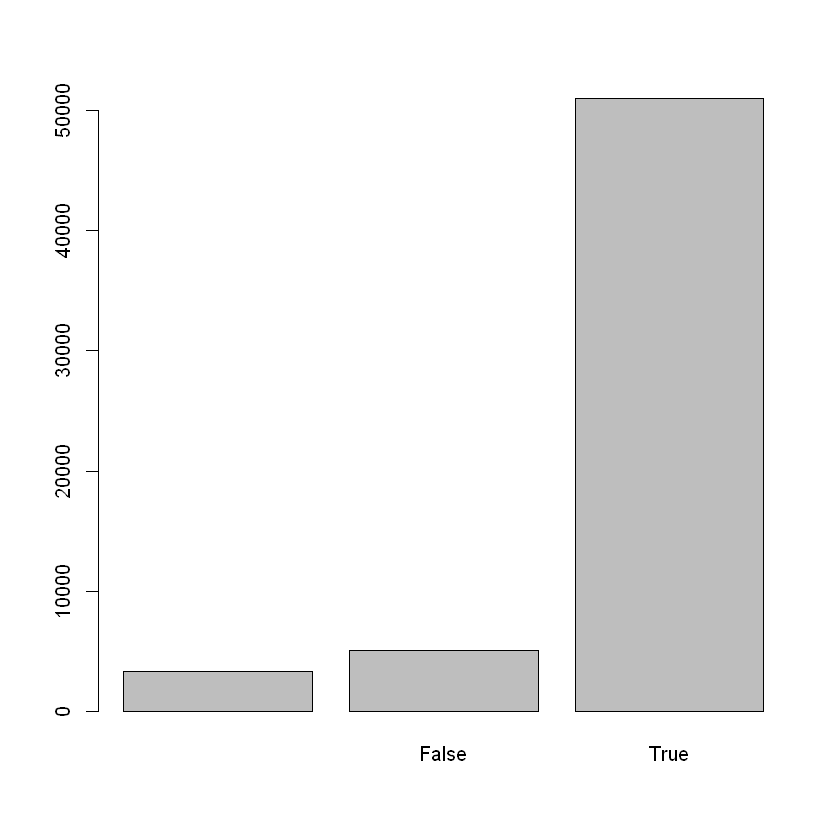

[1] "source_class"
[1] groundwater
Levels: groundwater surface unknown


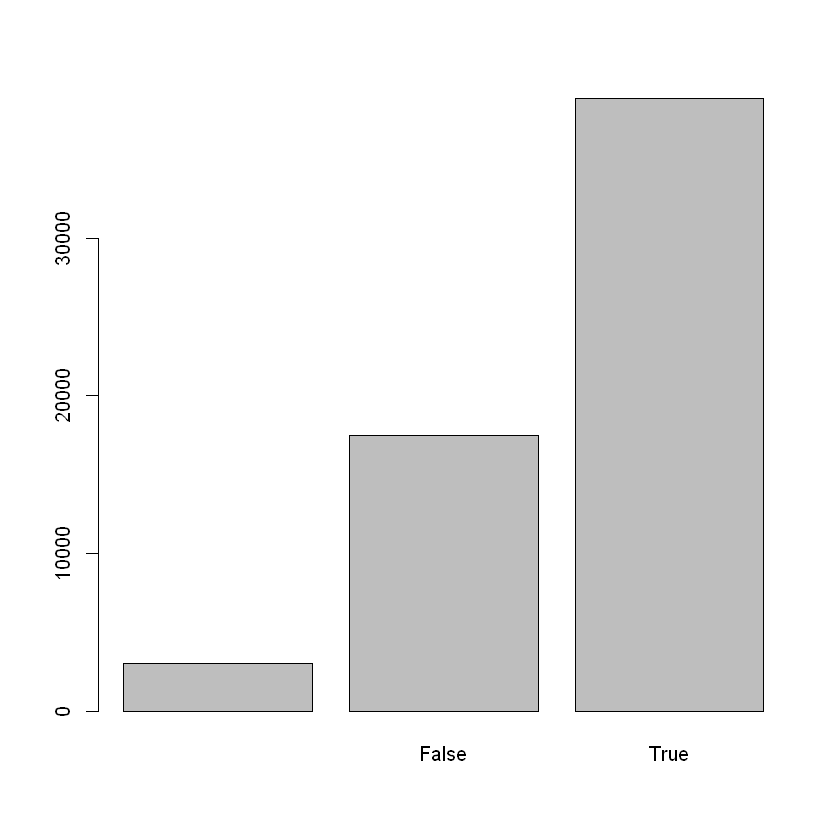

[1] "status_group"
[1] non functional
Levels: functional functional needs repair non functional


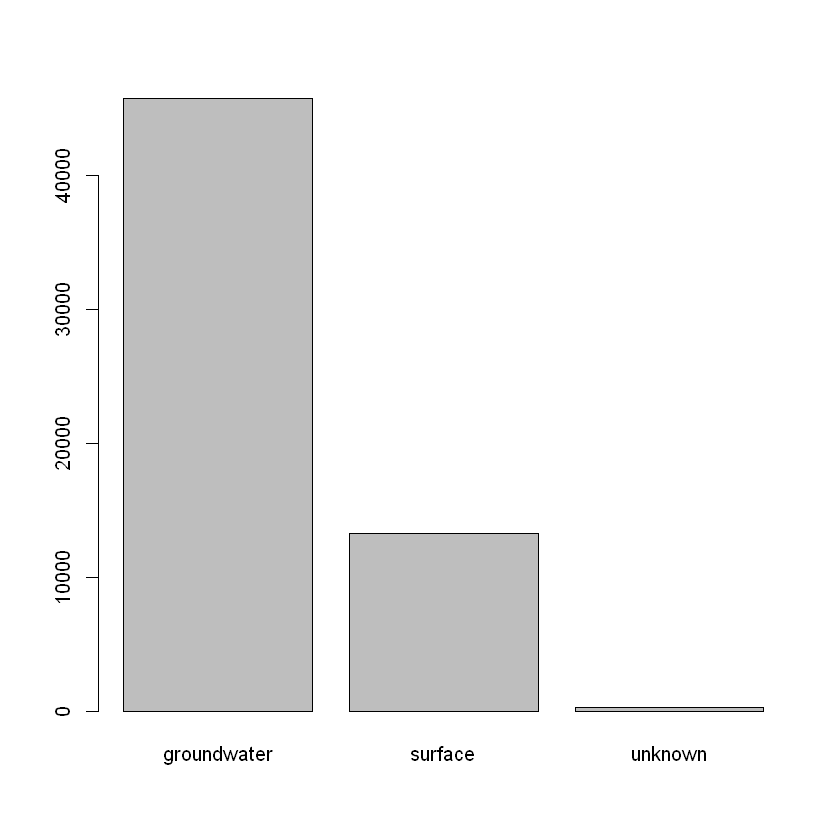

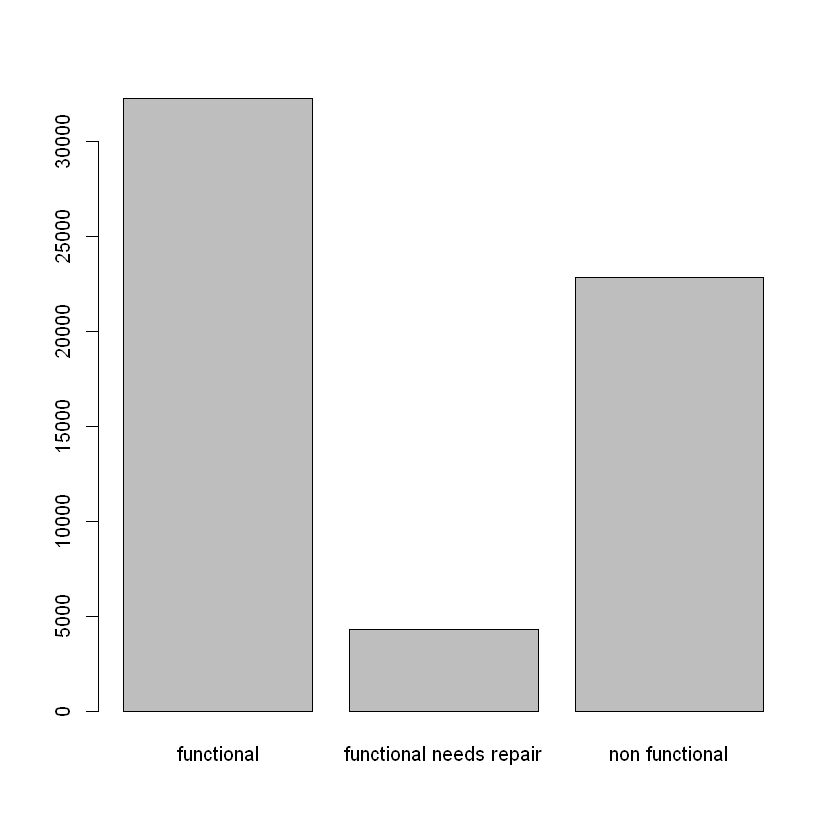

In [91]:
for (n in colnames(data[,categorical_variables])) {
    l <- nlevels(data[,n])
    if (l == 3) {
        print(n)
        print(data[1,n])
        barplot(table(data[,n]))
    }
}

In [92]:
create_binary_features <- function(df) {
    df <- df[df$public_meeting != "", ] 
    levels(df$public_meeting) <- c(levels(df$public_meeting), "1","0") 
    df$public_meeting[df$public_meeting == "True"] <- 1
    df$public_meeting[df$public_meeting != "1"] <- 0
    df <- transform(df, public_meeting = as.integer(as.character(public_meeting)))
    
    df <- df[df$permit != "", ] 
    levels(df$permit) <- c(levels(df$permit), "1","0") 
    df$permit[df$permit == "True"] <- 1
    df$permit[df$permit != "1"] <- 0
    df <- transform(df, permit = as.integer(as.character(permit)))
    
    df <- df[df$source_class != "unknown", ] 
    levels(df$source_class) <- c(levels(df$source_class), "1","0") 
    df$source_class[df$source_class == "groundwater"] <- 1
    df$source_class[df$source_class != "1"] <- 0
    df <- transform(df, source_class = as.integer(as.character(source_class)))
    return(df)
}

In [32]:
demo_data <- create_binary_features(demo_data)

### Convert the dates

The feature $date\_recorded$ is a categorical variable but can easily be converted into a numerical one. To avoid having unnecessarily large values, the minimal date is substracted.

In [93]:
convert_date_to_numeric <- function(df) {
    df$date_recorded <- as.numeric(as.Date(df$date_recorded))
    df$date_recorded <- df$date_recorded - min(df$date_recorded)
    return(df)
}

In [34]:
demo_data <- convert_date_to_numeric(demo_data)

In [35]:
min(demo_data$date_recorded)

[1] 0

In [36]:
head(demo_data)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,permit,construction_year_1960s,construction_year_1970s,construction_year_1980s,construction_year_1990s,construction_year_2000s,construction_year_2010s,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
,<int>,<dbl>,<dbl>,<fct>,<int>,<fct>,<dbl>,<dbl>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>
2,1,0,3064,Shipo,1978,SHIPO,34.77072,-9.395642,none,0,Rufiji,Magoda C,Iringa,11,4,Njombe,Uwemba,20,1,,0,0,0,0,0,1,0,other - rope pump,rope pump,rope pump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,1,hand pump,hand pump,functional
3,2,0,3086,Lvia,0,LVIA,36.11506,-6.279268,Bombani,0,Wami / Ruvu,Songambele,Dodoma,1,4,Chamwino,Msamalo,0,1,VWC,1,0,0,0,0,0,0,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,1,communal standpipe multiple,communal standpipe,functional
4,3,10,3885,Germany Republi,1639,CES,37.14743,-3.187555,Area 7 Namba 5,0,Pangani,Urereni,Kilimanjaro,3,5,Hai,Masama Magharibi,25,1,Water Board,1,0,0,0,1,0,0,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,1,communal standpipe,communal standpipe,functional
5,4,0,3081,Cmsr,0,CMSR,36.16489,-6.099289,Ezeleda,0,Wami / Ruvu,Maata A,Dodoma,1,4,Chamwino,Majeleko,0,1,VWC,1,0,0,0,0,0,0,nira/tanira,nira/tanira,handpump,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,1,hand pump,hand pump,non functional
6,5,50,3057,Private,28,Private,39.28612,-6.972403,Kwa Namaj,0,Wami / Ruvu,Mwandege,Pwani,60,43,Mkuranga,Vikindu,6922,1,Private operator,0,0,0,0,0,0,0,submersible,submersible,submersible,private operator,commercial,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,1,communal standpipe multiple,communal standpipe,functional
7,6,0,3659,Government Of Tanzania,0,Government,33.22988,-3.852983,Mission,0,Internal,Ngaganulwa,Shinyanga,17,3,Shinyanga Rural,Usanda,0,1,VWC,1,0,0,0,0,0,0,other,other,other,vwc,user-group,never pay,never pay,soft,good,seasonal,seasonal,shallow well,shallow well,1,other,other,non functional


### Handpicking redundant features

Some features are noticeably redudant at first sight, and we can therefore reduce the number of features.

In [37]:
table(data$extraction_type)
table(data$extraction_type_group)
table(data$extraction_type_class)


                  afridev                      cemo                    climax 
                     1770                        90                        32 
                  gravity             india mark ii            india mark iii 
                    26780                      2400                        98 
                      ksb                      mono               nira/tanira 
                     1415                      2865                      8154 
                    other other - mkulima/shinyanga         other - play pump 
                     6430                         2                        85 
        other - rope pump            other - swn 81               submersible 
                      451                       229                      4764 
                   swn 80                    walimi                  windmill 
                     3670                        48                       117 


        afridev         gravity   india mark ii  india mark iii            mono 
           1770           26780            2400              98            2865 
    nira/tanira           other  other handpump other motorpump       rope pump 
           8154            6430             364             122             451 
    submersible          swn 80    wind-powered 
           6179            3670             117 


     gravity     handpump    motorpump        other    rope pump  submersible 
       26780        16456         2987         6430          451         6179 
wind-powered 
         117 

In [11]:
table(data$management)
table(data$scheme_management)


         company            other   other - school       parastatal 
             685              844               99             1768 
private operator            trust          unknown              vwc 
            1971               78              561            40507 
 water authority      water board              wua              wug 
             904             2933             2535             6515 


                          Company             None            Other 
            3877             1061                1              766 
      Parastatal Private operator              SWC            Trust 
            1680             1063               97               72 
             VWC              WUA              WUG      Water Board 
           36793             2883             5206             2748 
 Water authority 
            3153 

In [19]:
table(data$waterpoint_type)
table(data$waterpoint_type_group)


              cattle trough          communal standpipe 
                        116                       28522 
communal standpipe multiple                         dam 
                       6103                           7 
                  hand pump             improved spring 
                      17488                         784 
                      other 
                       6380 


     cattle trough communal standpipe                dam          hand pump 
               116              34625                  7              17488 
   improved spring              other 
               784               6380 

In [20]:
table(data$source)
table(data$source_type)


                 dam             hand dtw                 lake 
                 656                  874                  765 
         machine dbh                other rainwater harvesting 
               11075                  212                 2295 
               river         shallow well               spring 
                9612                16824                17021 
             unknown 
                  66 


            borehole                  dam                other 
               11949                  656                  278 
rainwater harvesting           river/lake         shallow well 
                2295                10377                16824 
              spring 
               17021 

In [21]:
table(data$quantity)
table(data$quantity_group)


         dry       enough insufficient     seasonal      unknown 
        6246        33186        15129         4050          789 


         dry       enough insufficient     seasonal      unknown 
        6246        33186        15129         4050          789 

In [22]:
table(data$water_quality)
table(data$quality_group)


          coloured           fluoride fluoride abandoned              milky 
               490                200                 17                804 
             salty    salty abandoned               soft            unknown 
              4856                339              50818               1876 


 colored fluoride     good    milky    salty  unknown 
     490      217    50818      804     5195     1876 

In [25]:
table(data$payment)
table(data$payment_type)


            never pay                 other          pay annually 
                25348                  1054                  3642 
          pay monthly        pay per bucket pay when scheme fails 
                 8300                  8985                  3914 
              unknown 
                 8157 


  annually    monthly  never pay on failure      other per bucket    unknown 
      3642       8300      25348       3914       1054       8985       8157 

In [23]:
remove_redundant_features <- function(df) {
    df <- subset(df,select=-c(extraction_type,scheme_management,waterpoint_type_group,source_type,quantity_group,quality_group,payment))
    return(df)
}

### Variables with too many levels

Some categorical variables that have too many levels could be useless for the problem. Indeed, let us imagine if each sample has a different factor for a given feature, this would not bring any additional information. This is why we check what features have a huge amount of features below :

In [94]:
categorical_variables <- which(sapply(data[1,],class)=="factor")

problematic_features <- c()

for (n in colnames(data[,categorical_variables])) {
    l <- nlevels(data[,n])
    if (l > 1000) {
        print(n)
        problematic_features <- c(problematic_features,n)
        print(data[1,n])
    }
}
problematic_features

[1] "funder"
[1] Tasaf
1898 Levels:  0 A/co Germany Aar Abas Ka Abasia ... Zingibali Secondary
[1] "installer"
[1] TASAF
2146 Levels:  - 0 A.D.B AAR Aartisa ABASIA ABD ABDALA ... Zuber Mihungo
[1] "wpt_name"
[1] Mratibu
37400 Levels: 24 A Kulwa A Saidi Abass Abbas Abdala Hamisi ... Zuwena Kindo
[1] "subvillage"
[1] Majengo
19288 Levels:  'A' Kati ## 1 14Kambalage 18 19 20 22B 23B 24 24B 30 42 43 ... Zuri
[1] "ward"
[1] Igalula
2092 Levels: Aghondi Akheri Arash Arri Arusha Chini Babayu Badi Badugu ... Zuzu
[1] "scheme_name"
[1] 
2697 Levels:  14 Kambarage A ADP ADP Simbo ADP Simbu Adra ... Zuzu


[1] "funder"      "installer"   "wpt_name"    "subvillage"  "ward"       
[6] "scheme_name"

For each one of these features, we check the distribution of the different categories.

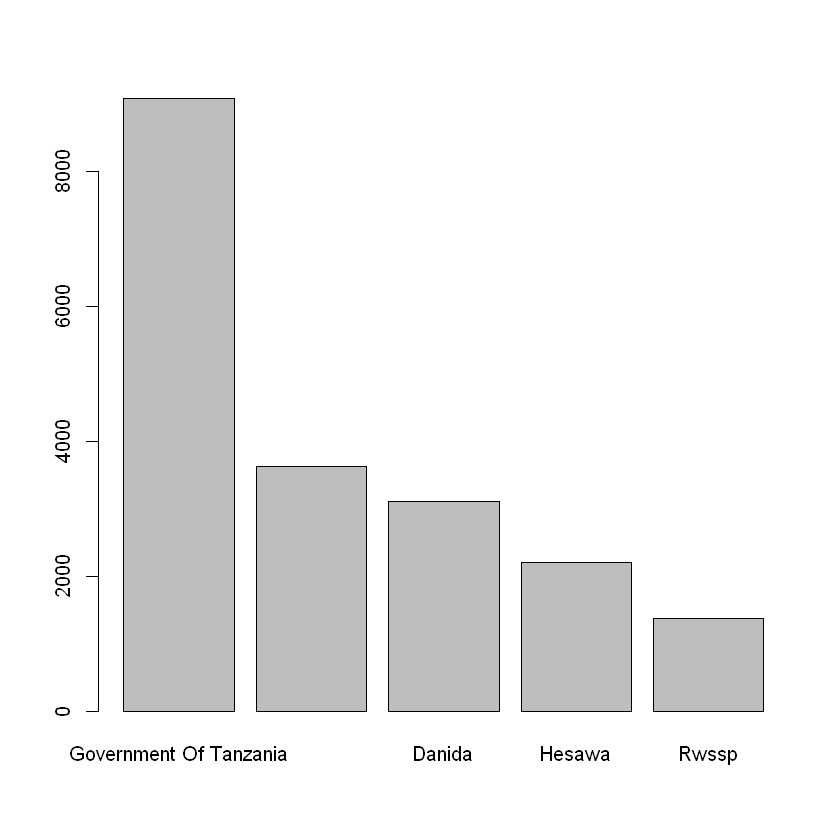

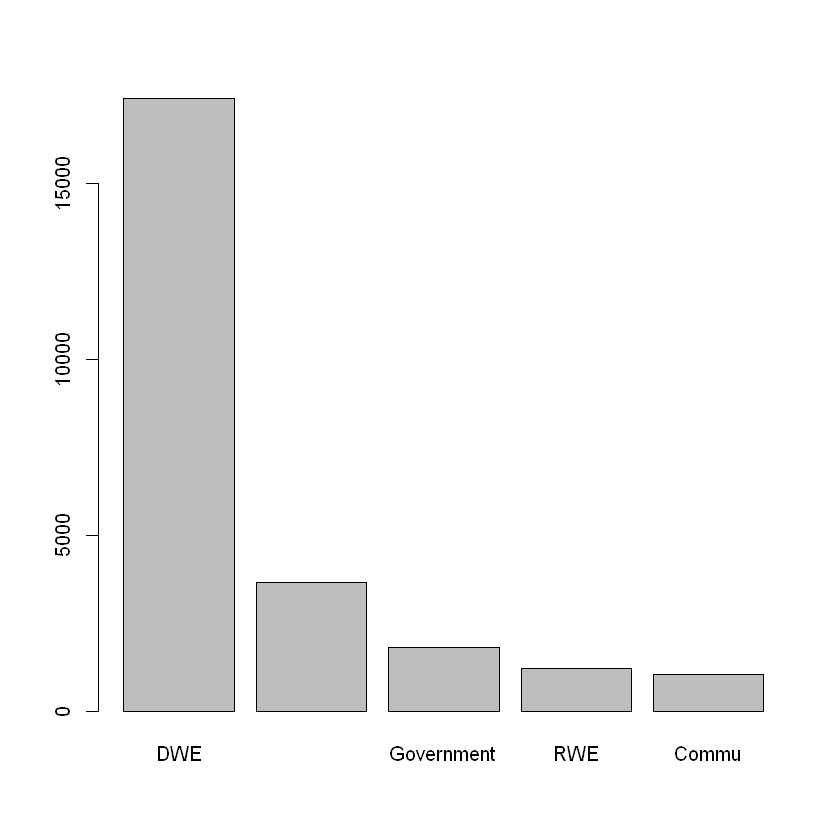

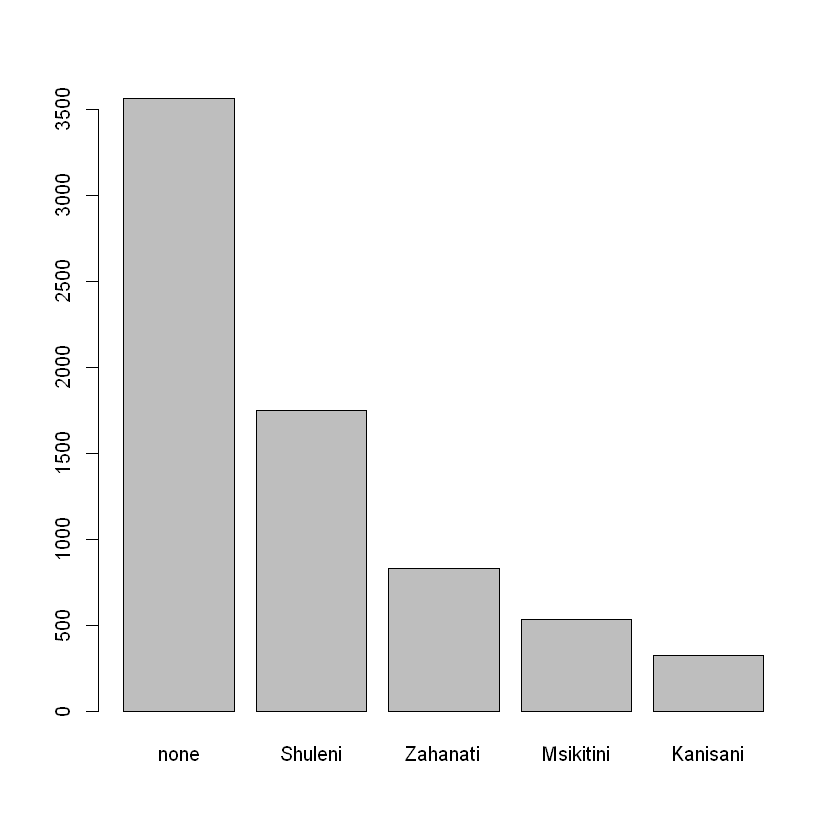

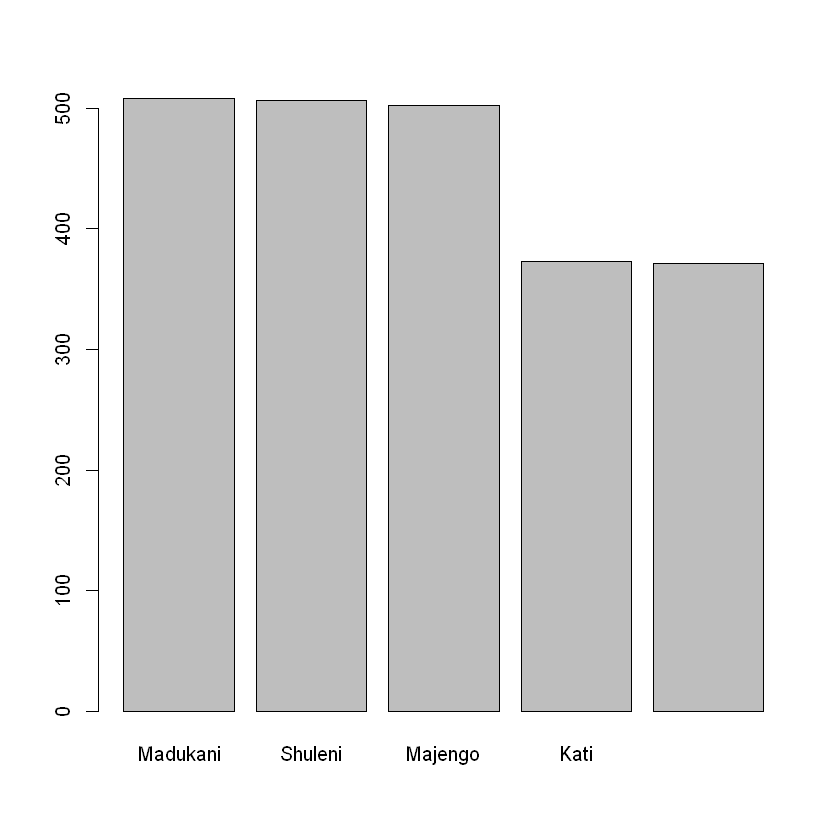

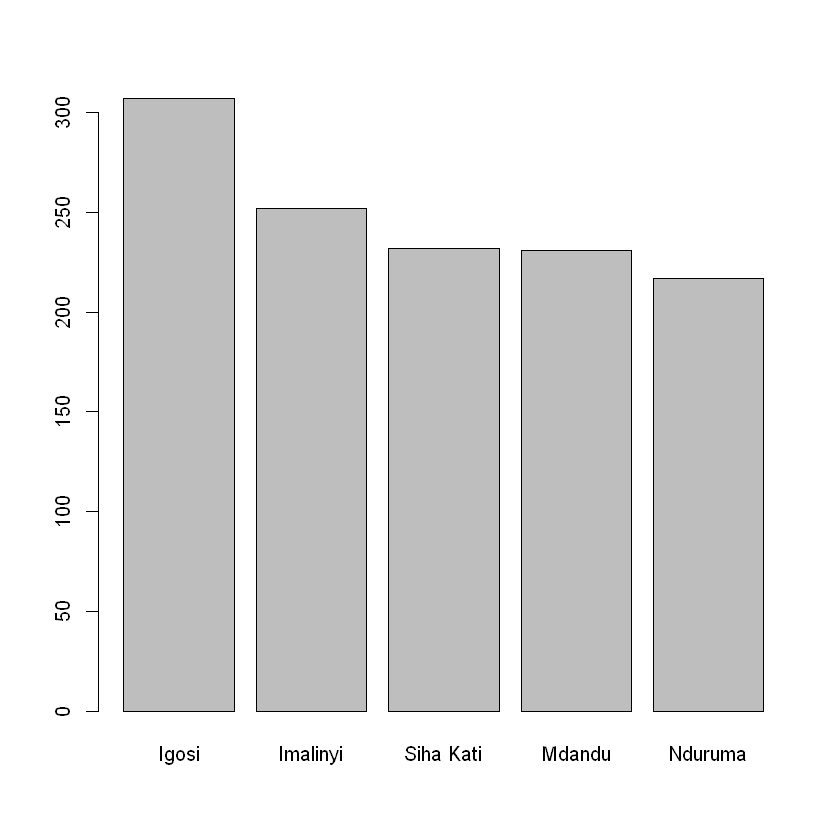

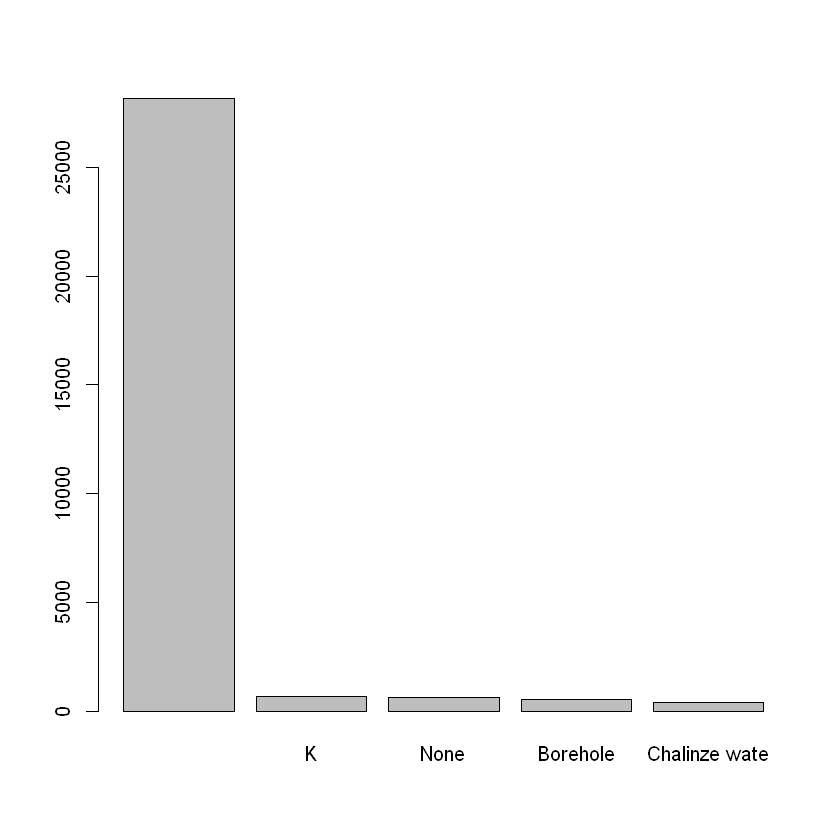

In [95]:
for (f in problematic_features) {
    factors <- table(data[,f])
    barplot( (sort(factors, decreasing=TRUE)[1:5] ))
}

By taking a look at the barplots, some features might be interesting to keep because they have a large dominance in one category. For example, the $installer$ feature contains more than 16000 samples with the category $DWE$ so it might be useful to simply keep track of whether the installer is DWE or not (binary value). The same goes for $funder$, where there are a lot of samples corresponding to the class $Government\ Of\ Tanzania$.

In [96]:
convert_installer_to_binary <- function(df) {
    levels(df$installer) <- c(levels(df$installer), "1","0") 
    df$installer[df$installer == "DWE"] <- 1
    df$installer[df$installer != "1"] <- 0
    df <- transform(df, installer = as.integer(as.character(installer)))
    return(df)
}

In [97]:
convert_funder_to_binary <- function(df) {
    levels(df$funder) <- c(levels(df$funder), "1","0") 
    df$funder[df$funder == "Government of Tanzania"] <- 1
    df$funder[df$funder != "1"] <- 0
    df <- transform(df, funder = as.integer(as.character(funder)))
    return(df)
}

In [141]:
demo_data <- convert_installer_to_binary(demo_data)

In [142]:
demo_data <- convert_funder_to_binary(demo_data)

By analyzing the rest of the barplots, either there are extremely few samples of each category of the feature, or there are majoritarily samples containing $none$ or an empty string. Therefore, we choose to remove them from the dataset.

In [98]:
remove_features_many_levels <- function(df) {
    df <- subset(df,select=-c(wpt_name,subvillage,ward))
    return(df)
}

In [29]:
categorical_variables <- which(sapply(subset(data,select=-c(status_group)),class)=="factor")
colnames(data[,categorical_variables])

[1] "date_recorded"         "funder"                "installer"            
 [4] "wpt_name"              "basin"                 "subvillage"           
 [7] "region"                "lga"                   "ward"                 
[10] "public_meeting"        "recorded_by"           "scheme_management"    
[13] "scheme_name"           "permit"                "extraction_type"      
[16] "extraction_type_group" "extraction_type_class" "management"           
[19] "management_group"      "payment"               "payment_type"         
[22] "water_quality"         "quality_group"         "quantity"             
[25] "quantity_group"        "source"                "source_type"          
[28] "source_class"          "waterpoint_type"       "waterpoint_type_group"

In [48]:
demo_data <- remove_features_many_levels(demo_data)

## One-hot encoding

Therefore, we can now remove the longitude and latitude features from the dataset and replace them with a new feature called $region$, representing the cluster in which the pump is located.

In [ ]:
install.packages('dummies')

In [30]:
library(dummies)

In [99]:
one_hot_encoding_training <- function(df) {
    categorical_variables <- which(sapply(subset(df,select=-c(status_group)),class)=="factor")
    dum <- dummy.data.frame(df[,categorical_variables], sep="_")
    df <- cbind(df[,-categorical_variables],dum)
    return(df)
}

In [100]:
one_hot_encoding_test <- function(df) {
    categorical_variables <- which(sapply(df,class)=="factor")
    dum <- dummy.data.frame(df[,categorical_variables], sep="_")
    df <- cbind(df[,-categorical_variables],dum)
    return(df)
}

## Handle the numerical features

### Preprocess the coordinates

The dataset contains $longitude$ and $latitude$ features which can be useful in the sense that the outcome of the prediction might depend on if the water pumps are located in a similar region. Although there is already an attribute $region\_code$ in the dataset, we might use these coordinates to our advantage by defining a custom notion of spaciality between the water pumps. Using k-means clustering, we can separate the pumps into k different geographical regions based on $longitude$ and $latitude$. The advangate of this method compared to the $region\_code$ feature is that we can choose how small or large the different regions are.

In [45]:
install.packages("factoextra")


also installing the dependencies ‘rematch’, ‘cellranger’, ‘readxl’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘carData’, ‘pbkrtest’, ‘rio’, ‘lme4’, ‘corrplot’, ‘car’, ‘flashClust’, ‘leaps’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’





The downloaded binary packages are in
	/var/folders/5s/m318ng1j19dd_3kmbrnrg9vh0000gn/T//RtmpnmnZYn/downloaded_packages


In [33]:
library(factoextra)

Warning message:
"package 'factoextra' was built under R version 4.0.5"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.0.5"
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [101]:
generate_regions <- function(df) {
    set.seed(19)
    coordinates <- as.data.frame(cbind(df$longitude,df$latitude))
    km_res <- kmeans(coordinates,8)
    df <- subset(df,select=-c(longitude,latitude))
    df$region_kmeans <- km_res$cluster
    write.csv(km_res$centers,"cluster_centers.csv")
    return(df)
}

In [102]:
get_optimal_clustering_params <- function() {
    best_correlation <- 0
    best_seed <- 1
    correlations <- numeric(length(5:40))
    dum <- dummy.data.frame(demo_data[,ncol(demo_data),drop=F],names=c("status_group"), sep="_")
    coordinates <- as.data.frame(cbind(demo_data$longitude,demo_data$latitude))

    for(k in 5:40) {
        for(s in 1:30) {
            set.seed(s)
            km_res <- kmeans(coordinates,k)
            region_kmeans <- km_res$cluster

            correlation <- 0
            for(i in 1:ncol(dum)) {
                correlation <- correlation + abs(cor(region_kmeans,dum[,i]))
            }
            correlations[k] <- correlations[k] + correlation
            if(correlation > best_correlation) {
                best_k <- k
                best_correlation <- correlation
                best_seed <- s
            }
        }
    }
}

In [32]:
best_k
best_correlation
best_seed

[1] 8

[1] 0.3210632

[1] 19

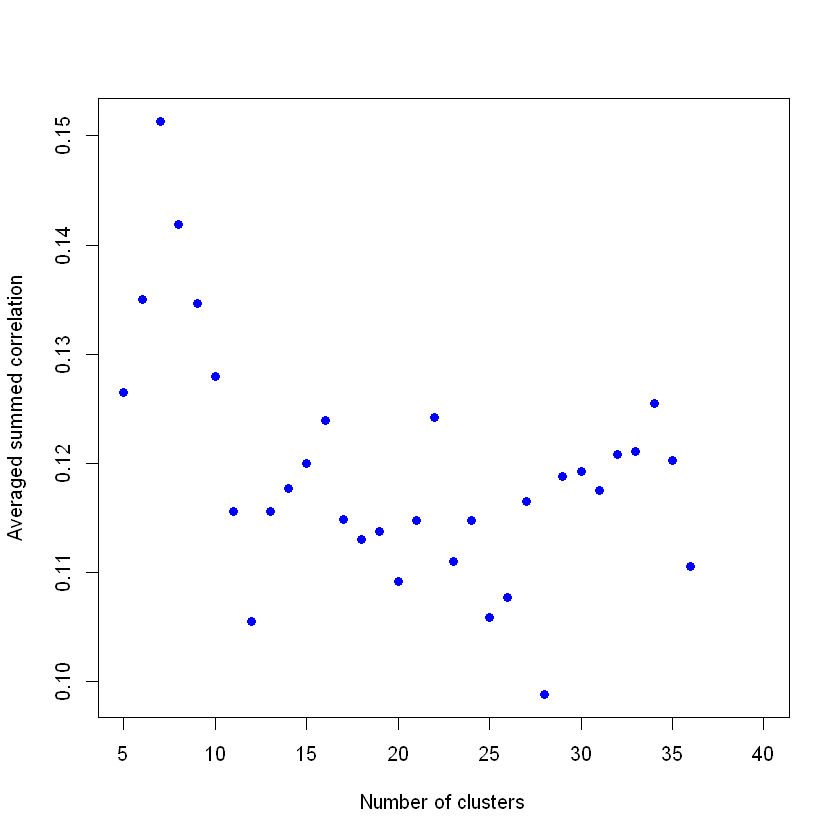

In [33]:
mean_cor <- correlations / 30
plot(5:40,mean_cor[5:40],xlab="Number of clusters",ylab="Averaged summed correlation",col = "blue",pch=19)

In [103]:
closest_cluster <- function(x) {
    centers <- read.csv("cluster_centers.csv")
    centers <- centers[,c("V1","V2")]
    cluster_dist <- apply(centers, 1, function(y) sqrt(sum((x-y)^2)))
    return(which.min(cluster_dist)[1])
}

In [107]:
set_existing_regions <- function(df) {
    clusters2 <- apply(df[,c("longitude","latitude")], 1, closest_cluster)
    df <- subset(df,select=-c(longitude,latitude))
    df$region_kmeans <- clusters2
    return(df)
}

In [106]:
options(repr.matrix.max.cols=50)
head(eval_data,20)
head(data,20)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
,<int>,<dbl>,<fct>,<fct>,<int>,<fct>,<dbl>,<dbl>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,50785,0,2013-02-04,Dmdd,1996,DMDD,35.29080,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
2,51630,0,2013-02-04,Government Of Tanzania,1569,DWE,36.65671,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
3,17168,0,2013-02-01,,1567,,34.76786,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
4,45559,0,2013-01-22,Finn Water,267,FINN WATER,38.05805,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,,GeoData Consultants Ltd,VWC,,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
5,49871,500,2013-03-27,Bruder,1260,BRUDER,35.00612,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
6,52449,0,2013-03-04,Government Of Tanzania,1685,DWE,36.68528,-3.302420,Masaga,0,Pangani,Masaga,Arusha,2,2,Arusha Rural,Ilkiding'a,200,True,GeoData Consultants Ltd,VWC,Timbolo sambasha TPRI pipe line,True,1990,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
7,24806,0,2011-03-02,Government Of Tanzania,550,Gover,36.39804,-7.541382,none,0,Rufiji,Kichangani,Iringa,11,7,Kilolo,Mahenge,600,True,GeoData Consultants Ltd,VWC,,True,2007,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,salty,salty,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
8,28965,0,2013-01-25,Finw,234,FinW,39.60742,-10.893786,Kwa Mkwaa,0,Ruvuma / Southern Coast,Ilala,Mtwara,9,4,Tandahimba,Maundo,1,True,GeoData Consultants Ltd,Water Board,Borehole,True,1982,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
9,36301,30,2013-01-23,Unicef,584,LGA,39.26295,-10.823588,Kwa Mzee Mpini,0,Ruvuma / Southern Coast,Bondeni,Mtwara,90,33,Newala,Mnekachi,40,True,GeoData Consultants Ltd,VWC,MWS,False,1997,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
,<int>,<dbl>,<fct>,<fct>,<int>,<fct>,<dbl>,<dbl>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,0,0,2012-11-13,Tasaf,0,TASAF,33.12583,-5.11815407,Mratibu,0,Lake Tanganyika,Majengo,Tabora,14,3,Uyui,Igalula,0,,GeoData Consultants Ltd,VWC,,True,0,afridev,afridev,handpump,vwc,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
2,1,0,2011-03-05,Shipo,1978,SHIPO,34.77072,-9.39564152,none,0,Rufiji,Magoda C,Iringa,11,4,Njombe,Uwemba,20,True,GeoData Consultants Ltd,,,False,2008,other - rope pump,rope pump,rope pump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
3,2,0,2011-03-27,Lvia,0,LVIA,36.11506,-6.27926803,Bombani,0,Wami / Ruvu,Songambele,Dodoma,1,4,Chamwino,Msamalo,0,True,GeoData Consultants Ltd,VWC,Mgun,True,0,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
4,3,10,2013-06-03,Germany Republi,1639,CES,37.14743,-3.18755455,Area 7 Namba 5,0,Pangani,Urereni,Kilimanjaro,3,5,Hai,Masama Magharibi,25,True,GeoData Consultants Ltd,Water Board,Losaa-Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
5,4,0,2011-03-22,Cmsr,0,CMSR,36.16489,-6.09928949,Ezeleda,0,Wami / Ruvu,Maata A,Dodoma,1,4,Chamwino,Majeleko,0,True,GeoData Consultants Ltd,VWC,,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
6,5,50,2011-02-26,Private,28,Private,39.28612,-6.97240273,Kwa Namaj,0,Wami / Ruvu,Mwandege,Pwani,60,43,Mkuranga,Vikindu,6922,True,GeoData Consultants Ltd,Private operator,,False,0,submersible,submersible,submersible,private operator,commercial,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
7,6,0,2012-10-20,Government Of Tanzania,0,Government,33.22988,-3.85298271,Mission,0,Internal,Ngaganulwa,Shinyanga,17,3,Shinyanga Rural,Usanda,0,True,GeoData Consultants Ltd,VWC,,True,0,other,other,other,vwc,user-group,never pay,never pay,soft,good,seasonal,seasonal,shallow well,shallow well,groundwater,other,other,non functional
8,7,0,2011-03-23,Water,0,Gover,36.31362,-6.71925716,Itawi,0,Rufiji,Mwangaza,Dodoma,1,1,Mpwapwa,Wotta,0,True,GeoData Consultants Ltd,VWC,Lwih,True,0,other,other,other,vwc,user-group,never pay,never pay,milky,milky,insufficient,insufficient,spring,spring,groundwater,improved spring,improved spring,functional
9,8,0,2011-04-07,Water,0,Commu,35.93944,-6.01435820,Kwa Chiswagala,0,Wami / Ruvu,Mazengo,Dodoma,1,5,Dodoma Urban,Ipala,0,True,GeoData Consultants Ltd,VWC,Ipal,False,0,mono,mono,motorpump,private operator,commercial,pay per bucket,per bucket,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional


The graphical representation of the regions after the k-means clustering is shown below.

In [58]:
set.seed(19)
coordinates <- as.data.frame(cbind(demo_data$longitude,demo_data$latitude))
km_res <- kmeans(coordinates,8)
demo_data <- subset(demo_data,select=-c(longitude,latitude))
demo_data$region_kmeans <- km_res$cluster

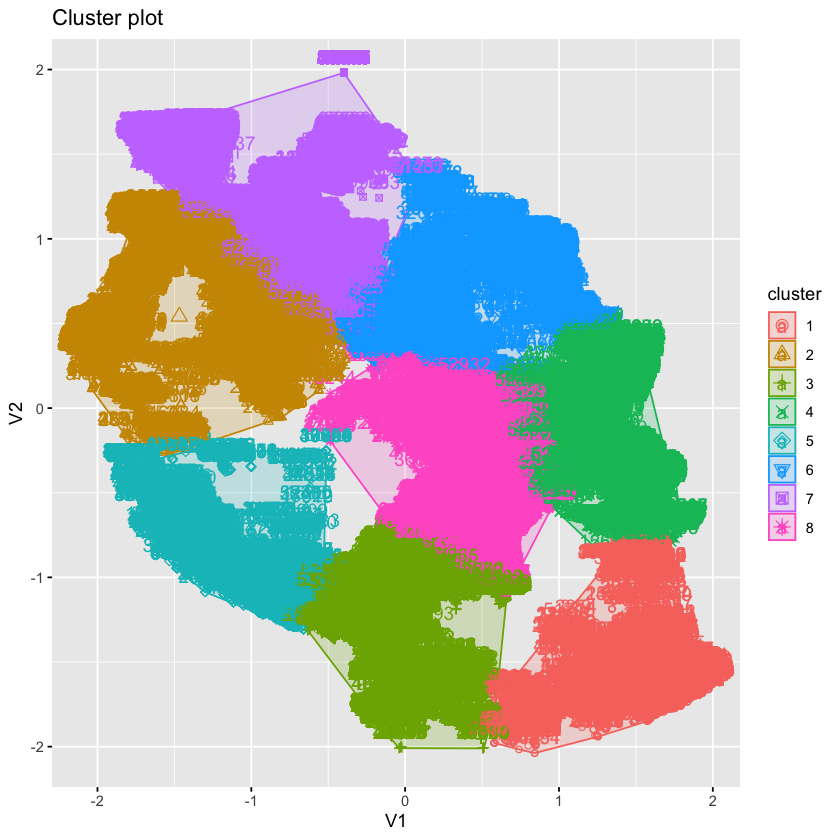

In [59]:
fviz_cluster(km_res,coordinates)

### Remove useless numerical features

The feature $id$ is different for each sample, and does not bring any information. It is therefore removed.

In [60]:
nlevels(as.factor(demo_data$id))

[1] 53042

In [108]:
remove_id <- function(df) {
    return(subset(df,select=-c(id)))
}

In [94]:
demo_data <- remove_id(demo_data)

## Dataset balancing

In order to avoid the previously described situation where the models will predict only the very frequent classes, some dataset balancing can be done. It is important to understand this does not necessarily yield better results, but it could, and this is why it was implemented. Indeed, sometimes the frequency of apparition of certain classes is actually very relevant, and moreover if the dataset is large enough the minority class might be representative enough in the sense that it contains all relevant information in its features to be classified.

The 2 dataset balancing techniques that were tested are SMOTE and oversampling.

### SMOTE

In [17]:
install.packages("performanceEstimation")

Installing package into 'C:/Users/minhx/OneDrive/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'performanceEstimation' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\minhx\AppData\Local\Temp\Rtmpop2NsV\downloaded_packages


In [39]:
library(performanceEstimation)

Warning message:
"package 'performanceEstimation' was built under R version 4.0.5"


In [109]:
create_smote_dataset <- function(df) {
    print(head(df))
    df <- smote(status_group ~ ., df, perc.over = 3,perc.under=3)
    return(df)
}

In [65]:
demo_data <- create_smote_dataset(demo_data)

  amount_tsh date_recorded                 funder gps_height  installer
2          0          3064                  Shipo       1978      SHIPO
3          0          3086                   Lvia          0       LVIA
4         10          3885        Germany Republi       1639        CES
5          0          3081                   Cmsr          0       CMSR
6         50          3057                Private         28    Private
7          0          3659 Government Of Tanzania          0 Government
  num_private       basin      region region_code district_code             lga
2           0      Rufiji      Iringa          11             4          Njombe
3           0 Wami / Ruvu      Dodoma           1             4        Chamwino
4           0     Pangani Kilimanjaro           3             5             Hai
5           0 Wami / Ruvu      Dodoma           1             4        Chamwino
6           0 Wami / Ruvu       Pwani          60            43        Mkuranga
7           0   

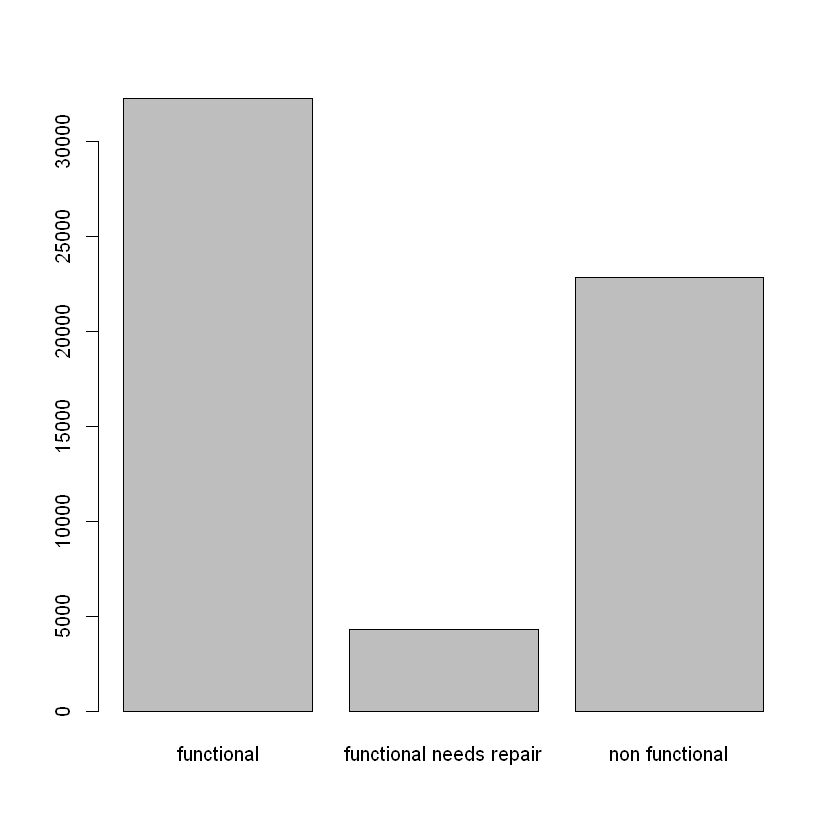

In [41]:
barplot(table(demo_data$status_group))

In [42]:
dim(demo_data)

[1] 59400    41

### Over sampling

In [110]:
create_over_sampling_dataset <- function(df) {
    to_dup <- df[data$status_group == "functional needs repair",]
    for(i in 1:1) {
        df <- rbind(df,to_dup)
    }
    to_remove <- which(data$status_group == "functional")[1:10000]
    #print(to_remove)
    return(df[-to_remove,])
}

In [70]:
demo_data <- data

In [71]:
dem <- create_over_sampling_dataset(demo_data)

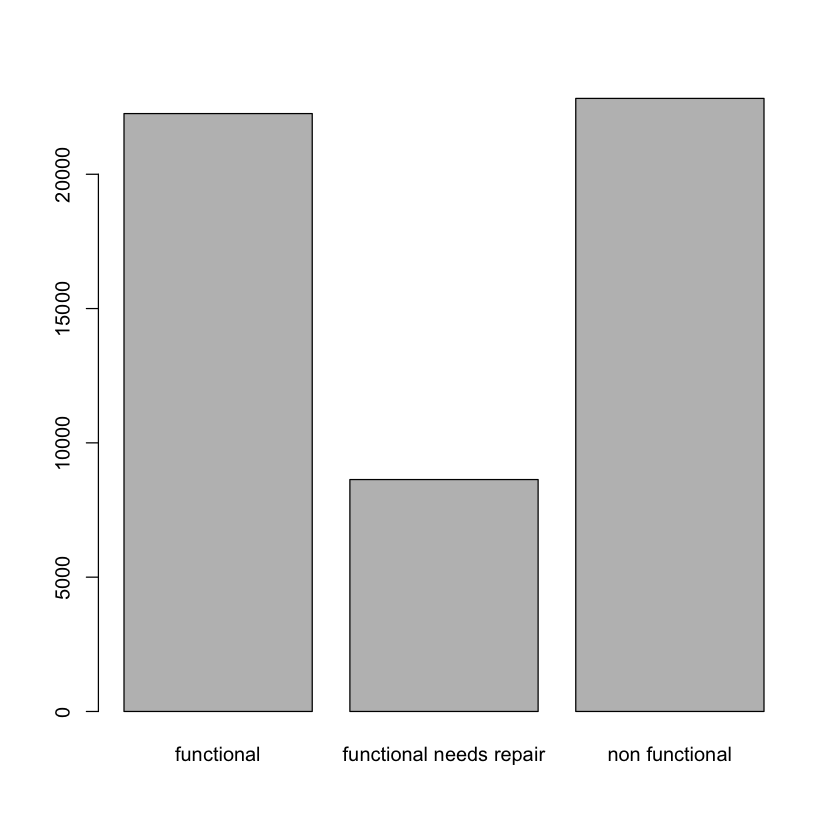

In [72]:
barplot(table(dem$status_group))

In [73]:
dim(demo_data)

[1] 59400    41

# Feature selection

## mRMR on one-hot encoded data

In [111]:
apply_mrmr_numerical <- function(df) {
    #print(head(df[,ncol(df)]))
    X <- subset(df,select=-c(status_group))
    #print(colnames(df))
    dum <- dummy.data.frame(subset(df,select=c(status_group)),names=c("status_group"), sep="_")
    correlation <- numeric(ncol(X))
    #print(head(dum))
    #print(head(dum[,1]))
    for(i in 1:ncol(dum)) {
        correlation <- correlation + abs(cor(X,dum[,i]))
    }
    correlation <- correlation / 3
    #print(correlation)
    n <- ncol(X)
    selected_features <- c()
    candidate_features <- 1:n
    #message(correlation)
    for(j in 1:n) {
        redundancy_score <- numeric(length(candidate_features))
        if (length(selected_features)>0) {
            cor_selected_candidates <- cor(X[,selected_features,drop=F],X[,candidate_features,drop=F])
            redundancy_score <- apply(cor_selected_candidates,2,mean)
        }
        mRMR_score <- correlation[candidate_features] - redundancy_score
        best_candidate <- candidate_features[which.max(mRMR_score)]
        message(best_candidate)
        selected_features<-c(selected_features,best_candidate)
        
        candidate_features <- setdiff(candidate_features,best_candidate)
    }
    return(selected_features)
}

In [112]:
get_k_mrmr_variables <- function(df,k) {
    sorted_features <- apply_mrmr_numerical(df[,1:ncol(df)])    
    df <- df[,sorted_features[1:k]]
    return(df)
}

## mRMR on categorical data

In [113]:
apply_mrmr <- function(X,Y) {
    selected_features <- c()
    n <- ncol(X)
    candidate_features <- 1:n
    correlation <- c()
    for (i in 1:n) {
        chi_value <- chisq.test(X[,i], Y)
        correlation[i] <- chi_value$statistic
    }
    message(correlation)
    correlation <- correlation/max(correlation)
    redundancy_score <- c()
    for(j in 1:n) {
        redundancy_score <- numeric(length(candidate_features))
        if(length(selected_features) > 0) {
            for (c in 1:length(candidate_features)) {
                redundancy_cor <- numeric(length(selected_features))
                for (s in 1:length(selected_features)) {
                    #print(length(X[,selected_features[s]]))
                    #print(length(X[,candidate_features[c]]))
                    chi_value <- chisq.test(X[,selected_features[s]],X[,candidate_features[c]])
                    redundancy_cor[s]  <- chi_value$statistic
                    message(chi_value$statistic)
                }
                message(redundancy_cor)
                redundancy_score[c] <- mean(redundancy_cor)
            }
        }
        #message(redundancy_score)
        mRMR_score <- correlation[candidate_features] - redundancy_score
        #message(mRMR_score)
        #message(candidate_features)
        max_score_candidate <- candidate_features[which.max(mRMR_score)]
        message(max_score_candidate)
        selected_features <- c(selected_features,max_score_candidate)
        candidate_features <- setdiff(candidate_features,max_score_candidate)
    }
    #write(selected_features,"selected_features.txt")
    #print(selected_features)
}

## PCA

In [114]:
pca <- function(df,nb_components){
    X <- df[,setdiff(colnames(df),"status_group")]
    print("HHEEEERRREEE")
    print(head(X))
    # Compute PCA on the full input dataset X and return the dataset transformed in the space of principal components
    X_pca <- prcomp(X, scale=TRUE) 

    ## make a scree plot
    X_pca.var <- X_pca$sdev^2
    X_pca.var.per <- round(X_pca.var/sum(X_pca.var)*100, 1)
    barplot(X_pca.var.per, main="Scree Plot", xlab="Principal Component", ylab="Percent Variation")
    return(X_pca)

}

pca_select <- function (df,X_pca,nb_components){
    X_pca <- predict(X_pca,newdata=df)[,1:nb_components]
    return(X_pca)
}


In [69]:
library(dummies)
load(file = "data_preproc.Rdata")

#data_preproc_onehot <- dummy.data.frame(data_preproc, sep="_")
#colnames(data_preproc_onehot) <- gsub(colnames(data_preproc_onehot),pattern = " ", replacement = "_")
#targets <- c("status_group_functional","status_group_functional_needs_repair","status_group_non_functional")
#X <- data_preproc_onehot[,setdiff(colnames(data_preproc_onehot),targets)]

head(data_preproc)

#X_pca <- pca(data)
train <- pca_select(data_preproc,X_pca,20)
test <- pca_select(data_preproc,X_pca,20)

print(head(train))
print(head(test))


,PC1,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC2,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC3,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC4,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC5,PC50,PC6,PC7,PC8,PC9,status_group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2,0.1422004,4.73789710,-3.7774477,-2.4175118,0.3627781,0.014107703,2.64737194,1.0556379,-0.2433008,-4.7696795,2.4239214,-2.1888820,-1.8011605,-0.89558964,1.3684825,13.0008559,-2.9292394,2.17115862,4.8973538,2.449458805,-1.7063664,2.8286022,3.5871625,-0.3039644,-3.3225913,0.48881081,-1.8451100,-0.5053846,-2.6214424,1.6758888,1.0886073,-1.35936260,0.1360649,-2.156381,-1.96498861,-0.05658106,0.79611934,-0.43576123,-1.308715,-0.01565141,-0.72601238,0.08564455,0.85954497,1.08326875,2.466062,1.1002988,-1.54186468,0.5384452,1.5816984,-3.2934711,functional
3,1.3551975,0.31517882,1.0911793,-3.0192451,-0.2634589,-2.277061715,-3.08123103,-1.0666948,-1.4335927,1.0301223,1.2676524,4.4026284,-0.9946493,-0.60453117,-0.1845632,1.6394496,0.4347905,-0.23939780,0.7386134,-0.271307053,1.0138925,0.1258319,-0.3185119,-0.5089410,1.1309114,-0.13519920,0.1076175,1.9081016,-0.1198025,0.4266696,-2.0482852,1.46495532,-2.1554758,-4.846687,0.84783294,-0.32656910,-0.11447037,0.67489238,-1.476230,-0.24701041,0.30706247,-0.07566428,0.35454594,0.19850440,-3.255916,-0.8106496,-1.54895867,-3.5078484,-2.9059162,2.1519053,functional
4,-4.4772377,-0.95202202,-0.1723763,-1.1140211,-1.1152061,-0.009461555,-1.41140195,-0.3964169,2.8097381,-0.8293456,-0.1545236,-0.2084357,1.7027865,0.61472101,-2.6519122,0.1800655,0.7488732,-2.39025575,2.5967794,1.405056920,1.2535529,0.1503675,-2.6568820,-1.1992217,-0.5269160,-0.28426031,1.4709682,-1.7045716,0.4438254,0.3748039,0.6147990,-0.22978754,-2.1892074,1.258881,0.06283596,2.32227565,1.86587452,0.79683565,-1.199406,1.58919930,0.85792162,0.20155806,-0.72000084,0.97221802,-1.933859,-0.4683181,-2.73429776,2.0181177,1.3983427,0.7312356,functional
5,3.1581407,-0.03882637,1.7721561,-2.1639031,-0.3607180,-1.528831267,-1.43362821,-0.5736171,-2.5562884,0.3583138,-0.2050206,-0.2481155,-0.5242314,0.08701058,-0.2510509,1.1624587,0.1802814,-0.51392397,0.9044260,-0.785054746,2.7245920,0.5982718,-0.1791075,-0.8844563,1.6513982,-0.02860143,-1.4126520,1.2110244,-1.8405269,-1.5258123,-3.1703855,1.71989196,-1.9566216,-2.985885,0.24715429,1.60645209,-1.29563732,-1.18798617,-2.341308,1.04505772,0.08531714,-0.55092512,-0.09879727,0.02992364,-1.412326,-0.7108099,-0.64661190,-1.3012442,-1.3974918,1.1916273,non functional
6,1.8186173,-1.79337879,-2.4066110,-0.1278334,2.6732053,0.661530327,1.85417881,-2.6040918,-1.3916564,0.9330061,-0.5265823,9.1847877,2.6037067,0.77837434,-0.7044244,-0.7748405,-2.7520139,-0.08011406,1.2191096,-2.117933813,0.9397069,-0.3988439,-0.1325509,2.5093050,-0.9299869,-2.68950176,1.8085350,0.2486526,-2.3785461,-1.6654162,0.8361394,-0.08977567,-1.2584733,-1.882693,0.14151491,-0.80041266,0.32342191,0.09125196,1.634799,0.22396007,1.92392722,1.82360522,0.72130852,-1.08358060,3.238764,0.3340740,-0.06423564,3.0454870,2.0934206,-1.2761156,functional
7,3.1838958,2.58745118,1.8352241,-0.6703070,1.3074122,-0.264921044,0.01562419,1.1131884,2.7434250,0.7721274,-1.3863207,-0.9474413,1.1482834,0.26999250,1.1895965,0.7801701,-0.2768504,-0.86308763,0.0744318,-0.003615789,0.2461089,-0.6452805,-2.3181586,1.0032617,0.5311455,-0.46833516,1.0910948,-0.1519931,-1.9933048,0.5579142,-1.1584682,-0.12682617,0.1540672,1.451001,-0.37172520,0.45500165,-0.09884611,1.51738798,1.049699,-0.89323261,-1.47908519,0.25478576,1.34668561,-1.37500203,-1.083295,-0.8440941,2.57060606,-1.4057763,-0.3344205,-1.0932233,non functional


  id amount_tsh date_recorded          funder gps_height installer longitude
1  0          0    2012-11-13           Tasaf          0     TASAF  33.12583
2  1          0    2011-03-05           Shipo       1978     SHIPO  34.77072
3  2          0    2011-03-27            Lvia          0      LVIA  36.11506
4  3         10    2013-06-03 Germany Republi       1639       CES  37.14743
5  4          0    2011-03-22            Cmsr          0      CMSR  36.16489
6  5         50    2011-02-26         Private         28   Private  39.28612
   latitude       wpt_name num_private           basin subvillage      region
1 -5.118154        Mratibu           0 Lake Tanganyika    Majengo      Tabora
2 -9.395642           none           0          Rufiji   Magoda C      Iringa
3 -6.279268        Bombani           0     Wami / Ruvu Songambele      Dodoma
4 -3.187555 Area 7 Namba 5           0         Pangani    Urereni Kilimanjaro
5 -6.099289        Ezeleda           0     Wami / Ruvu    Maata A      

ERROR: Error in colMeans(x, na.rm = TRUE): 'x' doit être numérique


# Call the preprocessing functions

In [115]:
preprocess_basic_training <- function(df){
    df <- remove_id(df)
    df <- remove_scheme_name(df)
    df <- one_hot_construction_year(df)
    df <- remove_redundant_features(df)
    #df <- create_over_sampling_dataset(df)
    df <- remove_useless_features(df)
    df <- create_binary_features(df)
    df <- convert_date_to_numeric(df)
    df <- convert_installer_to_binary(df)
    df <- convert_funder_to_binary(df)
    df <- discard_unrealistic_coordinates(df)
    df <- generate_regions(df)
    df <- remove_features_many_levels(df)
    df <- one_hot_encoding_training(df)
    colnames(df) <- gsub(colnames(df),pattern = " ", replacement = "_")
    return (df)
}

In [116]:
preprocess_training_mrmr <- function(df) {
    df <- preprocess_basic_training(df)
    #df_no_status <- subset(df,select=-c(status_group))
    #df <- cbind(df_no_status,subset(df,select=c(status_group)))
    print(head(df))
    df_ordered <- get_k_mrmr_variables(df,100)
    df_ordered <- df_ordered[,order(names(df_ordered))]
    print(head(df_ordered))
    df <- cbind(df_ordered,subset(df,select=c(status_group)))
    df <- create_over_sampling_dataset(df)
    #df <- create_smote_dataset(df)
    write(colnames(subset(df,select=-c(status_group))),"features.txt")
    return(df)
}

In [117]:
preprocess_training_pca <- function(df) {
    df <- preprocess_basic_training(df)
    df <- df[,order(colnames(df))]
    write(colnames(subset(df,select=-c(status_group))),"features.txt")
    X_pca <- pca(df)
    save(X_pca, file = "X_pca.Rdata")
    df_pca <- df[,setdiff(colnames(df),"status_group")]
    df_no_status <- pca_select(df_pca,X_pca,50)
    df_ordered <- df_no_status[,order(colnames(df_no_status))]
    df <- cbind(df_ordered,subset(df,select=c(status_group)))
    # df <- create_smote_dataset(df) peut etre que faire le pca puis le smote marchera mtn vu qu'il est à la fin mtn
    return(df)
}

In [118]:
preprocess_test_mrmr <- function(df) {
   df <- remove_useless_features(df)
    df <- convert_date_to_numeric(df)
    #df <- discard_unrealistic_coordinates(df)
    df <- set_existing_regions(df)
    df <- remove_features_many_levels(df)
    df <- one_hot_encoding_test(df)
    colnames(df) <- gsub(colnames(df),pattern = " ", replacement = "_")
    features_list <- scan("features.txt",what = " ")
    column_names <- colnames(df)
    #Removing all columns that did not appear in training
    cols_to_remove <- c()
    for(c in 1:ncol(df)) {
        if(!(column_names[c] %in% features_list)) {
            #print(column_names[c])
            cols_to_remove <- c(cols_to_remove,c)
        }
    }
    df <- df[,-cols_to_remove]
      
    #Adding empty columns for missing features
    test_columns <- colnames(df)
    for(c in 1:length(features_list)) {
        if(!(features_list[c] %in% test_columns)) {
            #print(features_list[c])
            df[,features_list[c]] = 0
        }
    }
    df <- df[,order(names(df))]
    return(df)
}

In [119]:
preprocess_test_pca <- function(df) {
    df <- preprocess_test(df)
    load(file = "X_pca.Rdata")
    print(dim(df))
    df_no_status <- pca_select(df,X_pca,50)
    df_ordered <- df_no_status[,order(colnames(df_no_status))]

   # df_no_status <- subset(df_no_status,select=-c(status_group))
    #df_ordered <- df_no_status[,order(colnames(df_no_status))]

    return(df_ordered)
}

In [120]:
#data_preproc <- preprocess_training(data)
data_preproc <- preprocess_training_pca(data)
#save(data_preproc, file = "data_preproc.Rdata")

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts ar

[1] "HHEEEERRREEE"
  amount_tsh basin_Internal basin_Lake_Nyasa basin_Lake_Rukwa
2          0              0                0                0
3          0              0                0                0
4         10              0                0                0
5          0              0                0                0
6         50              0                0                0
7          0              1                0                0
  basin_Lake_Tanganyika basin_Lake_Victoria basin_Pangani basin_Rufiji
2                     0                   0             0            1
3                     0                   0             0            0
4                     0                   0             1            0
5                     0                   0             0            0
6                     0                   0             0            0
7                     0                   0             0            0
  basin_Ruvuma_/_Southern_Coast basin_Wami_/_Ruvu 

ERROR: Error in prcomp.default(X, scale = TRUE): cannot rescale a constant/zero column to unit variance


,PC1,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC2,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC3,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC4,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC5,PC50,PC6,PC7,PC8,PC9,status_group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2,0.1422004,4.73789710,-3.7774477,-2.4175118,0.3627781,0.014107703,2.64737194,1.0556379,-0.2433008,-4.7696795,2.4239214,-2.1888820,-1.8011605,-0.89558964,1.3684825,13.0008559,-2.9292394,2.17115862,4.8973538,2.449458805,-1.7063664,2.8286022,3.5871625,-0.3039644,-3.3225913,0.48881081,-1.8451100,-0.5053846,-2.6214424,1.6758888,1.0886073,-1.35936260,0.1360649,-2.156381,-1.96498861,-0.05658106,0.79611934,-0.43576123,-1.308715,-0.01565141,-0.72601238,0.08564455,0.85954497,1.08326875,2.466062,1.1002988,-1.54186468,0.5384452,1.5816984,-3.2934711,functional
3,1.3551975,0.31517882,1.0911793,-3.0192451,-0.2634589,-2.277061715,-3.08123103,-1.0666948,-1.4335927,1.0301223,1.2676524,4.4026284,-0.9946493,-0.60453117,-0.1845632,1.6394496,0.4347905,-0.23939780,0.7386134,-0.271307053,1.0138925,0.1258319,-0.3185119,-0.5089410,1.1309114,-0.13519920,0.1076175,1.9081016,-0.1198025,0.4266696,-2.0482852,1.46495532,-2.1554758,-4.846687,0.84783294,-0.32656910,-0.11447037,0.67489238,-1.476230,-0.24701041,0.30706247,-0.07566428,0.35454594,0.19850440,-3.255916,-0.8106496,-1.54895867,-3.5078484,-2.9059162,2.1519053,functional
4,-4.4772377,-0.95202202,-0.1723763,-1.1140211,-1.1152061,-0.009461555,-1.41140195,-0.3964169,2.8097381,-0.8293456,-0.1545236,-0.2084357,1.7027865,0.61472101,-2.6519122,0.1800655,0.7488732,-2.39025575,2.5967794,1.405056920,1.2535529,0.1503675,-2.6568820,-1.1992217,-0.5269160,-0.28426031,1.4709682,-1.7045716,0.4438254,0.3748039,0.6147990,-0.22978754,-2.1892074,1.258881,0.06283596,2.32227565,1.86587452,0.79683565,-1.199406,1.58919930,0.85792162,0.20155806,-0.72000084,0.97221802,-1.933859,-0.4683181,-2.73429776,2.0181177,1.3983427,0.7312356,functional
5,3.1581407,-0.03882637,1.7721561,-2.1639031,-0.3607180,-1.528831267,-1.43362821,-0.5736171,-2.5562884,0.3583138,-0.2050206,-0.2481155,-0.5242314,0.08701058,-0.2510509,1.1624587,0.1802814,-0.51392397,0.9044260,-0.785054746,2.7245920,0.5982718,-0.1791075,-0.8844563,1.6513982,-0.02860143,-1.4126520,1.2110244,-1.8405269,-1.5258123,-3.1703855,1.71989196,-1.9566216,-2.985885,0.24715429,1.60645209,-1.29563732,-1.18798617,-2.341308,1.04505772,0.08531714,-0.55092512,-0.09879727,0.02992364,-1.412326,-0.7108099,-0.64661190,-1.3012442,-1.3974918,1.1916273,non functional
6,1.8186173,-1.79337879,-2.4066110,-0.1278334,2.6732053,0.661530327,1.85417881,-2.6040918,-1.3916564,0.9330061,-0.5265823,9.1847877,2.6037067,0.77837434,-0.7044244,-0.7748405,-2.7520139,-0.08011406,1.2191096,-2.117933813,0.9397069,-0.3988439,-0.1325509,2.5093050,-0.9299869,-2.68950176,1.8085350,0.2486526,-2.3785461,-1.6654162,0.8361394,-0.08977567,-1.2584733,-1.882693,0.14151491,-0.80041266,0.32342191,0.09125196,1.634799,0.22396007,1.92392722,1.82360522,0.72130852,-1.08358060,3.238764,0.3340740,-0.06423564,3.0454870,2.0934206,-1.2761156,functional
7,3.1838958,2.58745118,1.8352241,-0.6703070,1.3074122,-0.264921044,0.01562419,1.1131884,2.7434250,0.7721274,-1.3863207,-0.9474413,1.1482834,0.26999250,1.1895965,0.7801701,-0.2768504,-0.86308763,0.0744318,-0.003615789,0.2461089,-0.6452805,-2.3181586,1.0032617,0.5311455,-0.46833516,1.0910948,-0.1519931,-1.9933048,0.5579142,-1.1584682,-0.12682617,0.1540672,1.451001,-0.37172520,0.45500165,-0.09884611,1.51738798,1.049699,-0.89323261,-1.47908519,0.25478576,1.34668561,-1.37500203,-1.083295,-0.8440941,2.57060606,-1.4057763,-0.3344205,-1.0932233,non functional


[1] 53042    51

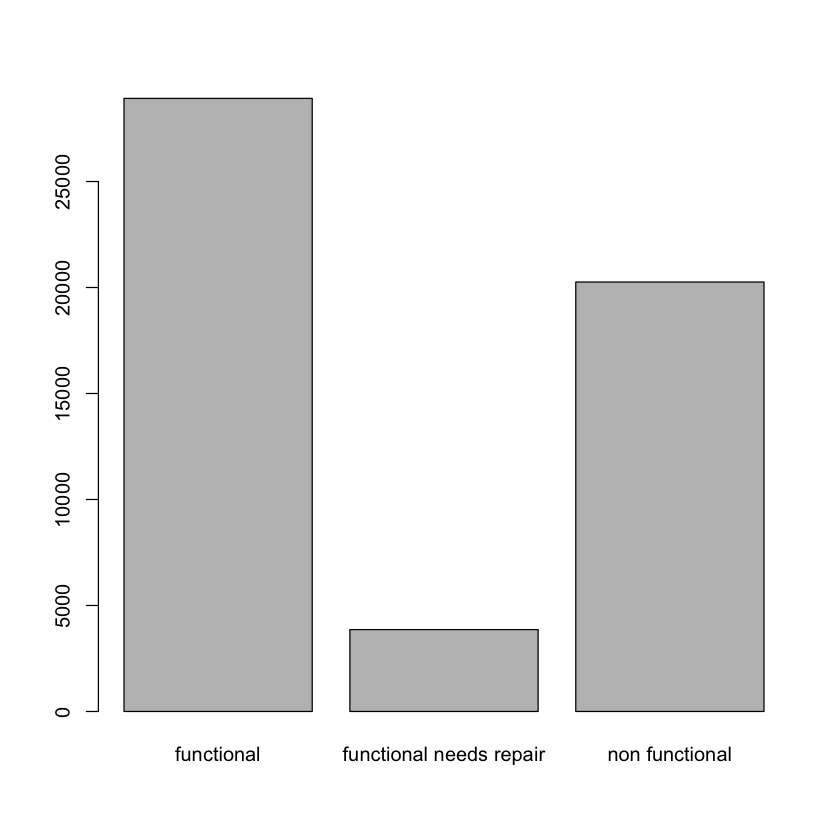

In [46]:
save(data_preproc, file = "data_preproc.Rdata")
head(data_preproc)
dim(data_preproc)
barplot(table(data_preproc$status_group))

In [73]:
#test_preproc <- preprocess_test(eval_data)
test_preproc <- preprocess_test2(eval_data)
#save(test_preproc, file = "test_preproc.Rdata")

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts ar

[1] 14850   242


In [74]:
dim(test_preproc)

[1] 14850    50

In [75]:
train_cols <- colnames(data_preproc)
for(c in colnames(test_preproc)) {
    if(!(c %in% train_cols)) {
        print(c)
    }
}

## Feature engineering

## Feature selection

# Model selection

## Model 1


In [123]:
accuracyFromConfusionMatrix <- function(confusion_matrix){
   
    full_confusion_matrix <-matrix(0, nrow = 3, ncol = 3)
    colnames(full_confusion_matrix) <- colnames(confusion_matrix)
    rownames(full_confusion_matrix) <- colnames(confusion_matrix)
    full_confusion_matrix[rownames(confusion_matrix),] <- confusion_matrix[rownames(confusion_matrix),]
    return((full_confusion_matrix[1,1]+full_confusion_matrix[2,2]+full_confusion_matrix[3,3])/sum(full_confusion_matrix))
}


computeResults <- function(Y,Y_hat,explanatory_string="",verbose=TRUE){
 
    confusion_matrix <- table(Y_hat,Y)
    accuracy <- accuracyFromConfusionMatrix(confusion_matrix)
    misclassification_rate <- 1 - accuracy
    
    if(verbose){
        print(paste("[INFO] - Confusion matrix",explanatory_string,":"))
        print(confusion_matrix)
        print(paste("[INFO] - Accuracy",explanatory_string,":",accuracy))
        print(paste("[INFO] - Misclassification rate",explanatory_string,":",misclassification_rate))
    }
    return(accuracy)
}

In [67]:
library("nnet")
library("randomForest")
library("RSNNS")

#Cross validation
crossValidationInOutSample <- function(parameter,k,model_type){
    data <- data_preproc
    target_variable <- ncol(data)
    accuracy_vec <- c()
    
    # 1. Shuffle the dataset randomly.
    data_idx <- sample(1:nrow(data))
    half_split <- floor(nrow(data)/2)
    target_variable <- ncol(data)
    
    # 2. Split the dataset into k groups
    max <- ceiling(nrow(data)/k)
    splits <- split(data_idx, ceiling(seq_along(data_idx)/max))
    
     # 2. Normalize dataset
    data_n <- data[,-target_variable]
    scaled <- scale(data_n)

    # 3. For each unique group:
    for (i in 1:k){
        if (model_type=="nnet" || model_type=="random_forest"){
            #3.1 Take the group as a hold out or test data set
            train_data <- data[-splits[[i]],]
            #3.2 Take the remaining groups as a training data set
            test_data <- data[splits[[i]],]
            Y <- test_data[,target_variable]
            print(paste("[INFO] - Training set size:",dim(train_data)[1],"- Testing set size",dim(test_data)[1]))
        }
        if (model_type=="radial" || model_type=="mlp"){
            train_data <- scaled[-splits[[i]],]
            train_label <- data[-splits[[i]],target_variable]
            test_data <- scaled[splits[[i]],]
            test_label <- data[splits[[i]],target_variable]
            n_train <- dim(train_data)[1]
            Y <- test_label
        } 
        #3.3 Fit a model on the training set and evaluate it on the test set
        if(model_type=="nnet"){
              model_single_out <- nnet(status_group ~ ., data=train_data,size=parameter,
                                 skip=FALSE, maxit=100,rang=0.2,MaxNWts=10000,trace=FALSE)
              Y_pred<-predict(model_single_out,test_data[,-target_variable])
              Y_hat <- colnames(Y_pred)[max.col(Y_pred,ties.method="first")]
     
        }
        if(model_type=="random_forest"){
            model_single_out <- randomForest(x=train_data[,-c(target_variable)],
                          y=as.factor(train_data[,c(target_variable)]),
                          xtest=test_data[,-c(target_variable)],
                          ytest=as.factor(test_data[,c(target_variable)]),
                          ntree=parameter,keep.forest=TRUE)
            Y_hat <- predict(model_single_out,newdata = test_data[,-target_variable])
            
            #accuracy_vec[i] = (model$test$confusion[1,1]+model$test$confusion[2,2]+model$test$confusion[3,3])/sum(model$test$confusion)
        }
        if (model_type=="radial"){
          model <- RSNNS::rbf(as.matrix(train_data),
                           decodeClassLabels(as.matrix(train_label)), # Training labels must be provided with one-hot-encoding
                           size=parameter, 
                           maxit=75, 
                           #initFuncParams=c(0, 1, 0, 0.01, 0.01),
                           #initFunc="RBF_Weights_Kohonen",
                           learnFuncParams=c(1e-8, 0, 1e-8, 0.1, 0.8), linOut=T, trace=T)
          Y_pred <- predict(model,test_data)
          colnames(Y_pred) <- c("functional", "functional needs repair", "non functional")
          Y_hat <- colnames(Y_pred)[max.col(Y_pred,ties.method="first")]

        }
        if(model_type=="mlp"){
              model <- mlp(train_data, decodeClassLabels(train_label), size =parameter, maxit = 100)
              Y_pred <- predict(model,test_data)
              colnames(Y_pred) <- c("functional", "functional needs repair", "non functional")
              Y_hat <- colnames(Y_pred)[max.col(Y_pred,ties.method="first")]
         }


        accuracy_vec[i] <- computeResults(Y,Y_hat,paste(i,"fold"))

        }

    # 4.1 Summarize the skill of the model using the sample of model evaluation scores
    print(paste("[INFO] - CV - Accuracy:",mean(accuracy_vec)))
    print(paste("[INFO] - CV - Mean misclassification rate:",1-mean(accuracy_vec)))
    
    accuracy <- inOutSampleTest(data,scaled,target_variable,data_idx,half_split,parameter)
    
    return(list(in_sample=accuracy$in_sample,out_sample=accuracy$out_sample,cv=mean(accuracy_vec)))
}




Warning message:
"package 'nnet' was built under R version 4.0.5"
Warning message:
"package 'randomForest' was built under R version 4.0.5"
randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.

Warning message:
"package 'RSNNS' was built under R version 4.0.5"
Loading required package: Rcpp

Warning message:
"package 'Rcpp' was built under R version 4.0.5"


In [68]:
inOutSampleTest <- function(data,scaled,target_variable,data_idx,half_split,parameter){
     # 4.2 Split training-test for in/out of sample predictions
    if (model_type=="nnet" || model_type=="random_forest"){
        train_data <- data[data_idx[1:half_split],]
        test_data <- data[data_idx[(half_split+1):nrow(data)],]
    } 
    if (model_type=="radial" || model_type=="mlp"){
        train_data <- scaled[data_idx[1:half_split],]
        test_data <- scaled[data_idx[(half_split+1):nrow(data)],]
        n_train <- dim(train_data)[1]
    } 
    train_label <- data[data_idx[1:half_split],target_variable]
    test_label <- data[data_idx[(half_split+1):nrow(data)],target_variable]
    Y <- test_label
    if(model_type=="nnet"){
        model_single_out <- nnet(status_group ~ ., data=train_data,size=parameter,trace=F,skip=FALSE,maxit=100,rang=0.2,MaxNWts=10000)

    } 
    if(model_type=="random_forest"){
            model_single_out <- randomForest(x=train_data[,-c(target_variable)],
                          y=as.factor(train_data[,c(target_variable)]),
                          xtest=test_data[,-c(target_variable)],
                          ytest=as.factor(test_data[,c(target_variable)]),
                          ntree=parameter,keep.forest=TRUE)
            
    } 
    if (model_type=="radial"){
      model_single_out <- RSNNS::rbf(as.matrix(train_data),
                       decodeClassLabels(as.matrix(train_label)), # Training labels must be provided with one-hot-encoding
                       size=parameter, 
                       maxit=75, 
                       #initFuncParams=c(0, 1, 0, 0.01, 0.01),
                       #initFunc="RBF_Weights_Kohonen",
                       learnFuncParams=c(1e-8, 0, 1e-8, 0.1, 0.8), linOut=T, trace=T)
    } 
    if(model_type=="mlp"){
          model_single_out <- mlp(train_data, decodeClassLabels(train_label), size =parameter, maxit = 100)
    } 
    
    if(model_type=="random_forest"){
        # In sample evaluation 
        Y_hat_single_out_in_sample  <- predict(model_single_out,train_data[,-target_variable])
        # Out of sample evaluation 
        Y_hat_single_out_out_sample <- predict(model_single_out,test_data[,-target_variable])
    }else{
        # In sample evaluation 
        Y_pred<-predict(model_single_out,train_data[,-target_variable])
        colnames(Y_pred) <- c("functional", "functional needs repair", "non functional")
        Y_hat_single_out_in_sample <- colnames(Y_pred)[max.col(Y_pred,ties.method="first")]
         # Out of sample evaluation 
        Y_pred<-predict(model_single_out,test_data[,-target_variable])
        colnames(Y_pred) <- c("functional", "functional needs repair", "non functional")
        Y_hat_single_out_out_sample <- colnames(Y_pred)[max.col(Y_pred,ties.method="first")]
    }
      
    #print(head(Y_hat_single_out_in_sample))  
    accuracy_in_sample <- computeResults(train_label,Y_hat_single_out_in_sample,"In sample")
    accuracy_out_sample <- computeResults(Y,Y_hat_single_out_out_sample,"Out sample")
    return (list(in_sample=accuracy_in_sample,out_sample=accuracy_out_sample))
}


In [69]:
applyCVInOutComp <- function(parameters,k,model_type){
    error_in_sample_vec <- numeric()
    error_out_sample_vec <- numeric()
    error_cv_vec <- numeric()

    for(parameter in parameters){
        print(paste("[INFO] - Testing h=",parameter))
        results <- crossValidationInOutSample(parameter,k,model_type)
        error_in_sample_vec <- c(error_in_sample_vec,results$in_sample)
        error_out_sample_vec <- c(error_out_sample_vec,results$out_sample)
        error_cv_vec <- c(error_cv_vec,results$cv)
    }
    save(error_in_sample_vec,error_out_sample_vec,error_cv_vec,file="CV.Rdata")
}
    

In [70]:
model_type = "nnet"
k <- 2
#parameters <- c(c(2,1),c(5,2),3)
parameters <- list(1,3,2)
load(file = "data_preproc.Rdata")
applyCVInOutComp(parameters,k,model_type)


[1] "[INFO] - Testing h= 1"
[1] "[INFO] - Training set size: 26521 - Testing set size 26521"
[1] "[INFO] - Confusion matrix 1 fold :"
                Y
Y_hat            functional functional needs repair non functional
  functional          12922                    1665           4462
  non functional       1463                     311           5698
[1] "[INFO] - Accuracy 1 fold : 0.702085140077674"
[1] "[INFO] - Misclassification rate 1 fold : 0.297914859922326"
[1] "[INFO] - Training set size: 26521 - Testing set size 26521"
[1] "[INFO] - Confusion matrix 2 fold :"
                Y
Y_hat            functional functional needs repair non functional
  functional          12796                    1419           4170
  non functional       1740                     467           5929
[1] "[INFO] - Accuracy 2 fold : 0.706044266807436"
[1] "[INFO] - Misclassification rate 2 fold : 0.293955733192564"
[1] "[INFO] - CV - Accuracy: 0.704064703442555"
[1] "[INFO] - CV - Mean misclassification 

In [ ]:
load("CV.Rdata")
plot(parameters,error_in_sample_vec,type="n",main="Classification accuracy as a function of number of hidden neurons",xlab="Hidden neurons",ylab="Accuracy")
lines(parameters,error_in_sample_vec)
lines(parameters,error_out_sample_vec,col="blue")
lines(parameters,error_cv_vec,col="red")
legend("bottomright",legend=c("In sample","Out of sample","CV"),col=c("black","blue","red"),lty=c(1,1,1))

In [148]:
#install.packages("RSNNS")
#install.packages("nnet")
library("nnet")
library("randomForest")
library("RSNNS")

BaggingNN <- function(n_bagging_resamples,model_type,hidden_nodes){
    
     ######################
    # TO DO 
    


    # set names
    #names(list_models) = model_names
    ######################
    data <- data_preproc
    half_split <- floor(nrow(data)/2)
    target_variable <- ncol(data)
    accuracy_vec <- c()
    
    # 1. Shuffle the dataset randomly.
    set.seed(1717)
    data_idx <- sample(1:nrow(data))
    
    # 2. Normalize dataset
    data_n <- data[,-target_variable]
    scaled <- scale(data_n)
    
    # 2. Split shuffled dataset into training and test set
    if (model_type=="nnet"){
         # 2. Normalize dataset
         data<-data.frame(data_n,data[,"status_group"])
         names(data)[length(names(data))]<-"status_group" 
         train_data <- data[data_idx[1:half_split],]
         test_data <- data[data_idx[(half_split+1):nrow(data)],]
         n_train <- length(train_data)
         Y_hat_bagged<-array(0,c(length(test_data),1))
         Y <- test_data[,target_variable]
    }
     if (model_type=="radial" || model_type=="mlp"){
        train_data <- scaled[data_idx[1:half_split],]
        train_label <- data[data_idx[1:half_split],target_variable]
        test_data <- scaled[data_idx[(half_split+1):nrow(data)],]
        test_label <- data[data_idx[(half_split+1):nrow(data)],target_variable]
        n_train <- dim(train_data)[1]
        Y_hat_bagged<-array(0,c(dim(test_data)[1],1))
        Y <- test_label
    }
 
   
    Y_pred_models<-numeric()
   

    accuracy_vec<-array(0,c(1,n_bagging_resamples))
        print("okkke-1-1")
    for (i in 1:n_bagging_resamples)
    {
      # 1. Resample data from the training set
      I_bag <- sample(seq(1,n_train),replace=TRUE)
      # 2. Fit model
        #model<- 0
       # Y_pred <-  0
        print("okkke11")
      if (model_type == "nnet"){
          print("okkke22")
           model <- nnet (status_group ~ .,train_data[I_bag,],skip=FALSE,
                       size=hidden_nodes, maxit=75,trace=F,rang=0.2,MaxNWts=20000)
           Y_pred <- predict(model,test_data[,-target_variable])
           print("whaaat")
      }
     if (model_type=="radial"){
          model <- RSNNS::rbf(as.matrix(train_data[I_bag,]),
                           decodeClassLabels(as.matrix(train_label[I_bag])), # Training labels must be provided with one-hot-encoding
                           size=hidden_nodes, 
                           maxit=75, 
                           #initFuncParams=c(0, 1, 0, 0.01, 0.01),
                           #initFunc="RBF_Weights_Kohonen",
                           learnFuncParams=c(1e-8, 0, 1e-8, 0.1, 0.8), linOut=T, trace=T)
          Y_pred <- predict(model,test_data)
          colnames(Y_pred) <- c("functional", "functional needs repair", "non functional")

     }
     if(model_type=="mlp"){
          model <- mlp(train_data[I_bag,], decodeClassLabels(train_label[I_bag]), size = hidden_nodes, maxit = 100)
          Y_pred <- predict(model,test_data)
          colnames(Y_pred) <- c("functional", "functional needs repair", "non functional")
     }
      

     
    print(i)
      result_classification <- colnames(Y_pred)[max.col(Y_pred,ties.method="first")]
#       result_classification[1] <- "functional needs repair"
#       result_classification[2] <- "non functional"
      Y_pred_models <- cbind(Y_pred_models,result_classification)
      accuracy_vec[i] <- computeResults(Y,result_classification,paste(i,"th model"),verbose=F)
      #store model
      if(i==1){
           models_bagged<-list(model)
    
      }else{
           models_bagged <- c(models_bagged,list(model))

      }
     
    }


   
#     # 3. Majority vote of the classifiers to make the prediction

     Y_hat_bagged <- apply(Y_pred_models,1,function(x) names(which.max(table(x))))
     #Y <- test_data[,target_variable]

     accuracy_bag <- computeResults(Y,Y_hat_bagged,"bagged model")
     print(accuracy_bag)
     if (model_type == "nnet"){
             print("okk444")
             model_single_out <- nnet(status_group ~ ., data=train_data,size=hidden_nodes,trace=F,skip=FALSE,maxit=100,rang=0.2,MaxNWts=20000)
              
     }
     if (model_type == "radial"){  
         model_single_out <- model_single_out <- RSNNS::rbf(as.matrix(train_data),
                           decodeClassLabels(train_label),
                           #nOutputs=2,
                           size=hidden_nodes, 
                           maxit=150, 
                           #initFuncParams=c(0, 1, 0, 0.01, 0.01),
                          #initFunc="RBF_Weights_Kohonen",
                           learnFuncParams=c(1e-8, 0, 1e-8, 0.1, 0.8), linOut=T, trace=T)
         
     }
      if(model_type=="mlp"){
         model_single_out <- mlp(train_data, decodeClassLabels(train_label), size = hidden_nodes, maxit = 10)
      }
     Y_pred_single_out <- predict(model_single_out,test_data[,-target_variable])
     colnames(Y_pred_single_out) <- c("functional", "functional needs repair", "non functional")
     Y_hat_single_out <- colnames(Y_pred_single_out)[max.col(Y_pred_single_out,ties.method="first")]
     accuracy_single_out <- computeResults(Y,Y_hat_single_out,"single model")
                           
     return(list(accuracy_bagged=accuracy_bag,accuracy_simple=accuracy_single_out,bagging_accuracies=accuracy_vec,bag_models = models_bagged, single_model = model_single_out ))
}
print("done")


[1] "done"


In [72]:
#install.packages("RSNNS")
#install.packages("nnet")
library("nnet")
library("randomForest")
library("RSNNS")

Bagging_test <- function(n_bagging_resamples,model_type,hidden_nodes){
    data <- data_preproc
    target_variable <- ncol(data)
    # 1. Shuffle the dataset randomly.
    set.seed(1717)
    data_idx <- sample(1:nrow(data))
    
    # 2. Normalize dataset
    data_n <- data[,-target_variable]
    scaled <- scale(data_n)
    
    # 2. Split shuffled dataset into training and test set
    if (model_type=="nnet"){
         # 2. Normalize dataset
         data<-data.frame(data_n,data[,"status_group"])
         names(data)[length(names(data))]<-"status_group" 
         train_data <- data[data_idx[1:half_split],]
         test_data <- test_preproc
         n_train <- length(train_data)
         Y_hat_bagged<-array(0,c(length(test_data),1))
    }
     if (model_type=="radial" || model_type=="mlp"){
        train_data <- scaled[data_idx,]
        train_label <- data[data_idx,target_variable]
        test_data <- test_preproc
        n_train <- dim(train_data)[1]
        Y_hat_bagged<-array(0,c(dim(test_data)[1],1))
    }
 
   
    Y_pred_models<-numeric()
   

    accuracy_vec<-array(0,c(1,n_bagging_resamples))
    print("okkke-1-1")
    for (i in 1:n_bagging_resamples)
    {
      # 1. Resample data from the training set
      I_bag <- sample(seq(1,n_train),replace=TRUE)
      # 2. Fit model
        #model<- 0
       # Y_pred <-  0
        print("okkke11")
      if (model_type == "nnet"){
          print("okkke22")
           model <- nnet (status_group ~ .,train_data[I_bag,],skip=FALSE,
                       size=2, maxit=75,trace=F,rang=0.2,MaxNWts=20000)#to change ! (size)
           Y_pred <- predict(model,test_data)
           print("whaaat")
      }
     if (model_type=="radial"){
          model <- RSNNS::rbf(as.matrix(train_data[I_bag,]),
                           decodeClassLabels(as.matrix(train_label[I_bag])), # Training labels must be provided with one-hot-encoding
                           size=hidden_nodes, 
                           maxit=75, 
                           #initFuncParams=c(0, 1, 0, 0.01, 0.01),
                           #initFunc="RBF_Weights_Kohonen",
                           learnFuncParams=c(1e-8, 0, 1e-8, 0.1, 0.8), linOut=T, trace=T)
          Y_pred <- predict(model,test_data)
          colnames(Y_pred) <- c("functional", "functional needs repair", "non functional")

     }
     if(model_type=="mlp"){
          model <- mlp(train_data[I_bag,], decodeClassLabels(train_label[I_bag]), size = hidden_nodes, maxit = 100)
          Y_pred <- predict(model,test_data)
          colnames(Y_pred) <- c("functional", "functional needs repair", "non functional")
     }
      

     
    print(i)
      result_classification <- colnames(Y_pred)[max.col(Y_pred,ties.method="first")]
#       result_classification[1] <- "functional needs repair"
#       result_classification[2] <- "non functional"
      Y_pred_models <- cbind(Y_pred_models,result_classification)
      
    }


   
#     # 3. Majority vote of the classifiers to make the prediction

     Y_hat_bagged <- apply(Y_pred_models,1,function(x) names(which.max(table(x))))
     if (model_type == "nnet"){
             print("okk444")
             model_single_out <- nnet(status_group ~ ., data=train_data,size=hidden_nodes,trace=F,skip=FALSE,maxit=300,rang=0.2,MaxNWts=20000)
              
     }
     if (model_type == "radial"){  
         model_single_out <- model_single_out <- RSNNS::rbf(as.matrix(train_data),
                           decodeClassLabels(train_label),
                           #nOutputs=2,
                           size=hidden_nodes, 
                           maxit=150, 
                           #initFuncParams=c(0, 1, 0, 0.01, 0.01),
                          #initFunc="RBF_Weights_Kohonen",
                           learnFuncParams=c(1e-8, 0, 1e-8, 0.1, 0.8), linOut=T, trace=T)
         
     }
      if(model_type=="mlp"){
         model_single_out <- mlp(train_data, decodeClassLabels(train_label), size = hidden_nodes, maxit = 150)
      }
     Y_pred_single_out <- predict(model_single_out,test_data)
     colnames(Y_pred_single_out) <- c("functional", "functional needs repair", "non functional")
     Y_hat_single_out <- colnames(Y_pred_single_out)[max.col(Y_pred_single_out,ties.method="first")]
     return(list(single=Y_hat_single_out,bag=Y_hat_bagged))
}
print("done")


[1] "done"


In [149]:
load(file = "data_preproc.Rdata")
results <- BaggingNN(n_bagging_resamples=5,"mlp",hidden_nodes=c(32))


[1] "okkke-1-1"
[1] "okkke11"


Warning message in snnsObject$setUnitName(num, oNames[[i]]):
"SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)"
Warning message in snnsObject$setUnitName(num, oNames[[i]]):
"SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)"


[1] 1
[1] "okkke11"


Warning message in snnsObject$setUnitName(num, oNames[[i]]):
"SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)"
Warning message in snnsObject$setUnitName(num, oNames[[i]]):
"SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)"


[1] 2
[1] "okkke11"


Warning message in snnsObject$setUnitName(num, oNames[[i]]):
"SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)"
Warning message in snnsObject$setUnitName(num, oNames[[i]]):
"SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)"


[1] 3
[1] "[INFO] - Confusion matrix bagged model :"
                         Y
Y_hat                     functional functional needs repair non functional
  functional                   12911                    1289           3155
  functional needs repair        140                     215             42
  non functional                1476                     408           6885
[1] "[INFO] - Accuracy bagged model : 0.754534142754798"
[1] "[INFO] - Misclassification rate bagged model : 0.245465857245202"
[1] 0.7545341


Warning message in snnsObject$setUnitName(num, oNames[[i]]):
"SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)"
Warning message in snnsObject$setUnitName(num, oNames[[i]]):
"SNNS error message in setUnitName : SNNS-Kernel Error: Symbol pattern invalid (must match [A-Za-z][^|, ]*)"


[1] "[INFO] - Confusion matrix single model :"
                         Y
Y_hat                     functional functional needs repair non functional
  functional                   12856                    1238           3244
  functional needs repair        125                     240             94
  non functional                1546                     434           6744
[1] "[INFO] - Accuracy single model : 0.748086422080615"
[1] "[INFO] - Misclassification rate single model : 0.251913577919385"


In [157]:
load(file = "test_preproc.Rdata")
results$bag_models[3]
  Y_pred_models<-numeric()
for (model in results$bag_models){
     Y_pred <- predict(model,test_preproc)
      colnames(Y_pred) <- c("functional", "functional needs repair", "non functional")
      result_classification <- colnames(Y_pred)[max.col(Y_pred,ties.method="first")]
      Y_pred_models <- cbind(Y_pred_models,result_classification)
#    
     
}
 # 3. Majority vote of the classifiers to make the prediction
Y_hat_bagged <- apply(Y_pred_models,1,function(x) names(which.max(table(x))))

[[1]]
Class: mlp->rsnns
Number of inputs: 50 
Number of outputs: 3 
Maximal iterations: 100 
Initialization function: Randomize_Weights 
Initialization function parameters: -0.3 0.3 
Learning function: Std_Backpropagation 
Learning function parameters: 0.2 0 
Update function:Topological_Order
Update function parameters: 0 
Patterns are shuffled internally: TRUE 
Compute error in every iteration: TRUE 
Architecture Parameters:
$size
[1] 8

All members of model:
 [1] "nInputs"               "maxit"                 "initFunc"             
 [4] "initFuncParams"        "learnFunc"             "learnFuncParams"      
 [7] "updateFunc"            "updateFuncParams"      "shufflePatterns"      
[10] "computeIterativeError" "snnsObject"            "archParams"           
[13] "IterativeFitError"     "fitted.values"         "nOutputs"             


In [158]:

res <- cbind("id"=eval_data$id,"status_group"=as.character(Y_hat_bagged))
head(res)
write.csv(res,"submission.csv",row.names=FALSE)

id,status_group
50785,non functional
51630,functional
17168,non functional
45559,non functional
49871,functional
52449,functional


In [ ]:
Y_pred <- Bagging_test(n_bagging_resamples=1,"nnet",hidden_nodes=128)

## Model 2


The second model that was implemented is a Random Forest. A hyperparameter of this model is the number of trees that is used. Different values for this hyperparameter were therefore tested in order to find the ont yielding the best solution in terms of accuracy.

In [45]:
library("randomForest")

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




In [75]:
n_trees <- c(14)
data <- data_preproc
accuracy_vec <- array(0,length(n_trees))
data_idx <- sample(1:nrow(data))
half_split <- floor(nrow(data)/2)
target_variable <- ncol(data)
index <- 1
best_accuracy <- 0

for (i in n_trees){
    train_data <- data[data_idx[1:half_split],]
    test_data <- data[data_idx[(half_split+1):nrow(data)],]
    
    model <- randomForest(x=train_data[,-c(target_variable)],
                          y=as.factor(train_data[,c(target_variable)]),
                          xtest=test_data[,-c(target_variable)],
                          ytest=as.factor(test_data[,c(target_variable)]),
                          ntree=i,keep.forest=TRUE)
    print(model$test$confusion)
    accuracy_vec[index] = (model$test$confusion[1,1]+model$test$confusion[2,2]+model$test$confusion[3,3])/sum(model$test$confusion)
    if(accuracy_vec[index] > best_accuracy) {
        best_model_ <- model
        best_accuracy <- accuracy_vec[index]
    }
    index <- index + 1
}
accuracy_vec

                        functional functional needs repair non functional
functional                   12065                     604           1775
functional needs repair        951                     624            345
non functional                2327                     261           7569
                        class.error
functional                0.1647051
functional needs repair   0.6750000
non functional            0.2547996


[1] 0.763816

[1] 0.7889748 0.8021242 0.8039193 0.8083859 0.8096800 0.8123099 0.8167766
 [8] 0.8126021 0.8156078 0.8140633 0.8162339 0.8170270 0.8171105 0.8175697
[15] 0.8148146

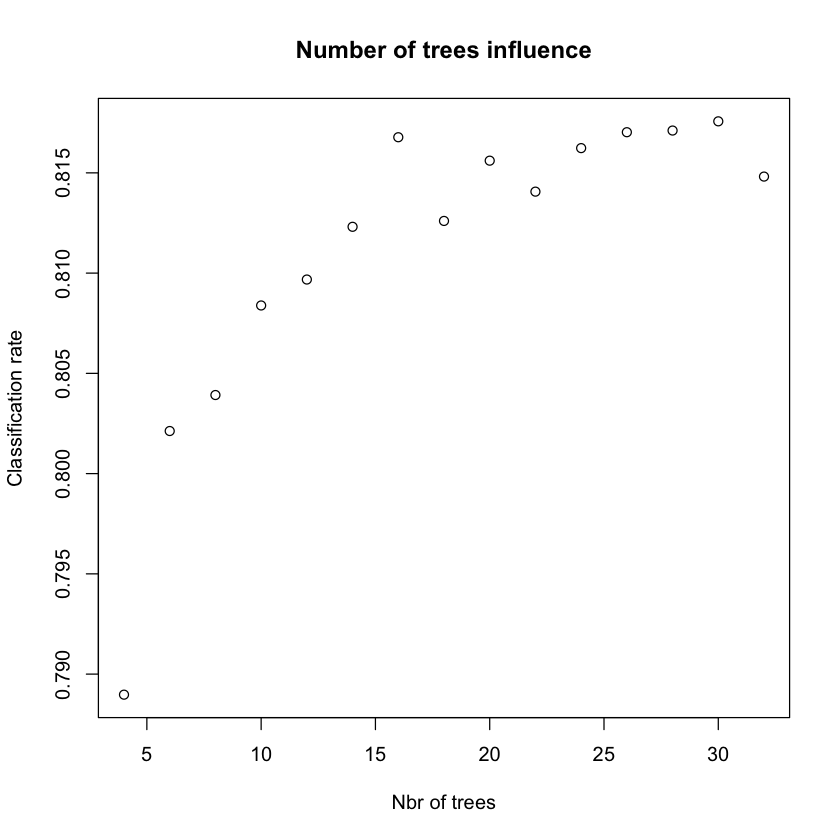

In [85]:
accuracy_vec
plot( c(4,6,8,10,12,14,16,18,20,22,24,26,28,30,32),accuracy_vec,main = "Number of trees influence",xlab = "Nbr of trees",ylab = "Classification rate")

In [59]:
Y_pred <- predict(best_model_,newdata = test_preproc)

In [65]:
res <- cbind("id"=test_preproc$id,"status_group"=as.character(Y_pred))

In [66]:
head(test_preproc,30)

,amount_tsh,basin_Lake_Nyasa,basin_Lake_Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma_/_Southern_Coast,date_recorded,district_code,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_submersible,extraction_type_group_afridev,extraction_type_group_gravity,extraction_type_group_india_mark_ii,extraction_type_group_mono,extraction_type_group_nira/tanira,extraction_type_group_other,extraction_type_group_submersible,extraction_type_group_swn_80,gps_height,id,installer,lga_Bagamoyo,⋯,quantity_unknown,region_Dodoma,region_Iringa,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Mbeya,region_Mtwara,region_Mwanza,region_Ruvuma,region_Shinyanga,region_code,source_class,source_machine_dbh,source_river,source_shallow_well,source_spring,water_quality_milky,water_quality_salty,water_quality_soft,water_quality_unknown,waterpoint_type_communal_standpipe,waterpoint_type_communal_standpipe_multiple,waterpoint_type_hand_pump,waterpoint_type_improved_spring
,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,0,0,0,0,15740,3,0,0,0,1,0,0,0,0,0,0,1,0,0,1996,50785,0,0,⋯,0,0,0,0,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,15740,2,1,0,0,0,0,0,1,0,0,0,0,0,0,1569,51630,0,0,⋯,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,1,0,1,0,0,0
3,0,0,0,0,0,0,15737,2,0,0,0,1,0,0,0,0,0,0,1,0,0,1567,17168,0,0,⋯,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,15727,43,0,0,0,1,0,0,0,0,0,0,1,0,0,267,45559,0,0,⋯,0,0,0,0,0,1,0,0,0,0,0,80,0,0,0,1,0,0,0,1,0,0,0,0,0
5,500,0,0,0,0,1,15791,3,1,0,0,0,0,0,1,0,0,0,0,0,0,1260,49871,0,0,⋯,0,0,0,0,0,0,0,0,0,1,0,10,0,0,0,0,1,0,0,1,0,1,0,0,0
6,0,0,0,1,0,0,15768,2,1,0,0,0,0,0,1,0,0,0,0,0,0,1685,52449,0,0,⋯,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,1,0,1,0,0,0
7,0,0,0,0,1,0,15035,7,0,1,0,0,0,0,0,1,0,0,0,0,0,550,24806,0,0,⋯,0,0,1,0,0,0,0,0,0,0,0,11,0,1,0,0,0,0,1,0,0,0,0,1,0
8,0,0,0,0,0,1,15730,4,0,0,0,0,1,0,0,0,0,0,0,1,0,234,28965,0,0,⋯,0,0,0,0,0,0,0,1,0,0,0,9,0,1,0,0,0,0,0,1,0,0,1,0,0
9,30,0,0,0,0,1,15728,33,1,0,0,0,0,0,1,0,0,0,0,0,0,584,36301,0,0,⋯,0,0,0,0,0,0,0,1,0,0,0,90,0,0,0,0,1,0,0,1,0,1,0,0,0


In [67]:
head(res,30)

id,status_group
50785,non functional
51630,functional
17168,non functional
45559,non functional
49871,functional needs repair
52449,functional
24806,non functional
28965,non functional
36301,non functional
54122,functional needs repair


In [62]:
write.csv(res,"submission.csv",row.names=FALSE)

## Model 3

Here we will do a model based on SVM with the package "e1071"
The svm function is used in order to create a model based on SVM. 2 important hyperparameters have to be set. We want to use the best parameter values to reach the highest accuracy as possible. To do so, preliminary tests were done in order to determine the range of the Gamma parameter and the Cost parameter.
The Gamma parameter seems to be more significant than the Cost parameter. Once the preliminary tests are done and that suitable set of Cost and Gamma are determined, we implement a k-fold cross validation for varying values of Cost $\in \{2^{10},2^{11}\}$ and  Gamma $\in \{0.001,0.01\}$. Note that the data are preprocessed with smote.

In [ ]:
"status_group" %in% colnames(data_preproc)
head(data_preproc)

In [ ]:
# install.packages("e1071")
library(e1071)

In [ ]:
datasvm <- data_preproc
data_idx <- sample(1:nrow(datasvm))
half_split <- floor(nrow(datasvm)/2)
target_variable <- ncol(datasvm)

train_data <- datasvm[data_idx[1:half_split],]
test_data <- datasvm[data_idx[(half_split+1):nrow(datasvm)],]

model <- svm(status_group ~ ., data=train_data, gamma=0.005, cost=2^{10}) #type="C-classification", kernel="linear", cost=1, scale=FALSE)


In [ ]:
#Prediction
Y_predict <- predict(model, test_data[, -target_variable])
Y_target <- test_data[, target_variable]
#Verification
length(Y_predict)
length(Y_target)
barplot(table(Y_predict))
barplot(table(Y_target))

In [ ]:
#Confusion Matrix
confusion_matrixSVM <- table(Y_predict, Y_target)
confusion_matrixSVM
accuracy <- (confusion_matrixSVM[1,1]+confusion_matrixSVM[2,2]+confusion_matrixSVM[3,3])/sum(confusion_matrixSVM)
accuracy

In [ ]:
#Prediction on set test
# test_preproc_without_id <- subset(test_preproc, select = -c(id))
Y_predictreal <- predict(model, newdata= test_preproc)

In [ ]:
res <- cbind("id"=eval_data$id,"status_group"=as.character(Y_predictreal))
barplot(table(Y_predictreal))
head(res)
dim(res)

In [ ]:
write.csv(res,"submissionSVM.csv",row.names=FALSE)

## K-fold cross validation

In [ ]:
crossValidationSVM <- function(cost=1000,gamma=0.001,k=10, data_in){
    accuracy_vec <- c()
    
    # 1. Shuffle the dataset randomly.
    data_idx <- sample(1:nrow(data_in))
    half_split <- floor(nrow(data_in)/2)
    target_variable <- ncol(data_in)
    
    # 2. Split the dataset into k groups
    max <- ceiling(nrow(data_in)/k)
    splits <- split(data_idx, ceiling(seq_along(data_idx)/max))

    # 3. For each unique group:
    for (i in 1:k){
        #3.1 Take the group as a hold out or test data set
        train_data <- data_in[-splits[[i]],]

        #3.2 Take the remaining groups as a training data set
        test_data <- data_in[splits[[i]],]
#         print(paste("[INFO] - Training set size:",dim(train_data)[1],"- Testing set size",dim(test_data)[1]))

        #3.3 Fit a model on the training set and evaluate it on the test set
        model_svm <- svm(status_group ~ ., data=train_data, gamma=gamma, cost=cost)

        Y_pred<-predict(model_svm, test_data[,-target_variable])

        Y_target <- test_data[,target_variable]
        confusion_matrix <- table(Y_pred,Y_target)
        
        #3.4 Retain the evaluation score and discard the model
        accuracy_vec[i] = (confusion_matrix[1,1]+confusion_matrix[2,2]+confusion_matrix[3,3])/sum(confusion_matrix)
        misclassification_rate = 1 - accuracy_vec[i]
        print(paste("[INFO] - Misclassification rate -",i,"fold:",misclassification_rate))
    }

    # 4.1 Summarize the skill of the model using the sample of model evaluation scores
    print(paste("[INFO] - CV - Mean misclassification rate:",1-mean(accuracy_vec)))
    print(paste("[INFO] - CV - Mean accuracy:", mean(accuracy_vec)))
    
    return(list(acc=accuracy_vec, cv=mean(accuracy_vec)))
}

In [ ]:
k <- 3
gamma <- seq(0.001,0.01, 0.002)
cost <- c(2^{10}, 2^{11})
error_cv_vec <- numeric()
accuracies_vec <- numeric()

In [ ]:
# https://rpubs.com/markloessi/506999
for (g in gamma){
    print(paste("[INFO] - Testing Gamma=",g))
    error_cv_vec_g <- numeric()
    for (c in cost){
        print(paste("[INFO] - Testing C=",c))
        results <- crossValidationSVM(cost=c, gamma=g, k=k, data_preproc)
        accuracies_vec <- cbind(accuracies_vec, results$acc)
        error_cv_vec_g <- c(error_cv_vec_g, results$cv)
    }
    error_cv_vec <- cbind(error_cv_vec, error_cv_vec_g)
}

After testing diffferent values for the hyperparameters of cost and gamma, it seems like models using a cost equal to 2^{11} provides slightly better accuracy than the models using a cost equal to 2^{10}. However, as found before, the larger the cost value is, the higher the running time to fit the model will be. Thus, we consider that a cost of 2^{10} is sufficient.

In [ ]:
#Rearranging the mean accuracy vector
colnames(error_cv_vec) <- c("0.001", "0.003", "0.005", "0.007", "0.009")
rownames(error_cv_vec) <- c("cost=1024", "cost=2048")
#Find the best value of parameter gamma
best_acc1 <- max(error_cv_vec[select="cost=1024",])
best_acc2 <- max(error_cv_vec[select="cost=2048",])
error_cv_vec
best_acc1
best_acc2

# Alternative models





## Gradient boosting

In [42]:
install.packages("xgboost")


The downloaded binary packages are in
	/var/folders/5s/m318ng1j19dd_3kmbrnrg9vh0000gn/T//RtmpFiWOhY/downloaded_packages


In [62]:
require(xgboost)

In [113]:
data <- merge(X,Y)
df <- remove_scheme_name(data)
df <- remove_redundant_features(df)
#df <- create_over_sampling_dataset(df)
df <- remove_useless_features(df)
df <- create_binary_features(df)
df <- convert_date_to_numeric(df)
df <- convert_installer_to_binary(df)
df <- discard_unrealistic_coordinates(df)
df <- generate_regions(df)
df <- remove_features_many_levels(df)
df <- one_hot_encoding_training(df)
colnames(df) <- gsub(colnames(df),pattern = " ", replacement = "_")
df_no_status <- subset(df,select=-c(status_group))
df <- cbind(df_no_status,subset(df,select=c(status_group)))
ordered_features <- apply_mrmr_numerical(df)

best_k <- 0
best_param = list()
best_seednumber = 1234
best_loss = Inf
best_loss_index = 0

for(k in seq(80,120,10)) {
    data_preproc <- df[,ordered_features[1:k]]
    #data_preproc <- subset(data_preproc,select=-c(status_group))
    data_preproc <- data_preproc[,order(names(data_preproc))]
    data_preproc <- cbind(data_preproc,subset(df,select=c(status_group)))
    data_preproc <- create_smote_dataset(data_preproc)
    write(colnames(subset(data_preproc,select=-c(status_group))),"features.txt")
    
    data <- data_preproc
    #print(head(data))
    data_idx <- sample(1:nrow(data))
    half_split <- floor(nrow(data)/2)
    train_data <- data[data_idx[1:half_split],]
    test_data <- data[data_idx[(half_split+1):nrow(data)],]
    target_variable <- ncol(data)
    labels <- as.matrix(as.numeric(train_data[,target_variable])) - 1

    for (iter in 1:50) {
        param <- list(objective = "multi:softprob",
            eval_metric = "merror",
            num_class = 3,
            max_depth = sample(10:30, 1),
            eta = runif(1, .001, .3),
            gamma = runif(1, 0.0, 0.2),
            subsample = runif(1, .6, .9),
            colsample_bytree = runif(1, .5, .8), 
            min_child_weight = sample(1:40, 1),
            max_delta_step = sample(1:10, 1)
        )
        seed.number <- sample.int(10000, 1)[[1]]
        set.seed(seed.number)

        cv.nround <- 100
        cv.nfold <- 5

        bstSparse <- xgb.cv(data = as.matrix(train_data[,-target_variable]),label=labels,params = param,
                            nthread=6, nfold=cv.nfold, nrounds=cv.nround,verbose = T,early_stopping_rounds=8, maximize=FALSE)

        #print(typeof(bstSparse))
        #print(bstSparse)
        #print("OKOK")
        #print(bstSparse[1])
        #print("OKOKOKOKO")
        min_loss <-  min(bstSparse$evaluation_log$test_merror_mean)
        min_loss_index  <- which.min(bstSparse$evaluation_log$test_merror_mean)
        message(min_loss_index)
        #print(bstSparse$evaluation_log)

        if (min_loss < best_loss) {
            best_loss <- min_loss
            best_loss_index <- min_loss_index
            best_seednumber <- seed.number
            best_param <- param
            best_k <- k
        }
    }
}
#df_no_status <- get_k_mrmr_variables(df,100)

#print(head(df_ordered))


Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts ar

[1]	train-merror:0.201759+0.000832	test-merror:0.211926+0.007920 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.193901+0.001459	test-merror:0.204716+0.006598 
[3]	train-merror:0.191730+0.001554	test-merror:0.202326+0.006820 
[4]	train-merror:0.188812+0.002362	test-merror:0.200852+0.006223 
[5]	train-merror:0.187756+0.002064	test-merror:0.201250+0.006079 
[6]	train-merror:0.186551+0.002552	test-merror:0.199856+0.005106 
[7]	train-merror:0.185844+0.001941	test-merror:0.198343+0.005534 
[8]	train-merror:0.185337+0.002228	test-merror:0.197785+0.003836 
[9]	train-merror:0.183494+0.002338	test-merror:0.196988+0.005152 
[10]	train-merror:0.182658+0.001759	test-merror:0.196948+0.004926 
[11]	train-merror:0.181751+0.001357	test-merror:0.196470+0.005978 
[12]	train-merror:0.180755+0.000938	test-merror:0.195355+0.005757 
[13]	train-merror:0.180247+0.001032	test-merror:0.195992+0.005394 
[14

77



[1]	train-merror:0.200952+0.003222	test-merror:0.213082+0.005302 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.196162+0.003046	test-merror:0.206549+0.007042 
[3]	train-merror:0.192567+0.002537	test-merror:0.202765+0.005670 
[4]	train-merror:0.189549+0.001853	test-merror:0.201291+0.006487 
[5]	train-merror:0.188912+0.001819	test-merror:0.200932+0.003966 
[6]	train-merror:0.186760+0.001686	test-merror:0.199259+0.005274 
[7]	train-merror:0.186711+0.001324	test-merror:0.199020+0.004340 
[8]	train-merror:0.185575+0.001541	test-merror:0.199060+0.004203 
[9]	train-merror:0.185217+0.001715	test-merror:0.198184+0.003968 
[10]	train-merror:0.184370+0.001124	test-merror:0.197347+0.003958 
[11]	train-merror:0.184151+0.001782	test-merror:0.197147+0.003641 
[12]	train-merror:0.183145+0.001509	test-merror:0.196510+0.004135 
[13]	train-merror:0.182568+0.001812	test-merror:0.196152+0.004536 
[14

99



[1]	train-merror:0.203920+0.002364	test-merror:0.212962+0.005941 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.195355+0.003431	test-merror:0.205155+0.005243 
[3]	train-merror:0.192417+0.002162	test-merror:0.202725+0.006065 
[4]	train-merror:0.189390+0.002864	test-merror:0.199379+0.007280 
[5]	train-merror:0.186900+0.002599	test-merror:0.196471+0.005861 
[6]	train-merror:0.184430+0.002212	test-merror:0.195793+0.004410 
[7]	train-merror:0.183126+0.001546	test-merror:0.195196+0.004166 
[8]	train-merror:0.182229+0.001502	test-merror:0.194758+0.003715 
[9]	train-merror:0.181034+0.001650	test-merror:0.193363+0.003485 
[10]	train-merror:0.179530+0.002156	test-merror:0.192128+0.004449 
[11]	train-merror:0.178584+0.002154	test-merror:0.192049+0.003117 
[12]	train-merror:0.177987+0.002130	test-merror:0.191013+0.003520 
[13]	train-merror:0.177050+0.001628	test-merror:0.190216+0.003936 
[14

36



[1]	train-merror:0.150261+0.003606	test-merror:0.198503+0.007082 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.137015+0.001795	test-merror:0.185994+0.003961 
[3]	train-merror:0.133311+0.002367	test-merror:0.184002+0.003786 
[4]	train-merror:0.130094+0.002202	test-merror:0.182449+0.004848 
[5]	train-merror:0.128491+0.001813	test-merror:0.181254+0.004728 
[6]	train-merror:0.127823+0.002814	test-merror:0.179620+0.004436 
[7]	train-merror:0.126041+0.002491	test-merror:0.178784+0.004165 
[8]	train-merror:0.122764+0.002727	test-merror:0.178226+0.004800 
[9]	train-merror:0.120802+0.002541	test-merror:0.178147+0.004395 
[10]	train-merror:0.119896+0.003189	test-merror:0.177389+0.003841 
[11]	train-merror:0.117715+0.002686	test-merror:0.176194+0.003793 
[12]	train-merror:0.116161+0.002656	test-merror:0.175796+0.003558 
[13]	train-merror:0.114389+0.002544	test-merror:0.174920+0.003362 
[14

65



[1]	train-merror:0.205105+0.002028	test-merror:0.214437+0.004333 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.199608+0.002474	test-merror:0.209656+0.005320 
[3]	train-merror:0.197387+0.001059	test-merror:0.205912+0.005111 
[4]	train-merror:0.196202+0.001751	test-merror:0.208063+0.003553 
[5]	train-merror:0.195495+0.001536	test-merror:0.206629+0.004316 
[6]	train-merror:0.194957+0.001320	test-merror:0.205514+0.005568 
[7]	train-merror:0.194031+0.001209	test-merror:0.204159+0.004670 
[8]	train-merror:0.193134+0.000978	test-merror:0.203721+0.004746 
[9]	train-merror:0.191929+0.000985	test-merror:0.203801+0.004022 
[10]	train-merror:0.192059+0.001079	test-merror:0.202446+0.004128 
[11]	train-merror:0.192228+0.001333	test-merror:0.202884+0.004566 
[12]	train-merror:0.191810+0.001203	test-merror:0.202327+0.003975 
[13]	train-merror:0.191222+0.001279	test-merror:0.201331+0.003415 
[14

67



[1]	train-merror:0.204866+0.002947	test-merror:0.215631+0.006352 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.195106+0.001976	test-merror:0.209098+0.006467 
[3]	train-merror:0.191869+0.000671	test-merror:0.203880+0.006345 
[4]	train-merror:0.187926+0.001057	test-merror:0.201012+0.008417 
[5]	train-merror:0.187458+0.001152	test-merror:0.200175+0.007790 
[6]	train-merror:0.186462+0.001405	test-merror:0.198582+0.008934 
[7]	train-merror:0.185177+0.001708	test-merror:0.197705+0.007714 
[8]	train-merror:0.183653+0.001780	test-merror:0.196550+0.008864 
[9]	train-merror:0.181890+0.001594	test-merror:0.195395+0.008359 
[10]	train-merror:0.180606+0.001801	test-merror:0.194559+0.008503 
[11]	train-merror:0.179720+0.002402	test-merror:0.193682+0.007706 
[12]	train-merror:0.178674+0.002768	test-merror:0.193005+0.007405 
[13]	train-merror:0.176931+0.002280	test-merror:0.191491+0.007303 
[14

97



[1]	train-merror:0.208302+0.001872	test-merror:0.215433+0.005450 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.199408+0.002684	test-merror:0.208820+0.006465 
[3]	train-merror:0.196152+0.001572	test-merror:0.204757+0.005368 
[4]	train-merror:0.194250+0.001465	test-merror:0.204119+0.006070 
[5]	train-merror:0.192218+0.001624	test-merror:0.204159+0.007357 
[6]	train-merror:0.190595+0.001538	test-merror:0.201929+0.007361 
[7]	train-merror:0.188145+0.001300	test-merror:0.200176+0.006672 
[8]	train-merror:0.186621+0.000960	test-merror:0.198303+0.007383 
[9]	train-merror:0.184809+0.001122	test-merror:0.197268+0.006219 
[10]	train-merror:0.183624+0.001302	test-merror:0.196272+0.006054 
[11]	train-merror:0.181612+0.000805	test-merror:0.195037+0.007003 
[12]	train-merror:0.180506+0.000726	test-merror:0.193603+0.006196 
[13]	train-merror:0.179271+0.000824	test-merror:0.192806+0.005765 
[14

79



[1]	train-merror:0.216577+0.008210	test-merror:0.224397+0.010101 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.207515+0.005280	test-merror:0.215075+0.007499 
[3]	train-merror:0.202984+0.004015	test-merror:0.210254+0.003413 
[4]	train-merror:0.200544+0.002687	test-merror:0.207745+0.004937 
[5]	train-merror:0.198373+0.002044	test-merror:0.207227+0.004855 
[6]	train-merror:0.196929+0.002519	test-merror:0.205434+0.005059 
[7]	train-merror:0.195295+0.002983	test-merror:0.204876+0.005376 
[8]	train-merror:0.194220+0.003000	test-merror:0.203920+0.005315 
[9]	train-merror:0.192676+0.002131	test-merror:0.203482+0.006025 
[10]	train-merror:0.191600+0.002549	test-merror:0.203203+0.005424 
[11]	train-merror:0.190276+0.002367	test-merror:0.202247+0.005849 
[12]	train-merror:0.188912+0.001690	test-merror:0.201490+0.006710 
[13]	train-merror:0.188404+0.001893	test-merror:0.201251+0.005858 
[14

95



[1]	train-merror:0.199817+0.002424	test-merror:0.214157+0.007688 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.192288+0.001773	test-merror:0.206589+0.005861 
[3]	train-merror:0.189699+0.001607	test-merror:0.202406+0.005242 
[4]	train-merror:0.186761+0.001668	test-merror:0.198860+0.005053 
[5]	train-merror:0.184440+0.001714	test-merror:0.196351+0.005933 
[6]	train-merror:0.182647+0.001383	test-merror:0.195674+0.006243 
[7]	train-merror:0.181044+0.002271	test-merror:0.195474+0.006723 
[8]	train-merror:0.179680+0.001922	test-merror:0.195155+0.007143 
[9]	train-merror:0.178007+0.002013	test-merror:0.194438+0.007119 
[10]	train-merror:0.176821+0.002097	test-merror:0.193443+0.007511 
[11]	train-merror:0.175099+0.001359	test-merror:0.192686+0.007369 
[12]	train-merror:0.174461+0.001494	test-merror:0.191650+0.006563 
[13]	train-merror:0.173147+0.001422	test-merror:0.191570+0.006579 
[14

83



[1]	train-merror:0.211230+0.005119	test-merror:0.219575+0.006334 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.201988+0.005020	test-merror:0.211488+0.005003 
[3]	train-merror:0.195744+0.001076	test-merror:0.207903+0.003524 
[4]	train-merror:0.195206+0.000926	test-merror:0.204398+0.004093 
[5]	train-merror:0.192726+0.001670	test-merror:0.201211+0.003978 
[6]	train-merror:0.191621+0.001409	test-merror:0.201649+0.002930 
[7]	train-merror:0.192158+0.002078	test-merror:0.201489+0.004190 
[8]	train-merror:0.191690+0.002371	test-merror:0.201729+0.003163 
[9]	train-merror:0.191122+0.002153	test-merror:0.199697+0.002801 
[10]	train-merror:0.190615+0.001887	test-merror:0.199458+0.003205 
[11]	train-merror:0.189848+0.001286	test-merror:0.199219+0.003918 
[12]	train-merror:0.188713+0.001363	test-merror:0.198303+0.003964 
[13]	train-merror:0.188055+0.001719	test-merror:0.198143+0.003592 
[14

99



[1]	train-merror:0.167829+0.002318	test-merror:0.202048+0.007403 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.153866+0.003495	test-merror:0.192607+0.007474 
[3]	train-merror:0.145032+0.003469	test-merror:0.186432+0.005640 
[4]	train-merror:0.142333+0.004184	test-merror:0.182728+0.005978 
[5]	train-merror:0.137842+0.003801	test-merror:0.179421+0.006358 
[6]	train-merror:0.134287+0.004457	test-merror:0.180218+0.006839 
[7]	train-merror:0.131080+0.004320	test-merror:0.178784+0.006793 
[8]	train-merror:0.127933+0.003974	test-merror:0.177270+0.006674 
[9]	train-merror:0.123929+0.004075	test-merror:0.175756+0.006515 
[10]	train-merror:0.121350+0.003315	test-merror:0.175000+0.005900 
[11]	train-merror:0.118741+0.003181	test-merror:0.174043+0.006405 
[12]	train-merror:0.116112+0.002630	test-merror:0.173127+0.006193 
[13]	train-merror:0.113582+0.002624	test-merror:0.172330+0.006641 
[14

41



[1]	train-merror:0.212913+0.004473	test-merror:0.223638+0.008513 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.202018+0.001938	test-merror:0.211329+0.004119 
[3]	train-merror:0.199428+0.001406	test-merror:0.208819+0.003784 
[4]	train-merror:0.198293+0.001878	test-merror:0.206588+0.004228 
[5]	train-merror:0.196381+0.001620	test-merror:0.204796+0.004191 
[6]	train-merror:0.196162+0.002389	test-merror:0.204278+0.002482 
[7]	train-merror:0.193652+0.002026	test-merror:0.202963+0.002804 
[8]	train-merror:0.193383+0.002387	test-merror:0.202844+0.003544 
[9]	train-merror:0.192507+0.001992	test-merror:0.202884+0.004182 
[10]	train-merror:0.191371+0.001570	test-merror:0.200972+0.002829 
[11]	train-merror:0.190415+0.001069	test-merror:0.199418+0.002631 
[12]	train-merror:0.189599+0.001153	test-merror:0.198861+0.003293 
[13]	train-merror:0.188702+0.001143	test-merror:0.199458+0.004027 
[14

94



[1]	train-merror:0.212146+0.002188	test-merror:0.220014+0.002120 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.205733+0.002653	test-merror:0.213281+0.002477 
[3]	train-merror:0.201918+0.002445	test-merror:0.209178+0.001279 
[4]	train-merror:0.199498+0.003614	test-merror:0.207545+0.002423 
[5]	train-merror:0.197964+0.002138	test-merror:0.207625+0.001049 
[6]	train-merror:0.196630+0.002535	test-merror:0.206390+0.001999 
[7]	train-merror:0.195056+0.001806	test-merror:0.204597+0.001823 
[8]	train-merror:0.194369+0.001664	test-merror:0.204557+0.000929 
[9]	train-merror:0.193124+0.001876	test-merror:0.204398+0.001396 
[10]	train-merror:0.191929+0.001937	test-merror:0.202366+0.001501 
[11]	train-merror:0.190515+0.001672	test-merror:0.201131+0.002794 
[12]	train-merror:0.189450+0.001803	test-merror:0.200414+0.001866 
[13]	train-merror:0.188573+0.001678	test-merror:0.199737+0.001643 
[14

100



[1]	train-merror:0.194917+0.002480	test-merror:0.209258+0.002512 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.183574+0.001667	test-merror:0.196909+0.001506 
[3]	train-merror:0.178833+0.001795	test-merror:0.194877+0.001911 
[4]	train-merror:0.177180+0.001365	test-merror:0.194559+0.003487 
[5]	train-merror:0.174979+0.001391	test-merror:0.194001+0.004272 
[6]	train-merror:0.173017+0.001203	test-merror:0.192208+0.003678 
[7]	train-merror:0.171384+0.000731	test-merror:0.191053+0.002493 
[8]	train-merror:0.169531+0.000618	test-merror:0.190535+0.001879 
[9]	train-merror:0.169014+0.000748	test-merror:0.190216+0.001800 
[10]	train-merror:0.167978+0.001391	test-merror:0.188862+0.002576 
[11]	train-merror:0.166484+0.000993	test-merror:0.187786+0.001315 
[12]	train-merror:0.165498+0.001405	test-merror:0.186552+0.001066 
[13]	train-merror:0.164383+0.001566	test-merror:0.186312+0.001165 
[14

72



[1]	train-merror:0.206270+0.004075	test-merror:0.217305+0.005739 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.194280+0.002962	test-merror:0.209138+0.002539 
[3]	train-merror:0.191999+0.003052	test-merror:0.204676+0.003182 
[4]	train-merror:0.188991+0.002009	test-merror:0.201171+0.003255 
[5]	train-merror:0.187517+0.003717	test-merror:0.200374+0.002850 
[6]	train-merror:0.185874+0.003122	test-merror:0.198303+0.002253 
[7]	train-merror:0.184131+0.001650	test-merror:0.196151+0.003088 
[8]	train-merror:0.182189+0.001316	test-merror:0.195315+0.002321 
[9]	train-merror:0.180805+0.002157	test-merror:0.194359+0.003029 
[10]	train-merror:0.179212+0.002445	test-merror:0.193921+0.002921 
[11]	train-merror:0.177559+0.002600	test-merror:0.193204+0.002544 
[12]	train-merror:0.176015+0.001993	test-merror:0.191849+0.003122 
[13]	train-merror:0.175068+0.001999	test-merror:0.191371+0.002956 
[14

65



[1]	train-merror:0.214864+0.009178	test-merror:0.223679+0.011529 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.202028+0.003158	test-merror:0.211967+0.005723 
[3]	train-merror:0.197228+0.002526	test-merror:0.207505+0.005106 
[4]	train-merror:0.193513+0.002778	test-merror:0.205075+0.005045 
[5]	train-merror:0.191919+0.001884	test-merror:0.203721+0.004894 
[6]	train-merror:0.190794+0.000944	test-merror:0.203641+0.004944 
[7]	train-merror:0.188255+0.001783	test-merror:0.201092+0.006100 
[8]	train-merror:0.186920+0.001616	test-merror:0.199737+0.005593 
[9]	train-merror:0.185546+0.001616	test-merror:0.197108+0.004681 
[10]	train-merror:0.183803+0.001816	test-merror:0.196989+0.004903 
[11]	train-merror:0.182608+0.001670	test-merror:0.196630+0.004878 
[12]	train-merror:0.181532+0.001559	test-merror:0.195395+0.004598 
[13]	train-merror:0.180148+0.001567	test-merror:0.193682+0.004885 
[14

84



[1]	train-merror:0.218400+0.003428	test-merror:0.225550+0.007622 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.211090+0.005217	test-merror:0.217305+0.004468 
[3]	train-merror:0.207117+0.002820	test-merror:0.213002+0.005405 
[4]	train-merror:0.204189+0.002263	test-merror:0.210532+0.005341 
[5]	train-merror:0.203113+0.002419	test-merror:0.209337+0.006311 
[6]	train-merror:0.202914+0.001736	test-merror:0.209537+0.006093 
[7]	train-merror:0.201818+0.001864	test-merror:0.208461+0.006877 
[8]	train-merror:0.199697+0.001392	test-merror:0.207027+0.005942 
[9]	train-merror:0.198940+0.000768	test-merror:0.205832+0.005804 
[10]	train-merror:0.198143+0.000992	test-merror:0.206390+0.004901 
[11]	train-merror:0.197526+0.001343	test-merror:0.205712+0.004675 
[12]	train-merror:0.196680+0.001483	test-merror:0.204995+0.005491 
[13]	train-merror:0.195146+0.001833	test-merror:0.203840+0.004792 
[14

96



[1]	train-merror:0.176025+0.010608	test-merror:0.206868+0.010039 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.160469+0.003228	test-merror:0.193443+0.003929 
[3]	train-merror:0.153687+0.003556	test-merror:0.186950+0.004743 
[4]	train-merror:0.150201+0.003814	test-merror:0.184640+0.004383 
[5]	train-merror:0.147363+0.004530	test-merror:0.183445+0.004556 
[6]	train-merror:0.144216+0.003520	test-merror:0.181652+0.005143 
[7]	train-merror:0.141477+0.004473	test-merror:0.180337+0.004550 
[8]	train-merror:0.139187+0.004688	test-merror:0.179381+0.004644 
[9]	train-merror:0.136846+0.004206	test-merror:0.178465+0.003907 
[10]	train-merror:0.133142+0.003126	test-merror:0.177031+0.004553 
[11]	train-merror:0.130602+0.002919	test-merror:0.176075+0.005475 
[12]	train-merror:0.129606+0.003228	test-merror:0.176951+0.004711 
[13]	train-merror:0.127654+0.003332	test-merror:0.176433+0.005566 
[14

45



[1]	train-merror:0.216428+0.003293	test-merror:0.223837+0.006932 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.205742+0.002626	test-merror:0.212046+0.005747 
[3]	train-merror:0.202237+0.003764	test-merror:0.208700+0.005813 
[4]	train-merror:0.199737+0.002574	test-merror:0.206349+0.006436 
[5]	train-merror:0.197586+0.002407	test-merror:0.205035+0.006707 
[6]	train-merror:0.196002+0.001990	test-merror:0.204955+0.007639 
[7]	train-merror:0.194120+0.001919	test-merror:0.203282+0.006680 
[8]	train-merror:0.191979+0.002005	test-merror:0.200972+0.007545 
[9]	train-merror:0.189380+0.001798	test-merror:0.198860+0.007459 
[10]	train-merror:0.188125+0.002147	test-merror:0.198382+0.006441 
[11]	train-merror:0.187318+0.001890	test-merror:0.197626+0.006908 
[12]	train-merror:0.186083+0.002368	test-merror:0.195833+0.006542 
[13]	train-merror:0.184540+0.002500	test-merror:0.194996+0.006948 
[14

81



[1]	train-merror:0.196879+0.001846	test-merror:0.210175+0.006121 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.185576+0.002071	test-merror:0.199977+0.007419 
[3]	train-merror:0.182000+0.001910	test-merror:0.196232+0.008009 
[4]	train-merror:0.179052+0.001768	test-merror:0.195316+0.007209 
[5]	train-merror:0.177529+0.000929	test-merror:0.194519+0.006908 
[6]	train-merror:0.175945+0.000818	test-merror:0.193842+0.006370 
[7]	train-merror:0.174890+0.000887	test-merror:0.192288+0.007202 
[8]	train-merror:0.174003+0.000987	test-merror:0.191890+0.006563 
[9]	train-merror:0.173406+0.000997	test-merror:0.191013+0.006497 
[10]	train-merror:0.172639+0.001138	test-merror:0.190098+0.007333 
[11]	train-merror:0.172220+0.001056	test-merror:0.189978+0.006809 
[12]	train-merror:0.171424+0.000630	test-merror:0.189460+0.006538 
[13]	train-merror:0.170766+0.000895	test-merror:0.188942+0.007236 
[14

100



[1]	train-merror:0.137025+0.003351	test-merror:0.193005+0.004411 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.125234+0.002909	test-merror:0.184480+0.003452 
[3]	train-merror:0.120304+0.002913	test-merror:0.179461+0.003178 
[4]	train-merror:0.117824+0.003855	test-merror:0.179182+0.003605 
[5]	train-merror:0.114439+0.004182	test-merror:0.177708+0.004511 
[6]	train-merror:0.112218+0.004646	test-merror:0.175876+0.002838 
[7]	train-merror:0.108304+0.003742	test-merror:0.174561+0.003328 
[8]	train-merror:0.106103+0.003857	test-merror:0.173565+0.003086 
[9]	train-merror:0.104589+0.003125	test-merror:0.173286+0.003104 
[10]	train-merror:0.102697+0.002546	test-merror:0.172489+0.002627 
[11]	train-merror:0.100048+0.002918	test-merror:0.171693+0.003620 
[12]	train-merror:0.098225+0.002314	test-merror:0.171255+0.003233 
[13]	train-merror:0.096672+0.002123	test-merror:0.170976+0.003614 
[14

29



[1]	train-merror:0.183584+0.002104	test-merror:0.204438+0.003842 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.173944+0.003721	test-merror:0.193324+0.004438 
[3]	train-merror:0.170776+0.003940	test-merror:0.191013+0.005162 
[4]	train-merror:0.168217+0.003601	test-merror:0.191013+0.005877 
[5]	train-merror:0.165488+0.003238	test-merror:0.187468+0.005643 
[6]	train-merror:0.163596+0.003570	test-merror:0.187388+0.006394 
[7]	train-merror:0.161375+0.003450	test-merror:0.186073+0.005993 
[8]	train-merror:0.160210+0.003320	test-merror:0.185874+0.005771 
[9]	train-merror:0.159035+0.002981	test-merror:0.185077+0.006165 
[10]	train-merror:0.157003+0.002102	test-merror:0.184082+0.005148 
[11]	train-merror:0.155300+0.002337	test-merror:0.183444+0.005125 
[12]	train-merror:0.154215+0.002416	test-merror:0.182966+0.004978 
[13]	train-merror:0.153249+0.002449	test-merror:0.181691+0.005125 
[14

98



[1]	train-merror:0.211538+0.003543	test-merror:0.219735+0.007865 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.202446+0.002956	test-merror:0.210891+0.007549 
[3]	train-merror:0.196660+0.001793	test-merror:0.204996+0.008386 
[4]	train-merror:0.193304+0.001900	test-merror:0.203362+0.008064 
[5]	train-merror:0.192716+0.001240	test-merror:0.201729+0.007671 
[6]	train-merror:0.190774+0.001512	test-merror:0.201052+0.006826 
[7]	train-merror:0.189220+0.001641	test-merror:0.199538+0.006735 
[8]	train-merror:0.188025+0.001849	test-merror:0.199817+0.006198 
[9]	train-merror:0.185506+0.001601	test-merror:0.196988+0.006790 
[10]	train-merror:0.185217+0.001548	test-merror:0.197985+0.006622 
[11]	train-merror:0.183355+0.001342	test-merror:0.196790+0.006099 
[12]	train-merror:0.182389+0.001037	test-merror:0.195754+0.005847 
[13]	train-merror:0.180785+0.001244	test-merror:0.195316+0.006278 
[14

97



[1]	train-merror:0.213849+0.004402	test-merror:0.218260+0.007183 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.203581+0.001751	test-merror:0.211488+0.007035 
[3]	train-merror:0.199588+0.002461	test-merror:0.207863+0.006974 
[4]	train-merror:0.197247+0.001543	test-merror:0.207226+0.006888 
[5]	train-merror:0.195016+0.002217	test-merror:0.204238+0.006121 
[6]	train-merror:0.192168+0.002196	test-merror:0.202007+0.007236 
[7]	train-merror:0.189838+0.002461	test-merror:0.200175+0.006202 
[8]	train-merror:0.187707+0.002520	test-merror:0.197825+0.006202 
[9]	train-merror:0.185665+0.001842	test-merror:0.197306+0.006741 
[10]	train-merror:0.184082+0.002099	test-merror:0.196072+0.006320 
[11]	train-merror:0.182498+0.002201	test-merror:0.195195+0.007634 
[12]	train-merror:0.180576+0.001888	test-merror:0.194598+0.007634 
[13]	train-merror:0.178624+0.002235	test-merror:0.194160+0.006708 
[14

90



[1]	train-merror:0.211917+0.002251	test-merror:0.220093+0.010590 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.200952+0.001460	test-merror:0.209536+0.008901 
[3]	train-merror:0.198901+0.001685	test-merror:0.206389+0.007635 
[4]	train-merror:0.195315+0.001711	test-merror:0.203282+0.007052 
[5]	train-merror:0.192377+0.001078	test-merror:0.200374+0.007513 
[6]	train-merror:0.190834+0.001054	test-merror:0.199976+0.006987 
[7]	train-merror:0.188314+0.001102	test-merror:0.197984+0.006451 
[8]	train-merror:0.185914+0.000749	test-merror:0.196430+0.006747 
[9]	train-merror:0.184191+0.000930	test-merror:0.196470+0.005741 
[10]	train-merror:0.182239+0.001668	test-merror:0.195514+0.006218 
[11]	train-merror:0.180327+0.001273	test-merror:0.194678+0.005713 
[12]	train-merror:0.178455+0.001547	test-merror:0.194080+0.005744 
[13]	train-merror:0.177310+0.001021	test-merror:0.192885+0.005736 
[14

66



[1]	train-merror:0.213739+0.008880	test-merror:0.222842+0.010782 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.201151+0.004217	test-merror:0.210772+0.005510 
[3]	train-merror:0.197168+0.003043	test-merror:0.207466+0.005688 
[4]	train-merror:0.194538+0.002677	test-merror:0.204478+0.005639 
[5]	train-merror:0.193921+0.002043	test-merror:0.204677+0.005025 
[6]	train-merror:0.193832+0.002333	test-merror:0.204199+0.005303 
[7]	train-merror:0.192308+0.002413	test-merror:0.202845+0.004371 
[8]	train-merror:0.192776+0.002703	test-merror:0.202805+0.005987 
[9]	train-merror:0.192367+0.002094	test-merror:0.202407+0.005667 
[10]	train-merror:0.191581+0.002801	test-merror:0.201928+0.005702 
[11]	train-merror:0.191232+0.001966	test-merror:0.200853+0.006260 
[12]	train-merror:0.190754+0.001628	test-merror:0.200773+0.005060 
[13]	train-merror:0.190575+0.001647	test-merror:0.201132+0.004947 
[14

100



[1]	train-merror:0.215502+0.010341	test-merror:0.221288+0.014204 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.200165+0.003529	test-merror:0.207465+0.008508 
[3]	train-merror:0.196570+0.003530	test-merror:0.204079+0.007948 
[4]	train-merror:0.192069+0.001782	test-merror:0.201809+0.008491 
[5]	train-merror:0.189071+0.001506	test-merror:0.199538+0.009355 
[6]	train-merror:0.186372+0.002094	test-merror:0.198502+0.010604 
[7]	train-merror:0.184460+0.001933	test-merror:0.196949+0.010431 
[8]	train-merror:0.182608+0.002139	test-merror:0.196272+0.008850 
[9]	train-merror:0.181293+0.002216	test-merror:0.194798+0.009237 
[10]	train-merror:0.179988+0.001641	test-merror:0.192766+0.009592 
[11]	train-merror:0.179072+0.002415	test-merror:0.192806+0.008913 
[12]	train-merror:0.177877+0.002436	test-merror:0.192647+0.007769 
[13]	train-merror:0.176114+0.002585	test-merror:0.191651+0.008146 
[14

62



[1]	train-merror:0.176831+0.001319	test-merror:0.199139+0.002246 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.168785+0.002749	test-merror:0.193881+0.002359 
[3]	train-merror:0.163656+0.001863	test-merror:0.190057+0.004123 
[4]	train-merror:0.159552+0.002068	test-merror:0.187826+0.003547 
[5]	train-merror:0.156834+0.002873	test-merror:0.187149+0.003251 
[6]	train-merror:0.153508+0.002504	test-merror:0.185356+0.003225 
[7]	train-merror:0.150888+0.002180	test-merror:0.185356+0.004355 
[8]	train-merror:0.147612+0.001984	test-merror:0.184161+0.002982 
[9]	train-merror:0.145232+0.001489	test-merror:0.183564+0.004262 
[10]	train-merror:0.142702+0.001368	test-merror:0.182169+0.003912 
[11]	train-merror:0.140113+0.001470	test-merror:0.182090+0.003807 
[12]	train-merror:0.137533+0.001139	test-merror:0.181771+0.002869 
[13]	train-merror:0.135512+0.001528	test-merror:0.180735+0.003353 
[14

49



[1]	train-merror:0.212345+0.008182	test-merror:0.223838+0.006773 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.197158+0.000687	test-merror:0.206947+0.004563 
[3]	train-merror:0.192975+0.001735	test-merror:0.204358+0.003968 
[4]	train-merror:0.189828+0.001984	test-merror:0.202207+0.003590 
[5]	train-merror:0.187298+0.000996	test-merror:0.199139+0.003737 
[6]	train-merror:0.185964+0.001341	test-merror:0.197586+0.003784 
[7]	train-merror:0.184251+0.001485	test-merror:0.196829+0.003865 
[8]	train-merror:0.181672+0.001499	test-merror:0.194558+0.003858 
[9]	train-merror:0.179202+0.001546	test-merror:0.194240+0.002888 
[10]	train-merror:0.177230+0.001401	test-merror:0.192845+0.002954 
[11]	train-merror:0.175716+0.000981	test-merror:0.192686+0.002075 
[12]	train-merror:0.173794+0.001019	test-merror:0.191611+0.002776 
[13]	train-merror:0.172480+0.001166	test-merror:0.191132+0.002612 
[14

98



[1]	train-merror:0.208959+0.002059	test-merror:0.218539+0.003940 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.203780+0.001679	test-merror:0.211369+0.005420 
[3]	train-merror:0.199448+0.001130	test-merror:0.207983+0.004338 
[4]	train-merror:0.197377+0.001737	test-merror:0.205275+0.006351 
[5]	train-merror:0.196102+0.001357	test-merror:0.204637+0.005511 
[6]	train-merror:0.194598+0.000715	test-merror:0.204119+0.004961 
[7]	train-merror:0.193433+0.001019	test-merror:0.202725+0.003906 
[8]	train-merror:0.191850+0.000820	test-merror:0.202645+0.004318 
[9]	train-merror:0.190913+0.000811	test-merror:0.201769+0.004480 
[10]	train-merror:0.189798+0.001104	test-merror:0.200853+0.004335 
[11]	train-merror:0.188414+0.001040	test-merror:0.200056+0.003643 
[12]	train-merror:0.187637+0.001142	test-merror:0.199697+0.003926 
[13]	train-merror:0.186392+0.001136	test-merror:0.199259+0.004312 
[14

65



[1]	train-merror:0.216100+0.009130	test-merror:0.224315+0.010668 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.203054+0.001633	test-merror:0.207346+0.005965 
[3]	train-merror:0.198422+0.000467	test-merror:0.207067+0.005761 
[4]	train-merror:0.197735+0.000786	test-merror:0.205792+0.005919 
[5]	train-merror:0.195554+0.001012	test-merror:0.205075+0.006209 
[6]	train-merror:0.194299+0.001749	test-merror:0.202884+0.005416 
[7]	train-merror:0.194270+0.001800	test-merror:0.203083+0.005029 
[8]	train-merror:0.193244+0.001130	test-merror:0.202525+0.005021 
[9]	train-merror:0.192845+0.001553	test-merror:0.202326+0.004785 
[10]	train-merror:0.192338+0.001142	test-merror:0.202287+0.005684 
[11]	train-merror:0.191282+0.001194	test-merror:0.201848+0.005801 
[12]	train-merror:0.190754+0.001453	test-merror:0.201450+0.005871 
[13]	train-merror:0.189579+0.000825	test-merror:0.200733+0.005830 
[14

99



[1]	train-merror:0.158198+0.002471	test-merror:0.196471+0.003693 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.142543+0.001775	test-merror:0.186432+0.003301 
[3]	train-merror:0.133689+0.000921	test-merror:0.181572+0.004148 
[4]	train-merror:0.128968+0.001449	test-merror:0.178784+0.004970 
[5]	train-merror:0.123242+0.001314	test-merror:0.176194+0.002523 
[6]	train-merror:0.119408+0.000807	test-merror:0.174840+0.002901 
[7]	train-merror:0.115952+0.000775	test-merror:0.174402+0.004516 
[8]	train-merror:0.111431+0.000561	test-merror:0.173286+0.004098 
[9]	train-merror:0.108134+0.001240	test-merror:0.172370+0.004637 
[10]	train-merror:0.105057+0.000801	test-merror:0.170936+0.004058 
[11]	train-merror:0.101771+0.000443	test-merror:0.171374+0.004088 
[12]	train-merror:0.098893+0.000620	test-merror:0.170179+0.004574 
[13]	train-merror:0.096164+0.001115	test-merror:0.170577+0.004376 
[14

29



[1]	train-merror:0.202914+0.000588	test-merror:0.214676+0.005533 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.190704+0.002084	test-merror:0.201490+0.009442 
[3]	train-merror:0.186950+0.002201	test-merror:0.198861+0.007314 
[4]	train-merror:0.183872+0.001521	test-merror:0.196909+0.007202 
[5]	train-merror:0.182229+0.000852	test-merror:0.195674+0.006228 
[6]	train-merror:0.180427+0.001138	test-merror:0.195315+0.006077 
[7]	train-merror:0.178873+0.000865	test-merror:0.194439+0.005731 
[8]	train-merror:0.176921+0.001072	test-merror:0.192288+0.006134 
[9]	train-merror:0.174830+0.001165	test-merror:0.191531+0.005980 
[10]	train-merror:0.173296+0.000359	test-merror:0.190655+0.005094 
[11]	train-merror:0.171693+0.000788	test-merror:0.189937+0.005647 
[12]	train-merror:0.170239+0.001100	test-merror:0.189300+0.006076 
[13]	train-merror:0.168137+0.000639	test-merror:0.187547+0.005459 
[14

97



[1]	train-merror:0.204677+0.001990	test-merror:0.211250+0.005112 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.195186+0.001776	test-merror:0.203601+0.003334 
[3]	train-merror:0.191611+0.001797	test-merror:0.200175+0.004396 
[4]	train-merror:0.188692+0.002061	test-merror:0.198183+0.002123 
[5]	train-merror:0.186153+0.001634	test-merror:0.196311+0.002712 
[6]	train-merror:0.183066+0.002061	test-merror:0.194718+0.002783 
[7]	train-merror:0.180467+0.001640	test-merror:0.193204+0.003799 
[8]	train-merror:0.178524+0.001760	test-merror:0.191850+0.004709 
[9]	train-merror:0.176214+0.001821	test-merror:0.191093+0.004692 
[10]	train-merror:0.173903+0.001918	test-merror:0.190894+0.004967 
[11]	train-merror:0.171354+0.001513	test-merror:0.190376+0.004699 
[12]	train-merror:0.169123+0.001492	test-merror:0.189499+0.005089 
[13]	train-merror:0.167560+0.001426	test-merror:0.187906+0.004420 
[14

62



[1]	train-merror:0.223280+0.011996	test-merror:0.229056+0.011511 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.205055+0.002052	test-merror:0.209816+0.003535 
[3]	train-merror:0.199658+0.002684	test-merror:0.206031+0.004398 
[4]	train-merror:0.197606+0.002564	test-merror:0.205155+0.004177 
[5]	train-merror:0.193861+0.002896	test-merror:0.202247+0.005499 
[6]	train-merror:0.190973+0.002294	test-merror:0.200733+0.005960 
[7]	train-merror:0.189011+0.001188	test-merror:0.201092+0.006033 
[8]	train-merror:0.187358+0.000927	test-merror:0.199299+0.005004 
[9]	train-merror:0.185565+0.001074	test-merror:0.198701+0.004559 
[10]	train-merror:0.184141+0.000911	test-merror:0.198223+0.005012 
[11]	train-merror:0.182847+0.000911	test-merror:0.197148+0.004889 
[12]	train-merror:0.181213+0.001333	test-merror:0.196789+0.004944 
[13]	train-merror:0.179789+0.000710	test-merror:0.195156+0.006100 
[14

44



[1]	train-merror:0.190635+0.003020	test-merror:0.209019+0.003656 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.177598+0.002499	test-merror:0.199299+0.004528 
[3]	train-merror:0.171991+0.001471	test-merror:0.193961+0.002296 
[4]	train-merror:0.166832+0.001119	test-merror:0.190216+0.001967 
[5]	train-merror:0.163865+0.001679	test-merror:0.189181+0.002140 
[6]	train-merror:0.162012+0.002126	test-merror:0.188025+0.002580 
[7]	train-merror:0.158736+0.002427	test-merror:0.186512+0.002874 
[8]	train-merror:0.156445+0.002330	test-merror:0.184878+0.002571 
[9]	train-merror:0.153926+0.002353	test-merror:0.183763+0.003034 
[10]	train-merror:0.151376+0.001690	test-merror:0.183006+0.002114 
[11]	train-merror:0.149146+0.001977	test-merror:0.182727+0.003125 
[12]	train-merror:0.146815+0.001627	test-merror:0.181890+0.003195 
[13]	train-merror:0.144833+0.001855	test-merror:0.182169+0.003656 
[14

80



[1]	train-merror:0.209816+0.002996	test-merror:0.216588+0.006789 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.203771+0.002713	test-merror:0.212445+0.005470 
[3]	train-merror:0.197088+0.001945	test-merror:0.206629+0.005310 
[4]	train-merror:0.193533+0.002305	test-merror:0.204677+0.005984 
[5]	train-merror:0.191820+0.001899	test-merror:0.203163+0.005158 
[6]	train-merror:0.188772+0.001419	test-merror:0.200414+0.005127 
[7]	train-merror:0.186671+0.001574	test-merror:0.197586+0.006092 
[8]	train-merror:0.184649+0.001519	test-merror:0.196391+0.005427 
[9]	train-merror:0.182409+0.001993	test-merror:0.195953+0.005645 
[10]	train-merror:0.181124+0.001952	test-merror:0.194280+0.005101 
[11]	train-merror:0.179749+0.001335	test-merror:0.194798+0.006146 
[12]	train-merror:0.177588+0.001214	test-merror:0.193563+0.006400 
[13]	train-merror:0.175736+0.001050	test-merror:0.191810+0.005968 
[14

66



[1]	train-merror:0.145351+0.007424	test-merror:0.196032+0.003709 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.129048+0.005054	test-merror:0.187746+0.002971 
[3]	train-merror:0.119069+0.005350	test-merror:0.180257+0.004767 
[4]	train-merror:0.114469+0.006680	test-merror:0.177110+0.003342 
[5]	train-merror:0.108652+0.004746	test-merror:0.176433+0.005368 
[6]	train-merror:0.103563+0.004041	test-merror:0.174242+0.004339 
[7]	train-merror:0.099181+0.003524	test-merror:0.173764+0.004697 
[8]	train-merror:0.094899+0.004041	test-merror:0.173605+0.004290 
[9]	train-merror:0.092131+0.003452	test-merror:0.173087+0.004140 
[10]	train-merror:0.088964+0.002950	test-merror:0.171573+0.003805 
[11]	train-merror:0.086255+0.002983	test-merror:0.171254+0.003761 
[12]	train-merror:0.083327+0.002421	test-merror:0.170338+0.003496 
[13]	train-merror:0.080807+0.002167	test-merror:0.169701+0.003529 
[14

31



[1]	train-merror:0.194977+0.002502	test-merror:0.210293+0.003686 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.185735+0.002857	test-merror:0.201570+0.006247 
[3]	train-merror:0.182478+0.002789	test-merror:0.197347+0.003906 
[4]	train-merror:0.181174+0.002167	test-merror:0.195714+0.005365 
[5]	train-merror:0.180098+0.001704	test-merror:0.194638+0.007662 
[6]	train-merror:0.178963+0.001300	test-merror:0.193921+0.006507 
[7]	train-merror:0.178972+0.001633	test-merror:0.194359+0.005447 
[8]	train-merror:0.178415+0.002183	test-merror:0.194240+0.006053 
[9]	train-merror:0.178554+0.002266	test-merror:0.194519+0.006371 
[10]	train-merror:0.177957+0.002001	test-merror:0.194917+0.006068 
[11]	train-merror:0.178176+0.002506	test-merror:0.194837+0.005310 
[12]	train-merror:0.178146+0.002535	test-merror:0.194200+0.005307 
[13]	train-merror:0.177957+0.001936	test-merror:0.193363+0.006074 
[14

24



[1]	train-merror:0.207435+0.002893	test-merror:0.213799+0.002918 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.201221+0.002728	test-merror:0.209338+0.002831 
[3]	train-merror:0.197905+0.003306	test-merror:0.205991+0.003087 
[4]	train-merror:0.195385+0.002511	test-merror:0.203402+0.002777 
[5]	train-merror:0.194300+0.002160	test-merror:0.202685+0.004056 
[6]	train-merror:0.193084+0.000956	test-merror:0.201330+0.003002 
[7]	train-merror:0.192268+0.000984	test-merror:0.200494+0.003263 
[8]	train-merror:0.191362+0.001061	test-merror:0.200135+0.004822 
[9]	train-merror:0.190445+0.000927	test-merror:0.198861+0.004181 
[10]	train-merror:0.189300+0.000963	test-merror:0.199259+0.004470 
[11]	train-merror:0.188533+0.000703	test-merror:0.198064+0.004266 
[12]	train-merror:0.188384+0.001058	test-merror:0.198542+0.002645 
[13]	train-merror:0.187507+0.000758	test-merror:0.197945+0.003275 
[14

76



[1]	train-merror:0.213540+0.004558	test-merror:0.221447+0.007159 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.205125+0.003738	test-merror:0.212285+0.004320 
[3]	train-merror:0.203661+0.002557	test-merror:0.209496+0.004088 
[4]	train-merror:0.201639+0.001969	test-merror:0.207823+0.005109 
[5]	train-merror:0.199797+0.001881	test-merror:0.206310+0.005268 
[6]	train-merror:0.198273+0.001944	test-merror:0.205473+0.004692 
[7]	train-merror:0.196889+0.002371	test-merror:0.204159+0.005028 
[8]	train-merror:0.194977+0.002190	test-merror:0.203601+0.005547 
[9]	train-merror:0.193981+0.001602	test-merror:0.202326+0.005755 
[10]	train-merror:0.192965+0.002124	test-merror:0.201768+0.005264 
[11]	train-merror:0.191700+0.002524	test-merror:0.199975+0.006832 
[12]	train-merror:0.190336+0.002939	test-merror:0.200135+0.005368 
[13]	train-merror:0.189370+0.002433	test-merror:0.199577+0.006002 
[14

100



[1]	train-merror:0.223977+0.003184	test-merror:0.227542+0.007602 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.213351+0.004871	test-merror:0.218021+0.006456 
[3]	train-merror:0.209676+0.003306	test-merror:0.214317+0.006188 
[4]	train-merror:0.209616+0.003371	test-merror:0.214636+0.004453 
[5]	train-merror:0.206658+0.002812	test-merror:0.212166+0.005880 
[6]	train-merror:0.206011+0.003000	test-merror:0.211209+0.006772 
[7]	train-merror:0.205065+0.003435	test-merror:0.209935+0.006338 
[8]	train-merror:0.204577+0.002748	test-merror:0.209975+0.005563 
[9]	train-merror:0.203920+0.003300	test-merror:0.208341+0.006053 
[10]	train-merror:0.203043+0.003265	test-merror:0.208699+0.007158 
[11]	train-merror:0.202486+0.002645	test-merror:0.208660+0.007035 
[12]	train-merror:0.201639+0.002424	test-merror:0.207544+0.006499 
[13]	train-merror:0.200833+0.002382	test-merror:0.208023+0.006339 
[14

76



[1]	train-merror:0.204846+0.003025	test-merror:0.213440+0.005162 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.199837+0.003841	test-merror:0.208103+0.004527 
[3]	train-merror:0.197596+0.003122	test-merror:0.206350+0.004949 
[4]	train-merror:0.195893+0.002370	test-merror:0.205633+0.006253 
[5]	train-merror:0.194160+0.002666	test-merror:0.204677+0.005518 
[6]	train-merror:0.191630+0.001878	test-merror:0.201849+0.006390 
[7]	train-merror:0.190316+0.001654	test-merror:0.201808+0.006010 
[8]	train-merror:0.188633+0.001346	test-merror:0.200136+0.007062 
[9]	train-merror:0.187488+0.000767	test-merror:0.199458+0.006884 
[10]	train-merror:0.186163+0.001274	test-merror:0.198343+0.007452 
[11]	train-merror:0.184739+0.001062	test-merror:0.196550+0.007998 
[12]	train-merror:0.183444+0.001160	test-merror:0.196630+0.007762 
[13]	train-merror:0.182130+0.001350	test-merror:0.195594+0.007983 
[14

85



[1]	train-merror:0.202974+0.002588	test-merror:0.216548+0.004824 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.194598+0.002306	test-merror:0.208382+0.008164 
[3]	train-merror:0.189111+0.000958	test-merror:0.203841+0.006648 
[4]	train-merror:0.186611+0.001082	test-merror:0.200136+0.006613 
[5]	train-merror:0.184958+0.001570	test-merror:0.198901+0.005869 
[6]	train-merror:0.183106+0.001404	test-merror:0.197905+0.005483 
[7]	train-merror:0.181183+0.001458	test-merror:0.196192+0.005463 
[8]	train-merror:0.179998+0.001528	test-merror:0.195714+0.005851 
[9]	train-merror:0.178784+0.001355	test-merror:0.195116+0.006875 
[10]	train-merror:0.177329+0.001510	test-merror:0.194080+0.005925 
[11]	train-merror:0.175985+0.001434	test-merror:0.193563+0.006280 
[12]	train-merror:0.174511+0.001483	test-merror:0.192328+0.005843 
[13]	train-merror:0.172818+0.001334	test-merror:0.191930+0.005959 
[14

91



[1]	train-merror:0.194419+0.002592	test-merror:0.210851+0.003849 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.183783+0.001849	test-merror:0.201172+0.004549 
[3]	train-merror:0.180148+0.001267	test-merror:0.197626+0.005371 
[4]	train-merror:0.176284+0.001876	test-merror:0.194957+0.006014 
[5]	train-merror:0.173575+0.001691	test-merror:0.193403+0.004845 
[6]	train-merror:0.170736+0.001332	test-merror:0.192527+0.005414 
[7]	train-merror:0.167590+0.001295	test-merror:0.191412+0.005118 
[8]	train-merror:0.164443+0.001385	test-merror:0.187866+0.004912 
[9]	train-merror:0.162182+0.001624	test-merror:0.187070+0.003781 
[10]	train-merror:0.159343+0.001357	test-merror:0.185397+0.004631 
[11]	train-merror:0.157332+0.002287	test-merror:0.184879+0.004047 
[12]	train-merror:0.155748+0.001502	test-merror:0.184241+0.004925 
[13]	train-merror:0.154175+0.001135	test-merror:0.183126+0.005656 
[14

80



[1]	train-merror:0.178385+0.001278	test-merror:0.200135+0.006259 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.168078+0.001954	test-merror:0.192367+0.004390 
[3]	train-merror:0.164094+0.001802	test-merror:0.188423+0.004239 
[4]	train-merror:0.159095+0.002139	test-merror:0.185356+0.003651 
[5]	train-merror:0.156446+0.001450	test-merror:0.184201+0.004802 
[6]	train-merror:0.152960+0.001374	test-merror:0.182409+0.005261 
[7]	train-merror:0.150022+0.002287	test-merror:0.181890+0.005214 
[8]	train-merror:0.146755+0.001270	test-merror:0.180895+0.004025 
[9]	train-merror:0.144883+0.001032	test-merror:0.179500+0.004427 
[10]	train-merror:0.142254+0.000759	test-merror:0.179022+0.003918 
[11]	train-merror:0.140162+0.001235	test-merror:0.177867+0.004077 
[12]	train-merror:0.137613+0.001437	test-merror:0.177668+0.004579 
[13]	train-merror:0.135432+0.000947	test-merror:0.177270+0.004304 
[14

33



[1]	train-merror:0.197795+0.013689	test-merror:0.216428+0.013735 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.182090+0.007102	test-merror:0.201410+0.008601 
[3]	train-merror:0.174083+0.003854	test-merror:0.194359+0.003249 
[4]	train-merror:0.173435+0.003002	test-merror:0.192805+0.004181 
[5]	train-merror:0.172599+0.001551	test-merror:0.191292+0.005076 
[6]	train-merror:0.172181+0.000722	test-merror:0.190216+0.005655 
[7]	train-merror:0.171683+0.000954	test-merror:0.189818+0.005514 
[8]	train-merror:0.171892+0.001333	test-merror:0.188822+0.004945 
[9]	train-merror:0.170607+0.000979	test-merror:0.189260+0.005680 
[10]	train-merror:0.169442+0.000856	test-merror:0.187906+0.006157 
[11]	train-merror:0.169572+0.000976	test-merror:0.188304+0.006702 
[12]	train-merror:0.169631+0.001324	test-merror:0.188862+0.005726 
[13]	train-merror:0.168615+0.000989	test-merror:0.188742+0.005310 
[14

48



[1]	train-merror:0.168834+0.001700	test-merror:0.202885+0.006768 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.155191+0.003018	test-merror:0.189898+0.006805 
[3]	train-merror:0.150779+0.002333	test-merror:0.188185+0.006484 
[4]	train-merror:0.148548+0.001753	test-merror:0.186034+0.006501 
[5]	train-merror:0.147433+0.001318	test-merror:0.184002+0.005743 
[6]	train-merror:0.145252+0.001090	test-merror:0.182289+0.006106 
[7]	train-merror:0.145262+0.002719	test-merror:0.181572+0.005300 
[8]	train-merror:0.144076+0.001875	test-merror:0.180935+0.005996 
[9]	train-merror:0.142752+0.001729	test-merror:0.180138+0.005024 
[10]	train-merror:0.141776+0.001743	test-merror:0.179979+0.005595 
[11]	train-merror:0.140591+0.001721	test-merror:0.178066+0.005744 
[12]	train-merror:0.139326+0.001749	test-merror:0.177947+0.006690 
[13]	train-merror:0.138161+0.001547	test-merror:0.178306+0.006905 
[14

62



[1]	train-merror:0.204448+0.002934	test-merror:0.213720+0.006598 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.193085+0.001091	test-merror:0.206230+0.004750 
[3]	train-merror:0.188394+0.002356	test-merror:0.200573+0.004678 
[4]	train-merror:0.185565+0.001718	test-merror:0.199338+0.005091 
[5]	train-merror:0.184201+0.001820	test-merror:0.196948+0.005151 
[6]	train-merror:0.181652+0.001891	test-merror:0.194996+0.003377 
[7]	train-merror:0.179451+0.001553	test-merror:0.193721+0.004425 
[8]	train-merror:0.177977+0.001362	test-merror:0.193443+0.003634 
[9]	train-merror:0.175567+0.001580	test-merror:0.192049+0.004205 
[10]	train-merror:0.174063+0.001026	test-merror:0.190136+0.004872 
[11]	train-merror:0.172629+0.000985	test-merror:0.188702+0.004869 
[12]	train-merror:0.170995+0.001008	test-merror:0.189101+0.003482 
[13]	train-merror:0.169761+0.001292	test-merror:0.187786+0.003521 
[14

78



[1]	train-merror:0.186641+0.002602	test-merror:0.206828+0.008250 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.178734+0.002614	test-merror:0.199299+0.005857 
[3]	train-merror:0.175487+0.002026	test-merror:0.195993+0.007552 
[4]	train-merror:0.172499+0.002217	test-merror:0.194081+0.007759 
[5]	train-merror:0.170856+0.001373	test-merror:0.191890+0.006788 
[6]	train-merror:0.169741+0.001582	test-merror:0.191332+0.006619 
[7]	train-merror:0.169004+0.001903	test-merror:0.190176+0.006101 
[8]	train-merror:0.167908+0.001446	test-merror:0.189977+0.005134 
[9]	train-merror:0.167261+0.001597	test-merror:0.189818+0.005483 
[10]	train-merror:0.166693+0.001577	test-merror:0.190296+0.005812 
[11]	train-merror:0.166404+0.001897	test-merror:0.189778+0.006169 
[12]	train-merror:0.165388+0.001918	test-merror:0.188982+0.006569 
[13]	train-merror:0.165339+0.001941	test-merror:0.187747+0.005978 
[14

99



[1]	train-merror:0.197536+0.007754	test-merror:0.217264+0.014822 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.180397+0.002050	test-merror:0.200812+0.007917 
[3]	train-merror:0.173804+0.002635	test-merror:0.192925+0.006164 
[4]	train-merror:0.169651+0.001800	test-merror:0.189937+0.006614 
[5]	train-merror:0.166743+0.001523	test-merror:0.187985+0.006733 
[6]	train-merror:0.163038+0.000712	test-merror:0.186272+0.006489 
[7]	train-merror:0.160608+0.001185	test-merror:0.184320+0.006654 
[8]	train-merror:0.158587+0.001304	test-merror:0.183763+0.007097 
[9]	train-merror:0.155728+0.001108	test-merror:0.182368+0.007363 
[10]	train-merror:0.153438+0.001071	test-merror:0.180695+0.006663 
[11]	train-merror:0.151147+0.001446	test-merror:0.179102+0.006701 
[12]	train-merror:0.149135+0.001109	test-merror:0.179181+0.005447 
[13]	train-merror:0.147482+0.001170	test-merror:0.178226+0.005817 
[14

78



[1]	train-merror:0.211529+0.002070	test-merror:0.217623+0.003662 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.203521+0.002335	test-merror:0.209497+0.003956 
[3]	train-merror:0.201689+0.001301	test-merror:0.208501+0.004100 
[4]	train-merror:0.200165+0.002258	test-merror:0.207624+0.005254 
[5]	train-merror:0.199010+0.002320	test-merror:0.206469+0.004900 
[6]	train-merror:0.197984+0.001671	test-merror:0.205832+0.005050 
[7]	train-merror:0.197208+0.002319	test-merror:0.204916+0.004382 
[8]	train-merror:0.196152+0.001727	test-merror:0.204238+0.005030 
[9]	train-merror:0.194897+0.001834	test-merror:0.202008+0.004377 
[10]	train-merror:0.194419+0.001447	test-merror:0.202087+0.004117 
[11]	train-merror:0.193821+0.001289	test-merror:0.201171+0.004309 
[12]	train-merror:0.193433+0.001641	test-merror:0.201689+0.003694 
[13]	train-merror:0.192995+0.001765	test-merror:0.200813+0.003920 
[14

86



[1]	train-merror:0.202048+0.003364	test-merror:0.214277+0.003391 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.193791+0.003101	test-merror:0.207106+0.004833 
[3]	train-merror:0.190047+0.003727	test-merror:0.203401+0.005242 
[4]	train-merror:0.188006+0.002971	test-merror:0.201489+0.004533 
[5]	train-merror:0.187169+0.002838	test-merror:0.200653+0.005864 
[6]	train-merror:0.186322+0.002536	test-merror:0.199020+0.004464 
[7]	train-merror:0.185556+0.002801	test-merror:0.198143+0.004932 
[8]	train-merror:0.185008+0.001648	test-merror:0.196032+0.005080 
[9]	train-merror:0.184659+0.001897	test-merror:0.196510+0.006282 
[10]	train-merror:0.184868+0.001456	test-merror:0.197027+0.006207 
[11]	train-merror:0.184151+0.001405	test-merror:0.197227+0.005820 
[12]	train-merror:0.184271+0.001272	test-merror:0.196789+0.005991 
[13]	train-merror:0.183594+0.001208	test-merror:0.196908+0.005684 
[14

8



[1]	train-merror:0.210055+0.002738	test-merror:0.217424+0.002346 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.201360+0.001875	test-merror:0.210851+0.002176 
[3]	train-merror:0.196242+0.001302	test-merror:0.206589+0.001281 
[4]	train-merror:0.193045+0.001056	test-merror:0.202486+0.000562 
[5]	train-merror:0.192188+0.001609	test-merror:0.201689+0.000941 
[6]	train-merror:0.189738+0.001489	test-merror:0.199140+0.001276 
[7]	train-merror:0.188752+0.001418	test-merror:0.198582+0.000814 
[8]	train-merror:0.187757+0.001125	test-merror:0.196630+0.001139 
[9]	train-merror:0.186342+0.001387	test-merror:0.195515+0.000892 
[10]	train-merror:0.185127+0.001776	test-merror:0.195554+0.000925 
[11]	train-merror:0.184570+0.002028	test-merror:0.195754+0.001169 
[12]	train-merror:0.183195+0.001270	test-merror:0.194797+0.000997 
[13]	train-merror:0.182070+0.001271	test-merror:0.194957+0.001212 
[14

100



[1]	train-merror:0.204975+0.005476	test-merror:0.217624+0.003596 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.196839+0.003865	test-merror:0.205713+0.005779 
[3]	train-merror:0.191192+0.003165	test-merror:0.200813+0.002888 
[4]	train-merror:0.188165+0.002442	test-merror:0.198662+0.002526 
[5]	train-merror:0.186103+0.002054	test-merror:0.198423+0.003722 
[6]	train-merror:0.182528+0.002310	test-merror:0.197387+0.003034 
[7]	train-merror:0.180626+0.002215	test-merror:0.195873+0.002442 
[8]	train-merror:0.179092+0.002052	test-merror:0.194519+0.003604 
[9]	train-merror:0.177339+0.001747	test-merror:0.193961+0.003760 
[10]	train-merror:0.174949+0.002568	test-merror:0.192567+0.003910 
[11]	train-merror:0.173964+0.002305	test-merror:0.192129+0.004300 
[12]	train-merror:0.173027+0.002832	test-merror:0.192169+0.004394 
[13]	train-merror:0.171673+0.002925	test-merror:0.190854+0.004206 
[14

59



[1]	train-merror:0.204687+0.004002	test-merror:0.215393+0.005894 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.194937+0.003179	test-merror:0.207186+0.006177 
[3]	train-merror:0.189170+0.002043	test-merror:0.203163+0.005874 
[4]	train-merror:0.187358+0.002636	test-merror:0.198940+0.005590 
[5]	train-merror:0.184928+0.002174	test-merror:0.197944+0.005640 
[6]	train-merror:0.182926+0.002794	test-merror:0.197506+0.006311 
[7]	train-merror:0.180327+0.002498	test-merror:0.196470+0.006470 
[8]	train-merror:0.178923+0.002485	test-merror:0.193881+0.006142 
[9]	train-merror:0.177867+0.002556	test-merror:0.193084+0.006750 
[10]	train-merror:0.176353+0.002386	test-merror:0.193164+0.006322 
[11]	train-merror:0.175109+0.002138	test-merror:0.192686+0.006130 
[12]	train-merror:0.173326+0.002228	test-merror:0.191411+0.007122 
[13]	train-merror:0.171862+0.001855	test-merror:0.190534+0.007516 
[14

96



[1]	train-merror:0.208192+0.003623	test-merror:0.217146+0.004525 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.198074+0.003488	test-merror:0.206430+0.003372 
[3]	train-merror:0.195066+0.002791	test-merror:0.203362+0.002934 
[4]	train-merror:0.193234+0.002076	test-merror:0.202765+0.002071 
[5]	train-merror:0.192437+0.001763	test-merror:0.201570+0.002091 
[6]	train-merror:0.190844+0.002130	test-merror:0.200574+0.001176 
[7]	train-merror:0.189718+0.001261	test-merror:0.200295+0.002733 
[8]	train-merror:0.189180+0.001752	test-merror:0.199657+0.003202 
[9]	train-merror:0.187846+0.001437	test-merror:0.198582+0.002758 
[10]	train-merror:0.186661+0.001309	test-merror:0.197347+0.003475 
[11]	train-merror:0.185984+0.001295	test-merror:0.197427+0.001697 
[12]	train-merror:0.184998+0.001120	test-merror:0.196750+0.002441 
[13]	train-merror:0.184629+0.001711	test-merror:0.196391+0.002508 
[14

72



[1]	train-merror:0.212913+0.003282	test-merror:0.223241+0.007640 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.203153+0.002272	test-merror:0.212127+0.006559 
[3]	train-merror:0.199498+0.002464	test-merror:0.209139+0.005603 
[4]	train-merror:0.196620+0.001741	test-merror:0.206988+0.007664 
[5]	train-merror:0.194857+0.002028	test-merror:0.205395+0.009105 
[6]	train-merror:0.193214+0.001397	test-merror:0.203602+0.008038 
[7]	train-merror:0.190923+0.001709	test-merror:0.202168+0.007649 
[8]	train-merror:0.189748+0.001562	test-merror:0.201012+0.006911 
[9]	train-merror:0.188474+0.001845	test-merror:0.200495+0.006920 
[10]	train-merror:0.186412+0.002465	test-merror:0.198383+0.006563 
[11]	train-merror:0.184958+0.002541	test-merror:0.197586+0.006107 
[12]	train-merror:0.184082+0.002117	test-merror:0.197427+0.005566 
[13]	train-merror:0.183305+0.001652	test-merror:0.195993+0.006816 
[14

65



[1]	train-merror:0.207057+0.002271	test-merror:0.214277+0.004436 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.201231+0.001644	test-merror:0.209616+0.004971 
[3]	train-merror:0.196779+0.001544	test-merror:0.204398+0.004087 
[4]	train-merror:0.195056+0.001220	test-merror:0.203203+0.003691 
[5]	train-merror:0.193831+0.000948	test-merror:0.202765+0.003114 
[6]	train-merror:0.192547+0.000657	test-merror:0.202048+0.002644 
[7]	train-merror:0.191491+0.001126	test-merror:0.200972+0.002455 
[8]	train-merror:0.190226+0.000811	test-merror:0.200454+0.001509 
[9]	train-merror:0.189231+0.000500	test-merror:0.199458+0.002451 
[10]	train-merror:0.188653+0.001416	test-merror:0.199179+0.002863 
[11]	train-merror:0.186940+0.001207	test-merror:0.198980+0.002700 
[12]	train-merror:0.185815+0.000943	test-merror:0.196709+0.002288 
[13]	train-merror:0.185137+0.001095	test-merror:0.196789+0.001537 
[14

42



[1]	train-merror:0.220631+0.007359	test-merror:0.229615+0.007153 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.205364+0.004393	test-merror:0.215234+0.007453 
[3]	train-merror:0.199070+0.003106	test-merror:0.209458+0.008609 
[4]	train-merror:0.195036+0.003650	test-merror:0.205394+0.009221 
[5]	train-merror:0.191939+0.003764	test-merror:0.202207+0.006791 
[6]	train-merror:0.190296+0.003688	test-merror:0.200932+0.007978 
[7]	train-merror:0.187597+0.003172	test-merror:0.199777+0.006677 
[8]	train-merror:0.186093+0.002345	test-merror:0.199339+0.006182 
[9]	train-merror:0.184361+0.002406	test-merror:0.198622+0.004991 
[10]	train-merror:0.182817+0.002184	test-merror:0.197387+0.005936 
[11]	train-merror:0.180805+0.001311	test-merror:0.196471+0.007256 
[12]	train-merror:0.179042+0.001551	test-merror:0.195515+0.006106 
[13]	train-merror:0.177220+0.001085	test-merror:0.193921+0.007154 
[14

50



[1]	train-merror:0.183335+0.000593	test-merror:0.203163+0.002937 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.175427+0.001544	test-merror:0.195275+0.003324 
[3]	train-merror:0.173306+0.000545	test-merror:0.193841+0.002462 
[4]	train-merror:0.171723+0.001214	test-merror:0.192925+0.003314 
[5]	train-merror:0.170607+0.001482	test-merror:0.190416+0.003514 
[6]	train-merror:0.169561+0.001051	test-merror:0.190376+0.003569 
[7]	train-merror:0.169342+0.001293	test-merror:0.189898+0.004117 
[8]	train-merror:0.167719+0.001258	test-merror:0.189021+0.003863 
[9]	train-merror:0.166893+0.000933	test-merror:0.188464+0.004581 
[10]	train-merror:0.166603+0.000497	test-merror:0.188543+0.003581 
[11]	train-merror:0.166136+0.000423	test-merror:0.188264+0.003736 
[12]	train-merror:0.165846+0.000440	test-merror:0.188225+0.003879 
[13]	train-merror:0.165439+0.000409	test-merror:0.187428+0.002941 
[14

100



[1]	train-merror:0.217066+0.013572	test-merror:0.226267+0.015502 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.202247+0.003655	test-merror:0.211448+0.004807 
[3]	train-merror:0.199697+0.003799	test-merror:0.208978+0.003564 
[4]	train-merror:0.196460+0.001932	test-merror:0.206469+0.004217 
[5]	train-merror:0.195166+0.001400	test-merror:0.204437+0.004786 
[6]	train-merror:0.194200+0.002091	test-merror:0.203123+0.004325 
[7]	train-merror:0.193981+0.002639	test-merror:0.202127+0.003378 
[8]	train-merror:0.192517+0.002567	test-merror:0.200414+0.003731 
[9]	train-merror:0.191382+0.002710	test-merror:0.199936+0.003339 
[10]	train-merror:0.190595+0.002206	test-merror:0.200175+0.002704 
[11]	train-merror:0.190326+0.002279	test-merror:0.199617+0.003032 
[12]	train-merror:0.188364+0.002413	test-merror:0.199378+0.003036 
[13]	train-merror:0.187786+0.002218	test-merror:0.198900+0.002801 
[14

99



[1]	train-merror:0.154434+0.001331	test-merror:0.198143+0.005066 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.144126+0.000723	test-merror:0.187268+0.003444 
[3]	train-merror:0.139575+0.001289	test-merror:0.184161+0.003215 
[4]	train-merror:0.138479+0.001924	test-merror:0.182368+0.004444 
[5]	train-merror:0.137035+0.001162	test-merror:0.181850+0.003291 
[6]	train-merror:0.136129+0.001872	test-merror:0.181293+0.002871 
[7]	train-merror:0.135312+0.001499	test-merror:0.180177+0.003696 
[8]	train-merror:0.135233+0.001006	test-merror:0.179540+0.003242 
[9]	train-merror:0.134287+0.001284	test-merror:0.178823+0.002752 
[10]	train-merror:0.133829+0.001788	test-merror:0.178305+0.002352 
[11]	train-merror:0.133659+0.001589	test-merror:0.177986+0.002292 
[12]	train-merror:0.133600+0.001291	test-merror:0.177548+0.002367 
[13]	train-merror:0.133032+0.001250	test-merror:0.177986+0.002625 
[14

54



[1]	train-merror:0.196440+0.003977	test-merror:0.212046+0.004221 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.185794+0.002517	test-merror:0.201609+0.002220 
[3]	train-merror:0.180875+0.003341	test-merror:0.195076+0.005065 
[4]	train-merror:0.178733+0.003144	test-merror:0.193563+0.003886 
[5]	train-merror:0.176702+0.002028	test-merror:0.193323+0.004106 
[6]	train-merror:0.174531+0.002584	test-merror:0.192367+0.003591 
[7]	train-merror:0.173047+0.002355	test-merror:0.191371+0.004283 
[8]	train-merror:0.171105+0.001359	test-merror:0.190017+0.002771 
[9]	train-merror:0.169542+0.001119	test-merror:0.190296+0.003106 
[10]	train-merror:0.167908+0.001195	test-merror:0.188543+0.002756 
[11]	train-merror:0.166853+0.001913	test-merror:0.187706+0.002954 
[12]	train-merror:0.165329+0.001756	test-merror:0.186949+0.003070 
[13]	train-merror:0.164243+0.001423	test-merror:0.186950+0.003116 
[14

97



[1]	train-merror:0.197496+0.013816	test-merror:0.215673+0.009855 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.181821+0.003436	test-merror:0.201410+0.006256 
[3]	train-merror:0.175686+0.004179	test-merror:0.197945+0.002775 
[4]	train-merror:0.171573+0.002523	test-merror:0.193841+0.003319 
[5]	train-merror:0.169850+0.003083	test-merror:0.192487+0.003243 
[6]	train-merror:0.168535+0.002114	test-merror:0.189977+0.004536 
[7]	train-merror:0.165588+0.001513	test-merror:0.188384+0.004114 
[8]	train-merror:0.163785+0.001850	test-merror:0.187906+0.003403 
[9]	train-merror:0.162192+0.001959	test-merror:0.186551+0.003162 
[10]	train-merror:0.160449+0.001674	test-merror:0.185834+0.004421 
[11]	train-merror:0.159065+0.001676	test-merror:0.184998+0.004276 
[12]	train-merror:0.158218+0.001203	test-merror:0.184599+0.003781 
[13]	train-merror:0.155878+0.001038	test-merror:0.185117+0.003602 
[14

94



[1]	train-merror:0.207943+0.005263	test-merror:0.215910+0.009031 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.200275+0.003273	test-merror:0.209815+0.004615 
[3]	train-merror:0.197865+0.002889	test-merror:0.207464+0.005316 
[4]	train-merror:0.195395+0.002335	test-merror:0.203561+0.004359 
[5]	train-merror:0.192377+0.001689	test-merror:0.202127+0.004353 
[6]	train-merror:0.191412+0.001845	test-merror:0.201409+0.005352 
[7]	train-merror:0.189938+0.001205	test-merror:0.200374+0.003894 
[8]	train-merror:0.188483+0.000832	test-merror:0.198980+0.004039 
[9]	train-merror:0.187129+0.000871	test-merror:0.197147+0.004672 
[10]	train-merror:0.186073+0.000888	test-merror:0.196749+0.004100 
[11]	train-merror:0.184440+0.001172	test-merror:0.195235+0.003950 
[12]	train-merror:0.183813+0.000848	test-merror:0.195275+0.003915 
[13]	train-merror:0.183345+0.000913	test-merror:0.195554+0.003309 
[14

47



[1]	train-merror:0.216886+0.003977	test-merror:0.228538+0.004902 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.207575+0.003569	test-merror:0.218659+0.005219 
[3]	train-merror:0.201599+0.002096	test-merror:0.211688+0.004041 
[4]	train-merror:0.198253+0.001638	test-merror:0.207704+0.004677 
[5]	train-merror:0.197427+0.001747	test-merror:0.206230+0.004406 
[6]	train-merror:0.195305+0.001904	test-merror:0.205075+0.005416 
[7]	train-merror:0.193324+0.001705	test-merror:0.203362+0.004674 
[8]	train-merror:0.192477+0.001672	test-merror:0.201570+0.005559 
[9]	train-merror:0.191212+0.002105	test-merror:0.200853+0.004846 
[10]	train-merror:0.190445+0.002108	test-merror:0.198980+0.004359 
[11]	train-merror:0.189977+0.002341	test-merror:0.197865+0.004163 
[12]	train-merror:0.190047+0.001910	test-merror:0.197985+0.004345 
[13]	train-merror:0.188772+0.001206	test-merror:0.197626+0.004617 
[14

100



[1]	train-merror:0.211020+0.002529	test-merror:0.220849+0.005409 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.201350+0.002941	test-merror:0.209138+0.003674 
[3]	train-merror:0.196919+0.001787	test-merror:0.206708+0.003736 
[4]	train-merror:0.193463+0.002285	test-merror:0.203641+0.003401 
[5]	train-merror:0.192118+0.002735	test-merror:0.202207+0.002609 
[6]	train-merror:0.190575+0.002045	test-merror:0.199577+0.002315 
[7]	train-merror:0.189270+0.001632	test-merror:0.198781+0.001672 
[8]	train-merror:0.188185+0.001516	test-merror:0.198024+0.002132 
[9]	train-merror:0.187099+0.001049	test-merror:0.196908+0.002165 
[10]	train-merror:0.185854+0.000945	test-merror:0.195833+0.002744 
[11]	train-merror:0.184898+0.000778	test-merror:0.195992+0.002992 
[12]	train-merror:0.184291+0.001526	test-merror:0.195554+0.002839 
[13]	train-merror:0.183623+0.001719	test-merror:0.194996+0.003049 
[14

100



[1]	train-merror:0.206360+0.007513	test-merror:0.219575+0.011337 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.193264+0.002249	test-merror:0.205036+0.005410 
[3]	train-merror:0.190097+0.000927	test-merror:0.202128+0.005625 
[4]	train-merror:0.186581+0.001638	test-merror:0.199459+0.005438 
[5]	train-merror:0.184848+0.001944	test-merror:0.197586+0.004098 
[6]	train-merror:0.182916+0.002095	test-merror:0.196073+0.003454 
[7]	train-merror:0.180446+0.001768	test-merror:0.194439+0.003691 
[8]	train-merror:0.179052+0.001320	test-merror:0.193244+0.003866 
[9]	train-merror:0.177379+0.001038	test-merror:0.192886+0.002565 
[10]	train-merror:0.176015+0.001484	test-merror:0.192687+0.003097 
[11]	train-merror:0.175218+0.001700	test-merror:0.192328+0.002511 
[12]	train-merror:0.173664+0.001604	test-merror:0.191133+0.003040 
[13]	train-merror:0.172688+0.002380	test-merror:0.190934+0.004062 
[14

96



[1]	train-merror:0.211369+0.002088	test-merror:0.219536+0.003456 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.203133+0.002565	test-merror:0.210971+0.004376 
[3]	train-merror:0.200444+0.002090	test-merror:0.209377+0.002571 
[4]	train-merror:0.199289+0.001594	test-merror:0.207146+0.002797 
[5]	train-merror:0.197377+0.001367	test-merror:0.206350+0.002919 
[6]	train-merror:0.196291+0.002053	test-merror:0.205433+0.002603 
[7]	train-merror:0.195465+0.002000	test-merror:0.203800+0.003077 
[8]	train-merror:0.193483+0.001900	test-merror:0.202366+0.002779 
[9]	train-merror:0.192955+0.002254	test-merror:0.203083+0.002088 
[10]	train-merror:0.192168+0.001871	test-merror:0.201649+0.002255 
[11]	train-merror:0.191740+0.001397	test-merror:0.201490+0.002327 
[12]	train-merror:0.190714+0.001315	test-merror:0.200653+0.002574 
[13]	train-merror:0.190186+0.001240	test-merror:0.200414+0.002507 
[14

99



[1]	train-merror:0.205443+0.004383	test-merror:0.216229+0.005054 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.195056+0.001965	test-merror:0.206947+0.006412 
[3]	train-merror:0.189649+0.000949	test-merror:0.202445+0.007668 
[4]	train-merror:0.185775+0.001195	test-merror:0.199378+0.006502 
[5]	train-merror:0.183743+0.001072	test-merror:0.198063+0.005767 
[6]	train-merror:0.181492+0.001142	test-merror:0.195275+0.003919 
[7]	train-merror:0.180028+0.001254	test-merror:0.194956+0.004891 
[8]	train-merror:0.177947+0.000924	test-merror:0.192925+0.005309 
[9]	train-merror:0.176662+0.001290	test-merror:0.193761+0.004853 
[10]	train-merror:0.174282+0.001403	test-merror:0.192128+0.004946 
[11]	train-merror:0.172360+0.000685	test-merror:0.191451+0.004889 
[12]	train-merror:0.171224+0.001137	test-merror:0.190056+0.004458 
[13]	train-merror:0.169163+0.000890	test-merror:0.188742+0.005161 
[14

93



[1]	train-merror:0.210274+0.001766	test-merror:0.218698+0.007584 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.203143+0.001059	test-merror:0.209138+0.007855 
[3]	train-merror:0.200185+0.000943	test-merror:0.205871+0.007218 
[4]	train-merror:0.198094+0.001045	test-merror:0.203840+0.008337 
[5]	train-merror:0.197307+0.001366	test-merror:0.203760+0.008203 
[6]	train-merror:0.195295+0.001417	test-merror:0.202127+0.007283 
[7]	train-merror:0.195026+0.000905	test-merror:0.202964+0.007355 
[8]	train-merror:0.194300+0.000757	test-merror:0.202605+0.008042 
[9]	train-merror:0.192766+0.001485	test-merror:0.201250+0.008102 
[10]	train-merror:0.192248+0.001103	test-merror:0.201012+0.007126 
[11]	train-merror:0.191421+0.001630	test-merror:0.200653+0.006978 
[12]	train-merror:0.190316+0.001286	test-merror:0.199657+0.006958 
[13]	train-merror:0.189648+0.001043	test-merror:0.199418+0.007838 
[14

95



[1]	train-merror:0.209268+0.003243	test-merror:0.214754+0.007742 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.199737+0.003963	test-merror:0.207146+0.005702 
[3]	train-merror:0.197108+0.003631	test-merror:0.206190+0.005233 
[4]	train-merror:0.193742+0.003987	test-merror:0.204039+0.005783 
[5]	train-merror:0.190545+0.002963	test-merror:0.201130+0.005830 
[6]	train-merror:0.188274+0.002443	test-merror:0.200215+0.005322 
[7]	train-merror:0.186452+0.002479	test-merror:0.199218+0.005599 
[8]	train-merror:0.184550+0.001933	test-merror:0.196868+0.005580 
[9]	train-merror:0.183106+0.001986	test-merror:0.196549+0.006058 
[10]	train-merror:0.181104+0.001759	test-merror:0.194597+0.006296 
[11]	train-merror:0.180078+0.002168	test-merror:0.193800+0.006233 
[12]	train-merror:0.178504+0.002457	test-merror:0.192127+0.005387 
[13]	train-merror:0.177269+0.002236	test-merror:0.190773+0.005491 
[14

94



[1]	train-merror:0.196102+0.003247	test-merror:0.212167+0.006523 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.187348+0.001434	test-merror:0.202884+0.004234 
[3]	train-merror:0.184470+0.000489	test-merror:0.201729+0.004266 
[4]	train-merror:0.181950+0.000973	test-merror:0.199140+0.005362 
[5]	train-merror:0.180068+0.000782	test-merror:0.197387+0.006451 
[6]	train-merror:0.179102+0.001335	test-merror:0.196949+0.005211 
[7]	train-merror:0.178186+0.001070	test-merror:0.194519+0.004567 
[8]	train-merror:0.177847+0.000987	test-merror:0.194081+0.005887 
[9]	train-merror:0.176682+0.001064	test-merror:0.193961+0.006173 
[10]	train-merror:0.175636+0.001404	test-merror:0.193085+0.006113 
[11]	train-merror:0.174889+0.001128	test-merror:0.192169+0.005841 
[12]	train-merror:0.173893+0.001571	test-merror:0.191770+0.005705 
[13]	train-merror:0.172808+0.001502	test-merror:0.190695+0.005688 
[14

100



[1]	train-merror:0.194658+0.003051	test-merror:0.207824+0.004561 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.186432+0.001738	test-merror:0.200534+0.002443 
[3]	train-merror:0.180745+0.001735	test-merror:0.196948+0.001381 
[4]	train-merror:0.177578+0.001117	test-merror:0.195116+0.002554 
[5]	train-merror:0.173724+0.001914	test-merror:0.193483+0.002486 
[6]	train-merror:0.171264+0.002503	test-merror:0.191411+0.002024 
[7]	train-merror:0.168785+0.001956	test-merror:0.190057+0.002055 
[8]	train-merror:0.166145+0.001470	test-merror:0.189141+0.002291 
[9]	train-merror:0.163845+0.001641	test-merror:0.187826+0.001385 
[10]	train-merror:0.161943+0.001198	test-merror:0.186990+0.001980 
[11]	train-merror:0.159961+0.001151	test-merror:0.186432+0.002166 
[12]	train-merror:0.158029+0.000978	test-merror:0.185794+0.001931 
[13]	train-merror:0.155967+0.000686	test-merror:0.184918+0.002842 
[14

98



[1]	train-merror:0.208162+0.012951	test-merror:0.226826+0.008443 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.192676+0.009362	test-merror:0.210613+0.004130 
[3]	train-merror:0.185038+0.005007	test-merror:0.203123+0.002873 
[4]	train-merror:0.181612+0.005486	test-merror:0.201370+0.002690 
[5]	train-merror:0.176324+0.003659	test-merror:0.197466+0.003389 
[6]	train-merror:0.172191+0.001713	test-merror:0.194279+0.005674 
[7]	train-merror:0.169472+0.002089	test-merror:0.192606+0.006914 
[8]	train-merror:0.166753+0.002763	test-merror:0.190534+0.007267 
[9]	train-merror:0.164233+0.002657	test-merror:0.188304+0.006241 
[10]	train-merror:0.162132+0.003024	test-merror:0.187826+0.007215 
[11]	train-merror:0.159742+0.003022	test-merror:0.187069+0.005582 
[12]	train-merror:0.157083+0.003517	test-merror:0.186033+0.006125 
[13]	train-merror:0.154682+0.002475	test-merror:0.184400+0.006547 
[14

94



[1]	train-merror:0.214646+0.002159	test-merror:0.219097+0.009960 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.210612+0.005759	test-merror:0.216588+0.006998 
[3]	train-merror:0.203163+0.001364	test-merror:0.209497+0.007715 
[4]	train-merror:0.202287+0.001625	test-merror:0.208700+0.006899 
[5]	train-merror:0.201629+0.002405	test-merror:0.207107+0.005328 
[6]	train-merror:0.200604+0.001341	test-merror:0.207505+0.006337 
[7]	train-merror:0.199628+0.001533	test-merror:0.206549+0.006594 
[8]	train-merror:0.198631+0.001601	test-merror:0.205872+0.006556 
[9]	train-merror:0.197606+0.001700	test-merror:0.204239+0.006341 
[10]	train-merror:0.196461+0.001731	test-merror:0.204318+0.005623 
[11]	train-merror:0.196291+0.001777	test-merror:0.203482+0.005678 
[12]	train-merror:0.195594+0.002516	test-merror:0.203282+0.004327 
[13]	train-merror:0.194519+0.002182	test-merror:0.202167+0.004798 
[14

100



[1]	train-merror:0.214277+0.003330	test-merror:0.225509+0.009034 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.201759+0.001969	test-merror:0.211846+0.007312 
[3]	train-merror:0.195724+0.002348	test-merror:0.207145+0.006938 
[4]	train-merror:0.191202+0.002652	test-merror:0.203242+0.006828 
[5]	train-merror:0.188613+0.003052	test-merror:0.201529+0.006625 
[6]	train-merror:0.186950+0.002865	test-merror:0.200254+0.005968 
[7]	train-merror:0.184729+0.002835	test-merror:0.199099+0.005894 
[8]	train-merror:0.183733+0.003105	test-merror:0.198222+0.006406 
[9]	train-merror:0.181482+0.002996	test-merror:0.197186+0.007026 
[10]	train-merror:0.179640+0.002085	test-merror:0.195354+0.007163 
[11]	train-merror:0.178106+0.002489	test-merror:0.194517+0.007612 
[12]	train-merror:0.176104+0.002042	test-merror:0.193163+0.007125 
[13]	train-merror:0.174810+0.002284	test-merror:0.191410+0.006632 
[14

88



[1]	train-merror:0.229584+0.020177	test-merror:0.239295+0.021398 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.210274+0.006080	test-merror:0.219975+0.012789 
[3]	train-merror:0.203034+0.002860	test-merror:0.212526+0.009406 
[4]	train-merror:0.199120+0.003390	test-merror:0.207945+0.009799 
[5]	train-merror:0.197058+0.002837	test-merror:0.206073+0.010322 
[6]	train-merror:0.194598+0.002849	test-merror:0.203563+0.008750 
[7]	train-merror:0.192228+0.002453	test-merror:0.201133+0.007228 
[8]	train-merror:0.190774+0.002083	test-merror:0.199540+0.007462 
[9]	train-merror:0.189758+0.002407	test-merror:0.199061+0.007946 
[10]	train-merror:0.187846+0.002602	test-merror:0.197826+0.007869 
[11]	train-merror:0.187149+0.002700	test-merror:0.197030+0.007436 
[12]	train-merror:0.185267+0.003099	test-merror:0.195914+0.007477 
[13]	train-merror:0.184132+0.002968	test-merror:0.195835+0.007371 
[14

96



[1]	train-merror:0.200882+0.003647	test-merror:0.214199+0.006597 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.191123+0.001523	test-merror:0.202925+0.005928 
[3]	train-merror:0.185705+0.002386	test-merror:0.199101+0.006226 
[4]	train-merror:0.182837+0.001789	test-merror:0.197467+0.005970 
[5]	train-merror:0.181174+0.000748	test-merror:0.195516+0.006327 
[6]	train-merror:0.179252+0.001627	test-merror:0.193324+0.006006 
[7]	train-merror:0.177698+0.001321	test-merror:0.193245+0.005441 
[8]	train-merror:0.175367+0.001778	test-merror:0.192448+0.004695 
[9]	train-merror:0.174571+0.001248	test-merror:0.192130+0.005438 
[10]	train-merror:0.172629+0.001648	test-merror:0.190297+0.006033 
[11]	train-merror:0.171225+0.001881	test-merror:0.189540+0.005716 
[12]	train-merror:0.170587+0.001717	test-merror:0.189221+0.005997 
[13]	train-merror:0.169581+0.001625	test-merror:0.187787+0.005732 
[14

92



[1]	train-merror:0.166743+0.010568	test-merror:0.201689+0.002851 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.157043+0.005605	test-merror:0.192965+0.000955 
[3]	train-merror:0.153089+0.002306	test-merror:0.185237+0.004627 
[4]	train-merror:0.149385+0.002608	test-merror:0.185038+0.004664 
[5]	train-merror:0.145988+0.001542	test-merror:0.181931+0.004262 
[6]	train-merror:0.143280+0.000492	test-merror:0.180536+0.004982 
[7]	train-merror:0.140152+0.001744	test-merror:0.179102+0.003479 
[8]	train-merror:0.138350+0.001161	test-merror:0.178226+0.003988 
[9]	train-merror:0.135910+0.001087	test-merror:0.176593+0.003380 
[10]	train-merror:0.133181+0.001054	test-merror:0.177031+0.002670 
[11]	train-merror:0.131100+0.001163	test-merror:0.176274+0.002361 
[12]	train-merror:0.129805+0.001058	test-merror:0.176872+0.001846 
[13]	train-merror:0.127704+0.000561	test-merror:0.175557+0.002560 
[14

38



[1]	train-merror:0.220621+0.007005	test-merror:0.228339+0.014899 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.207356+0.003917	test-merror:0.215512+0.010477 
[3]	train-merror:0.201092+0.003213	test-merror:0.208023+0.005977 
[4]	train-merror:0.196630+0.001772	test-merror:0.204318+0.007265 
[5]	train-merror:0.194040+0.001582	test-merror:0.202127+0.006640 
[6]	train-merror:0.191103+0.001252	test-merror:0.200414+0.006842 
[7]	train-merror:0.188972+0.001744	test-merror:0.199737+0.006520 
[8]	train-merror:0.186362+0.001682	test-merror:0.198024+0.007438 
[9]	train-merror:0.184958+0.001477	test-merror:0.198064+0.008569 
[10]	train-merror:0.183415+0.001363	test-merror:0.197147+0.007222 
[11]	train-merror:0.182090+0.001082	test-merror:0.195634+0.007701 
[12]	train-merror:0.180686+0.000973	test-merror:0.195116+0.006976 
[13]	train-merror:0.179251+0.001285	test-merror:0.193961+0.007313 
[14

100



[1]	train-merror:0.233000+0.013456	test-merror:0.242044+0.013575 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.209865+0.002233	test-merror:0.216229+0.004178 
[3]	train-merror:0.205792+0.003007	test-merror:0.214078+0.003971 
[4]	train-merror:0.200962+0.002137	test-merror:0.209776+0.005107 
[5]	train-merror:0.197785+0.002677	test-merror:0.206151+0.004222 
[6]	train-merror:0.196032+0.001481	test-merror:0.204916+0.005349 
[7]	train-merror:0.194100+0.002007	test-merror:0.203920+0.002948 
[8]	train-merror:0.192557+0.002088	test-merror:0.201171+0.002440 
[9]	train-merror:0.191192+0.002235	test-merror:0.200574+0.001915 
[10]	train-merror:0.189917+0.002042	test-merror:0.201171+0.002657 
[11]	train-merror:0.188643+0.002081	test-merror:0.199219+0.002621 
[12]	train-merror:0.187836+0.001395	test-merror:0.199060+0.002074 
[13]	train-merror:0.186731+0.001263	test-merror:0.197147+0.003319 
[14

94



[1]	train-merror:0.134386+0.002140	test-merror:0.193563+0.004311 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.119647+0.003671	test-merror:0.182210+0.003950 
[3]	train-merror:0.113941+0.002208	test-merror:0.178983+0.004519 
[4]	train-merror:0.109867+0.001315	test-merror:0.175597+0.002555 
[5]	train-merror:0.106710+0.001159	test-merror:0.174402+0.003455 
[6]	train-merror:0.103743+0.001216	test-merror:0.173725+0.003783 
[7]	train-merror:0.101183+0.001621	test-merror:0.172291+0.003390 
[8]	train-merror:0.099112+0.001942	test-merror:0.171175+0.003980 
[9]	train-merror:0.096413+0.001821	test-merror:0.170498+0.003941 
[10]	train-merror:0.094222+0.001746	test-merror:0.169741+0.004160 
[11]	train-merror:0.092071+0.001857	test-merror:0.169741+0.004080 
[12]	train-merror:0.090308+0.001910	test-merror:0.169582+0.003406 
[13]	train-merror:0.088117+0.001575	test-merror:0.168666+0.003324 
[14

52



[1]	train-merror:0.182349+0.001908	test-merror:0.205234+0.005891 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.169950+0.002149	test-merror:0.194398+0.006091 
[3]	train-merror:0.163915+0.001802	test-merror:0.190972+0.004719 
[4]	train-merror:0.160230+0.001702	test-merror:0.188542+0.004308 
[5]	train-merror:0.156874+0.001589	test-merror:0.185874+0.004574 
[6]	train-merror:0.154115+0.000765	test-merror:0.184638+0.005063 
[7]	train-merror:0.150908+0.000552	test-merror:0.182567+0.004109 
[8]	train-merror:0.149713+0.001189	test-merror:0.181571+0.004745 
[9]	train-merror:0.147373+0.001151	test-merror:0.180057+0.004778 
[10]	train-merror:0.145590+0.001350	test-merror:0.179858+0.005071 
[11]	train-merror:0.143319+0.000932	test-merror:0.179220+0.005337 
[12]	train-merror:0.140989+0.001212	test-merror:0.178782+0.005831 
[13]	train-merror:0.138898+0.001305	test-merror:0.177428+0.006315 
[14

68



[1]	train-merror:0.170617+0.003468	test-merror:0.197904+0.004998 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.160489+0.001890	test-merror:0.191291+0.004257 
[3]	train-merror:0.156894+0.003470	test-merror:0.187188+0.003491 
[4]	train-merror:0.153547+0.002168	test-merror:0.185236+0.004440 
[5]	train-merror:0.150649+0.001653	test-merror:0.184838+0.004345 
[6]	train-merror:0.147343+0.001484	test-merror:0.183006+0.003657 
[7]	train-merror:0.145391+0.001321	test-merror:0.182607+0.004836 
[8]	train-merror:0.143051+0.001821	test-merror:0.181253+0.004872 
[9]	train-merror:0.140481+0.002155	test-merror:0.180018+0.004651 
[10]	train-merror:0.138181+0.001221	test-merror:0.178862+0.004458 
[11]	train-merror:0.136020+0.001657	test-merror:0.178345+0.004943 
[12]	train-merror:0.133948+0.001593	test-merror:0.177747+0.004881 
[13]	train-merror:0.132066+0.001446	test-merror:0.177668+0.004848 
[14

68



[1]	train-merror:0.201809+0.004737	test-merror:0.213641+0.007623 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.194668+0.003129	test-merror:0.207147+0.005287 
[3]	train-merror:0.188932+0.002242	test-merror:0.202766+0.005648 
[4]	train-merror:0.185386+0.002588	test-merror:0.200933+0.005083 
[5]	train-merror:0.182867+0.003188	test-merror:0.198343+0.004863 
[6]	train-merror:0.180098+0.003212	test-merror:0.196232+0.004233 
[7]	train-merror:0.178574+0.002638	test-merror:0.196073+0.005526 
[8]	train-merror:0.176294+0.002445	test-merror:0.193842+0.005560 
[9]	train-merror:0.173605+0.002632	test-merror:0.191771+0.005837 
[10]	train-merror:0.172022+0.003228	test-merror:0.190098+0.005661 
[11]	train-merror:0.169850+0.002854	test-merror:0.189301+0.005470 
[12]	train-merror:0.168795+0.002640	test-merror:0.187747+0.006248 
[13]	train-merror:0.167590+0.002308	test-merror:0.187110+0.007154 
[14

100



[1]	train-merror:0.201599+0.003447	test-merror:0.216030+0.006328 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.192736+0.003741	test-merror:0.206868+0.005724 
[3]	train-merror:0.187567+0.002167	test-merror:0.201609+0.005078 
[4]	train-merror:0.185575+0.002347	test-merror:0.198861+0.005353 
[5]	train-merror:0.183136+0.001301	test-merror:0.195315+0.006174 
[6]	train-merror:0.181194+0.001612	test-merror:0.193841+0.005771 
[7]	train-merror:0.180108+0.001112	test-merror:0.194319+0.006886 
[8]	train-merror:0.178096+0.001042	test-merror:0.191929+0.005607 
[9]	train-merror:0.176881+0.000933	test-merror:0.191093+0.004635 
[10]	train-merror:0.174640+0.000588	test-merror:0.190894+0.005765 
[11]	train-merror:0.173376+0.000816	test-merror:0.190774+0.005681 
[12]	train-merror:0.171981+0.000891	test-merror:0.190336+0.006022 
[13]	train-merror:0.171234+0.000844	test-merror:0.190177+0.005630 
[14

56



[1]	train-merror:0.222005+0.011303	test-merror:0.229417+0.009698 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.212345+0.004462	test-merror:0.218659+0.005492 
[3]	train-merror:0.205682+0.002331	test-merror:0.213122+0.002616 
[4]	train-merror:0.203113+0.001871	test-merror:0.209617+0.003063 
[5]	train-merror:0.202585+0.001140	test-merror:0.208819+0.002419 
[6]	train-merror:0.201978+0.002188	test-merror:0.208421+0.003138 
[7]	train-merror:0.201261+0.002594	test-merror:0.207306+0.002687 
[8]	train-merror:0.200733+0.002348	test-merror:0.206948+0.002714 
[9]	train-merror:0.200544+0.002444	test-merror:0.206589+0.002399 
[10]	train-merror:0.199707+0.002088	test-merror:0.205673+0.002592 
[11]	train-merror:0.199169+0.002152	test-merror:0.204956+0.002935 
[12]	train-merror:0.198542+0.002409	test-merror:0.204318+0.003292 
[13]	train-merror:0.197725+0.002514	test-merror:0.205354+0.002902 
[14

72



[1]	train-merror:0.192128+0.004415	test-merror:0.206271+0.008705 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.180218+0.001797	test-merror:0.196630+0.005001 
[3]	train-merror:0.175846+0.003016	test-merror:0.193643+0.002921 
[4]	train-merror:0.171334+0.002554	test-merror:0.190973+0.004220 
[5]	train-merror:0.169163+0.002287	test-merror:0.190177+0.003598 
[6]	train-merror:0.166733+0.002577	test-merror:0.187747+0.003193 
[7]	train-merror:0.163646+0.002039	test-merror:0.186990+0.004206 
[8]	train-merror:0.161973+0.001281	test-merror:0.184679+0.002568 
[9]	train-merror:0.159792+0.000917	test-merror:0.183644+0.002007 
[10]	train-merror:0.157591+0.001050	test-merror:0.182886+0.002196 
[11]	train-merror:0.156127+0.001572	test-merror:0.182329+0.002061 
[12]	train-merror:0.154474+0.001236	test-merror:0.182090+0.002486 
[13]	train-merror:0.153308+0.000991	test-merror:0.181452+0.002138 
[14

56



[1]	train-merror:0.209377+0.006119	test-merror:0.219895+0.009930 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.199120+0.003962	test-merror:0.210613+0.006144 
[3]	train-merror:0.196510+0.002052	test-merror:0.206111+0.006230 
[4]	train-merror:0.194060+0.001227	test-merror:0.204597+0.005315 
[5]	train-merror:0.194160+0.000741	test-merror:0.203841+0.004635 
[6]	train-merror:0.192706+0.000819	test-merror:0.202367+0.005470 
[7]	train-merror:0.192148+0.000611	test-merror:0.202327+0.004626 
[8]	train-merror:0.192059+0.000860	test-merror:0.201451+0.004120 
[9]	train-merror:0.191850+0.000646	test-merror:0.200415+0.004229 
[10]	train-merror:0.190804+0.001362	test-merror:0.200096+0.004321 
[11]	train-merror:0.190774+0.001157	test-merror:0.199698+0.004657 
[12]	train-merror:0.190336+0.000993	test-merror:0.199499+0.005049 
[13]	train-merror:0.189609+0.000727	test-merror:0.199618+0.004444 
[14

95



[1]	train-merror:0.202565+0.001154	test-merror:0.210573+0.004391 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.193682+0.002896	test-merror:0.206191+0.004535 
[3]	train-merror:0.190346+0.002242	test-merror:0.202207+0.002672 
[4]	train-merror:0.187557+0.002102	test-merror:0.199658+0.003339 
[5]	train-merror:0.185685+0.001548	test-merror:0.197825+0.001847 
[6]	train-merror:0.186014+0.001751	test-merror:0.197427+0.002633 
[7]	train-merror:0.183982+0.001873	test-merror:0.196231+0.003609 
[8]	train-merror:0.183165+0.001008	test-merror:0.196391+0.003124 
[9]	train-merror:0.182199+0.001140	test-merror:0.194957+0.002736 
[10]	train-merror:0.180128+0.000845	test-merror:0.193603+0.002623 
[11]	train-merror:0.179341+0.000450	test-merror:0.193483+0.003386 
[12]	train-merror:0.178525+0.000835	test-merror:0.191571+0.002921 
[13]	train-merror:0.177917+0.000531	test-merror:0.192168+0.003239 
[14

100



[1]	train-merror:0.218161+0.012454	test-merror:0.227502+0.016254 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.207017+0.007992	test-merror:0.213201+0.010412 
[3]	train-merror:0.200962+0.001698	test-merror:0.207186+0.006061 
[4]	train-merror:0.198303+0.002472	test-merror:0.205592+0.006375 
[5]	train-merror:0.197108+0.000899	test-merror:0.204198+0.006384 
[6]	train-merror:0.194817+0.001295	test-merror:0.202685+0.006848 
[7]	train-merror:0.193931+0.001831	test-merror:0.201888+0.005448 
[8]	train-merror:0.192726+0.002555	test-merror:0.201171+0.004760 
[9]	train-merror:0.192686+0.002066	test-merror:0.201131+0.005696 
[10]	train-merror:0.191909+0.001928	test-merror:0.201171+0.005270 
[11]	train-merror:0.190754+0.001208	test-merror:0.199737+0.005051 
[12]	train-merror:0.189987+0.001335	test-merror:0.199657+0.005112 
[13]	train-merror:0.189549+0.001430	test-merror:0.198821+0.004458 
[14

92



[1]	train-merror:0.214736+0.013360	test-merror:0.225947+0.014097 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.199647+0.003001	test-merror:0.208979+0.004990 
[3]	train-merror:0.194479+0.001770	test-merror:0.205394+0.004242 
[4]	train-merror:0.190236+0.003040	test-merror:0.201370+0.005297 
[5]	train-merror:0.187268+0.001717	test-merror:0.199458+0.005796 
[6]	train-merror:0.185914+0.001805	test-merror:0.199418+0.006037 
[7]	train-merror:0.184171+0.001938	test-merror:0.196749+0.007106 
[8]	train-merror:0.182140+0.002251	test-merror:0.195475+0.006046 
[9]	train-merror:0.179929+0.002463	test-merror:0.194638+0.005708 
[10]	train-merror:0.177907+0.002123	test-merror:0.193961+0.006169 
[11]	train-merror:0.176712+0.002322	test-merror:0.192726+0.005654 
[12]	train-merror:0.174820+0.001784	test-merror:0.191929+0.005119 
[13]	train-merror:0.173754+0.001324	test-merror:0.191849+0.006468 
[14

89



[1]	train-merror:0.181373+0.004173	test-merror:0.204199+0.002012 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.167868+0.002224	test-merror:0.193245+0.006000 
[3]	train-merror:0.161515+0.001226	test-merror:0.188902+0.003002 
[4]	train-merror:0.157740+0.001431	test-merror:0.187189+0.004375 
[5]	train-merror:0.153876+0.000720	test-merror:0.186353+0.005077 
[6]	train-merror:0.151127+0.001071	test-merror:0.184879+0.006249 
[7]	train-merror:0.148747+0.001180	test-merror:0.182808+0.006556 
[8]	train-merror:0.145291+0.001001	test-merror:0.180576+0.005035 
[9]	train-merror:0.143489+0.001053	test-merror:0.180457+0.006521 
[10]	train-merror:0.141388+0.001420	test-merror:0.180099+0.005923 
[11]	train-merror:0.139376+0.001541	test-merror:0.179182+0.005857 
[12]	train-merror:0.136777+0.001429	test-merror:0.178784+0.005977 
[13]	train-merror:0.134257+0.001548	test-merror:0.178306+0.005659 
[14

61



[1]	train-merror:0.206250+0.003576	test-merror:0.214357+0.003674 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.196969+0.002790	test-merror:0.207664+0.002578 
[3]	train-merror:0.195385+0.003642	test-merror:0.204119+0.002706 
[4]	train-merror:0.193533+0.002492	test-merror:0.203083+0.003826 
[5]	train-merror:0.191441+0.002505	test-merror:0.202207+0.003479 
[6]	train-merror:0.190386+0.002076	test-merror:0.199777+0.004125 
[7]	train-merror:0.188553+0.002284	test-merror:0.197347+0.004117 
[8]	train-merror:0.187040+0.002350	test-merror:0.196988+0.003848 
[9]	train-merror:0.186601+0.002790	test-merror:0.197307+0.003840 
[10]	train-merror:0.186163+0.001795	test-merror:0.196829+0.003468 
[11]	train-merror:0.185217+0.002182	test-merror:0.196510+0.004371 
[12]	train-merror:0.184440+0.002103	test-merror:0.195036+0.003815 
[13]	train-merror:0.182817+0.001515	test-merror:0.194877+0.003451 
[14

100



[1]	train-merror:0.201540+0.001823	test-merror:0.212325+0.005871 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.192318+0.001838	test-merror:0.205632+0.004645 
[3]	train-merror:0.187428+0.001587	test-merror:0.202445+0.004370 
[4]	train-merror:0.184629+0.002079	test-merror:0.199099+0.003966 
[5]	train-merror:0.182259+0.001667	test-merror:0.197346+0.003756 
[6]	train-merror:0.180128+0.001949	test-merror:0.196391+0.004497 
[7]	train-merror:0.177817+0.001274	test-merror:0.194678+0.004031 
[8]	train-merror:0.175417+0.000885	test-merror:0.193403+0.004312 
[9]	train-merror:0.174242+0.001111	test-merror:0.192327+0.004604 
[10]	train-merror:0.172380+0.001154	test-merror:0.192128+0.004422 
[11]	train-merror:0.170119+0.000916	test-merror:0.191251+0.005001 
[12]	train-merror:0.168277+0.000935	test-merror:0.189897+0.003998 
[13]	train-merror:0.167131+0.000907	test-merror:0.189459+0.003250 
[14

50



[1]	train-merror:0.191292+0.002852	test-merror:0.210733+0.006645 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.180347+0.004887	test-merror:0.197826+0.007143 
[3]	train-merror:0.175826+0.004103	test-merror:0.193763+0.008680 
[4]	train-merror:0.172798+0.003346	test-merror:0.192368+0.007649 
[5]	train-merror:0.171673+0.002286	test-merror:0.190894+0.006562 
[6]	train-merror:0.170298+0.002825	test-merror:0.191452+0.007743 
[7]	train-merror:0.168954+0.003512	test-merror:0.189899+0.008296 
[8]	train-merror:0.168805+0.003554	test-merror:0.189421+0.007400 
[9]	train-merror:0.167659+0.002626	test-merror:0.187947+0.007394 
[10]	train-merror:0.166743+0.003118	test-merror:0.187987+0.007575 
[11]	train-merror:0.166654+0.003075	test-merror:0.186632+0.007502 
[12]	train-merror:0.166564+0.002825	test-merror:0.186672+0.007504 
[13]	train-merror:0.166554+0.003437	test-merror:0.187190+0.007359 
[14

37



[1]	train-merror:0.204468+0.002379	test-merror:0.215392+0.004008 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.191670+0.000564	test-merror:0.204079+0.003662 
[3]	train-merror:0.187378+0.000856	test-merror:0.201370+0.003308 
[4]	train-merror:0.183713+0.001774	test-merror:0.198422+0.002239 
[5]	train-merror:0.180964+0.001713	test-merror:0.196311+0.003999 
[6]	train-merror:0.178903+0.001375	test-merror:0.195714+0.002782 
[7]	train-merror:0.177220+0.001477	test-merror:0.193602+0.003389 
[8]	train-merror:0.175158+0.001032	test-merror:0.193483+0.003214 
[9]	train-merror:0.173814+0.001625	test-merror:0.193523+0.002627 
[10]	train-merror:0.172649+0.001920	test-merror:0.193363+0.002785 
[11]	train-merror:0.171314+0.002006	test-merror:0.191809+0.002720 
[12]	train-merror:0.170019+0.001702	test-merror:0.190216+0.002793 
[13]	train-merror:0.168476+0.002345	test-merror:0.190057+0.002630 
[14

45



[1]	train-merror:0.169721+0.003546	test-merror:0.202526+0.005872 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.153807+0.002357	test-merror:0.190217+0.009267 
[3]	train-merror:0.148598+0.001761	test-merror:0.186512+0.009506 
[4]	train-merror:0.144256+0.001888	test-merror:0.184720+0.009793 
[5]	train-merror:0.140899+0.002705	test-merror:0.182011+0.008910 
[6]	train-merror:0.139147+0.002707	test-merror:0.181174+0.009117 
[7]	train-merror:0.136199+0.002419	test-merror:0.180059+0.009693 
[8]	train-merror:0.133988+0.002717	test-merror:0.178705+0.009056 
[9]	train-merror:0.132275+0.002407	test-merror:0.177908+0.008890 
[10]	train-merror:0.130492+0.001986	test-merror:0.177828+0.008660 
[11]	train-merror:0.128371+0.001943	test-merror:0.176712+0.009041 
[12]	train-merror:0.126170+0.001788	test-merror:0.175956+0.008649 
[13]	train-merror:0.124338+0.001478	test-merror:0.175916+0.008612 
[14

75



[1]	train-merror:0.161395+0.006029	test-merror:0.196989+0.005622 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.145839+0.004653	test-merror:0.187149+0.004407 
[3]	train-merror:0.139286+0.001867	test-merror:0.184042+0.002563 
[4]	train-merror:0.133699+0.002279	test-merror:0.180337+0.002424 
[5]	train-merror:0.129417+0.001527	test-merror:0.179341+0.002623 
[6]	train-merror:0.124905+0.001587	test-merror:0.177150+0.003297 
[7]	train-merror:0.120534+0.000973	test-merror:0.173804+0.003994 
[8]	train-merror:0.117048+0.000777	test-merror:0.171852+0.003217 
[9]	train-merror:0.113154+0.001066	test-merror:0.170697+0.004042 
[10]	train-merror:0.110794+0.001143	test-merror:0.170776+0.003691 
[11]	train-merror:0.108015+0.001193	test-merror:0.170936+0.003690 
[12]	train-merror:0.105067+0.001871	test-merror:0.170857+0.003712 
[13]	train-merror:0.102398+0.001892	test-merror:0.170697+0.004026 
[14

52



[1]	train-merror:0.216289+0.007799	test-merror:0.226266+0.011443 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.204487+0.004932	test-merror:0.213719+0.008969 
[3]	train-merror:0.202287+0.005889	test-merror:0.211568+0.008226 
[4]	train-merror:0.197347+0.002983	test-merror:0.206509+0.005877 
[5]	train-merror:0.196321+0.002443	test-merror:0.205433+0.007221 
[6]	train-merror:0.194997+0.002915	test-merror:0.203880+0.007317 
[7]	train-merror:0.192457+0.001825	test-merror:0.202486+0.005401 
[8]	train-merror:0.190983+0.001447	test-merror:0.201251+0.005083 
[9]	train-merror:0.189688+0.001494	test-merror:0.199658+0.005000 
[10]	train-merror:0.188772+0.001336	test-merror:0.199100+0.005371 
[11]	train-merror:0.186731+0.001207	test-merror:0.198423+0.005405 
[12]	train-merror:0.186004+0.001093	test-merror:0.197785+0.006181 
[13]	train-merror:0.184818+0.001190	test-merror:0.196710+0.006262 
[14

100



[1]	train-merror:0.210752+0.002608	test-merror:0.222046+0.005689 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.203292+0.003322	test-merror:0.212605+0.006341 
[3]	train-merror:0.200803+0.003495	test-merror:0.209338+0.006107 
[4]	train-merror:0.198353+0.003164	test-merror:0.206749+0.006769 
[5]	train-merror:0.195594+0.002959	test-merror:0.203283+0.007627 
[6]	train-merror:0.194021+0.002664	test-merror:0.202008+0.007990 
[7]	train-merror:0.191601+0.002060	test-merror:0.200614+0.008328 
[8]	train-merror:0.190834+0.001984	test-merror:0.199618+0.008555 
[9]	train-merror:0.189937+0.002228	test-merror:0.199339+0.008243 
[10]	train-merror:0.188503+0.002371	test-merror:0.197746+0.008154 
[11]	train-merror:0.187269+0.002425	test-merror:0.196591+0.008561 
[12]	train-merror:0.185864+0.002609	test-merror:0.195316+0.007593 
[13]	train-merror:0.184380+0.002419	test-merror:0.195077+0.006966 
[14

99



[1]	train-merror:0.186731+0.004358	test-merror:0.207425+0.004568 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.176951+0.002440	test-merror:0.200135+0.004207 
[3]	train-merror:0.171573+0.002315	test-merror:0.193363+0.003553 
[4]	train-merror:0.167679+0.001327	test-merror:0.191092+0.003397 
[5]	train-merror:0.165259+0.001697	test-merror:0.188185+0.002676 
[6]	train-merror:0.163397+0.001138	test-merror:0.185356+0.002409 
[7]	train-merror:0.162082+0.001149	test-merror:0.184161+0.002393 
[8]	train-merror:0.160041+0.000333	test-merror:0.184440+0.001470 
[9]	train-merror:0.158885+0.001780	test-merror:0.184281+0.002134 
[10]	train-merror:0.156336+0.000910	test-merror:0.182608+0.002483 
[11]	train-merror:0.155101+0.000720	test-merror:0.181054+0.001370 
[12]	train-merror:0.153986+0.000449	test-merror:0.181731+0.001323 
[13]	train-merror:0.152332+0.000431	test-merror:0.181452+0.001782 
[14

72



[1]	train-merror:0.214596+0.002469	test-merror:0.218341+0.006145 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.206440+0.002050	test-merror:0.211488+0.009661 
[3]	train-merror:0.204199+0.001142	test-merror:0.208302+0.007284 
[4]	train-merror:0.199797+0.001579	test-merror:0.206430+0.005830 
[5]	train-merror:0.197775+0.001052	test-merror:0.204836+0.005814 
[6]	train-merror:0.196530+0.001806	test-merror:0.203522+0.004894 
[7]	train-merror:0.196003+0.001425	test-merror:0.204000+0.004411 
[8]	train-merror:0.194897+0.000722	test-merror:0.202844+0.005219 
[9]	train-merror:0.193025+0.000876	test-merror:0.202008+0.005840 
[10]	train-merror:0.192238+0.000715	test-merror:0.201649+0.005185 
[11]	train-merror:0.191272+0.000808	test-merror:0.201171+0.005258 
[12]	train-merror:0.190406+0.001576	test-merror:0.200454+0.005564 
[13]	train-merror:0.189171+0.001498	test-merror:0.199777+0.005675 
[14

75



[1]	train-merror:0.188673+0.008505	test-merror:0.213480+0.012226 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.172151+0.002735	test-merror:0.196112+0.004638 
[3]	train-merror:0.168446+0.000592	test-merror:0.190934+0.002752 
[4]	train-merror:0.165598+0.000743	test-merror:0.189699+0.004540 
[5]	train-merror:0.163317+0.001249	test-merror:0.188623+0.004905 
[6]	train-merror:0.160389+0.000988	test-merror:0.186432+0.004111 
[7]	train-merror:0.157860+0.001339	test-merror:0.186432+0.004354 
[8]	train-merror:0.156545+0.000760	test-merror:0.185795+0.004409 
[9]	train-merror:0.155011+0.000741	test-merror:0.184799+0.004188 
[10]	train-merror:0.153527+0.000861	test-merror:0.183604+0.004468 
[11]	train-merror:0.152004+0.000895	test-merror:0.183006+0.004315 
[12]	train-merror:0.150520+0.001509	test-merror:0.182409+0.003737 
[13]	train-merror:0.149016+0.001704	test-merror:0.181692+0.003733 
[14

85



[1]	train-merror:0.186183+0.004479	test-merror:0.210295+0.011583 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.164203+0.002467	test-merror:0.189658+0.007176 
[3]	train-merror:0.156864+0.004047	test-merror:0.185516+0.005803 
[4]	train-merror:0.152432+0.002790	test-merror:0.183205+0.006111 
[5]	train-merror:0.149544+0.002380	test-merror:0.182169+0.006906 
[6]	train-merror:0.146317+0.003099	test-merror:0.180457+0.005498 
[7]	train-merror:0.143459+0.001740	test-merror:0.178624+0.005765 
[8]	train-merror:0.140063+0.002961	test-merror:0.177867+0.005645 
[9]	train-merror:0.137842+0.002655	test-merror:0.178863+0.007339 
[10]	train-merror:0.136617+0.002740	test-merror:0.177748+0.007203 
[11]	train-merror:0.134187+0.002917	test-merror:0.176712+0.006605 
[12]	train-merror:0.131877+0.002806	test-merror:0.175636+0.006648 
[13]	train-merror:0.129745+0.002078	test-merror:0.175557+0.007065 
[14

56



[1]	train-merror:0.215602+0.005640	test-merror:0.224834+0.008639 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.207376+0.007723	test-merror:0.216150+0.003889 
[3]	train-merror:0.198024+0.002243	test-merror:0.208979+0.007066 
[4]	train-merror:0.195983+0.000804	test-merror:0.204956+0.008592 
[5]	train-merror:0.194260+0.000612	test-merror:0.203084+0.009152 
[6]	train-merror:0.191929+0.001094	test-merror:0.200813+0.008189 
[7]	train-merror:0.189659+0.001020	test-merror:0.199021+0.008487 
[8]	train-merror:0.188533+0.001157	test-merror:0.198503+0.008673 
[9]	train-merror:0.187179+0.001205	test-merror:0.198224+0.009307 
[10]	train-merror:0.185326+0.001503	test-merror:0.196152+0.008234 
[11]	train-merror:0.183992+0.001760	test-merror:0.195356+0.008252 
[12]	train-merror:0.183205+0.002005	test-merror:0.195475+0.007381 
[13]	train-merror:0.181980+0.001736	test-merror:0.194758+0.008767 
[14

81



[1]	train-merror:0.207246+0.004382	test-merror:0.220373+0.006309 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.193981+0.002559	test-merror:0.206071+0.004105 
[3]	train-merror:0.190117+0.002676	test-merror:0.201889+0.003704 
[4]	train-merror:0.187179+0.003449	test-merror:0.198542+0.003904 
[5]	train-merror:0.184450+0.003750	test-merror:0.196989+0.003620 
[6]	train-merror:0.181363+0.003086	test-merror:0.195595+0.005679 
[7]	train-merror:0.179042+0.002123	test-merror:0.194121+0.005359 
[8]	train-merror:0.177041+0.002010	test-merror:0.193005+0.005949 
[9]	train-merror:0.175537+0.002357	test-merror:0.192647+0.006098 
[10]	train-merror:0.173685+0.002293	test-merror:0.190615+0.005720 
[11]	train-merror:0.172081+0.001087	test-merror:0.191014+0.005939 
[12]	train-merror:0.170657+0.001648	test-merror:0.190974+0.004918 
[13]	train-merror:0.169303+0.001763	test-merror:0.189938+0.005183 
[14

56



[1]	train-merror:0.154951+0.004844	test-merror:0.202247+0.007445 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.137762+0.002914	test-merror:0.185436+0.006104 
[3]	train-merror:0.129477+0.002942	test-merror:0.179381+0.005217 
[4]	train-merror:0.124626+0.002126	test-merror:0.176632+0.005934 
[5]	train-merror:0.121181+0.002609	test-merror:0.174720+0.004698 
[6]	train-merror:0.118113+0.002467	test-merror:0.172529+0.004410 
[7]	train-merror:0.114658+0.002239	test-merror:0.171294+0.005022 
[8]	train-merror:0.111570+0.002620	test-merror:0.169980+0.005342 
[9]	train-merror:0.109648+0.001510	test-merror:0.168426+0.005367 
[10]	train-merror:0.108383+0.001981	test-merror:0.168904+0.005096 
[11]	train-merror:0.106173+0.001536	test-merror:0.168306+0.005492 
[12]	train-merror:0.104559+0.002125	test-merror:0.167789+0.005308 
[13]	train-merror:0.102657+0.001771	test-merror:0.167032+0.005236 
[14

32



[1]	train-merror:0.203492+0.003427	test-merror:0.217544+0.007584 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.193413+0.002270	test-merror:0.206231+0.006229 
[3]	train-merror:0.190973+0.002694	test-merror:0.204757+0.005612 
[4]	train-merror:0.190266+0.002339	test-merror:0.203044+0.006587 
[5]	train-merror:0.188683+0.001918	test-merror:0.200972+0.005421 
[6]	train-merror:0.189250+0.001440	test-merror:0.201171+0.006536 
[7]	train-merror:0.188434+0.001693	test-merror:0.200215+0.006897 
[8]	train-merror:0.188025+0.001880	test-merror:0.200733+0.006884 
[9]	train-merror:0.188075+0.001585	test-merror:0.200653+0.006361 
[10]	train-merror:0.188075+0.000961	test-merror:0.200414+0.006796 
[11]	train-merror:0.187746+0.001307	test-merror:0.199976+0.006383 
[12]	train-merror:0.186890+0.001478	test-merror:0.199259+0.006081 
[13]	train-merror:0.186820+0.001893	test-merror:0.199060+0.005922 
[14

40



[1]	train-merror:0.177767+0.009791	test-merror:0.206948+0.010468 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.162869+0.003808	test-merror:0.192248+0.003632 
[3]	train-merror:0.158577+0.005081	test-merror:0.187707+0.004605 
[4]	train-merror:0.154474+0.002242	test-merror:0.185357+0.004244 
[5]	train-merror:0.150739+0.003510	test-merror:0.183923+0.003822 
[6]	train-merror:0.148369+0.004010	test-merror:0.182289+0.004395 
[7]	train-merror:0.145988+0.003434	test-merror:0.181214+0.003111 
[8]	train-merror:0.143798+0.003037	test-merror:0.179979+0.003895 
[9]	train-merror:0.141776+0.002990	test-merror:0.179063+0.004071 
[10]	train-merror:0.139595+0.001864	test-merror:0.177987+0.003316 
[11]	train-merror:0.138380+0.002307	test-merror:0.177868+0.002763 
[12]	train-merror:0.136298+0.002092	test-merror:0.176194+0.003013 
[13]	train-merror:0.134506+0.001751	test-merror:0.175916+0.002986 
[14

61



[1]	train-merror:0.213660+0.003131	test-merror:0.221527+0.005558 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.204986+0.002109	test-merror:0.211608+0.005076 
[3]	train-merror:0.200006+0.002729	test-merror:0.206749+0.006556 
[4]	train-merror:0.197905+0.001000	test-merror:0.205594+0.005761 
[5]	train-merror:0.195445+0.000539	test-merror:0.205235+0.005712 
[6]	train-merror:0.195405+0.000791	test-merror:0.205035+0.005810 
[7]	train-merror:0.194270+0.001038	test-merror:0.203362+0.005624 
[8]	train-merror:0.193433+0.000720	test-merror:0.203482+0.005769 
[9]	train-merror:0.193074+0.000920	test-merror:0.203084+0.005703 
[10]	train-merror:0.192218+0.000810	test-merror:0.201888+0.005993 
[11]	train-merror:0.190804+0.001155	test-merror:0.201012+0.006298 
[12]	train-merror:0.190286+0.000793	test-merror:0.199737+0.006907 
[13]	train-merror:0.190156+0.000727	test-merror:0.199498+0.006693 
[14

77



[1]	train-merror:0.191670+0.004052	test-merror:0.207505+0.003944 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.181572+0.002081	test-merror:0.198383+0.001567 
[3]	train-merror:0.176343+0.001113	test-merror:0.194957+0.003023 
[4]	train-merror:0.172619+0.001327	test-merror:0.192407+0.003205 
[5]	train-merror:0.170119+0.000864	test-merror:0.191810+0.003090 
[6]	train-merror:0.167351+0.001346	test-merror:0.189021+0.003569 
[7]	train-merror:0.163745+0.001971	test-merror:0.187229+0.003510 
[8]	train-merror:0.160379+0.001841	test-merror:0.185755+0.004235 
[9]	train-merror:0.156944+0.001098	test-merror:0.184361+0.004393 
[10]	train-merror:0.153966+0.001593	test-merror:0.182568+0.004349 
[11]	train-merror:0.151197+0.001652	test-merror:0.182727+0.004643 
[12]	train-merror:0.148458+0.002247	test-merror:0.181453+0.004257 
[13]	train-merror:0.146397+0.001804	test-merror:0.180457+0.004154 
[14

36



[1]	train-merror:0.195584+0.003616	test-merror:0.213043+0.007900 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.181532+0.001611	test-merror:0.198741+0.002810 
[3]	train-merror:0.175537+0.001212	test-merror:0.194717+0.003584 
[4]	train-merror:0.172151+0.002597	test-merror:0.193204+0.002842 
[5]	train-merror:0.169531+0.001590	test-merror:0.191730+0.002979 
[6]	train-merror:0.167380+0.002083	test-merror:0.189898+0.002260 
[7]	train-merror:0.164393+0.001498	test-merror:0.187468+0.001426 
[8]	train-merror:0.162710+0.000836	test-merror:0.186671+0.002130 
[9]	train-merror:0.160340+0.001439	test-merror:0.186153+0.001706 
[10]	train-merror:0.158905+0.000992	test-merror:0.184998+0.001515 
[11]	train-merror:0.157551+0.000966	test-merror:0.184361+0.001646 
[12]	train-merror:0.155529+0.001023	test-merror:0.184002+0.001186 
[13]	train-merror:0.154623+0.001360	test-merror:0.183125+0.001896 
[14

70



[1]	train-merror:0.212236+0.005577	test-merror:0.222006+0.010948 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.196281+0.002123	test-merror:0.207904+0.009782 
[3]	train-merror:0.192567+0.001971	test-merror:0.204996+0.009759 
[4]	train-merror:0.190286+0.001884	test-merror:0.201610+0.008845 
[5]	train-merror:0.187298+0.002009	test-merror:0.199698+0.009135 
[6]	train-merror:0.184689+0.001882	test-merror:0.197029+0.008090 
[7]	train-merror:0.182867+0.001147	test-merror:0.195834+0.008388 
[8]	train-merror:0.181104+0.001587	test-merror:0.194798+0.008043 
[9]	train-merror:0.179859+0.001511	test-merror:0.194360+0.007305 
[10]	train-merror:0.178554+0.001263	test-merror:0.193563+0.007164 
[11]	train-merror:0.176284+0.000968	test-merror:0.192647+0.007293 
[12]	train-merror:0.175368+0.001470	test-merror:0.192328+0.007196 
[13]	train-merror:0.174043+0.001442	test-merror:0.190934+0.007195 
[14

53



[1]	train-merror:0.210234+0.003037	test-merror:0.219655+0.007055 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.199100+0.001614	test-merror:0.207386+0.006598 
[3]	train-merror:0.196819+0.001805	test-merror:0.205633+0.005914 
[4]	train-merror:0.195355+0.001203	test-merror:0.204358+0.004757 
[5]	train-merror:0.193363+0.001451	test-merror:0.202606+0.004509 
[6]	train-merror:0.191690+0.002199	test-merror:0.201251+0.004425 
[7]	train-merror:0.191013+0.001222	test-merror:0.200932+0.005098 
[8]	train-merror:0.189151+0.001655	test-merror:0.201012+0.005266 
[9]	train-merror:0.187836+0.001549	test-merror:0.199498+0.004791 
[10]	train-merror:0.186651+0.001818	test-merror:0.198980+0.004669 
[11]	train-merror:0.185386+0.001232	test-merror:0.198941+0.004341 
[12]	train-merror:0.184181+0.001542	test-merror:0.197785+0.003695 
[13]	train-merror:0.183434+0.001789	test-merror:0.196789+0.004224 
[14

92



[1]	train-merror:0.215642+0.012056	test-merror:0.224912+0.011494 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.203611+0.004919	test-merror:0.212644+0.006561 
[3]	train-merror:0.197218+0.002748	test-merror:0.205474+0.006935 
[4]	train-merror:0.194728+0.002190	test-merror:0.204717+0.007474 
[5]	train-merror:0.194230+0.001483	test-merror:0.202327+0.007776 
[6]	train-merror:0.193592+0.001427	test-merror:0.202008+0.008471 
[7]	train-merror:0.191660+0.001752	test-merror:0.202447+0.006544 
[8]	train-merror:0.189838+0.000888	test-merror:0.199339+0.007450 
[9]	train-merror:0.189031+0.000751	test-merror:0.199778+0.007029 
[10]	train-merror:0.188732+0.000632	test-merror:0.199379+0.007284 
[11]	train-merror:0.188623+0.000540	test-merror:0.198702+0.006551 
[12]	train-merror:0.188005+0.000657	test-merror:0.198821+0.007020 
[13]	train-merror:0.187906+0.000458	test-merror:0.198901+0.007146 
[14

96



[1]	train-merror:0.154783+0.011675	test-merror:0.204756+0.014982 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.136388+0.004610	test-merror:0.188941+0.006669 
[3]	train-merror:0.131399+0.005297	test-merror:0.183643+0.007832 
[4]	train-merror:0.129247+0.004184	test-merror:0.180576+0.007188 
[5]	train-merror:0.128262+0.003876	test-merror:0.179182+0.006078 
[6]	train-merror:0.126957+0.002847	test-merror:0.178744+0.006028 
[7]	train-merror:0.126947+0.002595	test-merror:0.176553+0.005344 
[8]	train-merror:0.126051+0.003344	test-merror:0.176115+0.005810 
[9]	train-merror:0.124776+0.002742	test-merror:0.175677+0.005424 
[10]	train-merror:0.124099+0.002673	test-merror:0.174641+0.006042 
[11]	train-merror:0.123641+0.002471	test-merror:0.173685+0.005887 
[12]	train-merror:0.122953+0.002102	test-merror:0.173764+0.005056 
[13]	train-merror:0.122864+0.002042	test-merror:0.174322+0.005476 
[14

27



[1]	train-merror:0.203990+0.005232	test-merror:0.217942+0.005972 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.190385+0.001504	test-merror:0.204518+0.004571 
[3]	train-merror:0.185028+0.001312	test-merror:0.200215+0.004666 
[4]	train-merror:0.181632+0.002255	test-merror:0.198503+0.003217 
[5]	train-merror:0.179939+0.001710	test-merror:0.195634+0.003623 
[6]	train-merror:0.177668+0.001658	test-merror:0.194081+0.004224 
[7]	train-merror:0.175407+0.001481	test-merror:0.193404+0.004710 
[8]	train-merror:0.173177+0.001226	test-merror:0.191890+0.005005 
[9]	train-merror:0.171523+0.001174	test-merror:0.190057+0.004889 
[10]	train-merror:0.168994+0.001378	test-merror:0.188623+0.003884 
[11]	train-merror:0.167341+0.001250	test-merror:0.188305+0.004119 
[12]	train-merror:0.165448+0.001367	test-merror:0.187030+0.004059 
[13]	train-merror:0.163496+0.001653	test-merror:0.186552+0.004494 
[14

100



[1]	train-merror:0.174531+0.004159	test-merror:0.202485+0.002277 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.163307+0.004194	test-merror:0.191810+0.002820 
[3]	train-merror:0.156884+0.001826	test-merror:0.186472+0.003185 
[4]	train-merror:0.151346+0.002259	test-merror:0.183444+0.003783 
[5]	train-merror:0.146417+0.002034	test-merror:0.181373+0.004788 
[6]	train-merror:0.142931+0.002529	test-merror:0.180576+0.004753 
[7]	train-merror:0.139286+0.002211	test-merror:0.177509+0.004959 
[8]	train-merror:0.136249+0.002176	test-merror:0.176354+0.005387 
[9]	train-merror:0.132933+0.002221	test-merror:0.175278+0.005625 
[10]	train-merror:0.129596+0.001646	test-merror:0.175397+0.005087 
[11]	train-merror:0.127056+0.001952	test-merror:0.174601+0.005407 
[12]	train-merror:0.123840+0.001285	test-merror:0.172968+0.005391 
[13]	train-merror:0.121818+0.001364	test-merror:0.173326+0.005371 
[14

38



[1]	train-merror:0.198781+0.004687	test-merror:0.213123+0.007458 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.189619+0.001768	test-merror:0.199180+0.006231 
[3]	train-merror:0.186850+0.001725	test-merror:0.199020+0.005163 
[4]	train-merror:0.184829+0.001813	test-merror:0.198742+0.006355 
[5]	train-merror:0.182359+0.001344	test-merror:0.197706+0.004675 
[6]	train-merror:0.180556+0.000880	test-merror:0.195674+0.005316 
[7]	train-merror:0.178863+0.000794	test-merror:0.193125+0.006309 
[8]	train-merror:0.178156+0.000896	test-merror:0.192010+0.006417 
[9]	train-merror:0.177200+0.000943	test-merror:0.192408+0.005196 
[10]	train-merror:0.176493+0.000937	test-merror:0.192089+0.005055 
[11]	train-merror:0.174850+0.001341	test-merror:0.191293+0.005082 
[12]	train-merror:0.173864+0.001087	test-merror:0.190974+0.004089 
[13]	train-merror:0.173197+0.001298	test-merror:0.190416+0.004577 
[14

100



[1]	train-merror:0.217643+0.004248	test-merror:0.223199+0.008047 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.210771+0.004288	test-merror:0.215670+0.008312 
[3]	train-merror:0.208600+0.003789	test-merror:0.214276+0.007719 
[4]	train-merror:0.206858+0.004673	test-merror:0.211886+0.007651 
[5]	train-merror:0.204856+0.004156	test-merror:0.208898+0.008128 
[6]	train-merror:0.203342+0.002732	test-merror:0.208779+0.007617 
[7]	train-merror:0.203073+0.002689	test-merror:0.207504+0.008753 
[8]	train-merror:0.202227+0.002430	test-merror:0.207623+0.007706 
[9]	train-merror:0.201121+0.002565	test-merror:0.206030+0.007145 
[10]	train-merror:0.200225+0.002401	test-merror:0.205233+0.008193 
[11]	train-merror:0.199209+0.001876	test-merror:0.204835+0.007902 
[12]	train-merror:0.198482+0.002338	test-merror:0.204357+0.007229 
[13]	train-merror:0.197745+0.002189	test-merror:0.203480+0.007303 
[14

53



[1]	train-merror:0.224376+0.013018	test-merror:0.228618+0.013954 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.206171+0.005382	test-merror:0.214556+0.006717 
[3]	train-merror:0.199946+0.002767	test-merror:0.205752+0.003717 
[4]	train-merror:0.195753+0.001985	test-merror:0.201609+0.004845 
[5]	train-merror:0.193811+0.002153	test-merror:0.202526+0.004296 
[6]	train-merror:0.190097+0.001575	test-merror:0.201689+0.004677 
[7]	train-merror:0.188035+0.001513	test-merror:0.200375+0.004265 
[8]	train-merror:0.185735+0.001205	test-merror:0.197267+0.004285 
[9]	train-merror:0.183723+0.001391	test-merror:0.195714+0.004139 
[10]	train-merror:0.181801+0.001518	test-merror:0.194877+0.002461 
[11]	train-merror:0.180277+0.001529	test-merror:0.194439+0.002699 
[12]	train-merror:0.179461+0.001328	test-merror:0.193204+0.002371 
[13]	train-merror:0.178076+0.001565	test-merror:0.193005+0.002624 
[14

73



[1]	train-merror:0.201838+0.010300	test-merror:0.217184+0.013007 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.186940+0.002116	test-merror:0.203004+0.005489 
[3]	train-merror:0.180984+0.002700	test-merror:0.195872+0.006698 
[4]	train-merror:0.176453+0.002087	test-merror:0.194439+0.004096 
[5]	train-merror:0.172659+0.002044	test-merror:0.191411+0.003466 
[6]	train-merror:0.170129+0.002125	test-merror:0.190336+0.002987 
[7]	train-merror:0.167201+0.002640	test-merror:0.187786+0.004128 
[8]	train-merror:0.164094+0.002414	test-merror:0.186392+0.003193 
[9]	train-merror:0.161654+0.001807	test-merror:0.185636+0.005435 
[10]	train-merror:0.159712+0.002337	test-merror:0.185356+0.004484 
[11]	train-merror:0.156744+0.002149	test-merror:0.184161+0.004530 
[12]	train-merror:0.153966+0.001849	test-merror:0.183524+0.004672 
[13]	train-merror:0.152153+0.001559	test-merror:0.181771+0.005434 
[14

40



[1]	train-merror:0.203820+0.003742	test-merror:0.217504+0.008320 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.194748+0.001801	test-merror:0.205353+0.007366 
[3]	train-merror:0.189709+0.003684	test-merror:0.201609+0.007910 
[4]	train-merror:0.186790+0.002719	test-merror:0.198980+0.006486 
[5]	train-merror:0.183374+0.002887	test-merror:0.196311+0.006375 
[6]	train-merror:0.180975+0.002430	test-merror:0.195992+0.005869 
[7]	train-merror:0.179431+0.002086	test-merror:0.194678+0.006926 
[8]	train-merror:0.177260+0.002021	test-merror:0.193204+0.007105 
[9]	train-merror:0.175387+0.002004	test-merror:0.191810+0.007748 
[10]	train-merror:0.173356+0.001904	test-merror:0.191092+0.006874 
[11]	train-merror:0.172071+0.002113	test-merror:0.190933+0.007158 
[12]	train-merror:0.170318+0.002004	test-merror:0.189937+0.007620 
[13]	train-merror:0.169342+0.001408	test-merror:0.189021+0.007476 
[14

90



[1]	train-merror:0.196759+0.006050	test-merror:0.217106+0.010101 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.181203+0.001833	test-merror:0.199458+0.002984 
[3]	train-merror:0.176881+0.002623	test-merror:0.195235+0.002965 
[4]	train-merror:0.173077+0.002855	test-merror:0.192766+0.002986 
[5]	train-merror:0.171653+0.002181	test-merror:0.191132+0.003902 
[6]	train-merror:0.168336+0.001596	test-merror:0.188702+0.004497 
[7]	train-merror:0.166165+0.001951	test-merror:0.188224+0.004427 
[8]	train-merror:0.164173+0.002307	test-merror:0.186790+0.004446 
[9]	train-merror:0.162072+0.002206	test-merror:0.186750+0.003688 
[10]	train-merror:0.159841+0.002308	test-merror:0.185954+0.003364 
[11]	train-merror:0.157660+0.001683	test-merror:0.184679+0.003296 
[12]	train-merror:0.156704+0.002032	test-merror:0.183484+0.003045 
[13]	train-merror:0.154165+0.001141	test-merror:0.182568+0.003740 
[14

59



[1]	train-merror:0.178146+0.004245	test-merror:0.206390+0.007308 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.165538+0.005068	test-merror:0.195634+0.005193 
[3]	train-merror:0.161325+0.004089	test-merror:0.190496+0.003833 
[4]	train-merror:0.157700+0.003682	test-merror:0.189062+0.004039 
[5]	train-merror:0.154513+0.002551	test-merror:0.186990+0.003515 
[6]	train-merror:0.152581+0.002803	test-merror:0.186392+0.004167 
[7]	train-merror:0.151356+0.003514	test-merror:0.185197+0.002496 
[8]	train-merror:0.148876+0.003100	test-merror:0.183205+0.002445 
[9]	train-merror:0.146885+0.002909	test-merror:0.183086+0.003039 
[10]	train-merror:0.144654+0.002594	test-merror:0.182130+0.004167 
[11]	train-merror:0.143688+0.002644	test-merror:0.181851+0.004512 
[12]	train-merror:0.141975+0.002324	test-merror:0.181612+0.004243 
[13]	train-merror:0.140969+0.002155	test-merror:0.181492+0.004785 
[14

68



[1]	train-merror:0.218430+0.000776	test-merror:0.225949+0.006567 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.206240+0.003139	test-merror:0.212804+0.005972 
[3]	train-merror:0.202416+0.002999	test-merror:0.208302+0.005673 
[4]	train-merror:0.200155+0.002345	test-merror:0.207545+0.006003 
[5]	train-merror:0.198602+0.001279	test-merror:0.206629+0.005672 
[6]	train-merror:0.195982+0.001965	test-merror:0.204079+0.004740 
[7]	train-merror:0.194509+0.002346	test-merror:0.202924+0.003960 
[8]	train-merror:0.193542+0.001677	test-merror:0.202446+0.003406 
[9]	train-merror:0.192477+0.001972	test-merror:0.201809+0.003507 
[10]	train-merror:0.191003+0.002068	test-merror:0.201331+0.003260 
[11]	train-merror:0.190495+0.001570	test-merror:0.201052+0.004255 
[12]	train-merror:0.188484+0.001875	test-merror:0.198901+0.004570 
[13]	train-merror:0.187946+0.002607	test-merror:0.198940+0.003819 
[14

87



[1]	train-merror:0.205015+0.004227	test-merror:0.214835+0.001883 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.196002+0.002347	test-merror:0.208342+0.003913 
[3]	train-merror:0.193991+0.002159	test-merror:0.205952+0.003469 
[4]	train-merror:0.192676+0.002210	test-merror:0.203442+0.004215 
[5]	train-merror:0.188692+0.002443	test-merror:0.200295+0.003053 
[6]	train-merror:0.186322+0.002013	test-merror:0.197586+0.002847 
[7]	train-merror:0.183723+0.001044	test-merror:0.196152+0.002834 
[8]	train-merror:0.182060+0.000884	test-merror:0.195993+0.003732 
[9]	train-merror:0.180297+0.000878	test-merror:0.194996+0.002513 
[10]	train-merror:0.179072+0.001508	test-merror:0.194638+0.002591 
[11]	train-merror:0.176513+0.001663	test-merror:0.193284+0.002627 
[12]	train-merror:0.175586+0.001601	test-merror:0.192447+0.002799 
[13]	train-merror:0.174272+0.001971	test-merror:0.191292+0.002901 
[14

93



[1]	train-merror:0.173545+0.002468	test-merror:0.202844+0.003416 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.162859+0.001813	test-merror:0.191810+0.001754 
[3]	train-merror:0.157083+0.002841	test-merror:0.189180+0.004149 
[4]	train-merror:0.153139+0.003393	test-merror:0.185277+0.002352 
[5]	train-merror:0.150221+0.002233	test-merror:0.183564+0.003122 
[6]	train-merror:0.147154+0.002445	test-merror:0.182847+0.003336 
[7]	train-merror:0.144923+0.002597	test-merror:0.182528+0.002028 
[8]	train-merror:0.142105+0.002480	test-merror:0.181532+0.002074 
[9]	train-merror:0.140172+0.002245	test-merror:0.180337+0.003209 
[10]	train-merror:0.137772+0.002075	test-merror:0.179500+0.002814 
[11]	train-merror:0.136159+0.001626	test-merror:0.179580+0.003055 
[12]	train-merror:0.133550+0.001591	test-merror:0.178823+0.002634 
[13]	train-merror:0.131648+0.001799	test-merror:0.178306+0.002321 
[14

75



[1]	train-merror:0.184659+0.003596	test-merror:0.206589+0.006355 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.177549+0.002637	test-merror:0.198024+0.003932 
[3]	train-merror:0.174073+0.002287	test-merror:0.195713+0.003507 
[4]	train-merror:0.172429+0.001553	test-merror:0.193443+0.003689 
[5]	train-merror:0.170408+0.001393	test-merror:0.192128+0.004946 
[6]	train-merror:0.168844+0.001735	test-merror:0.191690+0.004898 
[7]	train-merror:0.167918+0.001079	test-merror:0.191133+0.005002 
[8]	train-merror:0.167142+0.000925	test-merror:0.190057+0.005055 
[9]	train-merror:0.165916+0.001358	test-merror:0.188105+0.004855 
[10]	train-merror:0.164791+0.000851	test-merror:0.188224+0.004792 
[11]	train-merror:0.164084+0.001469	test-merror:0.187906+0.005462 
[12]	train-merror:0.163208+0.001644	test-merror:0.186910+0.005386 
[13]	train-merror:0.161744+0.001449	test-merror:0.186671+0.005170 
[14

43



[1]	train-merror:0.225003+0.010674	test-merror:0.230251+0.011644 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.208640+0.002203	test-merror:0.214158+0.006272 
[3]	train-merror:0.203541+0.001401	test-merror:0.209895+0.006468 
[4]	train-merror:0.203233+0.000470	test-merror:0.207704+0.006577 
[5]	train-merror:0.201141+0.001041	test-merror:0.206549+0.005182 
[6]	train-merror:0.199777+0.000985	test-merror:0.205712+0.005403 
[7]	train-merror:0.198841+0.001108	test-merror:0.205633+0.004629 
[8]	train-merror:0.197696+0.001139	test-merror:0.206031+0.004825 
[9]	train-merror:0.197148+0.001206	test-merror:0.205633+0.006067 
[10]	train-merror:0.196680+0.001955	test-merror:0.205234+0.006429 
[11]	train-merror:0.196331+0.001179	test-merror:0.205553+0.006404 
[12]	train-merror:0.195554+0.001257	test-merror:0.205633+0.007078 
[13]	train-merror:0.195236+0.001283	test-merror:0.205035+0.007440 
[14

98



[1]	train-merror:0.231954+0.012730	test-merror:0.240570+0.011848 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.212046+0.003482	test-merror:0.220412+0.005667 
[3]	train-merror:0.204467+0.001843	test-merror:0.211688+0.005448 
[4]	train-merror:0.200862+0.003093	test-merror:0.207386+0.007900 
[5]	train-merror:0.199717+0.003233	test-merror:0.207386+0.007091 
[6]	train-merror:0.197905+0.003048	test-merror:0.206749+0.005669 
[7]	train-merror:0.195664+0.002803	test-merror:0.204916+0.005628 
[8]	train-merror:0.192826+0.001638	test-merror:0.202088+0.005287 
[9]	train-merror:0.190804+0.001143	test-merror:0.200773+0.005501 
[10]	train-merror:0.189360+0.001602	test-merror:0.199459+0.005695 
[11]	train-merror:0.188364+0.002227	test-merror:0.199419+0.006885 
[12]	train-merror:0.187318+0.002157	test-merror:0.198383+0.005615 
[13]	train-merror:0.186133+0.001893	test-merror:0.197347+0.005468 
[14

55



[1]	train-merror:0.154703+0.004193	test-merror:0.204796+0.006995 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.140222+0.004001	test-merror:0.188583+0.003533 
[3]	train-merror:0.136826+0.003398	test-merror:0.182727+0.003665 
[4]	train-merror:0.131807+0.003497	test-merror:0.180496+0.005464 
[5]	train-merror:0.128869+0.003346	test-merror:0.179182+0.006137 
[6]	train-merror:0.125862+0.002617	test-merror:0.175915+0.005792 
[7]	train-merror:0.123940+0.002805	test-merror:0.176353+0.005470 
[8]	train-merror:0.122665+0.002662	test-merror:0.175517+0.005212 
[9]	train-merror:0.121300+0.002329	test-merror:0.174281+0.005310 
[10]	train-merror:0.120792+0.001509	test-merror:0.173644+0.004465 
[11]	train-merror:0.119259+0.001174	test-merror:0.173206+0.004278 
[12]	train-merror:0.118243+0.001295	test-merror:0.172808+0.003361 
[13]	train-merror:0.117058+0.001680	test-merror:0.172250+0.003075 
[14

83



[1]	train-merror:0.195047+0.002261	test-merror:0.208382+0.003565 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.183783+0.001450	test-merror:0.200852+0.003215 
[3]	train-merror:0.177708+0.001202	test-merror:0.197984+0.002286 
[4]	train-merror:0.173575+0.001880	test-merror:0.195714+0.002136 
[5]	train-merror:0.169432+0.001812	test-merror:0.192846+0.002742 
[6]	train-merror:0.166215+0.001082	test-merror:0.189818+0.002170 
[7]	train-merror:0.162640+0.001291	test-merror:0.189977+0.002145 
[8]	train-merror:0.159493+0.001751	test-merror:0.188264+0.002562 
[9]	train-merror:0.157153+0.001869	test-merror:0.186392+0.002585 
[10]	train-merror:0.154483+0.002184	test-merror:0.184719+0.001431 
[11]	train-merror:0.152143+0.001743	test-merror:0.184321+0.002348 
[12]	train-merror:0.149733+0.001716	test-merror:0.183723+0.002234 
[13]	train-merror:0.146576+0.002254	test-merror:0.182448+0.002550 
[14

43



[1]	train-merror:0.175138+0.001512	test-merror:0.202127+0.003327 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.165837+0.001707	test-merror:0.194280+0.004394 
[3]	train-merror:0.161166+0.001723	test-merror:0.190695+0.004888 
[4]	train-merror:0.160230+0.001693	test-merror:0.187826+0.002851 
[5]	train-merror:0.158258+0.002103	test-merror:0.187388+0.003373 
[6]	train-merror:0.155938+0.002168	test-merror:0.185396+0.003650 
[7]	train-merror:0.155161+0.002474	test-merror:0.183922+0.004842 
[8]	train-merror:0.153099+0.002482	test-merror:0.183484+0.004764 
[9]	train-merror:0.152203+0.002869	test-merror:0.182966+0.003629 
[10]	train-merror:0.151496+0.002405	test-merror:0.182329+0.004001 
[11]	train-merror:0.150271+0.002317	test-merror:0.181293+0.004912 
[12]	train-merror:0.149614+0.001862	test-merror:0.181373+0.004537 
[13]	train-merror:0.148767+0.002105	test-merror:0.181094+0.005724 
[14

94



[1]	train-merror:0.130303+0.001768	test-merror:0.193642+0.004166 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.116480+0.003144	test-merror:0.181293+0.003584 
[3]	train-merror:0.112586+0.004167	test-merror:0.177668+0.004025 
[4]	train-merror:0.105864+0.003027	test-merror:0.173525+0.003489 
[5]	train-merror:0.102099+0.001924	test-merror:0.170816+0.002828 
[6]	train-merror:0.098365+0.001918	test-merror:0.170697+0.003239 
[7]	train-merror:0.095238+0.001494	test-merror:0.169542+0.003552 
[8]	train-merror:0.090876+0.001630	test-merror:0.168546+0.002276 
[9]	train-merror:0.087649+0.002053	test-merror:0.166713+0.002788 
[10]	train-merror:0.085577+0.001669	test-merror:0.167510+0.003431 
[11]	train-merror:0.082540+0.001580	test-merror:0.167430+0.003423 
[12]	train-merror:0.080210+0.001359	test-merror:0.166235+0.002612 
[13]	train-merror:0.077291+0.001555	test-merror:0.165239+0.003613 
[14

28



[1]	train-merror:0.208093+0.002711	test-merror:0.219296+0.005580 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.197865+0.002282	test-merror:0.209218+0.006854 
[3]	train-merror:0.195375+0.001728	test-merror:0.206310+0.005736 
[4]	train-merror:0.193822+0.001628	test-merror:0.204517+0.005860 
[5]	train-merror:0.192059+0.001408	test-merror:0.203003+0.006046 
[6]	train-merror:0.191571+0.000960	test-merror:0.202883+0.006113 
[7]	train-merror:0.191083+0.001087	test-merror:0.202725+0.006478 
[8]	train-merror:0.190674+0.001380	test-merror:0.202246+0.006360 
[9]	train-merror:0.190435+0.001297	test-merror:0.201370+0.006330 
[10]	train-merror:0.189519+0.001222	test-merror:0.201091+0.006272 
[11]	train-merror:0.188852+0.001328	test-merror:0.200693+0.006323 
[12]	train-merror:0.189220+0.001622	test-merror:0.201052+0.006822 
[13]	train-merror:0.188932+0.001987	test-merror:0.199737+0.005717 
[14

97



[1]	train-merror:0.200255+0.003214	test-merror:0.214397+0.009534 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.189190+0.002391	test-merror:0.203203+0.008539 
[3]	train-merror:0.186054+0.002732	test-merror:0.200017+0.006698 
[4]	train-merror:0.183046+0.002616	test-merror:0.198543+0.008444 
[5]	train-merror:0.182319+0.002566	test-merror:0.197627+0.008105 
[6]	train-merror:0.180068+0.002421	test-merror:0.195595+0.007493 
[7]	train-merror:0.178943+0.002414	test-merror:0.194520+0.008694 
[8]	train-merror:0.177997+0.002225	test-merror:0.194041+0.008312 
[9]	train-merror:0.177130+0.002692	test-merror:0.193643+0.007967 
[10]	train-merror:0.175646+0.003081	test-merror:0.192886+0.007716 
[11]	train-merror:0.174461+0.002838	test-merror:0.192727+0.007728 
[12]	train-merror:0.173356+0.003381	test-merror:0.191811+0.007646 
[13]	train-merror:0.172360+0.002975	test-merror:0.192248+0.007861 
[14

93



[1]	train-merror:0.200793+0.004186	test-merror:0.213639+0.002134 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.190983+0.002727	test-merror:0.203960+0.005272 
[3]	train-merror:0.186830+0.002112	test-merror:0.198661+0.004832 
[4]	train-merror:0.184799+0.002194	test-merror:0.199298+0.004561 
[5]	train-merror:0.182309+0.001527	test-merror:0.195594+0.005050 
[6]	train-merror:0.178604+0.001646	test-merror:0.194399+0.003894 
[7]	train-merror:0.176792+0.001611	test-merror:0.192686+0.004021 
[8]	train-merror:0.174362+0.001314	test-merror:0.191809+0.004493 
[9]	train-merror:0.172370+0.001159	test-merror:0.190017+0.003671 
[10]	train-merror:0.170468+0.001292	test-merror:0.189379+0.003500 
[11]	train-merror:0.169024+0.001595	test-merror:0.188742+0.003133 
[12]	train-merror:0.166833+0.001100	test-merror:0.187945+0.003368 
[13]	train-merror:0.165040+0.001536	test-merror:0.186073+0.003948 
[14

98



[1]	train-merror:0.213650+0.017680	test-merror:0.226067+0.012541 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.191382+0.004429	test-merror:0.202964+0.005774 
[3]	train-merror:0.185287+0.004081	test-merror:0.198383+0.004800 
[4]	train-merror:0.181283+0.003010	test-merror:0.194240+0.004234 
[5]	train-merror:0.178236+0.001868	test-merror:0.193085+0.004759 
[6]	train-merror:0.175985+0.001946	test-merror:0.191850+0.005020 
[7]	train-merror:0.173814+0.001460	test-merror:0.189898+0.005226 
[8]	train-merror:0.171483+0.002252	test-merror:0.189340+0.004541 
[9]	train-merror:0.170040+0.001172	test-merror:0.187985+0.004755 
[10]	train-merror:0.169283+0.001338	test-merror:0.187627+0.004589 
[11]	train-merror:0.167420+0.001162	test-merror:0.186551+0.005186 
[12]	train-merror:0.165558+0.001662	test-merror:0.184998+0.005595 
[13]	train-merror:0.164014+0.001849	test-merror:0.184360+0.005301 
[14

76



[1]	train-merror:0.145580+0.003009	test-merror:0.198781+0.004319 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.128043+0.001197	test-merror:0.182847+0.002802 
[3]	train-merror:0.123233+0.000311	test-merror:0.179301+0.004198 
[4]	train-merror:0.120982+0.001151	test-merror:0.177310+0.002865 
[5]	train-merror:0.118343+0.002050	test-merror:0.175557+0.003879 
[6]	train-merror:0.116779+0.001746	test-merror:0.173804+0.002952 
[7]	train-merror:0.115305+0.002208	test-merror:0.173685+0.004156 
[8]	train-merror:0.114120+0.002190	test-merror:0.172808+0.004883 
[9]	train-merror:0.112915+0.001826	test-merror:0.173924+0.005097 
[10]	train-merror:0.111979+0.001671	test-merror:0.173525+0.006204 
[11]	train-merror:0.111321+0.001466	test-merror:0.172529+0.005631 
[12]	train-merror:0.109668+0.001327	test-merror:0.171494+0.005643 
[13]	train-merror:0.109021+0.001451	test-merror:0.172011+0.005589 
[14

89



[1]	train-merror:0.208631+0.003067	test-merror:0.216389+0.003115 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.200823+0.001733	test-merror:0.209258+0.004091 
[3]	train-merror:0.194828+0.002928	test-merror:0.203920+0.002880 
[4]	train-merror:0.192049+0.002362	test-merror:0.200255+0.003938 
[5]	train-merror:0.188663+0.002000	test-merror:0.198183+0.003470 
[6]	train-merror:0.186950+0.002139	test-merror:0.197187+0.004368 
[7]	train-merror:0.184799+0.000958	test-merror:0.196949+0.004076 
[8]	train-merror:0.183175+0.001244	test-merror:0.195913+0.004752 
[9]	train-merror:0.181592+0.001329	test-merror:0.194877+0.005207 
[10]	train-merror:0.179590+0.001337	test-merror:0.193005+0.004299 
[11]	train-merror:0.178266+0.001585	test-merror:0.192009+0.005156 
[12]	train-merror:0.176662+0.001598	test-merror:0.190854+0.003988 
[13]	train-merror:0.174820+0.001294	test-merror:0.190137+0.003809 
[14

83



[1]	train-merror:0.195495+0.003119	test-merror:0.208939+0.007285 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.187647+0.002767	test-merror:0.201968+0.005740 
[3]	train-merror:0.184062+0.002039	test-merror:0.197785+0.006254 
[4]	train-merror:0.180606+0.001738	test-merror:0.196271+0.005489 
[5]	train-merror:0.178355+0.001120	test-merror:0.193324+0.005319 
[6]	train-merror:0.176055+0.001856	test-merror:0.192766+0.005857 
[7]	train-merror:0.173734+0.001752	test-merror:0.191611+0.005721 
[8]	train-merror:0.171524+0.001566	test-merror:0.189977+0.005484 
[9]	train-merror:0.168815+0.001324	test-merror:0.188503+0.005238 
[10]	train-merror:0.165966+0.001154	test-merror:0.188623+0.005700 
[11]	train-merror:0.164064+0.001592	test-merror:0.187826+0.005259 
[12]	train-merror:0.162142+0.001407	test-merror:0.187308+0.004773 
[13]	train-merror:0.159682+0.001753	test-merror:0.185635+0.003590 
[14

92



[1]	train-merror:0.177588+0.003714	test-merror:0.202964+0.006592 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.166255+0.002056	test-merror:0.192925+0.002705 
[3]	train-merror:0.161684+0.001610	test-merror:0.189061+0.004251 
[4]	train-merror:0.159124+0.001604	test-merror:0.187269+0.003367 
[5]	train-merror:0.156764+0.001961	test-merror:0.185795+0.003513 
[6]	train-merror:0.153717+0.002264	test-merror:0.184042+0.004166 
[7]	train-merror:0.151486+0.002148	test-merror:0.182887+0.004165 
[8]	train-merror:0.149066+0.001715	test-merror:0.182249+0.003574 
[9]	train-merror:0.146048+0.001895	test-merror:0.181572+0.004366 
[10]	train-merror:0.144246+0.001545	test-merror:0.181253+0.004545 
[11]	train-merror:0.142164+0.001814	test-merror:0.180218+0.003655 
[12]	train-merror:0.140372+0.002080	test-merror:0.179421+0.004179 
[13]	train-merror:0.138758+0.001663	test-merror:0.179062+0.004720 
[14

63



[1]	train-merror:0.224077+0.012907	test-merror:0.232800+0.017759 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.208939+0.002911	test-merror:0.215273+0.005243 
[3]	train-merror:0.202506+0.001661	test-merror:0.210413+0.005414 
[4]	train-merror:0.198223+0.002282	test-merror:0.207904+0.005394 
[5]	train-merror:0.195594+0.001680	test-merror:0.205713+0.005976 
[6]	train-merror:0.192756+0.000826	test-merror:0.203124+0.005355 
[7]	train-merror:0.190854+0.001201	test-merror:0.202287+0.004511 
[8]	train-merror:0.188971+0.001080	test-merror:0.200813+0.003777 
[9]	train-merror:0.187129+0.001562	test-merror:0.200255+0.003600 
[10]	train-merror:0.184809+0.000852	test-merror:0.198741+0.004887 
[11]	train-merror:0.183086+0.001272	test-merror:0.197546+0.004768 
[12]	train-merror:0.181871+0.000860	test-merror:0.197387+0.004206 
[13]	train-merror:0.180516+0.001372	test-merror:0.196391+0.003275 
[14

55



[1]	train-merror:0.210961+0.003198	test-merror:0.220491+0.007130 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.203751+0.003441	test-merror:0.212524+0.005730 
[3]	train-merror:0.198781+0.000754	test-merror:0.208700+0.004043 
[4]	train-merror:0.197427+0.001866	test-merror:0.205155+0.004469 
[5]	train-merror:0.195833+0.000777	test-merror:0.203721+0.004537 
[6]	train-merror:0.195315+0.000639	test-merror:0.203163+0.002150 
[7]	train-merror:0.193851+0.001805	test-merror:0.201728+0.003891 
[8]	train-merror:0.193533+0.001015	test-merror:0.201530+0.002530 
[9]	train-merror:0.193124+0.000635	test-merror:0.202047+0.002438 
[10]	train-merror:0.192716+0.001108	test-merror:0.202605+0.001786 
[11]	train-merror:0.192268+0.001236	test-merror:0.201570+0.002276 
[12]	train-merror:0.192049+0.001035	test-merror:0.201928+0.002526 
[13]	train-merror:0.191401+0.001199	test-merror:0.201968+0.002177 
[14

99



[1]	train-merror:0.212913+0.004775	test-merror:0.219057+0.005823 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.201988+0.004230	test-merror:0.210334+0.005420 
[3]	train-merror:0.197337+0.003409	test-merror:0.206788+0.005869 
[4]	train-merror:0.193284+0.001790	test-merror:0.204518+0.003854 
[5]	train-merror:0.190545+0.002108	test-merror:0.201331+0.003202 
[6]	train-merror:0.187717+0.001438	test-merror:0.200136+0.003711 
[7]	train-merror:0.186512+0.001327	test-merror:0.199657+0.002555 
[8]	train-merror:0.184809+0.001688	test-merror:0.197546+0.003609 
[9]	train-merror:0.183534+0.001224	test-merror:0.196989+0.002673 
[10]	train-merror:0.181901+0.001067	test-merror:0.196033+0.003473 
[11]	train-merror:0.181223+0.000841	test-merror:0.195555+0.004078 
[12]	train-merror:0.179222+0.000870	test-merror:0.194798+0.002981 
[13]	train-merror:0.177997+0.001108	test-merror:0.194280+0.002907 
[14

72



[1]	train-merror:0.167400+0.002983	test-merror:0.197945+0.002180 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.153776+0.003184	test-merror:0.190137+0.002153 
[3]	train-merror:0.146656+0.002237	test-merror:0.185436+0.002368 
[4]	train-merror:0.141537+0.001948	test-merror:0.182050+0.003046 
[5]	train-merror:0.138141+0.001495	test-merror:0.181015+0.002246 
[6]	train-merror:0.134187+0.000645	test-merror:0.179102+0.001857 
[7]	train-merror:0.131389+0.000742	test-merror:0.177350+0.003788 
[8]	train-merror:0.128849+0.000958	test-merror:0.176434+0.002596 
[9]	train-merror:0.126519+0.001706	test-merror:0.174601+0.002488 
[10]	train-merror:0.124507+0.001284	test-merror:0.173685+0.002481 
[11]	train-merror:0.123003+0.000989	test-merror:0.173485+0.002657 
[12]	train-merror:0.120524+0.001298	test-merror:0.172370+0.001940 
[13]	train-merror:0.118392+0.001451	test-merror:0.171414+0.002263 
[14

67



[1]	train-merror:0.211011+0.006262	test-merror:0.221885+0.006101 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.200504+0.003403	test-merror:0.211370+0.004704 
[3]	train-merror:0.196959+0.002725	test-merror:0.206231+0.005736 
[4]	train-merror:0.193055+0.002742	test-merror:0.202845+0.005827 
[5]	train-merror:0.191760+0.002514	test-merror:0.200375+0.004516 
[6]	train-merror:0.189678+0.002919	test-merror:0.199618+0.004721 
[7]	train-merror:0.189340+0.003501	test-merror:0.198901+0.005904 
[8]	train-merror:0.187826+0.002859	test-merror:0.197388+0.007382 
[9]	train-merror:0.186721+0.002004	test-merror:0.195794+0.007992 
[10]	train-merror:0.185506+0.002016	test-merror:0.195635+0.005847 
[11]	train-merror:0.184101+0.002116	test-merror:0.195037+0.005683 
[12]	train-merror:0.183823+0.001571	test-merror:0.194479+0.006071 
[13]	train-merror:0.182438+0.002067	test-merror:0.194001+0.006297 
[14

73



[1]	train-merror:0.159393+0.002610	test-merror:0.198702+0.004868 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.148877+0.002234	test-merror:0.192208+0.005477 
[3]	train-merror:0.143070+0.002467	test-merror:0.186950+0.006346 
[4]	train-merror:0.137483+0.002142	test-merror:0.184361+0.004535 
[5]	train-merror:0.134336+0.002079	test-merror:0.181930+0.005252 
[6]	train-merror:0.131140+0.001541	test-merror:0.180098+0.004071 
[7]	train-merror:0.127415+0.001399	test-merror:0.178505+0.004607 
[8]	train-merror:0.124507+0.001636	test-merror:0.176354+0.004126 
[9]	train-merror:0.121808+0.001677	test-merror:0.175955+0.003569 
[10]	train-merror:0.119308+0.001206	test-merror:0.176792+0.003199 
[11]	train-merror:0.117396+0.000970	test-merror:0.175676+0.003146 
[12]	train-merror:0.115445+0.000579	test-merror:0.174163+0.002812 
[13]	train-merror:0.113502+0.001108	test-merror:0.173246+0.004016 
[14

67



[1]	train-merror:0.210025+0.003934	test-merror:0.219337+0.005840 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.201998+0.002016	test-merror:0.212285+0.002155 
[3]	train-merror:0.198492+0.001834	test-merror:0.206589+0.002779 
[4]	train-merror:0.196162+0.001466	test-merror:0.204996+0.002917 
[5]	train-merror:0.194768+0.001636	test-merror:0.204079+0.003168 
[6]	train-merror:0.193234+0.001425	test-merror:0.202884+0.002195 
[7]	train-merror:0.192348+0.001015	test-merror:0.201131+0.001825 
[8]	train-merror:0.191471+0.001214	test-merror:0.200215+0.001971 
[9]	train-merror:0.190654+0.000872	test-merror:0.200215+0.001203 
[10]	train-merror:0.190147+0.000677	test-merror:0.199976+0.001859 
[11]	train-merror:0.188662+0.001266	test-merror:0.198860+0.002476 
[12]	train-merror:0.187916+0.000858	test-merror:0.198622+0.002308 
[13]	train-merror:0.187876+0.000559	test-merror:0.198104+0.002096 
[14

99



[1]	train-merror:0.216946+0.003011	test-merror:0.224834+0.009027 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.207117+0.002956	test-merror:0.214915+0.007567 
[3]	train-merror:0.204269+0.002668	test-merror:0.211171+0.008152 
[4]	train-merror:0.201370+0.002890	test-merror:0.207625+0.007392 
[5]	train-merror:0.200374+0.001755	test-merror:0.207625+0.006632 
[6]	train-merror:0.199618+0.001045	test-merror:0.205275+0.006547 
[7]	train-merror:0.199807+0.000394	test-merror:0.205713+0.007034 
[8]	train-merror:0.198811+0.000811	test-merror:0.204996+0.005059 
[9]	train-merror:0.198004+0.001127	test-merror:0.203880+0.006484 
[10]	train-merror:0.197974+0.001457	test-merror:0.204757+0.006025 
[11]	train-merror:0.197008+0.001630	test-merror:0.203402+0.005790 
[12]	train-merror:0.196829+0.001710	test-merror:0.203721+0.005578 
[13]	train-merror:0.196092+0.001650	test-merror:0.202048+0.006519 
[14

100



[1]	train-merror:0.203452+0.003390	test-merror:0.214237+0.006631 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.193582+0.001964	test-merror:0.204756+0.004643 
[3]	train-merror:0.188464+0.001537	test-merror:0.200812+0.005122 
[4]	train-merror:0.186014+0.001377	test-merror:0.197705+0.004542 
[5]	train-merror:0.182966+0.001410	test-merror:0.195713+0.004133 
[6]	train-merror:0.181154+0.001627	test-merror:0.195275+0.004928 
[7]	train-merror:0.179082+0.001349	test-merror:0.194518+0.004112 
[8]	train-merror:0.176563+0.001461	test-merror:0.193044+0.004254 
[9]	train-merror:0.173625+0.001670	test-merror:0.192128+0.004506 
[10]	train-merror:0.171991+0.001615	test-merror:0.191092+0.004422 
[11]	train-merror:0.170617+0.001986	test-merror:0.190415+0.003629 
[12]	train-merror:0.168575+0.001561	test-merror:0.189618+0.004013 
[13]	train-merror:0.166673+0.001742	test-merror:0.187587+0.003583 
[14

56



[1]	train-merror:0.201370+0.002660	test-merror:0.214357+0.005099 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.194419+0.000913	test-merror:0.205036+0.006232 
[3]	train-merror:0.191332+0.001900	test-merror:0.201251+0.006514 
[4]	train-merror:0.189629+0.001717	test-merror:0.200215+0.005931 
[5]	train-merror:0.188842+0.001859	test-merror:0.200056+0.006363 
[6]	train-merror:0.187856+0.001795	test-merror:0.198941+0.005368 
[7]	train-merror:0.186770+0.001818	test-merror:0.197108+0.005746 
[8]	train-merror:0.186263+0.001277	test-merror:0.196351+0.006197 
[9]	train-merror:0.185815+0.001643	test-merror:0.197029+0.004972 
[10]	train-merror:0.184878+0.001464	test-merror:0.196670+0.005963 
[11]	train-merror:0.184002+0.001177	test-merror:0.194918+0.006628 
[12]	train-merror:0.184082+0.001296	test-merror:0.195475+0.006079 
[13]	train-merror:0.183743+0.000928	test-merror:0.194957+0.006572 
[14

100



[1]	train-merror:0.197337+0.005098	test-merror:0.213083+0.011828 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.185675+0.002436	test-merror:0.202964+0.007479 
[3]	train-merror:0.179700+0.002337	test-merror:0.196869+0.003939 
[4]	train-merror:0.177060+0.002732	test-merror:0.195196+0.003514 
[5]	train-merror:0.173983+0.001698	test-merror:0.193881+0.004138 
[6]	train-merror:0.172230+0.001891	test-merror:0.192128+0.004259 
[7]	train-merror:0.170020+0.002093	test-merror:0.190495+0.004591 
[8]	train-merror:0.169034+0.001813	test-merror:0.190535+0.004282 
[9]	train-merror:0.167331+0.001173	test-merror:0.188503+0.004770 
[10]	train-merror:0.165628+0.001034	test-merror:0.187945+0.004426 
[11]	train-merror:0.163616+0.001413	test-merror:0.187149+0.003776 
[12]	train-merror:0.162142+0.001196	test-merror:0.185515+0.005085 
[13]	train-merror:0.160539+0.001546	test-merror:0.185714+0.004702 
[14

58



[1]	train-merror:0.213500+0.002931	test-merror:0.221248+0.002596 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.202257+0.002152	test-merror:0.209059+0.003278 
[3]	train-merror:0.198333+0.001679	test-merror:0.206350+0.003926 
[4]	train-merror:0.194967+0.001792	test-merror:0.203243+0.003574 
[5]	train-merror:0.193463+0.001791	test-merror:0.202207+0.004469 
[6]	train-merror:0.190873+0.001467	test-merror:0.199618+0.004320 
[7]	train-merror:0.189141+0.001723	test-merror:0.199220+0.005048 
[8]	train-merror:0.188075+0.001786	test-merror:0.198582+0.005209 
[9]	train-merror:0.186940+0.001509	test-merror:0.197865+0.005008 
[10]	train-merror:0.185585+0.002227	test-merror:0.197068+0.005017 
[11]	train-merror:0.184141+0.001921	test-merror:0.195634+0.005775 
[12]	train-merror:0.182817+0.001152	test-merror:0.195276+0.005791 
[13]	train-merror:0.181502+0.001097	test-merror:0.194798+0.006174 
[14

70



[1]	train-merror:0.195445+0.003160	test-merror:0.210134+0.003765 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.189141+0.003366	test-merror:0.203402+0.003295 
[3]	train-merror:0.185526+0.003518	test-merror:0.199220+0.005020 
[4]	train-merror:0.183325+0.002642	test-merror:0.196551+0.003911 
[5]	train-merror:0.182916+0.002547	test-merror:0.196272+0.003206 
[6]	train-merror:0.180835+0.001696	test-merror:0.194838+0.002836 
[7]	train-merror:0.179242+0.003035	test-merror:0.193403+0.003084 
[8]	train-merror:0.179162+0.002230	test-merror:0.192248+0.002947 
[9]	train-merror:0.178136+0.002455	test-merror:0.191730+0.002502 
[10]	train-merror:0.177459+0.002433	test-merror:0.191093+0.002102 
[11]	train-merror:0.176722+0.002240	test-merror:0.190217+0.002820 
[12]	train-merror:0.175816+0.002318	test-merror:0.190456+0.003720 
[13]	train-merror:0.175607+0.002194	test-merror:0.190216+0.003047 
[14

99



[1]	train-merror:0.219844+0.007266	test-merror:0.230211+0.006105 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.206838+0.002136	test-merror:0.216389+0.005223 
[3]	train-merror:0.203422+0.001481	test-merror:0.211688+0.006369 
[4]	train-merror:0.200016+0.002181	test-merror:0.210493+0.005962 
[5]	train-merror:0.198124+0.001412	test-merror:0.207386+0.005719 
[6]	train-merror:0.197855+0.001209	test-merror:0.204876+0.005540 
[7]	train-merror:0.196570+0.001087	test-merror:0.205035+0.006622 
[8]	train-merror:0.195485+0.001333	test-merror:0.203880+0.006233 
[9]	train-merror:0.194797+0.001946	test-merror:0.203362+0.006193 
[10]	train-merror:0.194269+0.001903	test-merror:0.203482+0.005558 
[11]	train-merror:0.194070+0.002131	test-merror:0.202884+0.005123 
[12]	train-merror:0.193264+0.002034	test-merror:0.203243+0.005234 
[13]	train-merror:0.192069+0.001260	test-merror:0.201371+0.004660 
[14

100



[1]	train-merror:0.205583+0.011040	test-merror:0.217542+0.011939 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.192676+0.002138	test-merror:0.203641+0.002837 
[3]	train-merror:0.189858+0.001519	test-merror:0.201092+0.003718 
[4]	train-merror:0.187757+0.001023	test-merror:0.199020+0.003035 
[5]	train-merror:0.184599+0.001270	test-merror:0.195993+0.003887 
[6]	train-merror:0.183354+0.001115	test-merror:0.195395+0.003027 
[7]	train-merror:0.181004+0.000756	test-merror:0.194599+0.003982 
[8]	train-merror:0.179889+0.000794	test-merror:0.193404+0.002862 
[9]	train-merror:0.177768+0.001227	test-merror:0.192766+0.003443 
[10]	train-merror:0.176085+0.001587	test-merror:0.191969+0.003249 
[11]	train-merror:0.174093+0.001575	test-merror:0.192009+0.004172 
[12]	train-merror:0.172569+0.001689	test-merror:0.189778+0.003798 
[13]	train-merror:0.171115+0.001764	test-merror:0.188981+0.003374 
[14

90



[1]	train-merror:0.200862+0.003011	test-merror:0.215233+0.004707 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.189111+0.001892	test-merror:0.202088+0.006795 
[3]	train-merror:0.184251+0.001827	test-merror:0.198303+0.004633 
[4]	train-merror:0.181413+0.001443	test-merror:0.195395+0.005218 
[5]	train-merror:0.178305+0.002303	test-merror:0.194559+0.004764 
[6]	train-merror:0.175587+0.001123	test-merror:0.191890+0.006690 
[7]	train-merror:0.172450+0.000782	test-merror:0.189978+0.006982 
[8]	train-merror:0.170418+0.000938	test-merror:0.188782+0.006355 
[9]	train-merror:0.168277+0.000668	test-merror:0.187627+0.006571 
[10]	train-merror:0.166883+0.000241	test-merror:0.187269+0.005952 
[11]	train-merror:0.165030+0.000711	test-merror:0.187149+0.007241 
[12]	train-merror:0.163188+0.000971	test-merror:0.185914+0.005658 
[13]	train-merror:0.161425+0.000559	test-merror:0.185595+0.006508 
[14

82



[1]	train-merror:0.182219+0.002759	test-merror:0.206389+0.006449 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.169462+0.003072	test-merror:0.196192+0.006067 
[3]	train-merror:0.163327+0.002041	test-merror:0.191331+0.005749 
[4]	train-merror:0.158945+0.001297	test-merror:0.188583+0.006569 
[5]	train-merror:0.155021+0.000853	test-merror:0.186192+0.006378 
[6]	train-merror:0.151824+0.000652	test-merror:0.185396+0.005431 
[7]	train-merror:0.149315+0.000993	test-merror:0.182966+0.004699 
[8]	train-merror:0.145291+0.001343	test-merror:0.181970+0.005728 
[9]	train-merror:0.142443+0.002101	test-merror:0.179620+0.005159 
[10]	train-merror:0.140870+0.002018	test-merror:0.179978+0.004348 
[11]	train-merror:0.137494+0.001875	test-merror:0.179500+0.005366 
[12]	train-merror:0.136099+0.001550	test-merror:0.177947+0.004441 
[13]	train-merror:0.133818+0.001943	test-merror:0.178504+0.005137 
[14

65



[1]	train-merror:0.210363+0.003735	test-merror:0.215870+0.007110 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.203531+0.001304	test-merror:0.210174+0.003935 
[3]	train-merror:0.199010+0.001463	test-merror:0.208103+0.003664 
[4]	train-merror:0.196540+0.001865	test-merror:0.205712+0.003301 
[5]	train-merror:0.195096+0.001836	test-merror:0.203960+0.003069 
[6]	train-merror:0.192437+0.001382	test-merror:0.202247+0.003502 
[7]	train-merror:0.191143+0.001353	test-merror:0.201012+0.003903 
[8]	train-merror:0.189957+0.001450	test-merror:0.200255+0.003350 
[9]	train-merror:0.188673+0.001885	test-merror:0.200215+0.003406 
[10]	train-merror:0.186930+0.001695	test-merror:0.199617+0.003324 
[11]	train-merror:0.185545+0.001373	test-merror:0.199298+0.002767 
[12]	train-merror:0.184789+0.001254	test-merror:0.198462+0.002821 
[13]	train-merror:0.183484+0.001423	test-merror:0.198342+0.004515 
[14

79



[1]	train-merror:0.202127+0.003101	test-merror:0.212126+0.006611 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.196441+0.002089	test-merror:0.205553+0.004846 
[3]	train-merror:0.193831+0.002018	test-merror:0.204319+0.007017 
[4]	train-merror:0.191631+0.002330	test-merror:0.201570+0.006086 
[5]	train-merror:0.191421+0.002001	test-merror:0.201650+0.005708 
[6]	train-merror:0.190894+0.001295	test-merror:0.201211+0.006487 
[7]	train-merror:0.190376+0.001472	test-merror:0.200574+0.005602 
[8]	train-merror:0.190346+0.001353	test-merror:0.200494+0.005644 
[9]	train-merror:0.189131+0.001701	test-merror:0.199817+0.004950 
[10]	train-merror:0.189051+0.001212	test-merror:0.200215+0.006222 
[11]	train-merror:0.188284+0.001425	test-merror:0.199538+0.004913 
[12]	train-merror:0.188175+0.001767	test-merror:0.199379+0.005273 
[13]	train-merror:0.187587+0.001606	test-merror:0.199020+0.005310 
[14

41



[1]	train-merror:0.172848+0.004503	test-merror:0.205154+0.006934 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.160618+0.002858	test-merror:0.193243+0.004940 
[3]	train-merror:0.153159+0.002615	test-merror:0.189020+0.003975 
[4]	train-merror:0.149524+0.001718	test-merror:0.186950+0.005438 
[5]	train-merror:0.146526+0.001707	test-merror:0.186272+0.003962 
[6]	train-merror:0.143369+0.001609	test-merror:0.182926+0.004582 
[7]	train-merror:0.140680+0.001185	test-merror:0.181492+0.004211 
[8]	train-merror:0.137713+0.001045	test-merror:0.180934+0.005420 
[9]	train-merror:0.135392+0.001071	test-merror:0.179818+0.004552 
[10]	train-merror:0.133739+0.000987	test-merror:0.177747+0.005275 
[11]	train-merror:0.132215+0.001006	test-merror:0.178504+0.004964 
[12]	train-merror:0.130393+0.001133	test-merror:0.177587+0.005841 
[13]	train-merror:0.128889+0.001210	test-merror:0.176552+0.006140 
[14

34



[1]	train-merror:0.177289+0.002347	test-merror:0.203840+0.003971 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.166375+0.002796	test-merror:0.196271+0.002837 
[3]	train-merror:0.162859+0.002471	test-merror:0.190773+0.005305 
[4]	train-merror:0.159344+0.002736	test-merror:0.188583+0.003568 
[5]	train-merror:0.156874+0.002450	test-merror:0.186471+0.004058 
[6]	train-merror:0.155290+0.002549	test-merror:0.186631+0.003777 
[7]	train-merror:0.153896+0.002316	test-merror:0.184997+0.004264 
[8]	train-merror:0.152273+0.001904	test-merror:0.184519+0.003663 
[9]	train-merror:0.150151+0.001650	test-merror:0.183523+0.003766 
[10]	train-merror:0.149086+0.001784	test-merror:0.183922+0.003067 
[11]	train-merror:0.147452+0.001053	test-merror:0.183364+0.003304 
[12]	train-merror:0.146347+0.001152	test-merror:0.182608+0.002916 
[13]	train-merror:0.144644+0.000608	test-merror:0.182169+0.002251 
[14

59



[1]	train-merror:0.186322+0.002919	test-merror:0.204358+0.004375 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.178803+0.001487	test-merror:0.197825+0.004527 
[3]	train-merror:0.176363+0.002363	test-merror:0.196192+0.004602 
[4]	train-merror:0.174740+0.002388	test-merror:0.193801+0.004507 
[5]	train-merror:0.173913+0.002642	test-merror:0.193204+0.003518 
[6]	train-merror:0.172928+0.002301	test-merror:0.192527+0.002584 
[7]	train-merror:0.171653+0.001752	test-merror:0.192088+0.003348 
[8]	train-merror:0.170478+0.002167	test-merror:0.191969+0.003160 
[9]	train-merror:0.169741+0.002287	test-merror:0.190575+0.003369 
[10]	train-merror:0.168207+0.001940	test-merror:0.190893+0.003143 
[11]	train-merror:0.167301+0.002245	test-merror:0.190455+0.002960 
[12]	train-merror:0.166733+0.001785	test-merror:0.189340+0.003813 
[13]	train-merror:0.166325+0.002203	test-merror:0.189021+0.002832 
[14

97



[1]	train-merror:0.205324+0.005470	test-merror:0.217385+0.005855 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.190147+0.002540	test-merror:0.202327+0.002677 
[3]	train-merror:0.185645+0.003303	test-merror:0.198264+0.003121 
[4]	train-merror:0.180944+0.002116	test-merror:0.195156+0.005205 
[5]	train-merror:0.177449+0.002823	test-merror:0.193483+0.004779 
[6]	train-merror:0.175616+0.002951	test-merror:0.193841+0.004227 
[7]	train-merror:0.172469+0.002631	test-merror:0.191332+0.004812 
[8]	train-merror:0.169123+0.002682	test-merror:0.189738+0.003572 
[9]	train-merror:0.166285+0.002039	test-merror:0.188503+0.003434 
[10]	train-merror:0.164652+0.001536	test-merror:0.188503+0.004149 
[11]	train-merror:0.162162+0.001924	test-merror:0.187228+0.004296 
[12]	train-merror:0.160140+0.001747	test-merror:0.186631+0.003318 
[13]	train-merror:0.158178+0.001882	test-merror:0.185795+0.003627 
[14

75



[1]	train-merror:0.219874+0.002505	test-merror:0.227303+0.003533 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.206888+0.001154	test-merror:0.214237+0.004698 
[3]	train-merror:0.204458+0.001474	test-merror:0.210214+0.004707 
[4]	train-merror:0.201958+0.001742	test-merror:0.207943+0.005541 
[5]	train-merror:0.199100+0.000880	test-merror:0.205791+0.004656 
[6]	train-merror:0.197974+0.001131	test-merror:0.205234+0.004183 
[7]	train-merror:0.196480+0.000715	test-merror:0.203601+0.003573 
[8]	train-merror:0.195744+0.000725	test-merror:0.203123+0.003323 
[9]	train-merror:0.194180+0.001022	test-merror:0.202007+0.003738 
[10]	train-merror:0.193662+0.001279	test-merror:0.201689+0.004437 
[11]	train-merror:0.192626+0.001298	test-merror:0.200334+0.003907 
[12]	train-merror:0.191710+0.001367	test-merror:0.200255+0.003664 
[13]	train-merror:0.191033+0.001247	test-merror:0.198621+0.004565 
[14

100



[1]	train-merror:0.193552+0.004354	test-merror:0.208262+0.003557 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.184181+0.002760	test-merror:0.199936+0.002493 
[3]	train-merror:0.181542+0.003016	test-merror:0.197227+0.002557 
[4]	train-merror:0.178694+0.003461	test-merror:0.195435+0.003092 
[5]	train-merror:0.176821+0.002717	test-merror:0.193961+0.003564 
[6]	train-merror:0.174890+0.002339	test-merror:0.193124+0.004867 
[7]	train-merror:0.172479+0.002758	test-merror:0.192248+0.004398 
[8]	train-merror:0.170697+0.002035	test-merror:0.192128+0.005628 
[9]	train-merror:0.168047+0.002097	test-merror:0.191332+0.005978 
[10]	train-merror:0.166484+0.002426	test-merror:0.189738+0.005441 
[11]	train-merror:0.165429+0.002450	test-merror:0.188703+0.005398 
[12]	train-merror:0.163885+0.002220	test-merror:0.187308+0.005467 
[13]	train-merror:0.163208+0.002032	test-merror:0.187149+0.006101 
[14

63



[1]	train-merror:0.224634+0.019679	test-merror:0.230810+0.015945 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.207505+0.002979	test-merror:0.216110+0.004818 
[3]	train-merror:0.203123+0.002547	test-merror:0.211410+0.006467 
[4]	train-merror:0.200285+0.003081	test-merror:0.209896+0.004797 
[5]	train-merror:0.198442+0.003584	test-merror:0.207705+0.004273 
[6]	train-merror:0.197158+0.003137	test-merror:0.206469+0.003950 
[7]	train-merror:0.194947+0.002121	test-merror:0.204717+0.004703 
[8]	train-merror:0.194091+0.002710	test-merror:0.203561+0.003893 
[9]	train-merror:0.192955+0.002975	test-merror:0.201968+0.004008 
[10]	train-merror:0.191879+0.002304	test-merror:0.202088+0.003372 
[11]	train-merror:0.190306+0.002840	test-merror:0.200893+0.002439 
[12]	train-merror:0.189599+0.003158	test-merror:0.200335+0.002102 
[13]	train-merror:0.188663+0.002995	test-merror:0.200454+0.002616 
[14

100



[1]	train-merror:0.157322+0.002106	test-merror:0.202286+0.006796 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.142304+0.001749	test-merror:0.187906+0.004255 
[3]	train-merror:0.137255+0.001716	test-merror:0.184400+0.004879 
[4]	train-merror:0.132454+0.002042	test-merror:0.181372+0.005957 
[5]	train-merror:0.128919+0.002301	test-merror:0.178664+0.006068 
[6]	train-merror:0.125234+0.001960	test-merror:0.178226+0.005799 
[7]	train-merror:0.122356+0.001839	test-merror:0.176871+0.006222 
[8]	train-merror:0.119976+0.002147	test-merror:0.176473+0.006046 
[9]	train-merror:0.117645+0.002684	test-merror:0.176035+0.006589 
[10]	train-merror:0.115146+0.001868	test-merror:0.174521+0.005704 
[11]	train-merror:0.112477+0.002703	test-merror:0.173764+0.006036 
[12]	train-merror:0.110356+0.002239	test-merror:0.173525+0.005543 
[13]	train-merror:0.108672+0.002368	test-merror:0.172768+0.005826 
[14

56



[1]	train-merror:0.169502+0.005405	test-merror:0.200453+0.006609 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.158408+0.002848	test-merror:0.191092+0.007552 
[3]	train-merror:0.151317+0.001951	test-merror:0.188184+0.007985 
[4]	train-merror:0.147821+0.002513	test-merror:0.186311+0.008113 
[5]	train-merror:0.143280+0.000788	test-merror:0.183603+0.006782 
[6]	train-merror:0.139784+0.000363	test-merror:0.182448+0.007529 
[7]	train-merror:0.136229+0.000819	test-merror:0.180615+0.006323 
[8]	train-merror:0.132783+0.000611	test-merror:0.178783+0.006541 
[9]	train-merror:0.129775+0.000433	test-merror:0.177787+0.006384 
[10]	train-merror:0.127505+0.000523	test-merror:0.177388+0.006477 
[11]	train-merror:0.124766+0.001212	test-merror:0.176233+0.006475 
[12]	train-merror:0.122465+0.001065	test-merror:0.176034+0.005916 
[13]	train-merror:0.120314+0.000941	test-merror:0.174918+0.008476 
[14

54



[1]	train-merror:0.198044+0.007254	test-merror:0.213839+0.009566 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.184619+0.002598	test-merror:0.199020+0.006118 
[3]	train-merror:0.184400+0.001467	test-merror:0.198302+0.006710 
[4]	train-merror:0.182259+0.001168	test-merror:0.196072+0.006474 
[5]	train-merror:0.181562+0.001477	test-merror:0.195195+0.005580 
[6]	train-merror:0.180994+0.001205	test-merror:0.195713+0.005879 
[7]	train-merror:0.180526+0.001295	test-merror:0.194399+0.005550 
[8]	train-merror:0.179590+0.001872	test-merror:0.194399+0.005321 
[9]	train-merror:0.179152+0.001630	test-merror:0.194518+0.005965 
[10]	train-merror:0.178953+0.001903	test-merror:0.193482+0.004608 
[11]	train-merror:0.178903+0.001265	test-merror:0.193522+0.005431 
[12]	train-merror:0.178256+0.001046	test-merror:0.193124+0.004733 
[13]	train-merror:0.177469+0.001658	test-merror:0.192646+0.004518 
[14

41



[1]	train-merror:0.204487+0.006769	test-merror:0.217146+0.008984 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.190415+0.001040	test-merror:0.203282+0.003544 
[3]	train-merror:0.186910+0.001799	test-merror:0.199657+0.003876 
[4]	train-merror:0.183325+0.001525	test-merror:0.197028+0.003580 
[5]	train-merror:0.181283+0.001899	test-merror:0.194199+0.004562 
[6]	train-merror:0.178794+0.001322	test-merror:0.193243+0.002805 
[7]	train-merror:0.176822+0.001002	test-merror:0.192088+0.002180 
[8]	train-merror:0.174869+0.000530	test-merror:0.190933+0.002659 
[9]	train-merror:0.172918+0.000616	test-merror:0.191570+0.003166 
[10]	train-merror:0.171205+0.000992	test-merror:0.190813+0.003182 
[11]	train-merror:0.169701+0.000620	test-merror:0.189180+0.002620 
[12]	train-merror:0.167729+0.000242	test-merror:0.189180+0.002871 
[13]	train-merror:0.165458+0.000693	test-merror:0.188025+0.003066 
[14

64



[1]	train-merror:0.215891+0.002011	test-merror:0.217225+0.007361 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.210045+0.001834	test-merror:0.214755+0.007536 
[3]	train-merror:0.208601+0.002694	test-merror:0.212684+0.005506 
[4]	train-merror:0.206360+0.002563	test-merror:0.211289+0.005619 
[5]	train-merror:0.204826+0.002899	test-merror:0.211687+0.006153 
[6]	train-merror:0.203074+0.002703	test-merror:0.210134+0.006336 
[7]	train-merror:0.202008+0.003708	test-merror:0.208381+0.005613 
[8]	train-merror:0.201311+0.003575	test-merror:0.207903+0.004773 
[9]	train-merror:0.201191+0.003454	test-merror:0.207305+0.004611 
[10]	train-merror:0.199588+0.003301	test-merror:0.207345+0.005001 
[11]	train-merror:0.199090+0.003055	test-merror:0.205672+0.004983 
[12]	train-merror:0.198024+0.002441	test-merror:0.205552+0.005398 
[13]	train-merror:0.197108+0.002513	test-merror:0.204318+0.004971 
[14

87



[1]	train-merror:0.205713+0.002501	test-merror:0.211489+0.004509 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.197148+0.004775	test-merror:0.204996+0.004164 
[3]	train-merror:0.190445+0.002279	test-merror:0.199658+0.005938 
[4]	train-merror:0.188354+0.002454	test-merror:0.197786+0.005829 
[5]	train-merror:0.186043+0.002678	test-merror:0.196073+0.006240 
[6]	train-merror:0.183673+0.002561	test-merror:0.195794+0.004967 
[7]	train-merror:0.181393+0.002568	test-merror:0.194360+0.006220 
[8]	train-merror:0.178435+0.002404	test-merror:0.192607+0.005425 
[9]	train-merror:0.176821+0.001996	test-merror:0.191492+0.006290 
[10]	train-merror:0.175198+0.002479	test-merror:0.190297+0.006349 
[11]	train-merror:0.174043+0.002127	test-merror:0.190337+0.006143 
[12]	train-merror:0.172221+0.002036	test-merror:0.189819+0.004885 
[13]	train-merror:0.170866+0.002174	test-merror:0.188902+0.004663 
[14

66



[1]	train-merror:0.202555+0.002855	test-merror:0.212923+0.004746 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.192507+0.001217	test-merror:0.203004+0.003851 
[3]	train-merror:0.187996+0.001323	test-merror:0.201251+0.003860 
[4]	train-merror:0.185466+0.003214	test-merror:0.197706+0.003830 
[5]	train-merror:0.182159+0.001963	test-merror:0.196391+0.004611 
[6]	train-merror:0.179271+0.001551	test-merror:0.195116+0.004359 
[7]	train-merror:0.177389+0.000730	test-merror:0.193085+0.004071 
[8]	train-merror:0.174292+0.001879	test-merror:0.190854+0.004991 
[9]	train-merror:0.172748+0.001809	test-merror:0.189739+0.004920 
[10]	train-merror:0.171095+0.002059	test-merror:0.189260+0.004809 
[11]	train-merror:0.169193+0.001444	test-merror:0.188065+0.004782 
[12]	train-merror:0.167918+0.001579	test-merror:0.187149+0.005476 
[13]	train-merror:0.166643+0.001793	test-merror:0.185635+0.005606 
[14

71



[1]	train-merror:0.193344+0.003365	test-merror:0.210294+0.004813 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.181692+0.001517	test-merror:0.199100+0.008020 
[3]	train-merror:0.176583+0.002018	test-merror:0.196511+0.007754 
[4]	train-merror:0.173854+0.001657	test-merror:0.193483+0.006256 
[5]	train-merror:0.171514+0.002073	test-merror:0.191611+0.005998 
[6]	train-merror:0.167809+0.001699	test-merror:0.189779+0.006121 
[7]	train-merror:0.165677+0.001658	test-merror:0.190257+0.007048 
[8]	train-merror:0.162889+0.001445	test-merror:0.188703+0.007070 
[9]	train-merror:0.160001+0.002139	test-merror:0.187667+0.006129 
[10]	train-merror:0.157810+0.001790	test-merror:0.185317+0.006259 
[11]	train-merror:0.155469+0.001921	test-merror:0.184520+0.007062 
[12]	train-merror:0.153318+0.001577	test-merror:0.183325+0.006821 
[13]	train-merror:0.150669+0.001143	test-merror:0.182249+0.006562 
[14

57



[1]	train-merror:0.193075+0.002707	test-merror:0.208939+0.003262 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.185934+0.001620	test-merror:0.200693+0.004578 
[3]	train-merror:0.181930+0.001199	test-merror:0.198303+0.005411 
[4]	train-merror:0.180506+0.000590	test-merror:0.196113+0.006351 
[5]	train-merror:0.179162+0.002034	test-merror:0.194160+0.005814 
[6]	train-merror:0.178106+0.001516	test-merror:0.192806+0.006228 
[7]	train-merror:0.176772+0.001207	test-merror:0.192208+0.006319 
[8]	train-merror:0.175726+0.000601	test-merror:0.192049+0.005998 
[9]	train-merror:0.174451+0.000301	test-merror:0.191531+0.006351 
[10]	train-merror:0.172519+0.001389	test-merror:0.191213+0.006925 
[11]	train-merror:0.171125+0.001018	test-merror:0.191252+0.006523 
[12]	train-merror:0.169741+0.000879	test-merror:0.190217+0.006834 
[13]	train-merror:0.168725+0.000929	test-merror:0.189061+0.006646 
[14

98



[1]	train-merror:0.211927+0.004296	test-merror:0.218260+0.006079 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.204458+0.002206	test-merror:0.211489+0.004905 
[3]	train-merror:0.201729+0.002554	test-merror:0.207904+0.004206 
[4]	train-merror:0.198642+0.002212	test-merror:0.204916+0.004286 
[5]	train-merror:0.196789+0.002084	test-merror:0.203681+0.004851 
[6]	train-merror:0.195843+0.001413	test-merror:0.204717+0.005134 
[7]	train-merror:0.194668+0.000737	test-merror:0.203721+0.005606 
[8]	train-merror:0.193244+0.001150	test-merror:0.202406+0.005497 
[9]	train-merror:0.192218+0.000968	test-merror:0.201052+0.005107 
[10]	train-merror:0.191093+0.001332	test-merror:0.200375+0.005528 
[11]	train-merror:0.190625+0.001334	test-merror:0.200653+0.005604 
[12]	train-merror:0.189499+0.001418	test-merror:0.200016+0.005676 
[13]	train-merror:0.189141+0.001147	test-merror:0.199578+0.005554 
[14

97



[1]	train-merror:0.210772+0.001320	test-merror:0.219654+0.005034 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.202735+0.002411	test-merror:0.211926+0.005398 
[3]	train-merror:0.199548+0.001518	test-merror:0.207943+0.002542 
[4]	train-merror:0.198900+0.001071	test-merror:0.208102+0.002816 
[5]	train-merror:0.197327+0.001202	test-merror:0.206668+0.002271 
[6]	train-merror:0.196590+0.001844	test-merror:0.206629+0.002954 
[7]	train-merror:0.195813+0.001259	test-merror:0.206748+0.002826 
[8]	train-merror:0.195265+0.001684	test-merror:0.205274+0.003926 
[9]	train-merror:0.194469+0.001593	test-merror:0.203880+0.003608 
[10]	train-merror:0.193991+0.001718	test-merror:0.203920+0.004281 
[11]	train-merror:0.193104+0.000924	test-merror:0.203601+0.003033 
[12]	train-merror:0.192557+0.001221	test-merror:0.202924+0.002932 
[13]	train-merror:0.192079+0.001098	test-merror:0.202326+0.003204 
[14

97



[1]	train-merror:0.153189+0.006352	test-merror:0.197546+0.003799 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.139296+0.002569	test-merror:0.186910+0.004880 
[3]	train-merror:0.135183+0.002352	test-merror:0.181811+0.005390 
[4]	train-merror:0.135582+0.001820	test-merror:0.180377+0.005863 
[5]	train-merror:0.134904+0.002319	test-merror:0.178783+0.007416 
[6]	train-merror:0.132634+0.002337	test-merror:0.178185+0.008012 
[7]	train-merror:0.131419+0.001905	test-merror:0.177070+0.007186 
[8]	train-merror:0.130154+0.002058	test-merror:0.177309+0.007802 
[9]	train-merror:0.128879+0.001670	test-merror:0.175636+0.006234 
[10]	train-merror:0.127983+0.001781	test-merror:0.175715+0.007169 
[11]	train-merror:0.127833+0.002150	test-merror:0.174959+0.007121 
[12]	train-merror:0.127286+0.001105	test-merror:0.175397+0.007042 
[13]	train-merror:0.126937+0.001163	test-merror:0.174481+0.006335 
[14

84



[1]	train-merror:0.208959+0.004950	test-merror:0.219097+0.006367 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.197028+0.002304	test-merror:0.205673+0.002369 
[3]	train-merror:0.191690+0.003543	test-merror:0.203282+0.003039 
[4]	train-merror:0.186731+0.002475	test-merror:0.199379+0.002570 
[5]	train-merror:0.183334+0.001617	test-merror:0.197028+0.002980 
[6]	train-merror:0.181731+0.001817	test-merror:0.195873+0.002147 
[7]	train-merror:0.179401+0.001433	test-merror:0.194598+0.002087 
[8]	train-merror:0.176991+0.001471	test-merror:0.192965+0.001545 
[9]	train-merror:0.174422+0.000987	test-merror:0.191929+0.001245 
[10]	train-merror:0.172071+0.000522	test-merror:0.190376+0.001183 
[11]	train-merror:0.170478+0.000618	test-merror:0.189658+0.001232 
[12]	train-merror:0.168476+0.000806	test-merror:0.187189+0.001024 
[13]	train-merror:0.166544+0.000931	test-merror:0.186950+0.001924 
[14

65



[1]	train-merror:0.189639+0.000388	test-merror:0.206230+0.005446 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.182319+0.002067	test-merror:0.198980+0.004598 
[3]	train-merror:0.179301+0.002578	test-merror:0.198183+0.004894 
[4]	train-merror:0.178036+0.001419	test-merror:0.195475+0.003409 
[5]	train-merror:0.177787+0.001656	test-merror:0.196271+0.004130 
[6]	train-merror:0.176792+0.001696	test-merror:0.194957+0.002925 
[7]	train-merror:0.176284+0.001704	test-merror:0.194041+0.003249 
[8]	train-merror:0.175178+0.002304	test-merror:0.193841+0.003708 
[9]	train-merror:0.174800+0.001809	test-merror:0.193124+0.003770 
[10]	train-merror:0.174551+0.002168	test-merror:0.193005+0.003109 
[11]	train-merror:0.174352+0.001940	test-merror:0.192607+0.002690 
[12]	train-merror:0.173635+0.001719	test-merror:0.193164+0.002917 
[13]	train-merror:0.173555+0.002092	test-merror:0.193005+0.002576 
[14

98



[1]	train-merror:0.216050+0.002825	test-merror:0.221687+0.004049 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.207485+0.002537	test-merror:0.214477+0.003818 
[3]	train-merror:0.204786+0.003194	test-merror:0.212684+0.005107 
[4]	train-merror:0.203730+0.003471	test-merror:0.211410+0.004028 
[5]	train-merror:0.201331+0.004060	test-merror:0.209498+0.003992 
[6]	train-merror:0.199458+0.002889	test-merror:0.207745+0.004632 
[7]	train-merror:0.198034+0.002230	test-merror:0.205713+0.004981 
[8]	train-merror:0.196909+0.002253	test-merror:0.205354+0.004426 
[9]	train-merror:0.195554+0.002281	test-merror:0.203243+0.003925 
[10]	train-merror:0.193304+0.001963	test-merror:0.203244+0.004555 
[11]	train-merror:0.192278+0.001507	test-merror:0.202128+0.005054 
[12]	train-merror:0.191850+0.001942	test-merror:0.201053+0.004478 
[13]	train-merror:0.190824+0.001370	test-merror:0.200654+0.004909 
[14

100



[1]	train-merror:0.189400+0.000784	test-merror:0.207386+0.005470 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.181811+0.002038	test-merror:0.198462+0.004607 
[3]	train-merror:0.177788+0.001952	test-merror:0.195196+0.004995 
[4]	train-merror:0.176562+0.002172	test-merror:0.194041+0.005839 
[5]	train-merror:0.173854+0.001916	test-merror:0.191969+0.004736 
[6]	train-merror:0.171454+0.001239	test-merror:0.190695+0.004586 
[7]	train-merror:0.169980+0.001140	test-merror:0.189579+0.004364 
[8]	train-merror:0.168147+0.001103	test-merror:0.187747+0.004113 
[9]	train-merror:0.166434+0.001098	test-merror:0.187189+0.004415 
[10]	train-merror:0.164572+0.001853	test-merror:0.185954+0.004868 
[11]	train-merror:0.162879+0.001861	test-merror:0.186034+0.004688 
[12]	train-merror:0.161684+0.002082	test-merror:0.184918+0.004400 
[13]	train-merror:0.159981+0.002548	test-merror:0.184361+0.004296 
[14

84



[1]	train-merror:0.188374+0.004518	test-merror:0.207704+0.002589 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.180825+0.001130	test-merror:0.197944+0.003799 
[3]	train-merror:0.175815+0.002237	test-merror:0.194599+0.005552 
[4]	train-merror:0.172270+0.001572	test-merror:0.193842+0.005703 
[5]	train-merror:0.170906+0.002628	test-merror:0.192965+0.006109 
[6]	train-merror:0.169054+0.002746	test-merror:0.191133+0.006325 
[7]	train-merror:0.166544+0.003157	test-merror:0.189739+0.005474 
[8]	train-merror:0.164950+0.002393	test-merror:0.188503+0.004659 
[9]	train-merror:0.163237+0.002106	test-merror:0.187030+0.005337 
[10]	train-merror:0.162301+0.001929	test-merror:0.186990+0.006406 
[11]	train-merror:0.160499+0.001519	test-merror:0.186552+0.006094 
[12]	train-merror:0.159543+0.001351	test-merror:0.184839+0.006329 
[13]	train-merror:0.158218+0.001321	test-merror:0.185157+0.006148 
[14

87



[1]	train-merror:0.210801+0.001758	test-merror:0.218580+0.003315 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.203920+0.001740	test-merror:0.214556+0.004373 
[3]	train-merror:0.201231+0.001812	test-merror:0.211329+0.003326 
[4]	train-merror:0.200414+0.001917	test-merror:0.209258+0.002809 
[5]	train-merror:0.199199+0.001506	test-merror:0.208700+0.003039 
[6]	train-merror:0.199219+0.001534	test-merror:0.208023+0.002228 
[7]	train-merror:0.198791+0.001419	test-merror:0.206908+0.001906 
[8]	train-merror:0.197795+0.001060	test-merror:0.206310+0.002479 
[9]	train-merror:0.197078+0.000528	test-merror:0.206071+0.002521 
[10]	train-merror:0.196849+0.000828	test-merror:0.205434+0.002330 
[11]	train-merror:0.195973+0.001268	test-merror:0.204239+0.002669 
[12]	train-merror:0.195255+0.000840	test-merror:0.203761+0.002370 
[13]	train-merror:0.195325+0.001045	test-merror:0.203442+0.001902 
[14

95



[1]	train-merror:0.195106+0.004038	test-merror:0.209975+0.006149 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.185834+0.001873	test-merror:0.199100+0.003818 
[3]	train-merror:0.182468+0.002944	test-merror:0.195236+0.005489 
[4]	train-merror:0.178833+0.003041	test-merror:0.195076+0.005829 
[5]	train-merror:0.176433+0.002913	test-merror:0.194120+0.005748 
[6]	train-merror:0.174053+0.001819	test-merror:0.192248+0.004773 
[7]	train-merror:0.172290+0.001931	test-merror:0.191531+0.004906 
[8]	train-merror:0.170010+0.001991	test-merror:0.189260+0.004520 
[9]	train-merror:0.168197+0.001837	test-merror:0.188264+0.004998 
[10]	train-merror:0.166165+0.001965	test-merror:0.187189+0.003728 
[11]	train-merror:0.164941+0.002581	test-merror:0.187189+0.004365 
[12]	train-merror:0.162700+0.002837	test-merror:0.186910+0.004047 
[13]	train-merror:0.160917+0.002386	test-merror:0.185994+0.004141 
[14

39



[1]	train-merror:0.211359+0.001445	test-merror:0.218460+0.006269 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.202705+0.002773	test-merror:0.209218+0.006032 
[3]	train-merror:0.199837+0.001958	test-merror:0.207903+0.007845 
[4]	train-merror:0.196530+0.001862	test-merror:0.205075+0.006181 
[5]	train-merror:0.194220+0.002296	test-merror:0.203721+0.007227 
[6]	train-merror:0.192158+0.001989	test-merror:0.202127+0.006373 
[7]	train-merror:0.190983+0.001414	test-merror:0.200414+0.006865 
[8]	train-merror:0.188623+0.001155	test-merror:0.197905+0.007303 
[9]	train-merror:0.187418+0.001328	test-merror:0.197944+0.006744 
[10]	train-merror:0.186332+0.001632	test-merror:0.197028+0.006761 
[11]	train-merror:0.184370+0.001394	test-merror:0.196630+0.006536 
[12]	train-merror:0.182807+0.001269	test-merror:0.195913+0.006265 
[13]	train-merror:0.180954+0.001749	test-merror:0.195116+0.006767 
[14

95



[1]	train-merror:0.192119+0.002612	test-merror:0.213043+0.009746 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.179461+0.004591	test-merror:0.199220+0.004734 
[3]	train-merror:0.176015+0.005088	test-merror:0.195953+0.005552 
[4]	train-merror:0.172031+0.003772	test-merror:0.193483+0.005814 
[5]	train-merror:0.170079+0.002926	test-merror:0.191890+0.004986 
[6]	train-merror:0.167590+0.001946	test-merror:0.189858+0.005217 
[7]	train-merror:0.165737+0.001863	test-merror:0.189221+0.006080 
[8]	train-merror:0.163845+0.002461	test-merror:0.187109+0.006130 
[9]	train-merror:0.162610+0.001926	test-merror:0.186392+0.005267 
[10]	train-merror:0.160638+0.001431	test-merror:0.184879+0.006166 
[11]	train-merror:0.159204+0.001123	test-merror:0.184520+0.006714 
[12]	train-merror:0.157820+0.001898	test-merror:0.183604+0.005832 
[13]	train-merror:0.156655+0.001513	test-merror:0.183126+0.005802 
[14

80



[1]	train-merror:0.207037+0.003243	test-merror:0.219138+0.007793 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.197297+0.001707	test-merror:0.208063+0.005684 
[3]	train-merror:0.195624+0.001240	test-merror:0.205792+0.005607 
[4]	train-merror:0.194041+0.001525	test-merror:0.202247+0.005508 
[5]	train-merror:0.192377+0.001892	test-merror:0.201092+0.004779 
[6]	train-merror:0.192188+0.001160	test-merror:0.200972+0.005133 
[7]	train-merror:0.191640+0.001671	test-merror:0.201211+0.004437 
[8]	train-merror:0.191342+0.001107	test-merror:0.199976+0.004759 
[9]	train-merror:0.191163+0.001365	test-merror:0.199578+0.004289 
[10]	train-merror:0.191232+0.001245	test-merror:0.199618+0.004567 
[11]	train-merror:0.190296+0.001441	test-merror:0.198781+0.004632 
[12]	train-merror:0.190097+0.001732	test-merror:0.198502+0.004505 
[13]	train-merror:0.190535+0.001773	test-merror:0.198582+0.004538 
[14

15



[1]	train-merror:0.204836+0.006747	test-merror:0.214357+0.006159 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.193791+0.001927	test-merror:0.205434+0.002152 
[3]	train-merror:0.191362+0.002151	test-merror:0.203043+0.004325 
[4]	train-merror:0.189927+0.001459	test-merror:0.201769+0.002944 
[5]	train-merror:0.188145+0.001403	test-merror:0.199339+0.003645 
[6]	train-merror:0.187348+0.002129	test-merror:0.199180+0.002657 
[7]	train-merror:0.186014+0.001896	test-merror:0.198582+0.003333 
[8]	train-merror:0.185605+0.001547	test-merror:0.199020+0.004178 
[9]	train-merror:0.185257+0.002329	test-merror:0.198423+0.003550 
[10]	train-merror:0.185038+0.002420	test-merror:0.198144+0.003124 
[11]	train-merror:0.184022+0.002401	test-merror:0.196949+0.004367 
[12]	train-merror:0.183534+0.002417	test-merror:0.197347+0.003412 
[13]	train-merror:0.183345+0.002316	test-merror:0.197626+0.004615 
[14

100



[1]	train-merror:0.202705+0.004590	test-merror:0.213402+0.004291 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.195076+0.001983	test-merror:0.206709+0.003406 
[3]	train-merror:0.193104+0.001243	test-merror:0.204478+0.003775 
[4]	train-merror:0.192158+0.000704	test-merror:0.202128+0.004093 
[5]	train-merror:0.191192+0.002253	test-merror:0.199817+0.004111 
[6]	train-merror:0.189709+0.001642	test-merror:0.199538+0.002889 
[7]	train-merror:0.188603+0.001345	test-merror:0.198781+0.003487 
[8]	train-merror:0.188085+0.000918	test-merror:0.199020+0.003171 
[9]	train-merror:0.188543+0.000748	test-merror:0.198901+0.002971 
[10]	train-merror:0.187796+0.000836	test-merror:0.198861+0.002579 
[11]	train-merror:0.187527+0.001109	test-merror:0.198383+0.003833 
[12]	train-merror:0.187318+0.001007	test-merror:0.197467+0.003463 
[13]	train-merror:0.186760+0.000962	test-merror:0.197746+0.004204 
[14

100



[1]	train-merror:0.213311+0.002695	test-merror:0.221607+0.006154 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.204697+0.002471	test-merror:0.212644+0.003266 
[3]	train-merror:0.199926+0.003716	test-merror:0.205752+0.002676 
[4]	train-merror:0.197337+0.003890	test-merror:0.206191+0.002157 
[5]	train-merror:0.196321+0.002093	test-merror:0.205274+0.004653 
[6]	train-merror:0.193782+0.002069	test-merror:0.204000+0.004004 
[7]	train-merror:0.191381+0.002320	test-merror:0.201729+0.005049 
[8]	train-merror:0.190435+0.001908	test-merror:0.200414+0.004468 
[9]	train-merror:0.188503+0.001474	test-merror:0.199219+0.005805 
[10]	train-merror:0.187288+0.001555	test-merror:0.197905+0.004868 
[11]	train-merror:0.186362+0.001648	test-merror:0.196949+0.004758 
[12]	train-merror:0.184779+0.001344	test-merror:0.195674+0.005238 
[13]	train-merror:0.183315+0.001220	test-merror:0.194997+0.005188 
[14

93



[1]	train-merror:0.200185+0.004430	test-merror:0.212285+0.005256 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.191999+0.003758	test-merror:0.203959+0.007344 
[3]	train-merror:0.188832+0.002498	test-merror:0.201250+0.008663 
[4]	train-merror:0.186930+0.002296	test-merror:0.199060+0.007320 
[5]	train-merror:0.185127+0.001660	test-merror:0.198383+0.007670 
[6]	train-merror:0.183623+0.001249	test-merror:0.197546+0.007651 
[7]	train-merror:0.182229+0.000845	test-merror:0.195514+0.007355 
[8]	train-merror:0.181492+0.000308	test-merror:0.195833+0.007617 
[9]	train-merror:0.180576+0.000715	test-merror:0.195514+0.007910 
[10]	train-merror:0.178843+0.000862	test-merror:0.194199+0.007348 
[11]	train-merror:0.177718+0.000651	test-merror:0.193682+0.006915 
[12]	train-merror:0.177150+0.000722	test-merror:0.192646+0.007427 
[13]	train-merror:0.175945+0.001413	test-merror:0.191212+0.007733 
[14

98



[1]	train-merror:0.211319+0.001616	test-merror:0.219416+0.005529 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.203412+0.003366	test-merror:0.213002+0.005032 
[3]	train-merror:0.202038+0.001522	test-merror:0.208541+0.004373 
[4]	train-merror:0.200185+0.000597	test-merror:0.207027+0.003647 
[5]	train-merror:0.198980+0.001424	test-merror:0.205872+0.002661 
[6]	train-merror:0.197646+0.001793	test-merror:0.205274+0.002826 
[7]	train-merror:0.196929+0.002058	test-merror:0.204557+0.002782 
[8]	train-merror:0.197317+0.001501	test-merror:0.204956+0.003768 
[9]	train-merror:0.196072+0.001752	test-merror:0.204557+0.003439 
[10]	train-merror:0.196222+0.002064	test-merror:0.204278+0.003811 
[11]	train-merror:0.195395+0.001778	test-merror:0.204159+0.003862 
[12]	train-merror:0.195016+0.001661	test-merror:0.204238+0.003441 
[13]	train-merror:0.194429+0.001635	test-merror:0.204039+0.003836 
[14

99



[1]	train-merror:0.180715+0.005682	test-merror:0.206509+0.003779 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.168795+0.002630	test-merror:0.194837+0.003767 
[3]	train-merror:0.164721+0.001649	test-merror:0.192646+0.003226 
[4]	train-merror:0.163008+0.001273	test-merror:0.191611+0.002091 
[5]	train-merror:0.161734+0.001448	test-merror:0.189181+0.001622 
[6]	train-merror:0.161077+0.002352	test-merror:0.187587+0.001543 
[7]	train-merror:0.160339+0.002312	test-merror:0.187986+0.001573 
[8]	train-merror:0.160967+0.002571	test-merror:0.188105+0.000982 
[9]	train-merror:0.159931+0.002648	test-merror:0.188344+0.001335 
[10]	train-merror:0.159702+0.002396	test-merror:0.187707+0.000730 
[11]	train-merror:0.159443+0.001709	test-merror:0.187348+0.000842 
[12]	train-merror:0.159124+0.002096	test-merror:0.187189+0.001194 
[13]	train-merror:0.158766+0.002130	test-merror:0.186392+0.000862 
[14

20



[1]	train-merror:0.209407+0.003586	test-merror:0.222007+0.010359 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.196670+0.001341	test-merror:0.210773+0.009097 
[3]	train-merror:0.192656+0.001771	test-merror:0.205434+0.005638 
[4]	train-merror:0.189957+0.002766	test-merror:0.201889+0.005281 
[5]	train-merror:0.187946+0.003529	test-merror:0.200773+0.003292 
[6]	train-merror:0.186103+0.002786	test-merror:0.199618+0.003242 
[7]	train-merror:0.183733+0.002492	test-merror:0.198144+0.003718 
[8]	train-merror:0.182249+0.002493	test-merror:0.196790+0.003377 
[9]	train-merror:0.180417+0.002053	test-merror:0.195913+0.003107 
[10]	train-merror:0.179331+0.001883	test-merror:0.195515+0.003558 
[11]	train-merror:0.178156+0.001543	test-merror:0.194320+0.003258 
[12]	train-merror:0.176423+0.001884	test-merror:0.193244+0.003541 
[13]	train-merror:0.175049+0.001457	test-merror:0.193085+0.003397 
[14

85



[1]	train-merror:0.207146+0.001644	test-merror:0.214198+0.006205 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.197685+0.002427	test-merror:0.206828+0.005753 
[3]	train-merror:0.193453+0.001900	test-merror:0.203841+0.005853 
[4]	train-merror:0.190565+0.002087	test-merror:0.200933+0.003921 
[5]	train-merror:0.187338+0.001524	test-merror:0.199538+0.003938 
[6]	train-merror:0.185884+0.001418	test-merror:0.198065+0.003731 
[7]	train-merror:0.183673+0.001287	test-merror:0.196033+0.004960 
[8]	train-merror:0.182369+0.000919	test-merror:0.195515+0.005057 
[9]	train-merror:0.180516+0.000826	test-merror:0.195157+0.005482 
[10]	train-merror:0.178873+0.001385	test-merror:0.194241+0.005828 
[11]	train-merror:0.177907+0.000571	test-merror:0.194041+0.005405 
[12]	train-merror:0.176234+0.001272	test-merror:0.192488+0.005533 
[13]	train-merror:0.175079+0.001162	test-merror:0.191293+0.005679 
[14

80



[1]	train-merror:0.146825+0.005823	test-merror:0.200773+0.009836 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.132803+0.005026	test-merror:0.188185+0.010560 
[3]	train-merror:0.121380+0.003449	test-merror:0.179740+0.005336 
[4]	train-merror:0.117446+0.003955	test-merror:0.174840+0.005860 
[5]	train-merror:0.112058+0.004083	test-merror:0.171733+0.003740 
[6]	train-merror:0.109330+0.003616	test-merror:0.169900+0.003275 
[7]	train-merror:0.105724+0.004532	test-merror:0.168108+0.004371 
[8]	train-merror:0.102836+0.004379	test-merror:0.166514+0.003234 
[9]	train-merror:0.099560+0.004078	test-merror:0.165080+0.003058 
[10]	train-merror:0.097259+0.004325	test-merror:0.165797+0.003202 
[11]	train-merror:0.094620+0.003165	test-merror:0.165040+0.001427 
[12]	train-merror:0.092140+0.003668	test-merror:0.164682+0.002081 
[13]	train-merror:0.090517+0.003804	test-merror:0.164721+0.003070 
[14

21



[1]	train-merror:0.205165+0.010983	test-merror:0.221289+0.014752 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.190376+0.002711	test-merror:0.202805+0.005593 
[3]	train-merror:0.185625+0.001273	test-merror:0.199180+0.007206 
[4]	train-merror:0.183136+0.002091	test-merror:0.196033+0.005396 
[5]	train-merror:0.181432+0.001228	test-merror:0.196511+0.006644 
[6]	train-merror:0.180058+0.000979	test-merror:0.195117+0.007192 
[7]	train-merror:0.179431+0.000826	test-merror:0.194878+0.007391 
[8]	train-merror:0.178564+0.000945	test-merror:0.193563+0.006116 
[9]	train-merror:0.177110+0.000874	test-merror:0.193085+0.007063 
[10]	train-merror:0.175726+0.001490	test-merror:0.191651+0.005533 
[11]	train-merror:0.175288+0.001198	test-merror:0.191930+0.005264 
[12]	train-merror:0.174720+0.001179	test-merror:0.191492+0.005686 
[13]	train-merror:0.174093+0.001607	test-merror:0.191014+0.005109 
[14

99



[1]	train-merror:0.195056+0.002252	test-merror:0.209099+0.003682 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.185545+0.001267	test-merror:0.201131+0.007245 
[3]	train-merror:0.179899+0.001025	test-merror:0.196510+0.006469 
[4]	train-merror:0.177101+0.000897	test-merror:0.194040+0.005636 
[5]	train-merror:0.175656+0.001231	test-merror:0.192726+0.005130 
[6]	train-merror:0.173784+0.001075	test-merror:0.191730+0.005536 
[7]	train-merror:0.171902+0.001342	test-merror:0.190774+0.005801 
[8]	train-merror:0.169771+0.002114	test-merror:0.190137+0.005786 
[9]	train-merror:0.168157+0.002571	test-merror:0.189938+0.005906 
[10]	train-merror:0.166355+0.002295	test-merror:0.189539+0.005793 
[11]	train-merror:0.165438+0.001938	test-merror:0.188981+0.005747 
[12]	train-merror:0.163038+0.001905	test-merror:0.187906+0.005366 
[13]	train-merror:0.161584+0.001658	test-merror:0.186472+0.005080 
[14

96



[1]	train-merror:0.209039+0.006514	test-merror:0.216190+0.005050 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.202227+0.003479	test-merror:0.209576+0.004639 
[3]	train-merror:0.200155+0.002914	test-merror:0.206430+0.005090 
[4]	train-merror:0.197666+0.001878	test-merror:0.205314+0.004003 
[5]	train-merror:0.195953+0.001923	test-merror:0.203402+0.005154 
[6]	train-merror:0.195106+0.002006	test-merror:0.202964+0.005832 
[7]	train-merror:0.193433+0.001573	test-merror:0.201609+0.004369 
[8]	train-merror:0.194120+0.002266	test-merror:0.202327+0.004416 
[9]	train-merror:0.192786+0.002621	test-merror:0.201649+0.004542 
[10]	train-merror:0.191630+0.001685	test-merror:0.200892+0.004266 
[11]	train-merror:0.191142+0.001565	test-merror:0.200494+0.004328 
[12]	train-merror:0.190684+0.001291	test-merror:0.200016+0.004658 
[13]	train-merror:0.189748+0.000748	test-merror:0.199259+0.004480 
[14

99



[1]	train-merror:0.211678+0.002859	test-merror:0.219775+0.007992 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.205483+0.002615	test-merror:0.212485+0.010083 
[3]	train-merror:0.200235+0.001876	test-merror:0.207864+0.007676 
[4]	train-merror:0.197446+0.000883	test-merror:0.205633+0.007430 
[5]	train-merror:0.194339+0.001440	test-merror:0.202207+0.005833 
[6]	train-merror:0.193304+0.001212	test-merror:0.201649+0.005019 
[7]	train-merror:0.190356+0.000852	test-merror:0.200255+0.004389 
[8]	train-merror:0.188922+0.000964	test-merror:0.200056+0.004331 
[9]	train-merror:0.187577+0.001291	test-merror:0.198503+0.005088 
[10]	train-merror:0.185127+0.000963	test-merror:0.196750+0.004100 
[11]	train-merror:0.184141+0.000786	test-merror:0.195037+0.003408 
[12]	train-merror:0.182717+0.000886	test-merror:0.194359+0.004035 
[13]	train-merror:0.181203+0.000872	test-merror:0.193523+0.004085 
[14

55



[1]	train-merror:0.212007+0.002413	test-merror:0.220212+0.004206 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.203611+0.002159	test-merror:0.212206+0.002927 
[3]	train-merror:0.199717+0.003181	test-merror:0.207585+0.002501 
[4]	train-merror:0.197098+0.001268	test-merror:0.205593+0.003140 
[5]	train-merror:0.195315+0.001916	test-merror:0.204238+0.004289 
[6]	train-merror:0.192716+0.001895	test-merror:0.201331+0.004528 
[7]	train-merror:0.190973+0.001988	test-merror:0.199777+0.005238 
[8]	train-merror:0.190585+0.001433	test-merror:0.199458+0.004223 
[9]	train-merror:0.188235+0.000545	test-merror:0.197825+0.004794 
[10]	train-merror:0.187408+0.000956	test-merror:0.197108+0.006321 
[11]	train-merror:0.186472+0.001048	test-merror:0.197586+0.005404 
[12]	train-merror:0.185645+0.001245	test-merror:0.197347+0.005252 
[13]	train-merror:0.185157+0.000931	test-merror:0.196949+0.005614 
[14

81



[1]	train-merror:0.218321+0.001672	test-merror:0.227343+0.004321 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.209815+0.001254	test-merror:0.219097+0.002839 
[3]	train-merror:0.205384+0.001888	test-merror:0.213002+0.002916 
[4]	train-merror:0.203880+0.001229	test-merror:0.211808+0.001756 
[5]	train-merror:0.204059+0.001521	test-merror:0.211170+0.001472 
[6]	train-merror:0.202197+0.000600	test-merror:0.210055+0.001497 
[7]	train-merror:0.201600+0.001384	test-merror:0.210334+0.001905 
[8]	train-merror:0.199926+0.001029	test-merror:0.209178+0.000545 
[9]	train-merror:0.199558+0.001068	test-merror:0.208023+0.000821 
[10]	train-merror:0.199657+0.001180	test-merror:0.208381+0.001069 
[11]	train-merror:0.198911+0.001376	test-merror:0.207744+0.001790 
[12]	train-merror:0.198462+0.000850	test-merror:0.206828+0.001512 
[13]	train-merror:0.197636+0.001528	test-merror:0.206350+0.001440 
[14

100



[1]	train-merror:0.206290+0.006839	test-merror:0.214715+0.005988 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.192417+0.001345	test-merror:0.203323+0.007230 
[3]	train-merror:0.189250+0.002386	test-merror:0.201650+0.006387 
[4]	train-merror:0.186193+0.002529	test-merror:0.200335+0.004961 
[5]	train-merror:0.185058+0.002270	test-merror:0.199378+0.005162 
[6]	train-merror:0.182896+0.001591	test-merror:0.198383+0.004981 
[7]	train-merror:0.181552+0.002417	test-merror:0.197427+0.005311 
[8]	train-merror:0.180078+0.001465	test-merror:0.196073+0.005205 
[9]	train-merror:0.178883+0.001663	test-merror:0.194041+0.005350 
[10]	train-merror:0.177200+0.001776	test-merror:0.193722+0.005558 
[11]	train-merror:0.175487+0.001841	test-merror:0.193523+0.006641 
[12]	train-merror:0.174063+0.001760	test-merror:0.193005+0.006060 
[13]	train-merror:0.173017+0.001665	test-merror:0.192766+0.005845 
[14

70



[1]	train-merror:0.208989+0.001662	test-merror:0.218181+0.002623 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.197208+0.000586	test-merror:0.206270+0.001516 
[3]	train-merror:0.193094+0.001885	test-merror:0.205673+0.003381 
[4]	train-merror:0.190385+0.001712	test-merror:0.202725+0.003855 
[5]	train-merror:0.187677+0.001671	test-merror:0.200653+0.004488 
[6]	train-merror:0.185028+0.001392	test-merror:0.198343+0.004140 
[7]	train-merror:0.183006+0.001297	test-merror:0.196869+0.004606 
[8]	train-merror:0.181074+0.001293	test-merror:0.195953+0.003733 
[9]	train-merror:0.179242+0.001125	test-merror:0.194997+0.003636 
[10]	train-merror:0.177389+0.000683	test-merror:0.193642+0.003444 
[11]	train-merror:0.175378+0.000656	test-merror:0.191850+0.003219 
[12]	train-merror:0.173525+0.000634	test-merror:0.191690+0.002936 
[13]	train-merror:0.172111+0.001006	test-merror:0.190376+0.003683 
[14

85



[1]	train-merror:0.215243+0.002601	test-merror:0.222882+0.003115 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.202098+0.001162	test-merror:0.209298+0.002350 
[3]	train-merror:0.198173+0.001910	test-merror:0.207386+0.002827 
[4]	train-merror:0.195285+0.001004	test-merror:0.203801+0.002626 
[5]	train-merror:0.193234+0.002184	test-merror:0.202128+0.003180 
[6]	train-merror:0.191332+0.001539	test-merror:0.201649+0.002288 
[7]	train-merror:0.189121+0.000843	test-merror:0.199857+0.003339 
[8]	train-merror:0.187637+0.000574	test-merror:0.198662+0.003703 
[9]	train-merror:0.186711+0.001322	test-merror:0.198582+0.003654 
[10]	train-merror:0.185446+0.001228	test-merror:0.198702+0.003094 
[11]	train-merror:0.183713+0.000778	test-merror:0.195994+0.004571 
[12]	train-merror:0.182309+0.000632	test-merror:0.195993+0.003914 
[13]	train-merror:0.181094+0.000310	test-merror:0.195953+0.003498 
[14

100



[1]	train-merror:0.205205+0.002253	test-merror:0.214237+0.006579 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.194090+0.001839	test-merror:0.204318+0.008713 
[3]	train-merror:0.189300+0.002694	test-merror:0.200972+0.007725 
[4]	train-merror:0.185745+0.002695	test-merror:0.198622+0.006335 
[5]	train-merror:0.182737+0.002095	test-merror:0.195873+0.006625 
[6]	train-merror:0.180835+0.002904	test-merror:0.195315+0.006003 
[7]	train-merror:0.178505+0.002232	test-merror:0.194280+0.007032 
[8]	train-merror:0.176025+0.001975	test-merror:0.192606+0.007517 
[9]	train-merror:0.173685+0.002040	test-merror:0.190017+0.005772 
[10]	train-merror:0.171155+0.002312	test-merror:0.190057+0.006418 
[11]	train-merror:0.169153+0.002412	test-merror:0.188184+0.006623 
[12]	train-merror:0.167261+0.002631	test-merror:0.187229+0.005223 
[13]	train-merror:0.165239+0.001663	test-merror:0.186392+0.007702 
[14

87



[1]	train-merror:0.210831+0.006846	test-merror:0.220054+0.008761 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.201360+0.004298	test-merror:0.211091+0.007807 
[3]	train-merror:0.194798+0.002069	test-merror:0.204637+0.003530 
[4]	train-merror:0.193612+0.001696	test-merror:0.204518+0.003684 
[5]	train-merror:0.192865+0.000993	test-merror:0.203322+0.004637 
[6]	train-merror:0.191043+0.000660	test-merror:0.202884+0.004518 
[7]	train-merror:0.189659+0.000978	test-merror:0.201410+0.004804 
[8]	train-merror:0.188473+0.000578	test-merror:0.199936+0.005018 
[9]	train-merror:0.187209+0.000909	test-merror:0.198981+0.005097 
[10]	train-merror:0.186143+0.001027	test-merror:0.198423+0.005338 
[11]	train-merror:0.185287+0.001055	test-merror:0.197905+0.005983 
[12]	train-merror:0.184301+0.001378	test-merror:0.196152+0.005471 
[13]	train-merror:0.183842+0.000967	test-merror:0.196351+0.005627 
[14

100



[1]	train-merror:0.195046+0.003935	test-merror:0.208382+0.010594 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.184530+0.003551	test-merror:0.201888+0.005645 
[3]	train-merror:0.180078+0.002100	test-merror:0.197905+0.006526 
[4]	train-merror:0.178395+0.002397	test-merror:0.195475+0.006189 
[5]	train-merror:0.177489+0.001638	test-merror:0.194638+0.005688 
[6]	train-merror:0.176801+0.001290	test-merror:0.193164+0.006456 
[7]	train-merror:0.175696+0.001296	test-merror:0.192129+0.005496 
[8]	train-merror:0.176035+0.001457	test-merror:0.191571+0.006305 
[9]	train-merror:0.175557+0.001927	test-merror:0.191929+0.006686 
[10]	train-merror:0.175467+0.001616	test-merror:0.191013+0.006414 
[11]	train-merror:0.174402+0.002183	test-merror:0.190654+0.006059 
[12]	train-merror:0.174322+0.001664	test-merror:0.190973+0.005944 
[13]	train-merror:0.173495+0.001744	test-merror:0.190894+0.005530 
[14

30



[1]	train-merror:0.206171+0.002764	test-merror:0.214755+0.005266 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.196630+0.001033	test-merror:0.207187+0.003797 
[3]	train-merror:0.192188+0.001961	test-merror:0.203601+0.003628 
[4]	train-merror:0.189897+0.001358	test-merror:0.201609+0.003559 
[5]	train-merror:0.188115+0.000864	test-merror:0.201251+0.003480 
[6]	train-merror:0.187358+0.001173	test-merror:0.200733+0.003355 
[7]	train-merror:0.185386+0.000999	test-merror:0.199299+0.003384 
[8]	train-merror:0.182946+0.000858	test-merror:0.198542+0.003862 
[9]	train-merror:0.181532+0.000747	test-merror:0.197466+0.003387 
[10]	train-merror:0.180576+0.000592	test-merror:0.196710+0.004122 
[11]	train-merror:0.178953+0.000495	test-merror:0.195873+0.003056 
[12]	train-merror:0.177738+0.000826	test-merror:0.194758+0.003912 
[13]	train-merror:0.176353+0.001360	test-merror:0.193363+0.004191 
[14

99



[1]	train-merror:0.177180+0.004078	test-merror:0.203124+0.006133 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.165149+0.003958	test-merror:0.192767+0.005649 
[3]	train-merror:0.159762+0.003363	test-merror:0.189779+0.004233 
[4]	train-merror:0.156147+0.003676	test-merror:0.187110+0.004274 
[5]	train-merror:0.152183+0.002524	test-merror:0.185716+0.005061 
[6]	train-merror:0.148309+0.001777	test-merror:0.184600+0.005518 
[7]	train-merror:0.145062+0.002036	test-merror:0.182608+0.004943 
[8]	train-merror:0.142314+0.002319	test-merror:0.182449+0.005370 
[9]	train-merror:0.140341+0.002685	test-merror:0.181971+0.005419 
[10]	train-merror:0.138539+0.002620	test-merror:0.179700+0.005112 
[11]	train-merror:0.136657+0.002610	test-merror:0.179541+0.006053 
[12]	train-merror:0.133898+0.001796	test-merror:0.177748+0.004608 
[13]	train-merror:0.131956+0.001676	test-merror:0.177669+0.004146 
[14

59



[1]	train-merror:0.197427+0.003011	test-merror:0.212525+0.003666 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.189868+0.005408	test-merror:0.202845+0.009267 
[3]	train-merror:0.184151+0.002519	test-merror:0.199180+0.005725 
[4]	train-merror:0.182398+0.001437	test-merror:0.197985+0.004417 
[5]	train-merror:0.181323+0.001952	test-merror:0.196590+0.003562 
[6]	train-merror:0.180108+0.001473	test-merror:0.195754+0.004583 
[7]	train-merror:0.178893+0.001834	test-merror:0.195554+0.004346 
[8]	train-merror:0.178355+0.002119	test-merror:0.195714+0.003963 
[9]	train-merror:0.177379+0.001649	test-merror:0.195913+0.004313 
[10]	train-merror:0.176244+0.002247	test-merror:0.194997+0.003925 
[11]	train-merror:0.175736+0.002390	test-merror:0.193443+0.003955 
[12]	train-merror:0.174770+0.002427	test-merror:0.192567+0.003945 
[13]	train-merror:0.173734+0.002301	test-merror:0.191452+0.004353 
[14

100



[1]	train-merror:0.228340+0.015721	test-merror:0.233438+0.017172 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.214596+0.001859	test-merror:0.220333+0.007164 
[3]	train-merror:0.210822+0.003314	test-merror:0.214197+0.007217 
[4]	train-merror:0.208033+0.002147	test-merror:0.212684+0.004445 
[5]	train-merror:0.206569+0.001410	test-merror:0.213361+0.005737 
[6]	train-merror:0.204308+0.001361	test-merror:0.211409+0.004609 
[7]	train-merror:0.203283+0.001456	test-merror:0.211010+0.004697 
[8]	train-merror:0.203163+0.001549	test-merror:0.210413+0.004288 
[9]	train-merror:0.203521+0.001294	test-merror:0.210612+0.005562 
[10]	train-merror:0.203641+0.001411	test-merror:0.209935+0.005208 
[11]	train-merror:0.202745+0.001036	test-merror:0.209656+0.003822 
[12]	train-merror:0.201908+0.001565	test-merror:0.208899+0.004177 
[13]	train-merror:0.201420+0.000856	test-merror:0.208381+0.005002 
[14

100



[1]	train-merror:0.215134+0.002867	test-merror:0.224555+0.008344 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.203292+0.002026	test-merror:0.212445+0.009533 
[3]	train-merror:0.199409+0.003492	test-merror:0.207864+0.008633 
[4]	train-merror:0.195644+0.003199	test-merror:0.205593+0.009531 
[5]	train-merror:0.192208+0.002829	test-merror:0.202526+0.007625 
[6]	train-merror:0.188633+0.002516	test-merror:0.199777+0.008084 
[7]	train-merror:0.186332+0.002490	test-merror:0.199180+0.007881 
[8]	train-merror:0.184251+0.002750	test-merror:0.197905+0.007658 
[9]	train-merror:0.183623+0.002305	test-merror:0.197626+0.008328 
[10]	train-merror:0.181074+0.002366	test-merror:0.196471+0.008538 
[11]	train-merror:0.179361+0.001875	test-merror:0.195356+0.009359 
[12]	train-merror:0.177678+0.002344	test-merror:0.194240+0.009219 
[13]	train-merror:0.175138+0.002073	test-merror:0.192328+0.009543 
[14

72



[1]	train-merror:0.201579+0.001981	test-merror:0.214875+0.005310 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.190983+0.001931	test-merror:0.203402+0.003265 
[3]	train-merror:0.185416+0.001601	test-merror:0.200215+0.002890 
[4]	train-merror:0.182140+0.000917	test-merror:0.197546+0.003118 
[5]	train-merror:0.179919+0.001127	test-merror:0.196431+0.002363 
[6]	train-merror:0.177489+0.001607	test-merror:0.195793+0.003465 
[7]	train-merror:0.175158+0.001426	test-merror:0.194399+0.004403 
[8]	train-merror:0.172639+0.001118	test-merror:0.192766+0.002978 
[9]	train-merror:0.170786+0.000815	test-merror:0.190695+0.003421 
[10]	train-merror:0.168785+0.000577	test-merror:0.189738+0.002418 
[11]	train-merror:0.166016+0.000757	test-merror:0.189101+0.003103 
[12]	train-merror:0.163964+0.001065	test-merror:0.187627+0.003334 
[13]	train-merror:0.162172+0.001206	test-merror:0.187189+0.002727 
[14

56



[1]	train-merror:0.172967+0.006466	test-merror:0.209018+0.008604 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.158895+0.001562	test-merror:0.193761+0.006765 
[3]	train-merror:0.151366+0.001397	test-merror:0.186113+0.004771 
[4]	train-merror:0.148409+0.002254	test-merror:0.184639+0.004877 
[5]	train-merror:0.143818+0.001720	test-merror:0.182806+0.005535 
[6]	train-merror:0.140690+0.000848	test-merror:0.182288+0.004885 
[7]	train-merror:0.137912+0.000556	test-merror:0.181292+0.004719 
[8]	train-merror:0.135253+0.001427	test-merror:0.180257+0.004795 
[9]	train-merror:0.133709+0.001047	test-merror:0.179061+0.004324 
[10]	train-merror:0.131528+0.000856	test-merror:0.178862+0.005258 
[11]	train-merror:0.129108+0.001115	test-merror:0.178305+0.004008 
[12]	train-merror:0.127017+0.000791	test-merror:0.177747+0.005087 
[13]	train-merror:0.125055+0.000983	test-merror:0.177189+0.004700 
[14

64



[1]	train-merror:0.208730+0.009188	test-merror:0.222126+0.007066 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.195036+0.005281	test-merror:0.209578+0.004420 
[3]	train-merror:0.189748+0.003634	test-merror:0.202367+0.005062 
[4]	train-merror:0.187647+0.003574	test-merror:0.200933+0.005019 
[5]	train-merror:0.184550+0.003757	test-merror:0.199220+0.005279 
[6]	train-merror:0.182896+0.003737	test-merror:0.197825+0.005782 
[7]	train-merror:0.180218+0.003743	test-merror:0.197626+0.005807 
[8]	train-merror:0.179102+0.003472	test-merror:0.195675+0.005649 
[9]	train-merror:0.177509+0.003195	test-merror:0.194838+0.006372 
[10]	train-merror:0.175168+0.002943	test-merror:0.193006+0.006019 
[11]	train-merror:0.174033+0.002967	test-merror:0.192408+0.005622 
[12]	train-merror:0.172559+0.002686	test-merror:0.191412+0.005352 
[13]	train-merror:0.171075+0.002314	test-merror:0.191053+0.005203 
[14

76



[1]	train-merror:0.148837+0.002933	test-merror:0.192805+0.002705 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.138340+0.003038	test-merror:0.183842+0.003896 
[3]	train-merror:0.132703+0.002580	test-merror:0.180934+0.005474 
[4]	train-merror:0.128988+0.002559	test-merror:0.177986+0.003543 
[5]	train-merror:0.127644+0.001373	test-merror:0.177508+0.003430 
[6]	train-merror:0.125294+0.002374	test-merror:0.175755+0.003391 
[7]	train-merror:0.122416+0.002015	test-merror:0.174321+0.003203 
[8]	train-merror:0.120155+0.001737	test-merror:0.173485+0.002481 
[9]	train-merror:0.117357+0.001998	test-merror:0.172887+0.003389 
[10]	train-merror:0.115504+0.002314	test-merror:0.171613+0.003936 
[11]	train-merror:0.112546+0.001766	test-merror:0.170736+0.003330 
[12]	train-merror:0.110385+0.001881	test-merror:0.170258+0.004443 
[13]	train-merror:0.108802+0.001859	test-merror:0.169780+0.003971 
[14

54



[1]	train-merror:0.218121+0.004557	test-merror:0.226188+0.003923 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.207495+0.004312	test-merror:0.216070+0.004089 
[3]	train-merror:0.202307+0.002240	test-merror:0.210374+0.002331 
[4]	train-merror:0.197626+0.001199	test-merror:0.206988+0.003415 
[5]	train-merror:0.195146+0.001456	test-merror:0.204358+0.002380 
[6]	train-merror:0.192547+0.001987	test-merror:0.203083+0.002421 
[7]	train-merror:0.190276+0.002260	test-merror:0.202247+0.002875 
[8]	train-merror:0.189011+0.002221	test-merror:0.200215+0.002301 
[9]	train-merror:0.186900+0.001408	test-merror:0.199458+0.002877 
[10]	train-merror:0.185008+0.001531	test-merror:0.199020+0.001968 
[11]	train-merror:0.183723+0.002056	test-merror:0.198343+0.001501 
[12]	train-merror:0.182667+0.002364	test-merror:0.196630+0.001779 
[13]	train-merror:0.180387+0.002652	test-merror:0.196152+0.002110 
[14

81



[1]	train-merror:0.208102+0.001579	test-merror:0.215870+0.005228 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.198393+0.001536	test-merror:0.205871+0.005630 
[3]	train-merror:0.194668+0.001350	test-merror:0.205154+0.006400 
[4]	train-merror:0.190694+0.001395	test-merror:0.201768+0.006506 
[5]	train-merror:0.189589+0.000952	test-merror:0.200135+0.004753 
[6]	train-merror:0.187288+0.001497	test-merror:0.199378+0.003880 
[7]	train-merror:0.185177+0.001478	test-merror:0.198104+0.003593 
[8]	train-merror:0.182996+0.001543	test-merror:0.194837+0.004243 
[9]	train-merror:0.181184+0.000906	test-merror:0.194917+0.004175 
[10]	train-merror:0.179570+0.000627	test-merror:0.193642+0.004246 
[11]	train-merror:0.178106+0.001682	test-merror:0.192965+0.004333 
[12]	train-merror:0.176214+0.001379	test-merror:0.191570+0.004971 
[13]	train-merror:0.174690+0.001607	test-merror:0.191491+0.004457 
[14

98



[1]	train-merror:0.213600+0.007184	test-merror:0.223519+0.003735 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.199926+0.002169	test-merror:0.209457+0.007514 
[3]	train-merror:0.194937+0.002024	test-merror:0.205672+0.007789 
[4]	train-merror:0.192696+0.002010	test-merror:0.203202+0.007972 
[5]	train-merror:0.189649+0.002223	test-merror:0.200494+0.008681 
[6]	train-merror:0.187169+0.001408	test-merror:0.200813+0.008386 
[7]	train-merror:0.185675+0.001650	test-merror:0.198781+0.008107 
[8]	train-merror:0.183544+0.001851	test-merror:0.198183+0.007799 
[9]	train-merror:0.182259+0.001955	test-merror:0.196470+0.008418 
[10]	train-merror:0.180915+0.001532	test-merror:0.195992+0.007517 
[11]	train-merror:0.179172+0.001719	test-merror:0.195156+0.007100 
[12]	train-merror:0.177708+0.001631	test-merror:0.194439+0.008375 
[13]	train-merror:0.176343+0.001776	test-merror:0.192766+0.008496 
[14

65



[1]	train-merror:0.184639+0.002932	test-merror:0.210494+0.007945 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.171045+0.003285	test-merror:0.198224+0.004243 
[3]	train-merror:0.165189+0.002728	test-merror:0.194559+0.006287 
[4]	train-merror:0.160728+0.002266	test-merror:0.192129+0.004873 
[5]	train-merror:0.156475+0.001886	test-merror:0.189141+0.005554 
[6]	train-merror:0.153587+0.001830	test-merror:0.187468+0.004564 
[7]	train-merror:0.150271+0.000725	test-merror:0.185755+0.005346 
[8]	train-merror:0.147283+0.000922	test-merror:0.184600+0.005248 
[9]	train-merror:0.143837+0.000656	test-merror:0.182529+0.006245 
[10]	train-merror:0.141676+0.000724	test-merror:0.182170+0.005300 
[11]	train-merror:0.139585+0.000864	test-merror:0.181054+0.004145 
[12]	train-merror:0.136438+0.001832	test-merror:0.180257+0.004847 
[13]	train-merror:0.134446+0.001143	test-merror:0.178385+0.005587 
[14

57



[1]	train-merror:0.209427+0.008180	test-merror:0.220094+0.009480 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.198841+0.002376	test-merror:0.209458+0.007450 
[3]	train-merror:0.195823+0.002343	test-merror:0.207744+0.005191 
[4]	train-merror:0.193991+0.002110	test-merror:0.204558+0.005943 
[5]	train-merror:0.191889+0.001600	test-merror:0.203243+0.005621 
[6]	train-merror:0.191063+0.002031	test-merror:0.203363+0.005351 
[7]	train-merror:0.190824+0.002256	test-merror:0.203164+0.005136 
[8]	train-merror:0.189927+0.001930	test-merror:0.202327+0.005019 
[9]	train-merror:0.189698+0.001961	test-merror:0.201331+0.004905 
[10]	train-merror:0.189071+0.001393	test-merror:0.200654+0.004358 
[11]	train-merror:0.188185+0.002185	test-merror:0.200574+0.005005 
[12]	train-merror:0.187318+0.001918	test-merror:0.198782+0.005186 
[13]	train-merror:0.186352+0.002505	test-merror:0.199021+0.005427 
[14

97



[1]	train-merror:0.185018+0.004083	test-merror:0.207824+0.006776 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.173724+0.004506	test-merror:0.197108+0.005515 
[3]	train-merror:0.170040+0.004964	test-merror:0.194519+0.005331 
[4]	train-merror:0.167729+0.004924	test-merror:0.191610+0.006548 
[5]	train-merror:0.167132+0.004247	test-merror:0.191571+0.006445 
[6]	train-merror:0.165538+0.004728	test-merror:0.190415+0.006756 
[7]	train-merror:0.165080+0.004716	test-merror:0.189460+0.006600 
[8]	train-merror:0.163546+0.003752	test-merror:0.188583+0.006781 
[9]	train-merror:0.162371+0.004008	test-merror:0.188504+0.007358 
[10]	train-merror:0.161196+0.003970	test-merror:0.187389+0.008347 
[11]	train-merror:0.160389+0.004212	test-merror:0.186592+0.007785 
[12]	train-merror:0.160260+0.003771	test-merror:0.186432+0.007768 
[13]	train-merror:0.158766+0.003673	test-merror:0.185676+0.008150 
[14

74



[1]	train-merror:0.222732+0.012719	test-merror:0.230253+0.012530 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.205613+0.005297	test-merror:0.216270+0.006040 
[3]	train-merror:0.202924+0.001452	test-merror:0.212564+0.004748 
[4]	train-merror:0.200723+0.001717	test-merror:0.209537+0.005246 
[5]	train-merror:0.199010+0.001012	test-merror:0.206190+0.003821 
[6]	train-merror:0.198572+0.000684	test-merror:0.205712+0.004193 
[7]	train-merror:0.197128+0.000652	test-merror:0.204995+0.003910 
[8]	train-merror:0.196182+0.001383	test-merror:0.204796+0.004812 
[9]	train-merror:0.195983+0.000975	test-merror:0.204995+0.004453 
[10]	train-merror:0.194917+0.001366	test-merror:0.204756+0.005079 
[11]	train-merror:0.193941+0.000883	test-merror:0.204159+0.004406 
[12]	train-merror:0.192955+0.001094	test-merror:0.203760+0.003658 
[13]	train-merror:0.192198+0.001612	test-merror:0.203920+0.003408 
[14

100



[1]	train-merror:0.213102+0.003724	test-merror:0.223360+0.007297 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.202227+0.003113	test-merror:0.214715+0.001943 
[3]	train-merror:0.196988+0.002877	test-merror:0.208780+0.004236 
[4]	train-merror:0.193194+0.002274	test-merror:0.204677+0.002068 
[5]	train-merror:0.191342+0.001776	test-merror:0.203602+0.003106 
[6]	train-merror:0.190157+0.001868	test-merror:0.202486+0.003362 
[7]	train-merror:0.188364+0.001617	test-merror:0.202287+0.003495 
[8]	train-merror:0.186990+0.001811	test-merror:0.199698+0.003836 
[9]	train-merror:0.185824+0.001758	test-merror:0.199817+0.003345 
[10]	train-merror:0.184719+0.001546	test-merror:0.198343+0.003421 
[11]	train-merror:0.183464+0.001493	test-merror:0.197626+0.003009 
[12]	train-merror:0.182518+0.001378	test-merror:0.197267+0.002794 
[13]	train-merror:0.181462+0.001777	test-merror:0.196511+0.002083 
[14

75



[1]	train-merror:0.211309+0.001910	test-merror:0.223041+0.003776 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.201779+0.000903	test-merror:0.212764+0.005376 
[3]	train-merror:0.197745+0.001707	test-merror:0.207665+0.005252 
[4]	train-merror:0.195634+0.001918	test-merror:0.204797+0.005612 
[5]	train-merror:0.193652+0.001572	test-merror:0.203721+0.004754 
[6]	train-merror:0.191481+0.001696	test-merror:0.200853+0.004232 
[7]	train-merror:0.190077+0.001451	test-merror:0.199778+0.004809 
[8]	train-merror:0.188792+0.001443	test-merror:0.198304+0.004760 
[9]	train-merror:0.187149+0.001180	test-merror:0.198184+0.004501 
[10]	train-merror:0.185655+0.001227	test-merror:0.197109+0.004864 
[11]	train-merror:0.183813+0.001360	test-merror:0.196870+0.004992 
[12]	train-merror:0.182906+0.001352	test-merror:0.195754+0.004127 
[13]	train-merror:0.181712+0.001084	test-merror:0.195157+0.004639 
[14

100



[1]	train-merror:0.169352+0.002254	test-merror:0.202326+0.005335 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.155967+0.001453	test-merror:0.193244+0.006451 
[3]	train-merror:0.151317+0.001464	test-merror:0.186033+0.006513 
[4]	train-merror:0.148498+0.002427	test-merror:0.185714+0.006529 
[5]	train-merror:0.147652+0.002624	test-merror:0.184440+0.006307 
[6]	train-merror:0.146566+0.002266	test-merror:0.182488+0.006721 
[7]	train-merror:0.145829+0.002601	test-merror:0.182488+0.005899 
[8]	train-merror:0.145232+0.002109	test-merror:0.182329+0.007259 
[9]	train-merror:0.145222+0.002828	test-merror:0.181970+0.006225 
[10]	train-merror:0.144734+0.002361	test-merror:0.181253+0.006067 
[11]	train-merror:0.144316+0.002667	test-merror:0.182647+0.006442 
[12]	train-merror:0.143349+0.002507	test-merror:0.181851+0.006605 
[13]	train-merror:0.142831+0.002139	test-merror:0.180934+0.007048 
[14

99



[1]	train-merror:0.206967+0.008899	test-merror:0.222125+0.004634 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.197217+0.004739	test-merror:0.209178+0.002972 
[3]	train-merror:0.191322+0.002251	test-merror:0.203162+0.006940 
[4]	train-merror:0.189081+0.001427	test-merror:0.201927+0.006735 
[5]	train-merror:0.186143+0.001348	test-merror:0.198063+0.008094 
[6]	train-merror:0.185257+0.001946	test-merror:0.197306+0.007726 
[7]	train-merror:0.183783+0.001755	test-merror:0.196709+0.008446 
[8]	train-merror:0.183076+0.002197	test-merror:0.196589+0.009051 
[9]	train-merror:0.181841+0.002582	test-merror:0.195633+0.009535 
[10]	train-merror:0.180835+0.001989	test-merror:0.195633+0.009516 
[11]	train-merror:0.179978+0.001741	test-merror:0.194757+0.010084 
[12]	train-merror:0.179460+0.001730	test-merror:0.193522+0.009638 
[13]	train-merror:0.178963+0.001603	test-merror:0.194080+0.009759 
[14

100



[1]	train-merror:0.204109+0.003746	test-merror:0.216707+0.004092 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.194529+0.002935	test-merror:0.207624+0.004851 
[3]	train-merror:0.188653+0.001813	test-merror:0.202127+0.005307 
[4]	train-merror:0.184580+0.002030	test-merror:0.200652+0.006234 
[5]	train-merror:0.182060+0.002293	test-merror:0.198103+0.005429 
[6]	train-merror:0.180367+0.002796	test-merror:0.197506+0.006096 
[7]	train-merror:0.178704+0.002068	test-merror:0.196311+0.005545 
[8]	train-merror:0.176483+0.001653	test-merror:0.196231+0.005160 
[9]	train-merror:0.174481+0.002776	test-merror:0.194797+0.005304 
[10]	train-merror:0.172559+0.002173	test-merror:0.192965+0.004906 
[11]	train-merror:0.170806+0.002006	test-merror:0.192407+0.004831 
[12]	train-merror:0.169064+0.002211	test-merror:0.191929+0.004560 
[13]	train-merror:0.167908+0.001526	test-merror:0.190973+0.003747 
[14

45



[1]	train-merror:0.217126+0.005208	test-merror:0.224117+0.007012 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.205224+0.003338	test-merror:0.213480+0.004083 
[3]	train-merror:0.201619+0.002620	test-merror:0.212086+0.002590 
[4]	train-merror:0.197974+0.001865	test-merror:0.207624+0.004902 
[5]	train-merror:0.195096+0.000819	test-merror:0.206310+0.003520 
[6]	train-merror:0.194369+0.001453	test-merror:0.206469+0.003806 
[7]	train-merror:0.192945+0.000692	test-merror:0.205195+0.004725 
[8]	train-merror:0.191879+0.001448	test-merror:0.203521+0.004430 
[9]	train-merror:0.190306+0.001196	test-merror:0.203123+0.004020 
[10]	train-merror:0.189290+0.001880	test-merror:0.202127+0.003052 
[11]	train-merror:0.188205+0.002099	test-merror:0.201051+0.003325 
[12]	train-merror:0.187019+0.001648	test-merror:0.199578+0.003152 
[13]	train-merror:0.185884+0.001729	test-merror:0.199259+0.003400 
[14

55



[1]	train-merror:0.211240+0.002861	test-merror:0.219176+0.008792 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.200305+0.002270	test-merror:0.208062+0.008473 
[3]	train-merror:0.194190+0.001050	test-merror:0.203720+0.007457 
[4]	train-merror:0.190654+0.001132	test-merror:0.199935+0.008694 
[5]	train-merror:0.188135+0.001567	test-merror:0.198621+0.006083 
[6]	train-merror:0.184908+0.000520	test-merror:0.196908+0.004339 
[7]	train-merror:0.182458+0.001055	test-merror:0.196151+0.005420 
[8]	train-merror:0.180715+0.001224	test-merror:0.195793+0.005296 
[9]	train-merror:0.179431+0.001488	test-merror:0.194678+0.005133 
[10]	train-merror:0.177270+0.001268	test-merror:0.193084+0.004766 
[11]	train-merror:0.175905+0.001822	test-merror:0.192048+0.004624 
[12]	train-merror:0.174312+0.001610	test-merror:0.190495+0.004120 
[13]	train-merror:0.172509+0.001364	test-merror:0.189539+0.004373 
[14

60



[1]	train-merror:0.165189+0.004418	test-merror:0.204757+0.007825 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.153448+0.004801	test-merror:0.193085+0.004927 
[3]	train-merror:0.149514+0.002451	test-merror:0.187627+0.004117 
[4]	train-merror:0.145680+0.002877	test-merror:0.184879+0.003042 
[5]	train-merror:0.143260+0.003987	test-merror:0.181851+0.004977 
[6]	train-merror:0.142294+0.004107	test-merror:0.181174+0.004616 
[7]	train-merror:0.140442+0.002387	test-merror:0.179381+0.004120 
[8]	train-merror:0.137972+0.001123	test-merror:0.178784+0.003726 
[9]	train-merror:0.136418+0.001277	test-merror:0.178106+0.004096 
[10]	train-merror:0.135562+0.002105	test-merror:0.177549+0.003905 
[11]	train-merror:0.133928+0.001780	test-merror:0.176872+0.003158 
[12]	train-merror:0.133181+0.001829	test-merror:0.175995+0.003240 
[13]	train-merror:0.132883+0.002085	test-merror:0.176274+0.002651 
[14

83



[1]	train-merror:0.209058+0.002065	test-merror:0.219017+0.009508 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.199378+0.001257	test-merror:0.208142+0.008516 
[3]	train-merror:0.196092+0.001584	test-merror:0.203799+0.010139 
[4]	train-merror:0.193303+0.001467	test-merror:0.200971+0.010024 
[5]	train-merror:0.189898+0.001539	test-merror:0.200294+0.008517 
[6]	train-merror:0.187617+0.001672	test-merror:0.198143+0.007497 
[7]	train-merror:0.186123+0.001579	test-merror:0.197466+0.007215 
[8]	train-merror:0.184061+0.002449	test-merror:0.195116+0.006307 
[9]	train-merror:0.182428+0.001990	test-merror:0.194160+0.006637 
[10]	train-merror:0.180387+0.001824	test-merror:0.194199+0.006790 
[11]	train-merror:0.178853+0.001748	test-merror:0.193761+0.006724 
[12]	train-merror:0.177498+0.001454	test-merror:0.193641+0.007860 
[13]	train-merror:0.176433+0.001309	test-merror:0.192646+0.007413 
[14

67



[1]	train-merror:0.206519+0.006213	test-merror:0.216110+0.005199 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.200136+0.002808	test-merror:0.207864+0.005986 
[3]	train-merror:0.197247+0.003014	test-merror:0.206071+0.006450 
[4]	train-merror:0.196700+0.003159	test-merror:0.206310+0.006013 
[5]	train-merror:0.195226+0.002506	test-merror:0.204796+0.005657 
[6]	train-merror:0.193552+0.002256	test-merror:0.204358+0.006500 
[7]	train-merror:0.193005+0.002700	test-merror:0.202326+0.006170 
[8]	train-merror:0.192607+0.002298	test-merror:0.202964+0.005967 
[9]	train-merror:0.191830+0.002154	test-merror:0.202685+0.005907 
[10]	train-merror:0.191760+0.002602	test-merror:0.202088+0.005878 
[11]	train-merror:0.190366+0.001910	test-merror:0.200016+0.005926 
[12]	train-merror:0.189111+0.001944	test-merror:0.198781+0.006413 
[13]	train-merror:0.188324+0.002414	test-merror:0.198462+0.006407 
[14

100



[1]	train-merror:0.133619+0.002626	test-merror:0.194080+0.005740 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.118651+0.002244	test-merror:0.180536+0.004908 
[3]	train-merror:0.110544+0.001504	test-merror:0.177468+0.006246 
[4]	train-merror:0.104280+0.002215	test-merror:0.173086+0.006978 
[5]	train-merror:0.100456+0.003213	test-merror:0.169939+0.004445 
[6]	train-merror:0.096721+0.002667	test-merror:0.169182+0.004949 
[7]	train-merror:0.091672+0.002134	test-merror:0.169422+0.004807 
[8]	train-merror:0.088545+0.001715	test-merror:0.168944+0.003611 
[9]	train-merror:0.085766+0.001509	test-merror:0.167509+0.005049 
[10]	train-merror:0.082829+0.001840	test-merror:0.166952+0.004890 
[11]	train-merror:0.079572+0.001217	test-merror:0.165079+0.003441 
[12]	train-merror:0.076634+0.001780	test-merror:0.165956+0.003564 
[13]	train-merror:0.073537+0.001373	test-merror:0.165119+0.002634 
[14

28



[1]	train-merror:0.223121+0.012370	test-merror:0.229494+0.008227 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.209407+0.009954	test-merror:0.214436+0.005716 
[3]	train-merror:0.202685+0.003760	test-merror:0.209058+0.005990 
[4]	train-merror:0.199887+0.002803	test-merror:0.206987+0.006539 
[5]	train-merror:0.198144+0.002456	test-merror:0.205831+0.006357 
[6]	train-merror:0.195863+0.002332	test-merror:0.202644+0.005757 
[7]	train-merror:0.194050+0.002099	test-merror:0.202166+0.007214 
[8]	train-merror:0.193005+0.002020	test-merror:0.201131+0.004921 
[9]	train-merror:0.191670+0.002294	test-merror:0.200215+0.004455 
[10]	train-merror:0.190425+0.002203	test-merror:0.199258+0.004048 
[11]	train-merror:0.189170+0.001352	test-merror:0.198223+0.004082 
[12]	train-merror:0.188125+0.001304	test-merror:0.198502+0.004402 
[13]	train-merror:0.186661+0.001096	test-merror:0.197585+0.005032 
[14

38



[1]	train-merror:0.224346+0.004848	test-merror:0.231168+0.010802 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.212664+0.005827	test-merror:0.219576+0.012329 
[3]	train-merror:0.208531+0.004597	test-merror:0.213401+0.010943 
[4]	train-merror:0.204826+0.002690	test-merror:0.211649+0.010099 
[5]	train-merror:0.202834+0.004690	test-merror:0.209577+0.007853 
[6]	train-merror:0.202516+0.003185	test-merror:0.209458+0.008167 
[7]	train-merror:0.200374+0.003749	test-merror:0.207466+0.006947 
[8]	train-merror:0.199259+0.003206	test-merror:0.207147+0.007733 
[9]	train-merror:0.197526+0.003486	test-merror:0.204637+0.009476 
[10]	train-merror:0.195455+0.003053	test-merror:0.203721+0.008172 
[11]	train-merror:0.194638+0.002761	test-merror:0.204278+0.007146 
[12]	train-merror:0.193792+0.002903	test-merror:0.203601+0.006454 
[13]	train-merror:0.191929+0.002489	test-merror:0.202645+0.006976 
[14

98



[1]	train-merror:0.214098+0.004294	test-merror:0.222404+0.004373 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.205195+0.002129	test-merror:0.216270+0.007586 
[3]	train-merror:0.201241+0.002592	test-merror:0.214119+0.007144 
[4]	train-merror:0.199010+0.002690	test-merror:0.209099+0.007025 
[5]	train-merror:0.197606+0.003037	test-merror:0.207108+0.006630 
[6]	train-merror:0.196680+0.002278	test-merror:0.205953+0.007318 
[7]	train-merror:0.195445+0.002392	test-merror:0.204439+0.007376 
[8]	train-merror:0.195056+0.002493	test-merror:0.203801+0.006853 
[9]	train-merror:0.194270+0.002728	test-merror:0.203004+0.006837 
[10]	train-merror:0.193622+0.001892	test-merror:0.202646+0.007243 
[11]	train-merror:0.193065+0.001467	test-merror:0.202287+0.006982 
[12]	train-merror:0.193025+0.001918	test-merror:0.202567+0.006940 
[13]	train-merror:0.191232+0.001615	test-merror:0.202049+0.006228 
[14

97



[1]	train-merror:0.183295+0.010723	test-merror:0.215711+0.008460 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.167231+0.003571	test-merror:0.200494+0.004503 
[3]	train-merror:0.161654+0.001751	test-merror:0.192327+0.003204 
[4]	train-merror:0.157750+0.000810	test-merror:0.189539+0.002813 
[5]	train-merror:0.155589+0.001631	test-merror:0.190455+0.003274 
[6]	train-merror:0.153776+0.001029	test-merror:0.189738+0.001736 
[7]	train-merror:0.151426+0.000808	test-merror:0.188663+0.002302 
[8]	train-merror:0.149664+0.001029	test-merror:0.187189+0.002035 
[9]	train-merror:0.149076+0.001964	test-merror:0.186711+0.003040 
[10]	train-merror:0.147383+0.001988	test-merror:0.184719+0.003227 
[11]	train-merror:0.145899+0.002064	test-merror:0.183962+0.004106 
[12]	train-merror:0.145471+0.001918	test-merror:0.182807+0.003514 
[13]	train-merror:0.144355+0.001313	test-merror:0.182528+0.003154 
[14

100



[1]	train-merror:0.168436+0.001548	test-merror:0.200693+0.006848 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.156256+0.003267	test-merror:0.191850+0.006235 
[3]	train-merror:0.149594+0.002244	test-merror:0.188583+0.005683 
[4]	train-merror:0.144385+0.002060	test-merror:0.185197+0.005484 
[5]	train-merror:0.141009+0.001896	test-merror:0.182887+0.006434 
[6]	train-merror:0.137892+0.001684	test-merror:0.181811+0.005783 
[7]	train-merror:0.134137+0.001260	test-merror:0.180496+0.006536 
[8]	train-merror:0.131897+0.001279	test-merror:0.179381+0.007025 
[9]	train-merror:0.128789+0.001146	test-merror:0.177748+0.006598 
[10]	train-merror:0.125732+0.001093	test-merror:0.176712+0.006620 
[11]	train-merror:0.123591+0.001546	test-merror:0.176473+0.007147 
[12]	train-merror:0.121350+0.001670	test-merror:0.175517+0.006423 
[13]	train-merror:0.119607+0.000954	test-merror:0.174959+0.006789 
[14

64



[1]	train-merror:0.197118+0.002558	test-merror:0.208621+0.001382 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.188703+0.002753	test-merror:0.203043+0.003548 
[3]	train-merror:0.183504+0.002119	test-merror:0.196948+0.003076 
[4]	train-merror:0.181194+0.001660	test-merror:0.194997+0.002191 
[5]	train-merror:0.177887+0.002206	test-merror:0.193324+0.001463 
[6]	train-merror:0.176563+0.001560	test-merror:0.191092+0.001529 
[7]	train-merror:0.174182+0.001934	test-merror:0.191013+0.002435 
[8]	train-merror:0.172838+0.001606	test-merror:0.190814+0.001932 
[9]	train-merror:0.171374+0.001685	test-merror:0.189858+0.001835 
[10]	train-merror:0.168974+0.001736	test-merror:0.189420+0.002366 
[11]	train-merror:0.167390+0.001415	test-merror:0.188663+0.002972 
[12]	train-merror:0.165807+0.001508	test-merror:0.187587+0.003168 
[13]	train-merror:0.164462+0.001092	test-merror:0.187388+0.002374 
[14

65



[1]	train-merror:0.205354+0.005693	test-merror:0.214756+0.008109 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.196142+0.002993	test-merror:0.205075+0.007125 
[3]	train-merror:0.192447+0.002355	test-merror:0.202167+0.007409 
[4]	train-merror:0.190894+0.002669	test-merror:0.201131+0.007357 
[5]	train-merror:0.189350+0.002684	test-merror:0.200494+0.007624 
[6]	train-merror:0.186781+0.002125	test-merror:0.199339+0.008277 
[7]	train-merror:0.185486+0.001962	test-merror:0.198223+0.007355 
[8]	train-merror:0.183982+0.002312	test-merror:0.197028+0.007108 
[9]	train-merror:0.183155+0.002064	test-merror:0.196790+0.006413 
[10]	train-merror:0.182060+0.002026	test-merror:0.196033+0.006862 
[11]	train-merror:0.181243+0.002431	test-merror:0.195913+0.005814 
[12]	train-merror:0.180745+0.002028	test-merror:0.195117+0.006413 
[13]	train-merror:0.180078+0.002115	test-merror:0.194120+0.005454 
[14

83



[1]	train-merror:0.203581+0.001963	test-merror:0.216627+0.004979 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.196022+0.001407	test-merror:0.207267+0.005025 
[3]	train-merror:0.193961+0.002201	test-merror:0.204717+0.005850 
[4]	train-merror:0.192417+0.002994	test-merror:0.203802+0.008112 
[5]	train-merror:0.190605+0.001658	test-merror:0.202566+0.008347 
[6]	train-merror:0.190077+0.001835	test-merror:0.203164+0.007372 
[7]	train-merror:0.190077+0.001335	test-merror:0.203602+0.006438 
[8]	train-merror:0.189658+0.001318	test-merror:0.202646+0.006669 
[9]	train-merror:0.189071+0.001220	test-merror:0.201769+0.006121 
[10]	train-merror:0.188822+0.001837	test-merror:0.201610+0.005314 
[11]	train-merror:0.188085+0.001025	test-merror:0.201331+0.005526 
[12]	train-merror:0.187637+0.001291	test-merror:0.201411+0.006054 
[13]	train-merror:0.187856+0.001658	test-merror:0.201331+0.005900 
[14

32



In [64]:
data <- data_preproc
#print(head(data))
data_idx <- sample(1:nrow(data))
half_split <- floor(nrow(data)/2)
train_data <- data[data_idx[1:half_split],]
test_data <- data[data_idx[(half_split+1):nrow(data)],]
target_variable <- ncol(data)
labels <- as.matrix(as.numeric(train_data[,target_variable])) - 1

best_param = list()
best_seednumber = 1234
best_loss = Inf
best_loss_index = 0

for (iter in 1:10) {
    param <- list(objective = "multi:softprob",
        eval_metric = "merror",
        num_class = 3,
        max_depth = sample(10:30, 1),
        eta = runif(1, .001, .3),
        gamma = runif(1, 0.0, 0.2),
        subsample = runif(1, .6, .9),
        colsample_bytree = runif(1, .5, .8), 
        min_child_weight = sample(1:40, 1),
        max_delta_step = sample(1:10, 1)
    )
    seed.number <- sample.int(10000, 1)[[1]]
    set.seed(seed.number)

    cv.nround <- 100
    cv.nfold <- 3

    bstSparse <- xgb.cv(data = as.matrix(train_data[,-target_variable]),label=labels,params = param,
                        nthread=6, nfold=cv.nfold, nrounds=cv.nround,verbose = T,early_stopping_rounds=8, maximize=FALSE)
    
    #print(typeof(bstSparse))
    #print(bstSparse)
    #print("OKOK")
    #print(bstSparse[1])
    #print("OKOKOKOKO")
    min_loss <-  min(bstSparse$evaluation_log$test_merror_mean)
    min_loss_index  <- which.min(bstSparse$evaluation_log$test_merror_mean)
    message(min_loss_index)
    #print(bstSparse$evaluation_log)
    
    if (min_loss < best_loss) {
        best_loss <- min_loss
        best_loss_index <- min_loss_index
        best_seednumber <- seed.number
        best_param <- param
    }
}




[1]	train-merror:0.257343+0.005853	test-merror:0.286641+0.004669 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.236341+0.004681	test-merror:0.267712+0.004874 
[3]	train-merror:0.225859+0.002626	test-merror:0.259681+0.003133 
[4]	train-merror:0.220353+0.003443	test-merror:0.255760+0.002347 
[5]	train-merror:0.216640+0.003514	test-merror:0.254025+0.003966 
[6]	train-merror:0.213246+0.003528	test-merror:0.253309+0.004340 
[7]	train-merror:0.209985+0.002910	test-merror:0.250518+0.004916 
[8]	train-merror:0.206911+0.002028	test-merror:0.249237+0.004269 
[9]	train-merror:0.204159+0.002882	test-merror:0.248143+0.004775 
[10]	train-merror:0.201161+0.002543	test-merror:0.246333+0.005005 
[11]	train-merror:0.198371+0.002090	test-merror:0.244599+0.004224 
[12]	train-merror:0.197183+0.002434	test-merror:0.243920+0.003969 
[13]	train-merror:0.194883+0.001854	test-merror:0.244372+0.003874 
[14

66



[1]	train-merror:0.235945+0.004623	test-merror:0.279287+0.008033 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.213378+0.003537	test-merror:0.263753+0.004234 
[3]	train-merror:0.203857+0.002674	test-merror:0.257230+0.003542 
[4]	train-merror:0.196278+0.002408	test-merror:0.252290+0.004550 
[5]	train-merror:0.190472+0.002908	test-merror:0.247238+0.002358 
[6]	train-merror:0.186550+0.002895	test-merror:0.244599+0.003122 
[7]	train-merror:0.181893+0.001991	test-merror:0.242901+0.002081 
[8]	train-merror:0.179650+0.002908	test-merror:0.242035+0.001991 
[9]	train-merror:0.176577+0.002608	test-merror:0.240074+0.002724 
[10]	train-merror:0.174164+0.001891	test-merror:0.239282+0.001617 
[11]	train-merror:0.170978+0.001395	test-merror:0.238641+0.002646 
[12]	train-merror:0.168602+0.001384	test-merror:0.237585+0.002664 
[13]	train-merror:0.165774+0.001472	test-merror:0.237208+0.002283 
[14

29



[1]	train-merror:0.247709+0.001626	test-merror:0.286904+0.003821 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.220712+0.002544	test-merror:0.264847+0.003013 
[3]	train-merror:0.208570+0.002997	test-merror:0.259342+0.002755 
[4]	train-merror:0.201897+0.002891	test-merror:0.253271+0.001306 
[5]	train-merror:0.195694+0.001937	test-merror:0.250669+0.000986 
[6]	train-merror:0.189849+0.001442	test-merror:0.246220+0.003478 
[7]	train-merror:0.185514+0.002382	test-merror:0.243317+0.000859 
[8]	train-merror:0.180876+0.002425	test-merror:0.241620+0.001746 
[9]	train-merror:0.178217+0.002078	test-merror:0.240074+0.001586 
[10]	train-merror:0.174522+0.002171	test-merror:0.239169+0.002284 
[11]	train-merror:0.170902+0.002242	test-merror:0.238075+0.001807 
[12]	train-merror:0.166887+0.001619	test-merror:0.236718+0.002308 
[13]	train-merror:0.164492+0.002186	test-merror:0.235172+0.001226 
[14

28



[1]	train-merror:0.217526+0.003599	test-merror:0.282833+0.003353 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.189850+0.002123	test-merror:0.261604+0.003988 
[3]	train-merror:0.175427+0.002673	test-merror:0.252706+0.002256 
[4]	train-merror:0.165548+0.000930	test-merror:0.247465+0.003332 
[5]	train-merror:0.158780+0.001314	test-merror:0.244599+0.001128 
[6]	train-merror:0.152257+0.000688	test-merror:0.242487+0.003521 
[7]	train-merror:0.146148+0.001655	test-merror:0.239885+0.001850 
[8]	train-merror:0.140870+0.001815	test-merror:0.240262+0.001777 
[9]	train-merror:0.135836+0.001442	test-merror:0.237472+0.001287 
[10]	train-merror:0.131330+0.001458	test-merror:0.235964+0.001456 
[11]	train-merror:0.127842+0.001719	test-merror:0.234795+0.002242 
[12]	train-merror:0.123337+0.001875	test-merror:0.231854+0.002573 
[13]	train-merror:0.118925+0.002205	test-merror:0.232722+0.002907 
[14

18



[1]	train-merror:0.259907+0.002404	test-merror:0.292221+0.005289 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.241111+0.003385	test-merror:0.274198+0.002448 
[3]	train-merror:0.233494+0.004459	test-merror:0.266883+0.003018 
[4]	train-merror:0.227329+0.002489	test-merror:0.260737+0.003639 
[5]	train-merror:0.222616+0.003526	test-merror:0.257607+0.003977 
[6]	train-merror:0.218657+0.003436	test-merror:0.256702+0.004217 
[7]	train-merror:0.215075+0.003484	test-merror:0.252366+0.005386 
[8]	train-merror:0.211776+0.003465	test-merror:0.251009+0.003678 
[9]	train-merror:0.207873+0.002770	test-merror:0.249952+0.004966 
[10]	train-merror:0.205460+0.001497	test-merror:0.247653+0.005305 
[11]	train-merror:0.202236+0.001874	test-merror:0.245993+0.004644 
[12]	train-merror:0.200332+0.002056	test-merror:0.244862+0.004979 
[13]	train-merror:0.197674+0.001650	test-merror:0.243354+0.004856 
[14

50



[1]	train-merror:0.256438+0.005218	test-merror:0.289695+0.002971 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.232288+0.005426	test-merror:0.275480+0.003070 
[3]	train-merror:0.219015+0.002260	test-merror:0.264847+0.001696 
[4]	train-merror:0.209325+0.003016	test-merror:0.257343+0.001991 
[5]	train-merror:0.202575+0.002589	test-merror:0.255156+0.002992 
[6]	train-merror:0.195977+0.002706	test-merror:0.251009+0.002490 
[7]	train-merror:0.191433+0.003288	test-merror:0.248294+0.002396 
[8]	train-merror:0.187248+0.002752	test-merror:0.246220+0.003007 
[9]	train-merror:0.182233+0.001706	test-merror:0.244712+0.002440 
[10]	train-merror:0.177878+0.001675	test-merror:0.241167+0.002438 
[11]	train-merror:0.173466+0.001478	test-merror:0.240828+0.002454 
[12]	train-merror:0.170261+0.001828	test-merror:0.239998+0.002444 
[13]	train-merror:0.166924+0.001535	test-merror:0.237246+0.003360 
[14

33



[1]	train-merror:0.248671+0.003678	test-merror:0.286226+0.001664 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.224822+0.001405	test-merror:0.269183+0.001470 
[3]	train-merror:0.212699+0.001713	test-merror:0.260774+0.001493 
[4]	train-merror:0.206968+0.001672	test-merror:0.257268+0.003807 
[5]	train-merror:0.201802+0.001133	test-merror:0.254440+0.004648 
[6]	train-merror:0.196486+0.001697	test-merror:0.250141+0.001035 
[7]	train-merror:0.192263+0.001156	test-merror:0.249161+0.002266 
[8]	train-merror:0.189849+0.001375	test-merror:0.247313+0.001344 
[9]	train-merror:0.186626+0.000577	test-merror:0.246823+0.000556 
[10]	train-merror:0.183232+0.000712	test-merror:0.244146+0.001069 
[11]	train-merror:0.180385+0.000477	test-merror:0.243241+0.002200 
[12]	train-merror:0.177067+0.000935	test-merror:0.242864+0.002392 
[13]	train-merror:0.173900+0.000597	test-merror:0.241582+0.002078 
[14

42



[1]	train-merror:0.247333+0.002170	test-merror:0.284529+0.002012 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.226783+0.002028	test-merror:0.268278+0.004166 
[3]	train-merror:0.221070+0.004036	test-merror:0.261378+0.002919 
[4]	train-merror:0.215245+0.000986	test-merror:0.255646+0.002921 
[5]	train-merror:0.212077+0.001801	test-merror:0.253422+0.001323 
[6]	train-merror:0.208005+0.001810	test-merror:0.251725+0.002246 
[7]	train-merror:0.204857+0.002834	test-merror:0.248784+0.002570 
[8]	train-merror:0.202726+0.002685	test-merror:0.247766+0.001491 
[9]	train-merror:0.200897+0.001985	test-merror:0.247615+0.001672 
[10]	train-merror:0.199144+0.002378	test-merror:0.246936+0.001938 
[11]	train-merror:0.197296+0.001730	test-merror:0.245881+0.002448 
[12]	train-merror:0.195392+0.002028	test-merror:0.245202+0.001022 
[13]	train-merror:0.193281+0.001445	test-merror:0.244825+0.001344 
[14

82



[1]	train-merror:0.194393+0.002620	test-merror:0.279853+0.002113 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.162268+0.002087	test-merror:0.255080+0.004015 
[3]	train-merror:0.147600+0.002522	test-merror:0.247200+0.003815 
[4]	train-merror:0.138079+0.002466	test-merror:0.243203+0.004273 
[5]	train-merror:0.130594+0.001960	test-merror:0.239282+0.004355 
[6]	train-merror:0.124788+0.002272	test-merror:0.236341+0.003722 
[7]	train-merror:0.120357+0.001884	test-merror:0.236341+0.003864 
[8]	train-merror:0.115229+0.002304	test-merror:0.234983+0.004141 
[9]	train-merror:0.110912+0.002051	test-merror:0.235247+0.004188 
[10]	train-merror:0.106425+0.001502	test-merror:0.233361+0.004342 
[11]	train-merror:0.103465+0.001223	test-merror:0.233550+0.004387 
[12]	train-merror:0.099544+0.000818	test-merror:0.234153+0.004342 
[13]	train-merror:0.096433+0.000556	test-merror:0.233399+0.004182 
[14

21



[1]	train-merror:0.257833+0.002810	test-merror:0.288602+0.005151 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 8 rounds.

[2]	train-merror:0.233928+0.000757	test-merror:0.268693+0.001307 
[3]	train-merror:0.222296+0.001302	test-merror:0.261038+0.001183 
[4]	train-merror:0.213321+0.000425	test-merror:0.255760+0.001044 
[5]	train-merror:0.207647+0.001253	test-merror:0.250971+0.001747 
[6]	train-merror:0.201896+0.000670	test-merror:0.247238+0.001650 
[7]	train-merror:0.196128+0.000121	test-merror:0.243053+0.001250 
[8]	train-merror:0.190509+0.000816	test-merror:0.240564+0.002262 
[9]	train-merror:0.186927+0.001002	test-merror:0.239433+0.002207 
[10]	train-merror:0.183025+0.001571	test-merror:0.238150+0.002397 
[11]	train-merror:0.178915+0.000863	test-merror:0.236077+0.001550 
[12]	train-merror:0.175050+0.000876	test-merror:0.233852+0.002261 
[13]	train-merror:0.172882+0.001142	test-merror:0.233890+0.001256 
[14

36



In [125]:
best_loss
best_loss_index
best_seednumber
best_param
best_k
data_preproc <- df[,ordered_features[1:100]]
#data_preproc <- subset(data_preproc,select=-c(status_group))
data_preproc <- data_preproc[,order(names(data_preproc))]
data_preproc <- cbind(data_preproc,subset(df,select=c(status_group)))
data_preproc <- create_smote_dataset(data_preproc)
write(colnames(subset(data_preproc,select=-c(status_group))),"features.txt")

data <- data_preproc
#print(head(data))
data_idx <- sample(1:nrow(data))
half_split <- floor(nrow(data)/2)
train_data <- data[data_idx[1:half_split],]
test_data <- data[data_idx[(half_split+1):nrow(data)],]
target_variable <- ncol(data)
labels <- as.matrix(as.numeric(train_data[,target_variable])) - 1

[1] 0.1597022

[1] 89

[1] 2892

$objective
[1] "multi:softprob"

$eval_metric
[1] "merror"

$num_class
[1] 3

$max_depth
[1] 22

$eta
[1] 0.05077676

$gamma
[1] 0.1153181

$subsample
[1] 0.6205619

$colsample_bytree
[1] 0.6967923

$min_child_weight
[1] 1

$max_delta_step
[1] 10

[1] 100

In [65]:
nround <- best_loss_index
set.seed(best_seednumber)
md <- xgboost(data = as.matrix(train_data[,-target_variable]),label=labels, params=best_param, nrounds=nround, nthread=6)


[1]	train-merror:0.244222 
[2]	train-merror:0.222842 
[3]	train-merror:0.212285 
[4]	train-merror:0.205837 
[5]	train-merror:0.201086 
[6]	train-merror:0.197391 
[7]	train-merror:0.193205 
[8]	train-merror:0.188040 
[9]	train-merror:0.184307 
[10]	train-merror:0.181554 
[11]	train-merror:0.175823 
[12]	train-merror:0.173825 
[13]	train-merror:0.169979 
[14]	train-merror:0.167716 
[15]	train-merror:0.164888 
[16]	train-merror:0.162588 
[17]	train-merror:0.161419 
[18]	train-merror:0.160062 
[19]	train-merror:0.158026 
[20]	train-merror:0.155160 
[21]	train-merror:0.153953 
[22]	train-merror:0.151540 
[23]	train-merror:0.150522 
[24]	train-merror:0.149089 
[25]	train-merror:0.146563 
[26]	train-merror:0.145998 
[27]	train-merror:0.145130 
[28]	train-merror:0.143094 
[29]	train-merror:0.141812 
[30]	train-merror:0.140719 
[31]	train-merror:0.139248 
[32]	train-merror:0.138494 
[33]	train-merror:0.136420 
[34]	train-merror:0.135025 
[35]	train-merror:0.133969 
[36]	train-merror:0.132800 


Warning message in xgb.importance(feature_names = colnames(data_preproc), model = md, :
“xgb.importance: parameters 'data', 'label' and 'target' are deprecated”


Feature,Gain,Cover,Frequency
<chr>,<dbl>,<dbl>,<dbl>
PC6,0.072711425,0.051430026,0.02818182
PC1,0.059251224,0.050709329,0.02454545
PC2,0.042060534,0.041170551,0.02590909
PC5,0.038596270,0.034585315,0.02509091
PC10,0.037042035,0.031317933,0.02136364
PC39,0.031615578,0.028834323,0.02836364
PC32,0.030229239,0.031627091,0.02900000
PC34,0.029553949,0.028448229,0.02363636
PC42,0.029057317,0.026898112,0.02918182


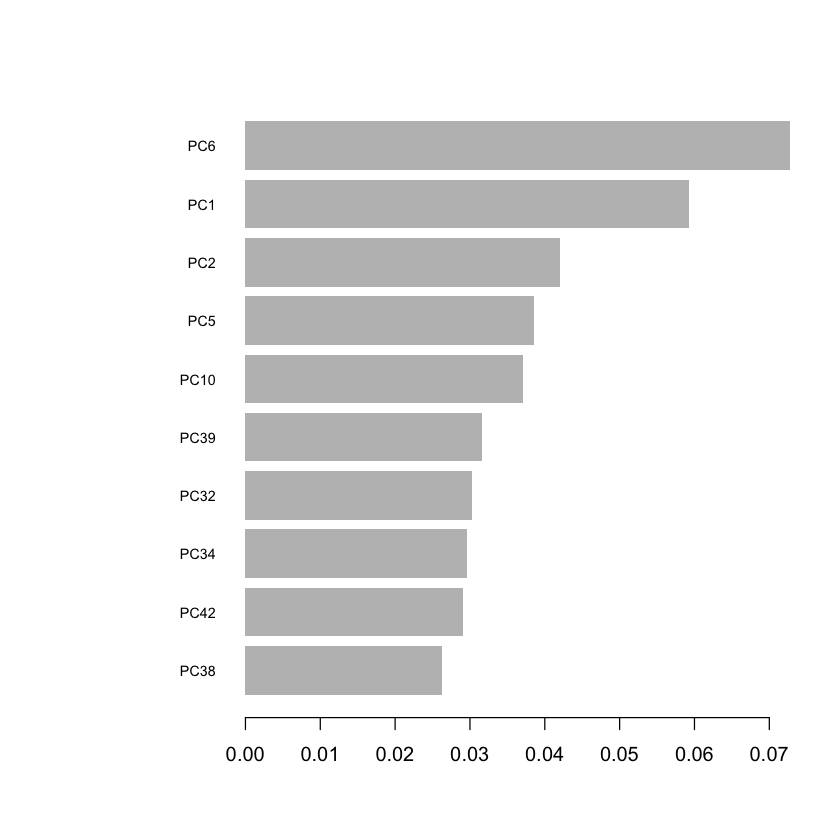

In [66]:
importanceRaw <- xgb.importance(feature_names = colnames(data_preproc), model = md, data = as.matrix(train_data[,-target_variable]),label=labels)
head(importanceRaw,100)
xgb.plot.importance(importance_matrix = importanceRaw[1:10])


In [67]:
pred <- predict(md, as.matrix(test_data[,-target_variable]),reshape = T)
head(pred)

0.074675784,0.01769881,0.90762538
0.786822557,0.05073296,0.16244452
0.715825796,0.22638018,0.05779405
0.409899086,0.02031905,0.56978184
0.775648713,0.04409489,0.18025641
0.006975975,0.00172142,0.99130261


In [68]:
predicted_labels <- factor(max.col(pred),levels=1:3)
real_labels <- factor(as.numeric(test_data[,target_variable]))
predicted_labels

[1] 3 1 1 3 1 3 1 3 1 3 1 1 1 1 1 1 3 3 1 1 1 1 3 2 1 1 1 1 1 1 1 1 3 3 1 1
   [37] 1 1 1 1 3 1 1 1 1 1 1 1 1 3 1 1 3 3 3 3 1 1 1 3 1 1 1 3 1 1 2 1 1 3 1 3
   [73] 3 1 1 1 3 1 3 1 1 3 1 3 1 3 3 1 3 1 1 3 1 1 3 3 1 1 1 3 3 1 3 3 1 1 1 1
  [109] 3 1 1 1 1 3 1 1 1 1 3 1 1 1 3 3 3 3 3 1 3 1 1 3 3 1 1 2 3 1 3 3 1 1 1 3
  [145] 1 1 1 1 1 3 3 1 3 3 3 1 1 3 1 2 3 2 3 3 1 1 2 1 1 1 1 1 1 3 3 2 1 3 1 1
  [181] 2 1 3 2 3 3 1 1 3 1 1 3 1 3 3 3 1 3 1 3 3 1 3 1 1 1 2 1 1 1 1 3 2 3 1 3
  [217] 1 2 3 1 1 1 1 1 1 1 1 1 3 1 2 1 1 3 1 1 1 1 1 3 1 1 3 1 1 1 1 3 1 3 1 3
  [253] 3 1 1 3 1 3 1 1 1 3 1 1 1 1 3 1 1 1 3 3 1 3 3 1 1 1 3 3 1 1 3 1 3 3 1 1
  [289] 3 1 1 3 1 3 1 1 1 3 3 3 3 1 1 1 1 3 1 1 3 3 3 1 3 3 2 1 1 3 1 1 1 3 3 3
  [325] 1 1 1 3 3 1 1 1 1 1 1 1 1 2 1 3 1 3 1 3 3 3 3 3 3 3 1 3 3 3 3 3 1 3 1 3
  [361] 1 2 1 3 1 1 1 3 3 3 1 1 3 3 1 3 1 3 3 1 3 3 1 1 1 3 1 3 3 1 3 3 1 3 3 3
  [397] 3 1 1 1 1 1 3 1 1 3 1 3 3 1 1 3 1 1 1 3 1 1 1 1 1 1 2 3 3 3 1 3 1 3 1 1
  [433] 1 3 1 3 1 1 3 1 3 1 3 1 3 1 1 1 1 1 3 3 1 1 2 1 2 3 3 3 1 3 1 2 1 3 1 1
  [469] 3 1 1 3 1 1 1 1 3 1 1 1 1 1 1 2 1 1 1 1 1 1 3 1 1 1 3 1 1 3 1 2 3 1 3 3
  [505] 3 3 1 3 3 3 1 1 3 1 3 3 1 1 1 3 1 1 3 1 1 1 1 1 3 1 3 2 1 1 1 1 1 1 1 3
  [541] 3 1 1 3 3 1 3 1 1 1 1 1 1 1 1 3 1 1 3 1 1 1 1 1 1 3 1 1 1 1 1 1 3 1 1 1
  [577] 3 1 1 1 1 3 1 3 1 3 1 1 3 3 1 1 3 3 3 1 1 1 3 1 3 3 3 3 3 1 1 1 1 1 1 1
  [613] 1 1 1 1 1 3 1 1 3 3 1 1 3 1 1 1 1 1 1 3 3 1 1 3 1 1 2 3 1 1 1 1 1 1 3 3
  [649] 3 3 3 1 3 1 1 1 3 3 1 1 1 3 1 3 1 3 3 1 1 1 1 3 1 1 1 1 1 1 1 1 1 2 3 3
  [685] 3 1 1 1 1 3 3 3 3 1 1 1 2 3 1 3 3 3 3 1 3 1 2 1 1 1 3 3 1 3 1 1 1 1 3 1
  [721] 2 3 3 1 1 1 1 3 1 1 3 1 3 3 1 1 1 3 1 1 3 1 1 3 1 3 3 1 3 3 3 1 1 3 1 3
  [757] 3 1 1 1 1 1 1 1 2 1 3 1 3 3 1 1 1 1 1 3 1 1 1 3 3 3 1 1 3 1 1 1 1 1 1 3
  [793] 1 1 3 1 3 1 1 1 1 1 1 1 1 1 3 1 1 1 2 1 3 1 1 1 3 1 1 3 2 3 1 3 1 1 1 1
  [829] 1 3 1 3 1 3 3 1 1 1 1 1 1 3 1 1 3 3 1 1 1 3 3 3 1 1 1 1 1 1 1 2 3 1 1 1
  [865] 3 1 3 3 3 3 1 1 3 1 3 1 3 2 1 1 1 3 3 3 3 3 1 1 1 3 1 3 1 1 3 3 1 2 1 1
  [901] 1 3 1 1 1 3 1 2 1 1 1 3 1 1 3 3 3 1 1 1 1 1 3 3 1 1 3 3 1 1 1 1 1 3 3 1
  [937] 1 2 1 1 1 1 3 1 1 1 1 3 1 1 1 1 1 1 3 1 1 3 1 1 1 3 1 3 1 1 1 3 3 1 3 3
  [973] 1 3 3 1 1 3 1 3 2 3 1 1 1 3 1 3 1 1 1 1 3 3 1 3 1 1 1 1 3 1 1 3 3 1 3 3
 [1009] 1 1 1 3 2 1 1 1 1 3 1 3 1 1 1 3 1 1 3 1 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 3
 [1045] 1 3 1 1 1 1 1 1 3 1 1 3 1 1 1 1 3 3 3 1 1 1 1 1 3 3 3 1 1 2 1 3 3 1 1 1
 [1081] 1 3 1 3 1 3 1 3 1 1 3 1 3 3 1 1 1 1 3 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 3 1
 [1117] 1 1 1 1 3 1 1 3 1 3 1 3 3 3 3 3 3 1 1 1 1 1 2 3 1 1 1 3 1 3 1 3 3 3 1 1
 [1153] 1 1 1 1 2 1 3 2 3 1 1 1 1 3 1 3 3 1 3 3 1 1 3 1 1 3 1 1 1 1 3 3 3 1 3 1
 [1189] 3 1 1 3 1 3 1 3 3 1 3 1 1 1 1 1 2 1 1 3 3 1 3 1 3 3 1 1 3 2 1 1 1 1 3 3
 [1225] 1 3 1 2 3 3 1 1 1 3 1 1 1 3 1 2 1 1 3 3 3 1 3 3 3 1 1 1 1 1 1 1 1 3 1 1
 [1261] 1 3 1 3 3 1 3 1 1 1 1 3 3 1 1 1 2 1 1 3 1 1 3 1 1 1 1 3 1 1 1 3 1 1 3 1
 [1297] 1 1 1 3 1 1 3 3 3 1 1 1 1 3 3 1 3 1 3 1 3 3 3 1 3 3 3 2 1 1 1 1 1 3 2 2
 [1333] 2 1 1 1 1 2 3 1 3 3 3 3 1 3 3 1 3 1 1 3 3 1 1 3 1 1 3 1 1 3 3 1 2 3 1 1
 [1369] 3 1 3 3 3 1 1 3 1 3 3 1 3 1 1 3 1 3 1 3 1 1 1 1 1 1 1 2 3 1 3 3 1 1 1 1
 [1405] 1 1 2 3 1 2 3 3 3 3 3 1 1 2 1 1 3 3 1 1 3 1 1 1 3 3 1 1 1 3 1 3 3 3 1 1
 [1441] 1 3 3 1 1 2 3 1 1 1 1 1 3 1 1 3 3 3 1 1 1 3 1 1 3 3 1 1 1 1 3 3 3 3 3 1
 [1477] 3 1 3 1 1 3 1 1 1 3 1 1 1 1 1 3 1 3 1 1 1 1 3 1 1 3 3 1 1 1 1 1 3 3 1 1
 [1513] 1 3 3 1 3 1 3 3 2 1 1 3 1 1 1 1 3 3 3 1 1 1 2 1 1 1 3 3 1 1 1 1 1 1 1 1
 [1549] 1 3 3 3 3 1 2 3 1 1 3 1 3 1 3 2 3 1 1 1 1 1 3 3 1 3 1 1 1 3 1 3 1 1 1 1
 [1585] 3 3 1 3 3 1 3 3 1 3 3 1 1 1 3 1 3 3 3 1 3 3 3 3 1 3 1 1 3 3 1 1 1 1 3 1
 [1621] 1 1 3 1 1 1 1 3 3 3 1 1 1 1 3 1 3 2 1 1 1 1 1 3 3 1 1 1 1 1 1 3 3 1 1 1
 [1657] 1 1 3 1 1 3 1 1 3 3 1 1 1 1 1 1 3 1 1 1 3 1 1 3 1 1 1 3 1 3 3 3 1 1 3 1
 [1693] 3 3 3 1 1 1 1 3 1 1 1 3 3 1 3 3 1 3 1 1 1 1 1 3 3 3 3 1 1 3 1 3 1 1 1 3
 [1729] 1 3 3 1 3 1 1 3 3 1 1 3 1 1 3 1 3 3 1 1 3 3 1 1 3 3 3 1 2 1 1 1 1 2 1 3
 [1765] 1 3 2 3 3 1 1 1 3 1 1 1 3 1 3 1 3 1 1 1 1 3 1 3 2 1 3 3 2 3 3 3 3 1 1 1
 [18

In [69]:
caret::confusionMatrix(real_labels,predicted_labels)

Confusion Matrix and Statistics

          Reference
Prediction     1     2     3
         1 12681   288  1517
         2  1017   507   399
         3  2456   129  7527

Overall Statistics
                                         
               Accuracy : 0.7811         
                 95% CI : (0.7761, 0.786)
    No Information Rate : 0.6091         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.5862         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.7850  0.54870   0.7971
Specificity            0.8259  0.94468   0.8486
Pos Pred Value         0.8754  0.26365   0.7444
Neg Pred Value         0.7114  0.98305   0.8832
Prevalence             0.6091  0.03484   0.3561
Detection Rate         0.4781  0.01912   0.2838
Detection Prevalence   0.5462  0.07251   0.3813
Balanced Accuracy      0.8

In [121]:
best_param

$objective
[1] "multi:softprob"

$eval_metric
[1] "merror"

$num_class
[1] 3

$max_depth
[1] 22

$eta
[1] 0.05077676

$gamma
[1] 0.1153181

$subsample
[1] 0.6205619

$colsample_bytree
[1] 0.6967923

$min_child_weight
[1] 1

$max_delta_step
[1] 10

0.176457897,0.07373614,0.7498060
0.426951230,0.10585447,0.4671943
0.054916084,0.01432570,0.9307582
0.005897264,0.00181794,0.9922848
0.769100189,0.11764178,0.1132581
0.836848021,0.03210682,0.1310451


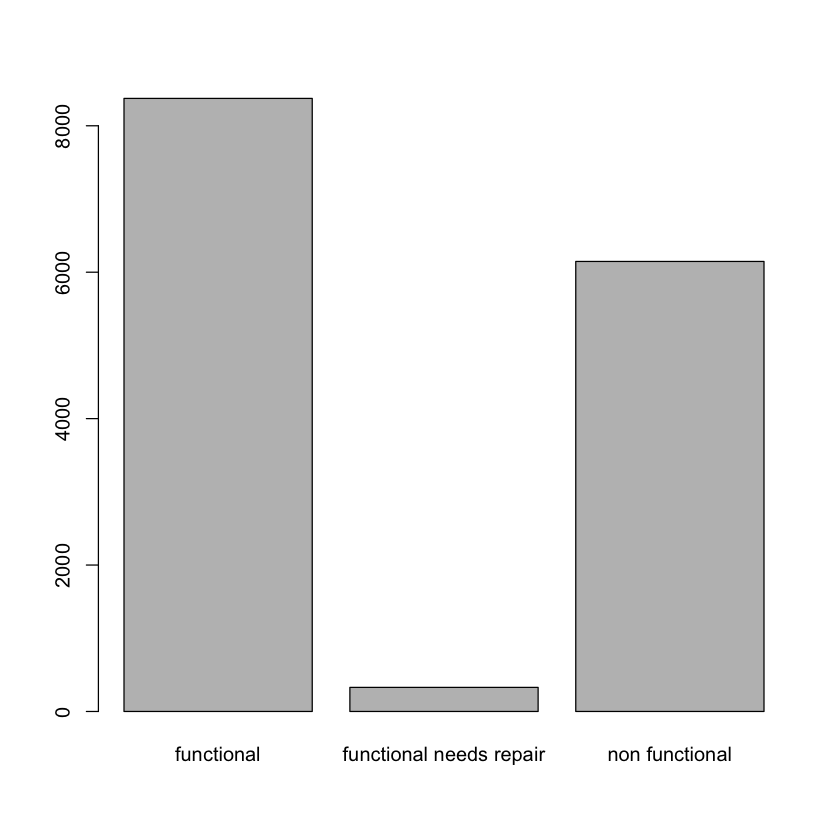

In [76]:
pred <- predict(md, as.matrix(test_preproc),reshape = T)
head(pred)
pred <- factor(max.col(pred),levels=1:3)
pred <- ifelse(pred == 1,"functional",ifelse(pred == 2, "functional needs repair", "non functional"))
barplot(table(pred))

In [77]:
res <- cbind("id"=eval_data$id,"status_group"=as.character(pred))
head(res)

id,status_group
50785,non functional
51630,non functional
17168,non functional
45559,non functional
49871,functional
52449,functional


In [78]:
write.csv(res,"submission.csv",row.names=FALSE)

# Conclusions